# import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
from collections import Counter
warnings.filterwarnings('ignore')


# data loading 

In [ ]:
df = pd.read_json(r'public_group_01_14_02_04.jsonl\public_group_01_14_02_04.jsonl', lines=True)


##### the cell below might take a while to run so after running this store the CSV seprate so you wont need to

In [ ]:

summary_rows = []

# Iterate over all rows and columns
for i in range(len(df)):
    for j in range(df.shape[1]):
        record = df.iloc[i, j]

        if record is None:
            continue  # Skip None cells

        print(f"Processing row {i}, column {j}")  # Debugging info

        # Extract basic info safely
        tcid = record.get('tcid')
        tbid = record.get('tbid')
        created_at = pd.to_datetime(record.get('created_at'))
        user_agent = record.get('user_agent')
        events = record.get('events', [])

        # Event type counts
        event_types = [e['event_type'] for e in events if 'event_type' in e]
        event_counts = Counter(event_types)

        # Session duration
        if events:
            event_times = [pd.to_datetime(e['happened_at']) for e in events if 'happened_at' in e]
            session_duration = (max(event_times) - min(event_times)).total_seconds()
        else:
            session_duration = 0

        # Scroll analysis
        scroll_depths = [e['scroll_depth'] for e in events if e.get('event_type') == 'SCROLL' and 'scroll_depth' in e]
        total_scroll = sum(scroll_depths)
        max_scroll = max(scroll_depths, default=0)

        # Count specific events
        touch_start_count = event_counts.get('TOUCH_START', 0)
        scroll_count = event_counts.get('SCROLL', 0)
        resize_count = event_counts.get('RESIZE', 0)
        visibility_change_count = event_counts.get('VISIBILITY_CHANGE', 0)

        # Append row
        summary_rows.append({
            'row': i,
            'column': j,
            'tcid': tcid,
            'tbid': tbid,
            'created_at': created_at,
            'user_agent': user_agent,
            'total_events': len(events),
            'session_duration_s': session_duration,
            'total_scroll_depth': total_scroll,
            'max_scroll_depth': max_scroll,
            'TOUCH_START_count': touch_start_count,
            'SCROLL_count': scroll_count,
            'RESIZE_count': resize_count,
            'VISIBILITY_CHANGE_count': visibility_change_count
        })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_rows)

# Display summary
summary_df.head()


Processing row 0, column 0
Processing row 1, column 0
Processing row 2, column 0
Processing row 3, column 0
Processing row 4, column 0
Processing row 5, column 0
Processing row 6, column 0
Processing row 7, column 0
Processing row 7, column 1
Processing row 8, column 0
Processing row 8, column 1
Processing row 9, column 0
Processing row 9, column 1
Processing row 9, column 2
Processing row 9, column 3
Processing row 9, column 4
Processing row 10, column 0
Processing row 10, column 1
Processing row 10, column 2
Processing row 11, column 0
Processing row 12, column 0
Processing row 13, column 0
Processing row 14, column 0
Processing row 15, column 0
Processing row 16, column 0
Processing row 17, column 0
Processing row 18, column 0
Processing row 19, column 0
Processing row 20, column 0
Processing row 21, column 0
Processing row 22, column 0
Processing row 23, column 0
Processing row 24, column 0
Processing row 25, column 0
Processing row 25, column 1
Processing row 25, column 2
Processi

KeyboardInterrupt: 

In [ ]:
# summary_df.to_csv('summary_df_all_columns.csv')


In [22]:
# Load the dataset
df = pd.read_csv('summary_df_all_columns.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())


Dataset shape: (6505, 15)

First few rows:
   Unnamed: 0  row  column                                  tcid  \
0           0    0       0  06046a82-f99f-46a6-b67f-8999d24c1423   
1           1    1       0  44d62259-c6d3-49ff-8346-e1d5ddff802e   
2           2    2       0  f455fdcd-5bf1-4ccc-bfce-0bf25ebc8085   
3           3    3       0  bcf89e35-85b4-4f18-aeaa-c2f4954acc26   
4           4    4       0  b1dd98fb-707d-4021-bfd2-f2ef3c123623   

                                   tbid               created_at  \
0  29f79081-1057-43b2-b22d-8260ff55d80e  2025-02-25 17:31:39.031   
1  ff6ad41b-5f8f-4ba7-a30d-d27625fae06d  2025-02-25 05:15:14.398   
2  2020b325-ff27-4003-b0ad-75bf2cd60798  2025-02-25 17:51:57.943   
3  428b1d7c-3e38-4339-90a4-576d9be1d462  2025-02-25 19:51:16.290   
4  144e269f-5e79-4fec-b5e6-b56b0fd68e81  2025-02-25 14:08:20.037   

                                          user_agent  total_events  \
0  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...           186   

In [23]:
df =  df.drop(columns=['Unnamed: 0', 'row', 'column'])

In [24]:
df

tcid  \
0     06046a82-f99f-46a6-b67f-8999d24c1423   
1     44d62259-c6d3-49ff-8346-e1d5ddff802e   
2     f455fdcd-5bf1-4ccc-bfce-0bf25ebc8085   
3     bcf89e35-85b4-4f18-aeaa-c2f4954acc26   
4     b1dd98fb-707d-4021-bfd2-f2ef3c123623   
...                                    ...   
6500  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6501  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6502  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6503  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6504  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   

                                      tbid               created_at  \
0     29f79081-1057-43b2-b22d-8260ff55d80e  2025-02-25 17:31:39.031   
1     ff6ad41b-5f8f-4ba7-a30d-d27625fae06d  2025-02-25 05:15:14.398   
2     2020b325-ff27-4003-b0ad-75bf2cd60798  2025-02-25 17:51:57.943   
3     428b1d7c-3e38-4339-90a4-576d9be1d462  2025-02-25 19:51:16.290   
4     144e269f-5e79-4fec-b5e6-b56b0fd68e81  2025-02-25 14:08:20.037   
...                                    ...                      ...   
6500  2fa4ffab-78f4-4bba-b4c1-ba5a886f44bf  2025-02-28 13:44:43.098   
6501  b8d8e0f4-1acc-4a64-a0e6-4203178d210b  2025-03-01 20:11:24.985   
6502  b8d8e0f4-1acc-4a64-a0e6-4203178d210b  2025-03-01 20:11:31.272   
6503  4dbb2800-9414-4555-94a5-887ccd85dc6e  2025-03-02 13:53:27.087   
6504  4dbb2800-9414-4555-94a5-887ccd85dc6e  2025-03-02 13:53:38.898   

                                             user_agent  total_events  \
0     Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...           186   
1     Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...           285   
2     Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...            29   
3     Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...           175   
4     Mozilla/5.0 (iPhone; CPU iPhone OS 17_6_1 like...           125   
...                                                 ...           ...   
6500  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            21   
6501  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            26   
6502  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            26   
6503  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            14   
6504  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            14   

      session_duration_s  total_scroll_depth  max_scroll_depth  \
0                186.871       126753.000000      16917.000000   
1                359.771        24446.577894       2951.822266   
2                  8.483         4171.636414       1129.818237   
3                750.823       148435.667399       9899.666992   
4                161.469        19962.000000       3606.000000   
...                  ...                 ...               ...   
6500              15.277            0.000000          0.000000   
6501              10.830          556.000000        277.000000   
6502              10.830          556.000000        277.000000   
6503              25.546            0.000000          0.000000   
6504              25.546            0.000000          0.000000   

      TOUCH_START_count  SCROLL_count  RESIZE_count  VISIBILITY_CHANGE_count  
0                    64            31            16                        2  
1                   114            23             3                        1  
2                    10             5             2                        1  
3                    81            27             2                        1  
4                    43            22            18                        0  
...                 ...           ...           ...                      ...  
6500                  6             1             5                        0  
6501                  6             4             6                        0  
6502                  6             4             6                        0  
6503                  4             1             4                        0  
6504                  4             1             4                        0  

[6505 rows x 

# Initial featute analysys

### TCID

=== TCID Analysis ===
TCID column type: object
Number of unique TCID values: 2586
Total records: 6505

Missing values in TCID: 0

TCID value distribution:
tcid
66e5042e-5ee7-4e6e-8b9e-993e287bd9c2    66
ffd1b26f-6a50-4a1f-8811-e62ce5521402    66
fdc10308-977d-4c70-98d9-c141aa1eeb49    42
4b7f052c-86aa-4846-93c1-5b4a49a46537    34
4425da1b-37cd-4f0f-9dea-16ba23155ed7    32
ad657ab0-855c-45ac-9948-75353ac02e47    30
566f1111-8ba7-4abf-8cd3-506dcfe2adaa    30
cf89d07a-4d71-48fa-b364-f7fa9f7066d5    28
4c7496aa-b575-4a41-bd10-270b566b6f98    28
03605148-f97b-47a3-a377-1ed30dc44513    24
Name: count, dtype: int64

Uniqueness ratio (unique values / total records): 0.3975
TCID has moderate cardinality

Sample TCID values:
['06046a82-f99f-46a6-b67f-8999d24c1423', '44d62259-c6d3-49ff-8346-e1d5ddff802e', 'f455fdcd-5bf1-4ccc-bfce-0bf25ebc8085', 'bcf89e35-85b4-4f18-aeaa-c2f4954acc26', 'b1dd98fb-707d-4021-bfd2-f2ef3c123623', 'a74ef910-81e6-4ce3-b030-86001762a5c3', '2180698d-1151-453f-b2da-837c52fb2

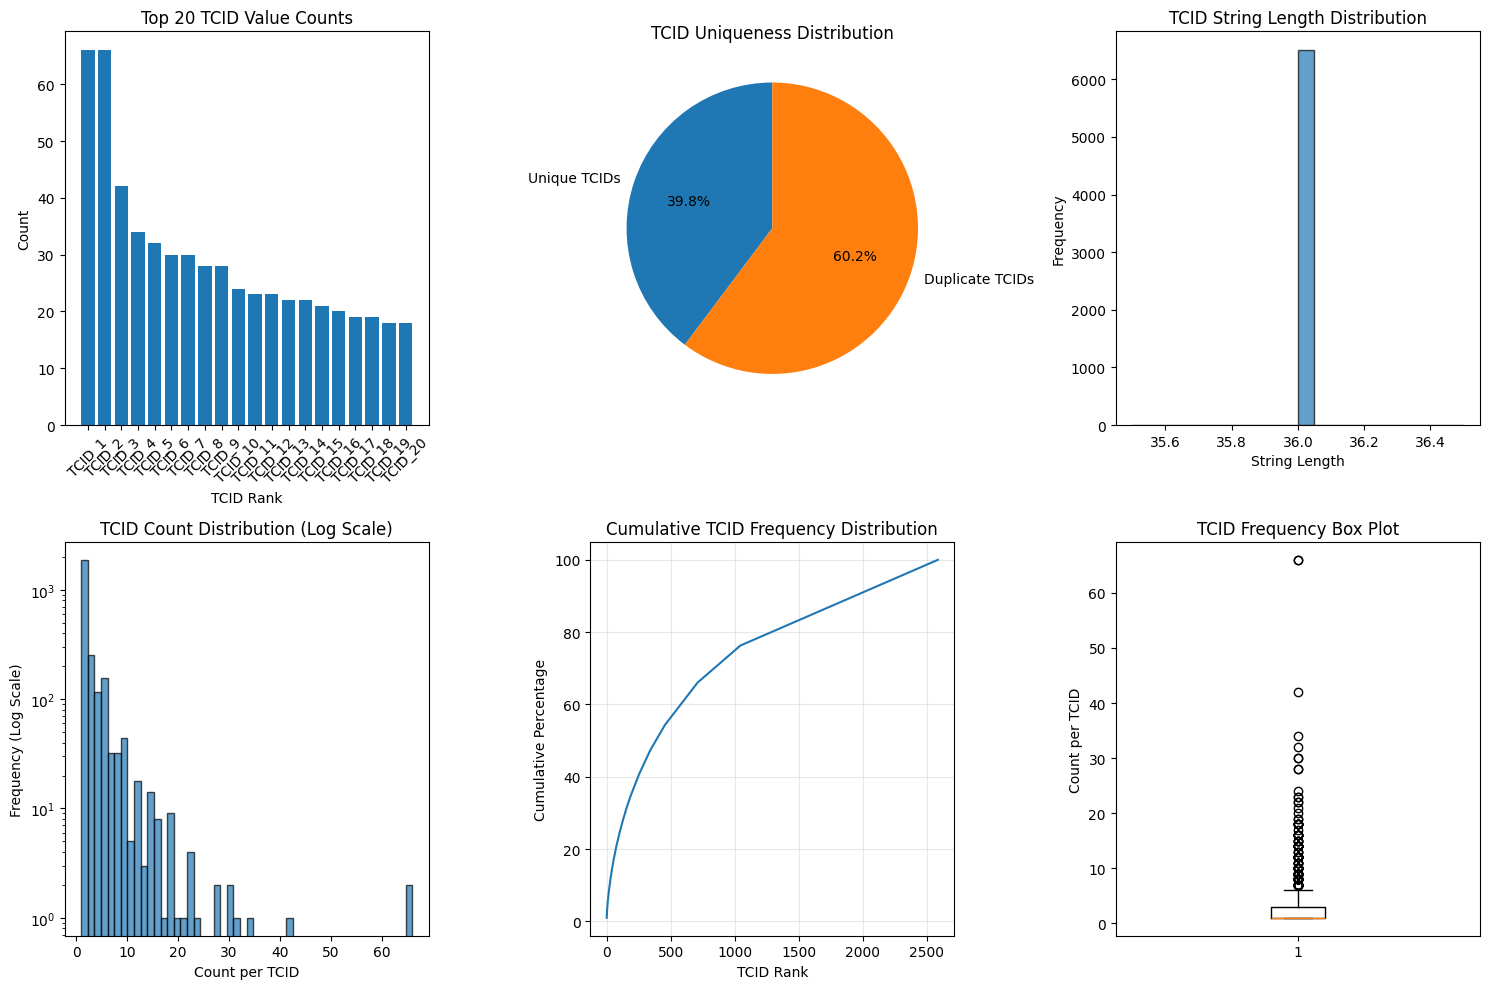


=== TCID Visualization Insights ===
Most frequent TCID appears 66 times
Least frequent TCIDs appear 1 times
Median TCID frequency: 1.0
Mean TCID frequency: 2.52


In [25]:

print("=== TCID Analysis ===")
print(f"TCID column type: {df['tcid'].dtype}")
print(f"Number of unique TCID values: {df['tcid'].nunique()}")
print(f"Total records: {len(df)}")

# Check for missing values
print(f"\nMissing values in TCID: {df['tcid'].isnull().sum()}")

# Display TCID value distribution
print(f"\nTCID value distribution:")
tcid_counts = df['tcid'].value_counts()
print(tcid_counts.head(10))

# Check if TCID appears to be an identifier (high cardinality)
uniqueness_ratio = df['tcid'].nunique() / len(df)
print(f"\nUniqueness ratio (unique values / total records): {uniqueness_ratio:.4f}")

if uniqueness_ratio > 0.9:
    print("TCID appears to be a unique identifier (high cardinality)")
elif uniqueness_ratio < 0.1:
    print("TCID has low cardinality, might be useful for grouping")
else:
    print("TCID has moderate cardinality")

# Display some example TCID values
print(f"\nSample TCID values:")
print(df['tcid'].head(10).tolist())

# Check for any patterns in TCID format
print(f"\nTCID string length analysis:")
if df['tcid'].dtype == 'object':
    tcid_lengths = df['tcid'].astype(str).str.len()
    print(f"Min length: {tcid_lengths.min()}")
    print(f"Max length: {tcid_lengths.max()}")
    print(f"Most common length: {tcid_lengths.mode().iloc[0] if not tcid_lengths.mode().empty else 'N/A'}")

# Visualizations for TCID parameter
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 1. Distribution of TCID counts (top 20)
plt.subplot(2, 3, 1)
top_tcids = tcid_counts.head(20)
plt.bar(range(len(top_tcids)), top_tcids.values)
plt.title('Top 20 TCID Value Counts')
plt.xlabel('TCID Rank')
plt.ylabel('Count')
plt.xticks(range(len(top_tcids)), [f'TCID_{i+1}' for i in range(len(top_tcids))], rotation=45)

# 2. TCID uniqueness visualization
plt.subplot(2, 3, 2)
uniqueness_data = ['Unique TCIDs', 'Duplicate TCIDs']
uniqueness_values = [df['tcid'].nunique(), len(df) - df['tcid'].nunique()]
plt.pie(uniqueness_values, labels=uniqueness_data, autopct='%1.1f%%', startangle=90)
plt.title('TCID Uniqueness Distribution')

# 3. TCID string length distribution (if applicable)
if df['tcid'].dtype == 'object':
    plt.subplot(2, 3, 3)
    tcid_lengths = df['tcid'].astype(str).str.len()
    plt.hist(tcid_lengths, bins=20, edgecolor='black', alpha=0.7)
    plt.title('TCID String Length Distribution')
    plt.xlabel('String Length')
    plt.ylabel('Frequency')

# 4. Log-scale distribution of TCID counts
plt.subplot(2, 3, 4)
plt.hist(tcid_counts.values, bins=50, log=True, edgecolor='black', alpha=0.7)
plt.title('TCID Count Distribution (Log Scale)')
plt.xlabel('Count per TCID')
plt.ylabel('Frequency (Log Scale)')

# 5. Cumulative distribution of TCID frequencies
plt.subplot(2, 3, 5)
sorted_counts = sorted(tcid_counts.values, reverse=True)
cumulative_pct = [sum(sorted_counts[:i+1])/sum(sorted_counts)*100 for i in range(len(sorted_counts))]
plt.plot(range(len(cumulative_pct)), cumulative_pct)
plt.title('Cumulative TCID Frequency Distribution')
plt.xlabel('TCID Rank')
plt.ylabel('Cumulative Percentage')
plt.grid(True, alpha=0.3)

# 6. Box plot of TCID frequencies
plt.subplot(2, 3, 6)
plt.boxplot(tcid_counts.values)
plt.title('TCID Frequency Box Plot')
plt.ylabel('Count per TCID')

plt.tight_layout()
plt.show()

# Additional summary statistics for visualization insights
print(f"\n=== TCID Visualization Insights ===")
print(f"Most frequent TCID appears {tcid_counts.iloc[0]} times")
print(f"Least frequent TCIDs appear {tcid_counts.iloc[-1]} times")
print(f"Median TCID frequency: {tcid_counts.median()}")
print(f"Mean TCID frequency: {tcid_counts.mean():.2f}")


### TBID

=== TBID Analysis ===
Total TBID entries: 6505
Unique TBIDs: 4498
TBID null values: 0
Most frequent TBID frequency: 12
Number of TBIDs appearing only once: 3023
Percentage of singleton TBIDs: 67.21%


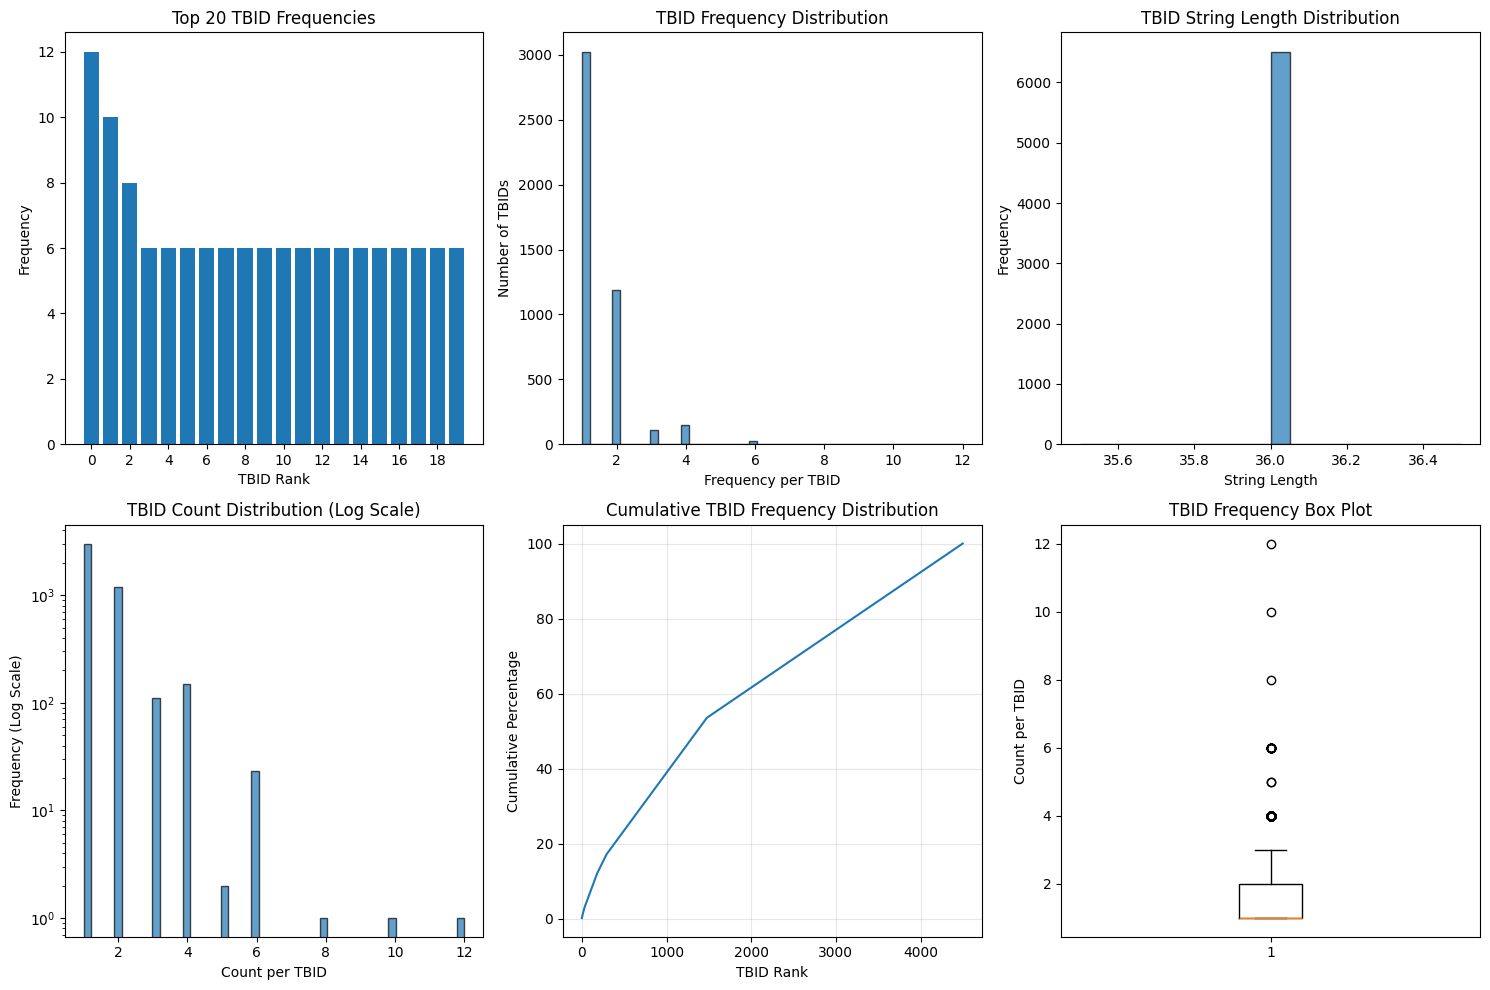


=== TBID Behavioral Patterns ===
High frequency threshold (95th percentile): 3.0
Number of high-frequency TBIDs: 289
Records with high-frequency TBIDs: 1110
Percentage of data from high-frequency TBIDs: 17.06%

=== TBID Summary Statistics ===
Most frequent TBID appears 12 times
Least frequent TBIDs appear 1 times
Median TBID frequency: 1.0
Mean TBID frequency: 1.45
Standard deviation of TBID frequencies: 0.81

=== Bot Detection Insights from TBID ===
TBIDs with extremely high frequency (potential bots): 28
Unique TBIDs vs Total records ratio: 0.6915


In [26]:
# TBID Analysis and Visualization
print("=== TBID Analysis ===")

# Basic statistics
print(f"Total TBID entries: {len(df['tbid'])}")
print(f"Unique TBIDs: {df['tbid'].nunique()}")
print(f"TBID null values: {df['tbid'].isnull().sum()}")

# Calculate TBID frequency distribution
tbid_counts = df['tbid'].value_counts()
print(f"Most frequent TBID frequency: {tbid_counts.iloc[0]}")
print(f"Number of TBIDs appearing only once: {(tbid_counts == 1).sum()}")
print(f"Percentage of singleton TBIDs: {(tbid_counts == 1).sum() / len(tbid_counts) * 100:.2f}%")

# Create comprehensive TBID visualization
plt.figure(figsize=(15, 10))

# 1. TBID frequency distribution (top 20)
plt.subplot(2, 3, 1)
top_20_tbids = tbid_counts.head(20)
plt.bar(range(len(top_20_tbids)), top_20_tbids.values)
plt.title('Top 20 TBID Frequencies')
plt.xlabel('TBID Rank')
plt.ylabel('Frequency')
plt.xticks(range(0, 20, 2))

# 2. TBID frequency distribution histogram
plt.subplot(2, 3, 2)
plt.hist(tbid_counts.values, bins=50, edgecolor='black', alpha=0.7)
plt.title('TBID Frequency Distribution')
plt.xlabel('Frequency per TBID')
plt.ylabel('Number of TBIDs')

# 3. TBID string length analysis (if TBID is string)
if df['tbid'].dtype == 'object':
    plt.subplot(2, 3, 3)
    tbid_lengths = df['tbid'].astype(str).str.len()
    plt.hist(tbid_lengths, bins=20, edgecolor='black', alpha=0.7)
    plt.title('TBID String Length Distribution')
    plt.xlabel('String Length')
    plt.ylabel('Frequency')

# 4. Log-scale distribution of TBID counts
plt.subplot(2, 3, 4)
plt.hist(tbid_counts.values, bins=50, log=True, edgecolor='black', alpha=0.7)
plt.title('TBID Count Distribution (Log Scale)')
plt.xlabel('Count per TBID')
plt.ylabel('Frequency (Log Scale)')

# 5. Cumulative distribution of TBID frequencies
plt.subplot(2, 3, 5)
sorted_counts = sorted(tbid_counts.values, reverse=True)
cumulative_pct = [sum(sorted_counts[:i+1])/sum(sorted_counts)*100 for i in range(len(sorted_counts))]
plt.plot(range(len(cumulative_pct)), cumulative_pct)
plt.title('Cumulative TBID Frequency Distribution')
plt.xlabel('TBID Rank')
plt.ylabel('Cumulative Percentage')
plt.grid(True, alpha=0.3)

# 6. Box plot of TBID frequencies
plt.subplot(2, 3, 6)
plt.boxplot(tbid_counts.values)
plt.title('TBID Frequency Box Plot')
plt.ylabel('Count per TBID')

plt.tight_layout()
plt.show()

# TBID behavioral pattern analysis
print(f"\n=== TBID Behavioral Patterns ===")

# Analyze potential bot patterns based on TBID frequency
high_freq_threshold = tbid_counts.quantile(0.95)  # Top 5% most frequent TBIDs
high_freq_tbids = tbid_counts[tbid_counts >= high_freq_threshold].index

print(f"High frequency threshold (95th percentile): {high_freq_threshold}")
print(f"Number of high-frequency TBIDs: {len(high_freq_tbids)}")

# Analyze correlation between TBID frequency and other potential bot indicators
df['tbid_frequency'] = df['tbid'].map(tbid_counts)
df['is_high_freq_tbid'] = df['tbid'].isin(high_freq_tbids)

print(f"Records with high-frequency TBIDs: {df['is_high_freq_tbid'].sum()}")
print(f"Percentage of data from high-frequency TBIDs: {df['is_high_freq_tbid'].mean() * 100:.2f}%")

# Additional summary statistics
print(f"\n=== TBID Summary Statistics ===")
print(f"Most frequent TBID appears {tbid_counts.iloc[0]} times")
print(f"Least frequent TBIDs appear {tbid_counts.iloc[-1]} times") 
print(f"Median TBID frequency: {tbid_counts.median()}")
print(f"Mean TBID frequency: {tbid_counts.mean():.2f}")
print(f"Standard deviation of TBID frequencies: {tbid_counts.std():.2f}")

# Potential bot detection insights based on TBID patterns
print(f"\n=== Bot Detection Insights from TBID ===")
print(f"TBIDs with extremely high frequency (potential bots): {(tbid_counts > tbid_counts.quantile(0.99)).sum()}")
print(f"Unique TBIDs vs Total records ratio: {df['tbid'].nunique() / len(df):.4f}")


### total_events

=== TOTAL_EVENTS ANALYSIS ===
Total records: 6505
Missing values: 0
Data type: int64

=== Basic Statistics ===
Mean: 248.04
Median: 83.00
Standard Deviation: 551.13
Minimum: 1
Maximum: 24001
Range: 24000

=== Quantiles ===
25.0th percentile: 28.00
50.0th percentile: 83.00
75.0th percentile: 260.00
90.0th percentile: 665.00
95.0th percentile: 994.60
99.0th percentile: 2155.00

=== Outlier Analysis ===
IQR: 232.00
Lower bound: -320.00
Upper bound: 608.00
Number of outliers: 723
Percentage of outliers: 11.11%

=== Value Counts (top 20 most frequent) ===
total_events
1     161
2     101
22     77
4      72
3      65
11     62
23     62
21     62
6      61
13     60
10     59
7      59
29     55
8      54
14     54
5      53
41     51
16     51
26     50
24     50
Name: count, dtype: int64



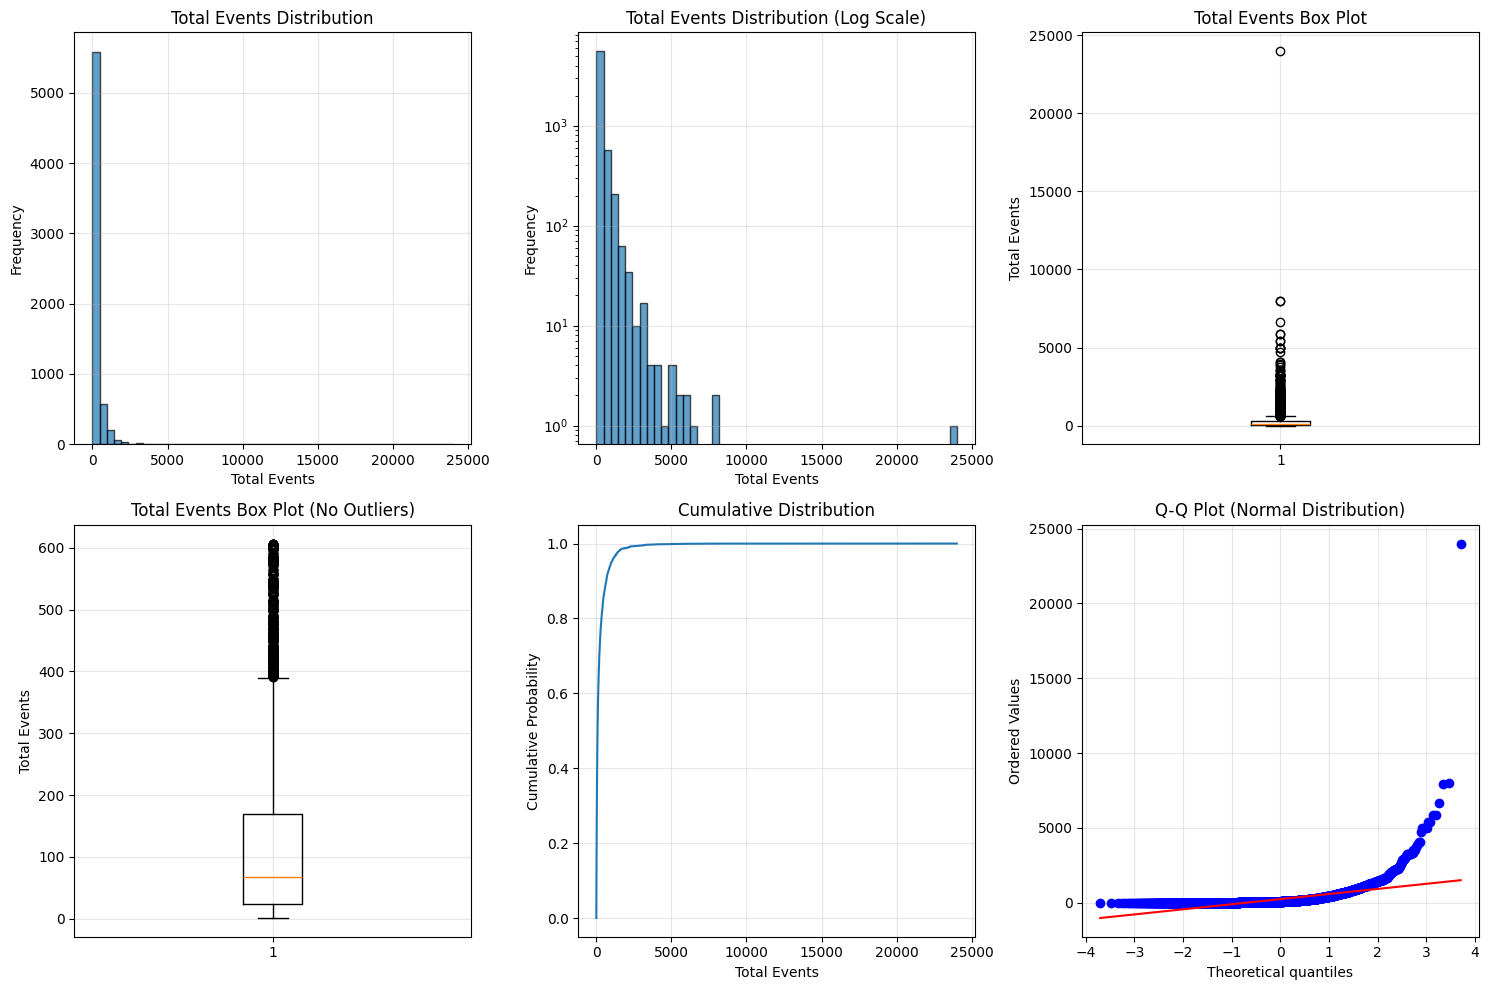

=== Additional Insights ===
Zero events count: 0
Percentage with zero events: 0.00%
Single event count: 161
Percentage with single event: 2.48%
Skewness: 15.843
Kurtosis: 558.657
Distribution is highly right-skewed


In [27]:
# total_events analysis and visualization

print("=== TOTAL_EVENTS ANALYSIS ===")
print(f"Total records: {len(df)}")
print(f"Missing values: {df['total_events'].isnull().sum()}")
print(f"Data type: {df['total_events'].dtype}")
print()

# Basic statistics
print("=== Basic Statistics ===")
print(f"Mean: {df['total_events'].mean():.2f}")
print(f"Median: {df['total_events'].median():.2f}")
print(f"Standard Deviation: {df['total_events'].std():.2f}")
print(f"Minimum: {df['total_events'].min()}")
print(f"Maximum: {df['total_events'].max()}")
print(f"Range: {df['total_events'].max() - df['total_events'].min()}")
print()

# Quantiles
print("=== Quantiles ===")
quantiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for q in quantiles:
    print(f"{q*100}th percentile: {df['total_events'].quantile(q):.2f}")
print()

# Outlier detection
Q1 = df['total_events'].quantile(0.25)
Q3 = df['total_events'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['total_events'] < lower_bound) | (df['total_events'] > upper_bound)]

print("=== Outlier Analysis ===")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")
print()

# Value counts for small values
print("=== Value Counts (top 20 most frequent) ===")
value_counts = df['total_events'].value_counts().head(20)
print(value_counts)
print()

# Visualization
plt.figure(figsize=(15, 10))

# 1. Histogram
plt.subplot(2, 3, 1)
plt.hist(df['total_events'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Total Events Distribution')
plt.xlabel('Total Events')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. Log-scale histogram (if applicable)
plt.subplot(2, 3, 2)
plt.hist(df['total_events'][df['total_events'] > 0], bins=50, alpha=0.7, edgecolor='black')
plt.title('Total Events Distribution (Log Scale)')
plt.xlabel('Total Events')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True, alpha=0.3)

# 3. Box plot
plt.subplot(2, 3, 3)
plt.boxplot(df['total_events'])
plt.title('Total Events Box Plot')
plt.ylabel('Total Events')
plt.grid(True, alpha=0.3)

# 4. Box plot without outliers for better visualization
plt.subplot(2, 3, 4)
non_outlier_data = df['total_events'][(df['total_events'] >= lower_bound) & (df['total_events'] <= upper_bound)]
plt.boxplot(non_outlier_data)
plt.title('Total Events Box Plot (No Outliers)')
plt.ylabel('Total Events')
plt.grid(True, alpha=0.3)

# 5. Cumulative distribution
plt.subplot(2, 3, 5)
sorted_data = np.sort(df['total_events'])
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, cumulative_prob)
plt.title('Cumulative Distribution')
plt.xlabel('Total Events')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# 6. Q-Q plot for normality check
plt.subplot(2, 3, 6)
from scipy import stats
stats.probplot(df['total_events'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print("=== Additional Insights ===")
print(f"Zero events count: {(df['total_events'] == 0).sum()}")
print(f"Percentage with zero events: {(df['total_events'] == 0).mean() * 100:.2f}%")
print(f"Single event count: {(df['total_events'] == 1).sum()}")
print(f"Percentage with single event: {(df['total_events'] == 1).mean() * 100:.2f}%")

# Skewness and Kurtosis
skewness = df['total_events'].skew()
kurtosis = df['total_events'].kurtosis()
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

if skewness > 1:
    print("Distribution is highly right-skewed")
elif skewness > 0.5:
    print("Distribution is moderately right-skewed")
elif skewness < -1:
    print("Distribution is highly left-skewed")
elif skewness < -0.5:
    print("Distribution is moderately left-skewed")
else:
    print("Distribution is approximately symmetric")


### session_duration_s

=== Session Duration (seconds) Analysis ===
Total records: 6505
Non-null values: 6505
Null values: 0

=== Basic Statistics ===
count      6505.000000
mean       3110.536228
std       16822.569930
min           0.000000
25%          18.946000
50%          77.674000
75%         445.104000
max      314590.799000
Name: session_duration_s, dtype: float64

Negative values: 0
Zero values: 162

Outliers (IQR method): 1105 (16.99%)


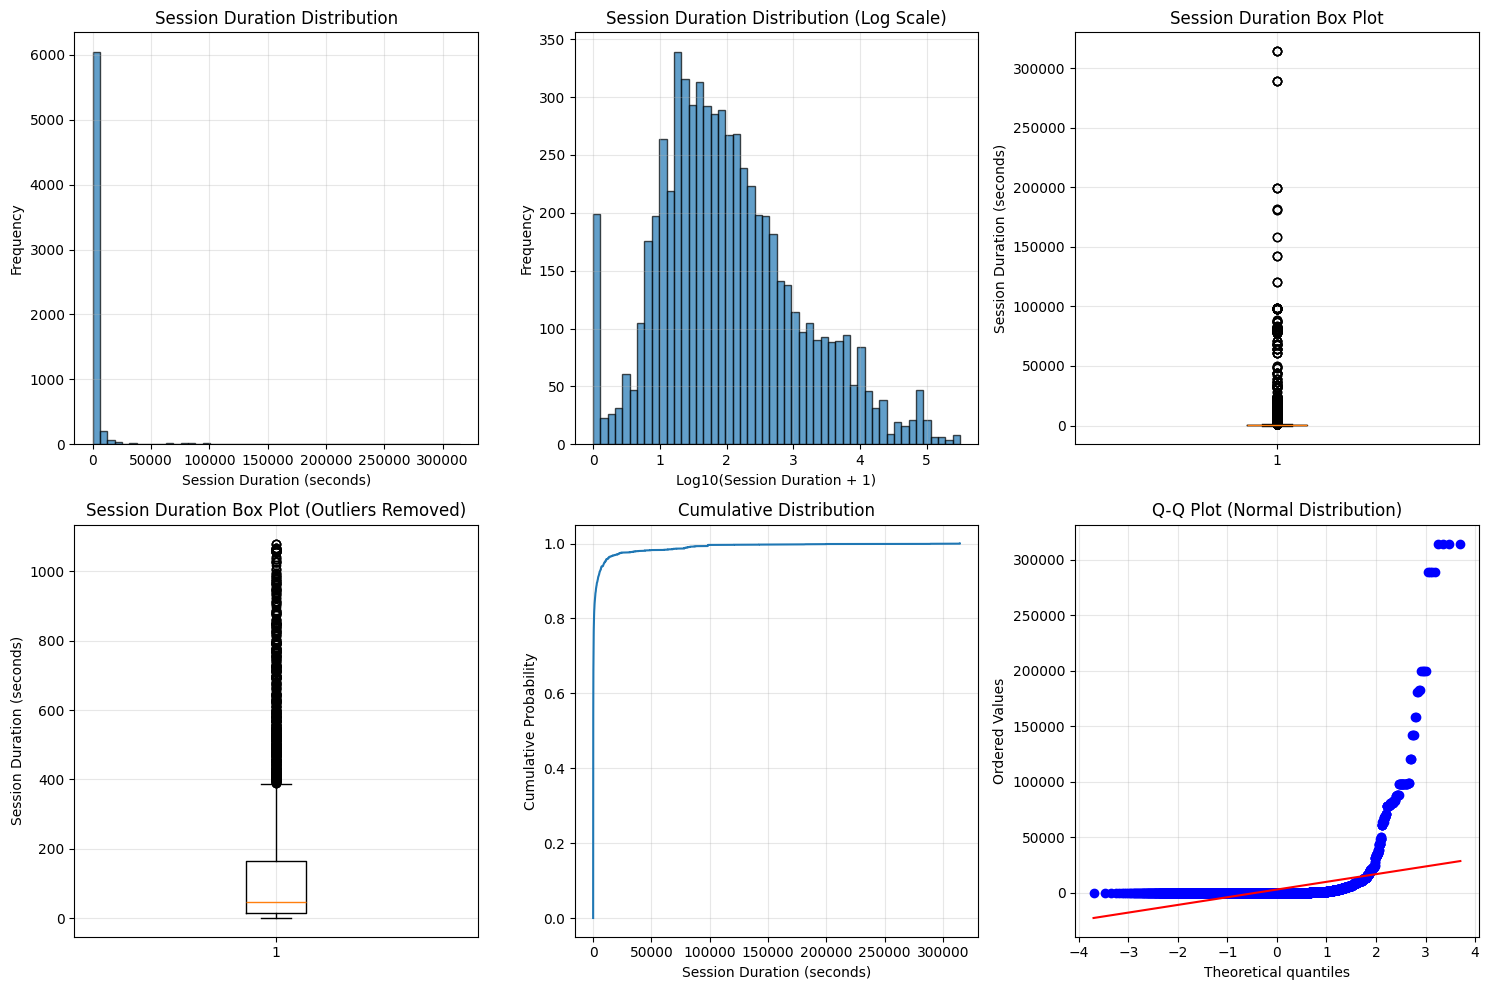


=== Additional Insights ===
Sessions under 1 minute: 2986
Percentage under 1 minute: 45.90%
Sessions under 10 seconds: 981
Percentage under 10 seconds: 15.08%
Sessions over 1 hour: 662
Percentage over 1 hour: 10.18%

Skewness: 10.864
Kurtosis: 153.173
Distribution is highly right-skewed

=== Duration Categories ===
duration_category
Short (10s-1m)          2005
Medium (1m-5m)          1591
Long (5m-30m)           1020
Very Short (<10s)        819
Extremely Long (>1h)     662
Very Long (30m-1h)       246
Name: count, dtype: int64

Percentage distribution:
duration_category
Short (10s-1m)          31.609648
Medium (1m-5m)          25.082768
Long (5m-30m)           16.080719
Very Short (<10s)       12.911871
Extremely Long (>1h)    10.436702
Very Long (30m-1h)       3.878291
Name: proportion, dtype: float64


In [28]:
# Session Duration Analysis
print("=== Session Duration (seconds) Analysis ===")
print(f"Total records: {len(df)}")
print(f"Non-null values: {df['session_duration_s'].notna().sum()}")
print(f"Null values: {df['session_duration_s'].isna().sum()}")

# Basic statistics
print("\n=== Basic Statistics ===")
print(df['session_duration_s'].describe())

# Check for negative or zero values
negative_count = (df['session_duration_s'] < 0).sum()
zero_count = (df['session_duration_s'] == 0).sum()
print(f"\nNegative values: {negative_count}")
print(f"Zero values: {zero_count}")

# Outlier detection using IQR
Q1 = df['session_duration_s'].quantile(0.25)
Q3 = df['session_duration_s'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['session_duration_s'] < lower_bound) | (df['session_duration_s'] > upper_bound)]
print(f"\nOutliers (IQR method): {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Histogram
plt.subplot(2, 3, 1)
plt.hist(df['session_duration_s'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 2. Log-scale histogram (for better visualization of skewed data)
plt.subplot(2, 3, 2)
# Add small constant to avoid log(0)
log_data = np.log10(df['session_duration_s'].dropna() + 1)
plt.hist(log_data, bins=50, edgecolor='black', alpha=0.7)
plt.title('Session Duration Distribution (Log Scale)')
plt.xlabel('Log10(Session Duration + 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 3. Box plot
plt.subplot(2, 3, 3)
plt.boxplot(df['session_duration_s'].dropna())
plt.title('Session Duration Box Plot')
plt.ylabel('Session Duration (seconds)')
plt.grid(True, alpha=0.3)

# 4. Box plot without outliers for better view
plt.subplot(2, 3, 4)
# Filter out extreme outliers for visualization
filtered_data = df['session_duration_s'][(df['session_duration_s'] >= lower_bound) & 
                                        (df['session_duration_s'] <= upper_bound)]
plt.boxplot(filtered_data.dropna())
plt.title('Session Duration Box Plot (Outliers Removed)')
plt.ylabel('Session Duration (seconds)')
plt.grid(True, alpha=0.3)

# 5. Cumulative distribution
plt.subplot(2, 3, 5)
sorted_data = np.sort(df['session_duration_s'].dropna())
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, cumulative_prob)
plt.title('Cumulative Distribution')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# 6. Q-Q plot for normality check
plt.subplot(2, 3, 6)
stats.probplot(df['session_duration_s'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot (Normal Distribution)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional insights
print("\n=== Additional Insights ===")
print(f"Sessions under 1 minute: {(df['session_duration_s'] < 60).sum()}")
print(f"Percentage under 1 minute: {(df['session_duration_s'] < 60).mean() * 100:.2f}%")
print(f"Sessions under 10 seconds: {(df['session_duration_s'] < 10).sum()}")
print(f"Percentage under 10 seconds: {(df['session_duration_s'] < 10).mean() * 100:.2f}%")
print(f"Sessions over 1 hour: {(df['session_duration_s'] > 3600).sum()}")
print(f"Percentage over 1 hour: {(df['session_duration_s'] > 3600).mean() * 100:.2f}%")

# Skewness and Kurtosis
skewness = df['session_duration_s'].skew()
kurtosis = df['session_duration_s'].kurtosis()
print(f"\nSkewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

if skewness > 1:
    print("Distribution is highly right-skewed")
elif skewness > 0.5:
    print("Distribution is moderately right-skewed")
elif skewness < -1:
    print("Distribution is highly left-skewed")
elif skewness < -0.5:
    print("Distribution is moderately left-skewed")
else:
    print("Distribution is approximately symmetric")

# Duration categories analysis
print("\n=== Duration Categories ===")
df['duration_category'] = pd.cut(df['session_duration_s'], 
                                bins=[0, 10, 60, 300, 1800, 3600, float('inf')],
                                labels=['Very Short (<10s)', 'Short (10s-1m)', 'Medium (1m-5m)', 
                                       'Long (5m-30m)', 'Very Long (30m-1h)', 'Extremely Long (>1h)'])
print(df['duration_category'].value_counts())
print("\nPercentage distribution:")
print(df['duration_category'].value_counts(normalize=True) * 100)


### total_scroll_depth

COMPREHENSIVE EDA: total_scroll_depth

=== Basic Statistics ===
Count: 6,505
Missing values: 0
Missing percentage: 0.00%
Mean: 146387.214
Median: 8510.000
Mode: 0.0
Standard Deviation: 1046323.996
Variance: 1094793905160.466
Minimum: -25.000
Maximum: 27014970.000
Range: 27014995.000

=== Percentiles ===
1th percentile: 0.000
5th percentile: 0.000
10th percentile: 0.000
25th percentile: 832.000
50th percentile: 8510.000
75th percentile: 43829.000
90th percentile: 182690.200
95th percentile: 407432.952
99th percentile: 2499082.018

Q1 (25th percentile): 832.000
Q3 (75th percentile): 43829.000
IQR: 42997.000
Lower fence (Q1 - 1.5*IQR): -63663.500
Upper fence (Q3 + 1.5*IQR): 108324.500
Number of outliers: 945
Percentage of outliers: 14.53%

=== Value Range Analysis ===
Values = 0: 908 (13.96%)
Values between 0-1: 5
Values > 1: 5,586 (85.87%)
Values > 2: 5,586 (85.87%)
Values > 5: 5,579 (85.76%)
Values > 10: 5,574 (85.69%)


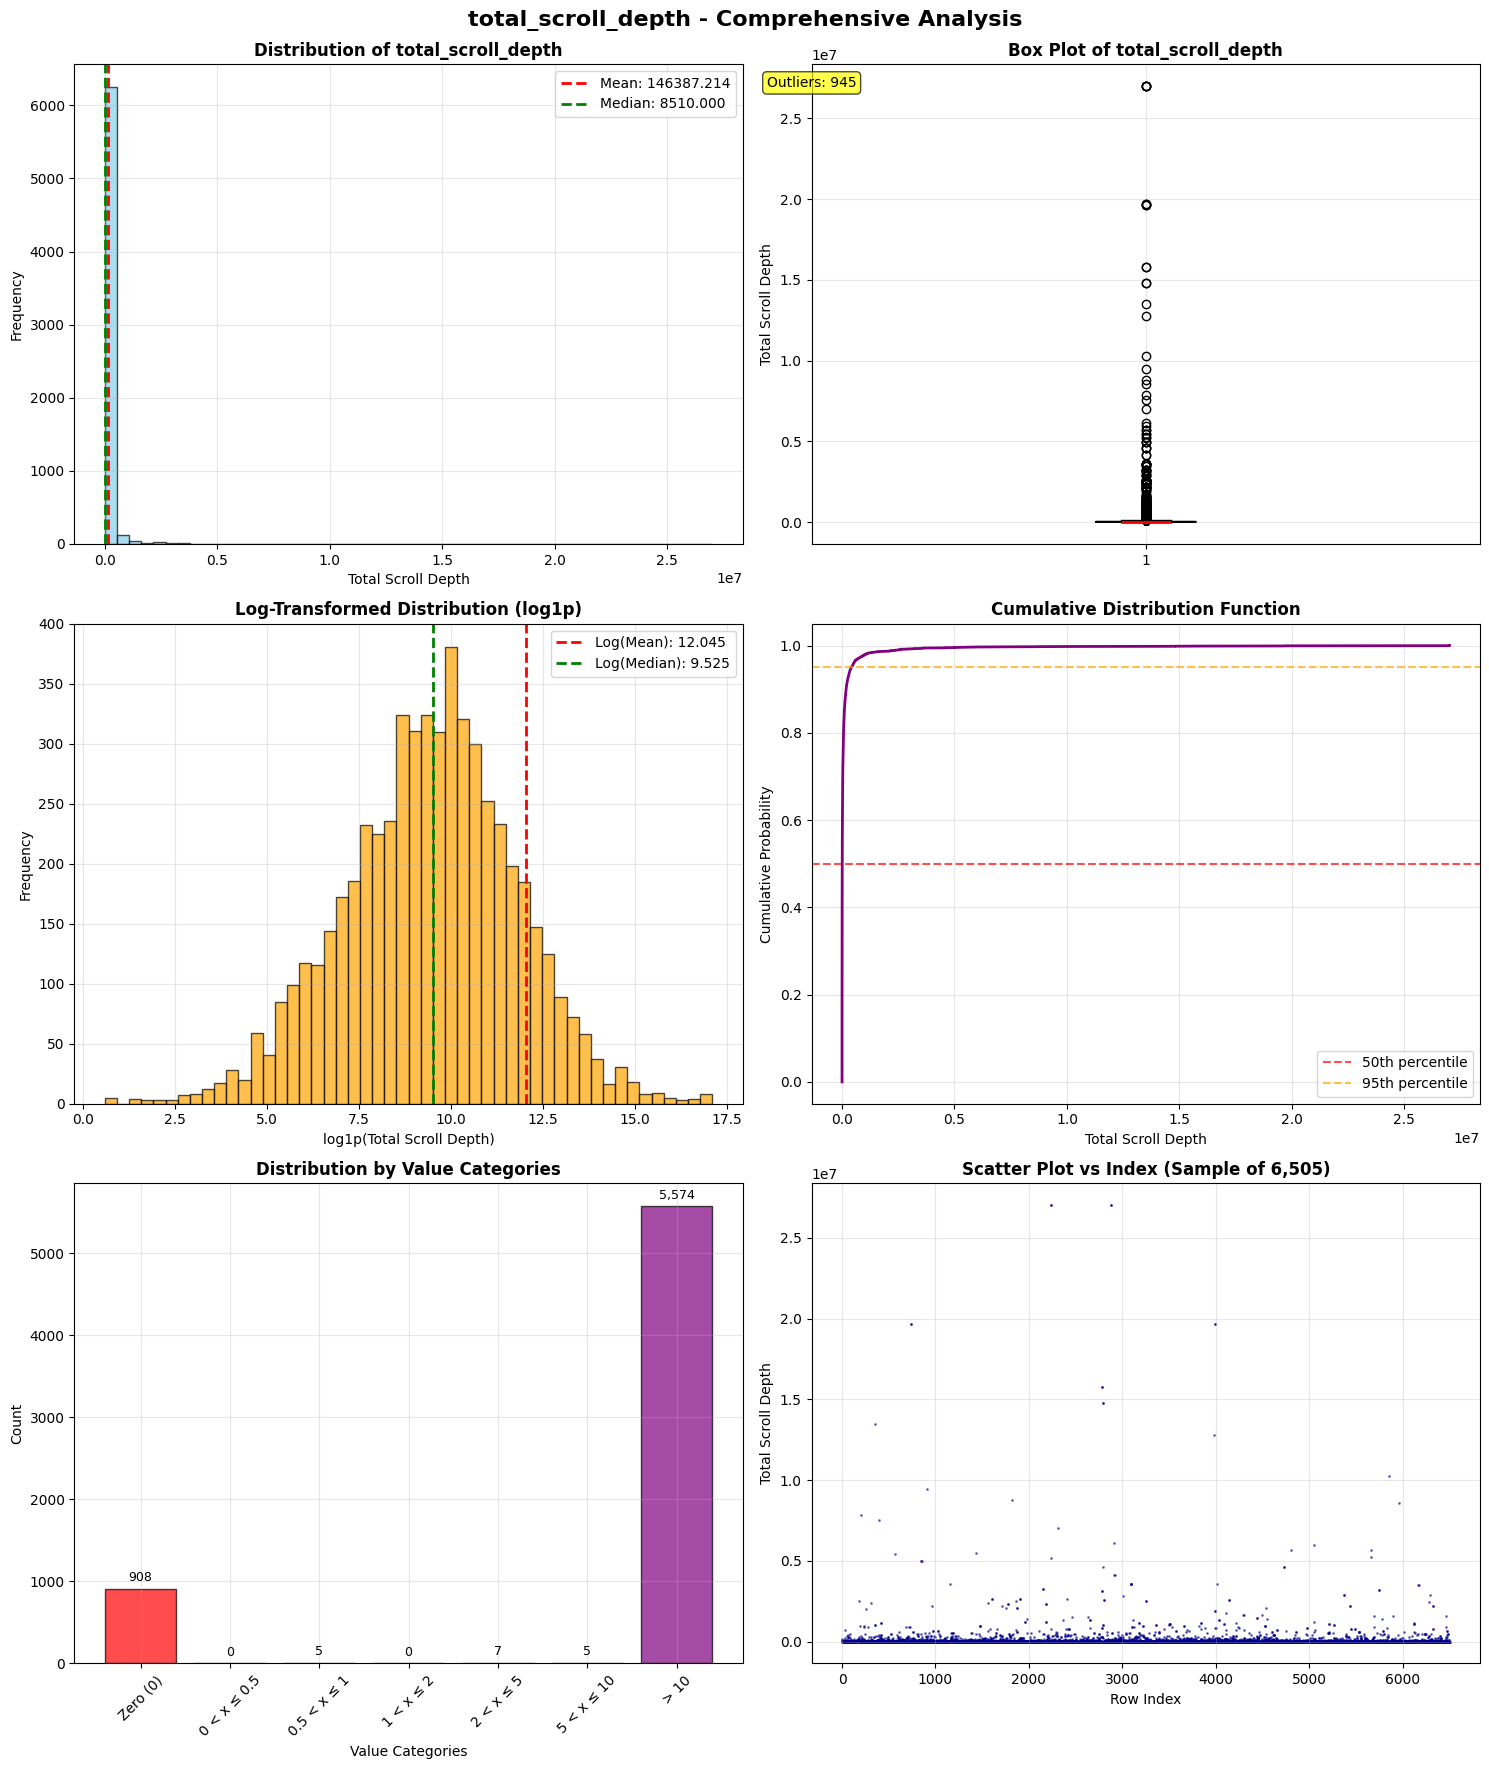


=== Distribution Shape Analysis ===
Skewness: 17.857
Kurtosis: 380.251
Distribution is highly right-skewed (long right tail)
Distribution is leptokurtic (heavy tails, peaked)

=== Unique Values Analysis ===
Unique values: 3,723
Total non-null values: 6,505
Uniqueness ratio: 0.572

Top 20 most frequent values:
total_scroll_depth
0.000000        908
400.000000       25
300.000000       17
10523.333344     12
800.000000       10
8450.000000      10
600.000000        9
500.000000        8
1400.000000       8
102.000000        8
100.000000        8
217.955551        7
6300.000000       7
700.000000        7
6017.000000       6
68719.000000      6
11317.000000      6
16680.000000      6
2000.000000       6
23000.000000      6
Name: count, dtype: int64

=== Bot Detection Insights ===
Sessions with zero scroll depth: 908 (13.96%)
Sessions with very high scroll depth (>10): 5,574 (85.69%)
Sessions with exactly 1.0 scroll depth: 3 (0.05%)
Sessions with scroll depth between 0.95-1.05: 3

=== Pot

In [29]:
# total_scroll_depth Feature Analysis
print("=" * 60)
print("COMPREHENSIVE EDA: total_scroll_depth")
print("=" * 60)

# Basic statistics
print("\n=== Basic Statistics ===")
print(f"Count: {df['total_scroll_depth'].count():,}")
print(f"Missing values: {df['total_scroll_depth'].isnull().sum():,}")
print(f"Missing percentage: {df['total_scroll_depth'].isnull().mean() * 100:.2f}%")
print(f"Mean: {df['total_scroll_depth'].mean():.3f}")
print(f"Median: {df['total_scroll_depth'].median():.3f}")
print(f"Mode: {df['total_scroll_depth'].mode().iloc[0] if not df['total_scroll_depth'].mode().empty else 'No mode'}")
print(f"Standard Deviation: {df['total_scroll_depth'].std():.3f}")
print(f"Variance: {df['total_scroll_depth'].var():.3f}")
print(f"Minimum: {df['total_scroll_depth'].min():.3f}")
print(f"Maximum: {df['total_scroll_depth'].max():.3f}")
print(f"Range: {df['total_scroll_depth'].max() - df['total_scroll_depth'].min():.3f}")

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
print(f"\n=== Percentiles ===")
for p in percentiles:
    value = np.percentile(df['total_scroll_depth'].dropna(), p)
    print(f"{p}th percentile: {value:.3f}")

# Quartiles and IQR
Q1 = df['total_scroll_depth'].quantile(0.25)
Q3 = df['total_scroll_depth'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nQ1 (25th percentile): {Q1:.3f}")
print(f"Q3 (75th percentile): {Q3:.3f}")
print(f"IQR: {IQR:.3f}")
print(f"Lower fence (Q1 - 1.5*IQR): {Q1 - 1.5*IQR:.3f}")
print(f"Upper fence (Q3 + 1.5*IQR): {Q3 + 1.5*IQR:.3f}")

# Outlier detection
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = df[(df['total_scroll_depth'] < lower_fence) | (df['total_scroll_depth'] > upper_fence)]
print(f"Number of outliers: {len(outliers):,}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")

# Value range analysis
print(f"\n=== Value Range Analysis ===")
print(f"Values = 0: {(df['total_scroll_depth'] == 0).sum():,} ({(df['total_scroll_depth'] == 0).mean() * 100:.2f}%)")
print(f"Values between 0-1: {((df['total_scroll_depth'] > 0) & (df['total_scroll_depth'] <= 1)).sum():,}")
print(f"Values > 1: {(df['total_scroll_depth'] > 1).sum():,} ({(df['total_scroll_depth'] > 1).mean() * 100:.2f}%)")
print(f"Values > 2: {(df['total_scroll_depth'] > 2).sum():,} ({(df['total_scroll_depth'] > 2).mean() * 100:.2f}%)")
print(f"Values > 5: {(df['total_scroll_depth'] > 5).sum():,} ({(df['total_scroll_depth'] > 5).mean() * 100:.2f}%)")
print(f"Values > 10: {(df['total_scroll_depth'] > 10).sum():,} ({(df['total_scroll_depth'] > 10).mean() * 100:.2f}%)")

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('total_scroll_depth - Comprehensive Analysis', fontsize=16, fontweight='bold', y=0.98)

# 1. Distribution - Histogram with KDE
ax1 = axes[0, 0]
df['total_scroll_depth'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black', ax=ax1)
ax1.axvline(df['total_scroll_depth'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["total_scroll_depth"].mean():.3f}')
ax1.axvline(df['total_scroll_depth'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["total_scroll_depth"].median():.3f}')
ax1.set_title('Distribution of total_scroll_depth', fontweight='bold')
ax1.set_xlabel('Total Scroll Depth')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box Plot
ax2 = axes[0, 1]
bp = ax2.boxplot(df['total_scroll_depth'].dropna(), patch_artist=True, notch=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['medians'][0].set_color('red')
bp['medians'][0].set_linewidth(2)
ax2.set_title('Box Plot of total_scroll_depth', fontweight='bold')
ax2.set_ylabel('Total Scroll Depth')
ax2.grid(True, alpha=0.3)

# Add outlier information to box plot
outlier_count = len(outliers)
ax2.text(0.5, ax2.get_ylim()[1] * 0.95, f'Outliers: {outlier_count:,}', 
         horizontalalignment='center', transform=ax2.transData, fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 3. Log Scale Distribution (if positive values exist)
ax3 = axes[1, 0]
positive_values = df[df['total_scroll_depth'] > 0]['total_scroll_depth']
if len(positive_values) > 0:
    positive_values.apply(np.log1p).hist(bins=50, alpha=0.7, color='orange', edgecolor='black', ax=ax3)
    ax3.axvline(np.log1p(positive_values.mean()), color='red', linestyle='--', linewidth=2, label=f'Log(Mean): {np.log1p(positive_values.mean()):.3f}')
    ax3.axvline(np.log1p(positive_values.median()), color='green', linestyle='--', linewidth=2, label=f'Log(Median): {np.log1p(positive_values.median()):.3f}')
    ax3.set_title('Log-Transformed Distribution (log1p)', fontweight='bold')
    ax3.set_xlabel('log1p(Total Scroll Depth)')
    ax3.set_ylabel('Frequency')
    ax3.legend()
else:
    ax3.text(0.5, 0.5, 'No positive values for log transformation', 
             horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
    ax3.set_title('Log-Transformed Distribution (No positive values)', fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Cumulative Distribution
ax4 = axes[1, 1]
sorted_values = np.sort(df['total_scroll_depth'].dropna())
cumulative_freq = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
ax4.plot(sorted_values, cumulative_freq, linewidth=2, color='purple')
ax4.axhline(0.5, color='red', linestyle='--', alpha=0.7, label='50th percentile')
ax4.axhline(0.95, color='orange', linestyle='--', alpha=0.7, label='95th percentile')
ax4.set_title('Cumulative Distribution Function', fontweight='bold')
ax4.set_xlabel('Total Scroll Depth')
ax4.set_ylabel('Cumulative Probability')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Value Categories Bar Plot
ax5 = axes[2, 0]
categories = ['Zero (0)', '0 < x ≤ 0.5', '0.5 < x ≤ 1', '1 < x ≤ 2', '2 < x ≤ 5', '5 < x ≤ 10', '> 10']
counts = [
    (df['total_scroll_depth'] == 0).sum(),
    ((df['total_scroll_depth'] > 0) & (df['total_scroll_depth'] <= 0.5)).sum(),
    ((df['total_scroll_depth'] > 0.5) & (df['total_scroll_depth'] <= 1)).sum(),
    ((df['total_scroll_depth'] > 1) & (df['total_scroll_depth'] <= 2)).sum(),
    ((df['total_scroll_depth'] > 2) & (df['total_scroll_depth'] <= 5)).sum(),
    ((df['total_scroll_depth'] > 5) & (df['total_scroll_depth'] <= 10)).sum(),
    (df['total_scroll_depth'] > 10).sum()
]

bars = ax5.bar(categories, counts, color=['red', 'orange', 'yellow', 'lightgreen', 'green', 'blue', 'purple'], alpha=0.7, edgecolor='black')
ax5.set_title('Distribution by Value Categories', fontweight='bold')
ax5.set_xlabel('Value Categories')
ax5.set_ylabel('Count')
ax5.tick_params(axis='x', rotation=45)

# Add count labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + max(counts) * 0.01,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

ax5.grid(True, alpha=0.3)

# 6. Scatter plot with index to show potential patterns
ax6 = axes[2, 1]
sample_size = min(10000, len(df))  # Sample for performance
sample_indices = np.random.choice(len(df), sample_size, replace=False)
ax6.scatter(sample_indices, df.iloc[sample_indices]['total_scroll_depth'], alpha=0.5, s=1, color='darkblue')
ax6.set_title(f'Scatter Plot vs Index (Sample of {sample_size:,})', fontweight='bold')
ax6.set_xlabel('Row Index')
ax6.set_ylabel('Total Scroll Depth')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Distribution shape analysis
print(f"\n=== Distribution Shape Analysis ===")
skewness = df['total_scroll_depth'].skew()
kurtosis = df['total_scroll_depth'].kurtosis()
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

if skewness > 1:
    print("Distribution is highly right-skewed (long right tail)")
elif skewness > 0.5:
    print("Distribution is moderately right-skewed")
elif skewness < -1:
    print("Distribution is highly left-skewed (long left tail)")
elif skewness < -0.5:
    print("Distribution is moderately left-skewed")
else:
    print("Distribution is approximately symmetric")

if kurtosis > 3:
    print("Distribution is leptokurtic (heavy tails, peaked)")
elif kurtosis < 3:
    print("Distribution is platykurtic (light tails, flat)")
else:
    print("Distribution is mesokurtic (normal-like tails)")

# Unique values analysis
unique_values = df['total_scroll_depth'].nunique()
total_values = df['total_scroll_depth'].count()
print(f"\n=== Unique Values Analysis ===")
print(f"Unique values: {unique_values:,}")
print(f"Total non-null values: {total_values:,}")
print(f"Uniqueness ratio: {unique_values / total_values:.3f}")

if unique_values <= 20:
    print("\nValue counts (all unique values):")
    print(df['total_scroll_depth'].value_counts().sort_index().head(20))
else:
    print(f"\nTop 20 most frequent values:")
    print(df['total_scroll_depth'].value_counts().head(20))

# Potential bot detection insights
print(f"\n=== Bot Detection Insights ===")
print(f"Sessions with zero scroll depth: {(df['total_scroll_depth'] == 0).sum():,} ({(df['total_scroll_depth'] == 0).mean() * 100:.2f}%)")
print(f"Sessions with very high scroll depth (>10): {(df['total_scroll_depth'] > 10).sum():,} ({(df['total_scroll_depth'] > 10).mean() * 100:.2f}%)")
print(f"Sessions with exactly 1.0 scroll depth: {(df['total_scroll_depth'] == 1.0).sum():,} ({(df['total_scroll_depth'] == 1.0).mean() * 100:.2f}%)")
print(f"Sessions with scroll depth between 0.95-1.05: {((df['total_scroll_depth'] >= 0.95) & (df['total_scroll_depth'] <= 1.05)).sum():,}")

# Check for potential anomalies
print(f"\n=== Potential Anomalies ===")
print(f"Negative values: {(df['total_scroll_depth'] < 0).sum():,}")
print(f"Very large values (>50): {(df['total_scroll_depth'] > 50).sum():,}")
print(f"Extremely large values (>100): {(df['total_scroll_depth'] > 100).sum():,}")

# Correlation with session duration if available
if 'session_duration_s' in df.columns:
    correlation = df['total_scroll_depth'].corr(df['session_duration_s'])
    print(f"\nCorrelation with session_duration_s: {correlation:.3f}")
    
    if abs(correlation) > 0.7:
        print("Strong correlation detected")
    elif abs(correlation) > 0.3:
        print("Moderate correlation detected")
    else:
        print("Weak correlation detected")


### max_scroll_depth

COMPREHENSIVE EDA: max_scroll_depth

=== Basic Statistics ===
Count: 6,505
Mean: 4587.3989
Median: 1800.0000
Mode: 0.0
Standard deviation: 9759.9394
Variance: 95256417.1678
Minimum: 0.0000
Maximum: 161172.0000
Range: 161172.0000

=== Percentiles ===
1th percentile: 0.0000
5th percentile: 0.0000
10th percentile: 0.0000
25th percentile: 454.4000
50th percentile: 1800.0000
75th percentile: 4828.0000
90th percentile: 11201.0283
95th percentile: 17011.0000
99th percentile: 43111.8203

=== Missing Values Analysis ===
Missing values: 0 (0.00%)
Non-missing values: 6,505

=== Data Type Information ===
Data type: float64
Memory usage: 0.05 MB

=== Unique Values Analysis ===
Unique values: 3,349
Total non-null values: 6,505
Uniqueness ratio: 0.515

Top 20 most frequent values:
max_scroll_depth
0.0       914
500.0      37
400.0      37
300.0      28
800.0      19
600.0      18
700.0      18
1000.0     17
1400.0     17
1100.0     16
900.0      16
914.0      13
1500.0     13
2400.0     12
1300.0    

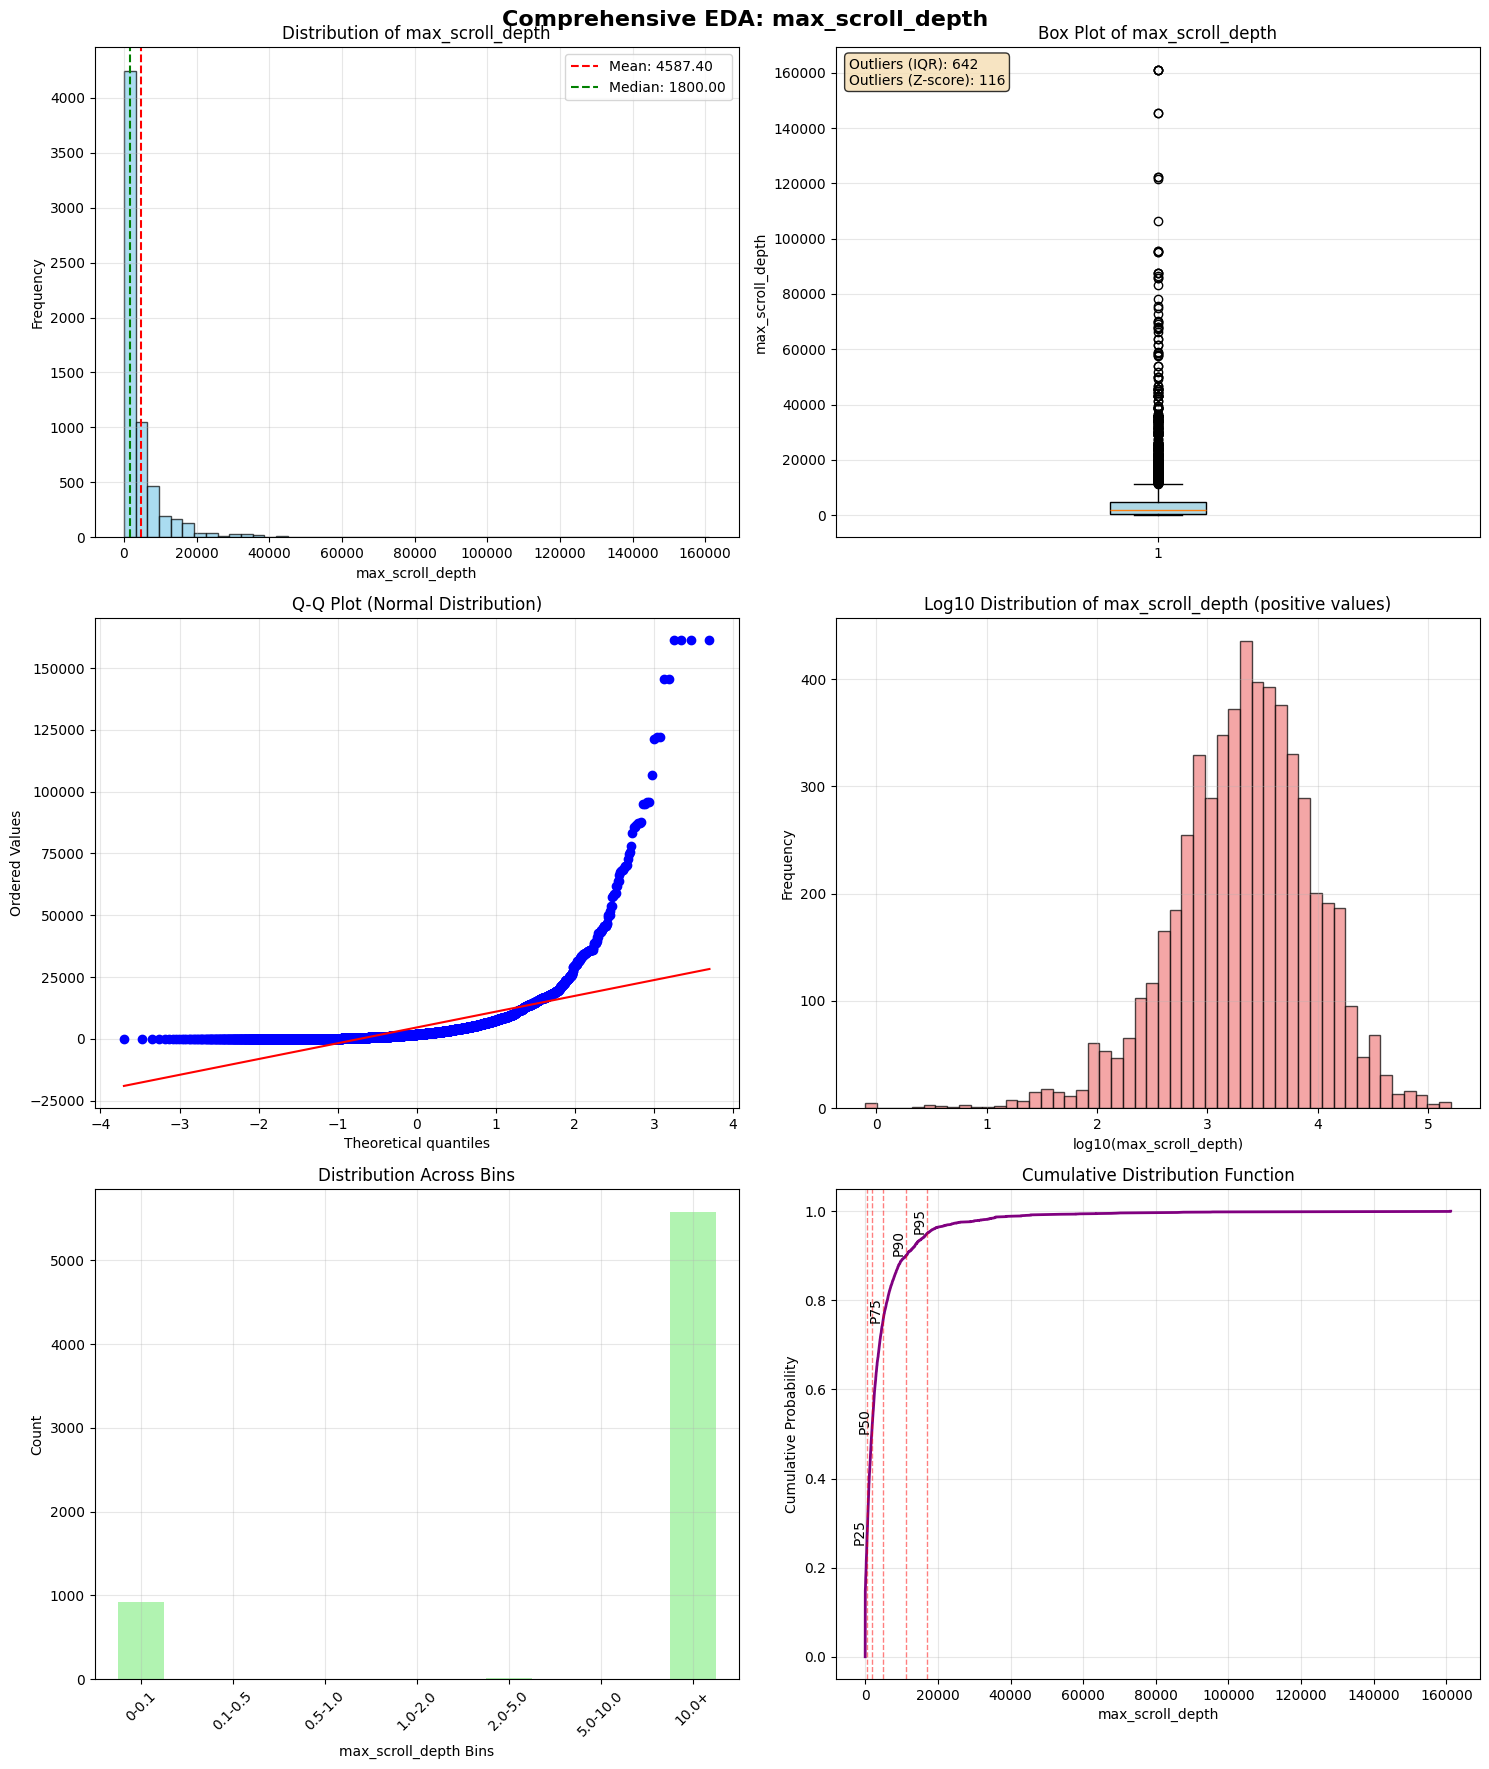


=== Relationship with total_scroll_depth ===
Correlation with total_scroll_depth: 0.800


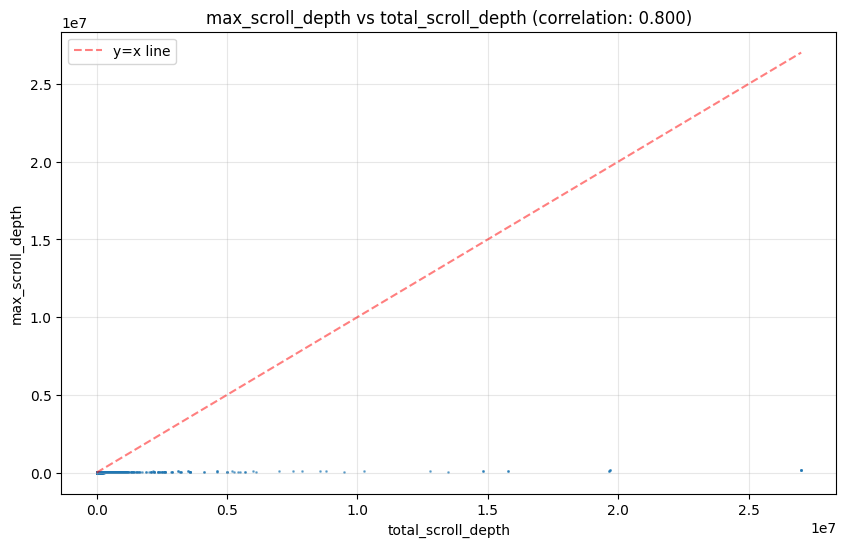

Sessions where max_scroll_depth > total_scroll_depth: 9 (0.14%)
This suggests potential data quality issues!

Correlation with session_duration_s: -0.012
Weak correlation detected

EDA COMPLETE: max_scroll_depth


In [30]:
# Comprehensive EDA for max_scroll_depth
print("=" * 60)
print("COMPREHENSIVE EDA: max_scroll_depth")
print("=" * 60)

# Basic statistics
print(f"\n=== Basic Statistics ===")
print(f"Count: {df['max_scroll_depth'].count():,}")
print(f"Mean: {df['max_scroll_depth'].mean():.4f}")
print(f"Median: {df['max_scroll_depth'].median():.4f}")
print(f"Mode: {df['max_scroll_depth'].mode().iloc[0] if not df['max_scroll_depth'].mode().empty else 'N/A'}")
print(f"Standard deviation: {df['max_scroll_depth'].std():.4f}")
print(f"Variance: {df['max_scroll_depth'].var():.4f}")
print(f"Minimum: {df['max_scroll_depth'].min():.4f}")
print(f"Maximum: {df['max_scroll_depth'].max():.4f}")
print(f"Range: {df['max_scroll_depth'].max() - df['max_scroll_depth'].min():.4f}")

# Percentiles
print(f"\n=== Percentiles ===")
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(df['max_scroll_depth'].dropna(), p)
    print(f"{p}th percentile: {value:.4f}")

# Missing values analysis
print(f"\n=== Missing Values Analysis ===")
missing_count = df['max_scroll_depth'].isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
print(f"Missing values: {missing_count:,} ({missing_percentage:.2f}%)")
print(f"Non-missing values: {df['max_scroll_depth'].count():,}")

# Data type and memory usage
print(f"\n=== Data Type Information ===")
print(f"Data type: {df['max_scroll_depth'].dtype}")
print(f"Memory usage: {df['max_scroll_depth'].memory_usage(deep=True) / 1024**2:.2f} MB")

# Unique values analysis
unique_values = df['max_scroll_depth'].nunique()
total_values = df['max_scroll_depth'].count()
print(f"\n=== Unique Values Analysis ===")
print(f"Unique values: {unique_values:,}")
print(f"Total non-null values: {total_values:,}")
print(f"Uniqueness ratio: {unique_values / total_values:.3f}")

if unique_values <= 20:
    print("\nValue counts (all unique values):")
    print(df['max_scroll_depth'].value_counts().sort_index().head(20))
else:
    print(f"\nTop 20 most frequent values:")
    print(df['max_scroll_depth'].value_counts().head(20))

# Distribution analysis
print(f"\n=== Distribution Analysis ===")
skewness = df['max_scroll_depth'].skew()
kurtosis = df['max_scroll_depth'].kurtosis()
print(f"Skewness: {skewness:.4f}")
if abs(skewness) < 0.5:
    print("  -> Approximately symmetric")
elif abs(skewness) < 1:
    print("  -> Moderately skewed")
else:
    print("  -> Highly skewed")

print(f"Kurtosis: {kurtosis:.4f}")
if kurtosis < 3:
    print("  -> Platykurtic (lighter tails)")
elif kurtosis > 3:
    print("  -> Leptokurtic (heavier tails)")
else:
    print("  -> Mesokurtic (normal-like tails)")

# Outlier detection using IQR method
Q1 = df['max_scroll_depth'].quantile(0.25)
Q3 = df['max_scroll_depth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['max_scroll_depth'] < lower_bound) | (df['max_scroll_depth'] > upper_bound)]['max_scroll_depth']
print(f"\n=== Outlier Analysis (IQR Method) ===")
print(f"Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
print(f"Lower bound: {lower_bound:.4f}, Upper bound: {upper_bound:.4f}")
print(f"Number of outliers: {len(outliers_iqr):,} ({len(outliers_iqr)/len(df)*100:.2f}%)")

# Z-score outlier detection
z_scores = np.abs((df['max_scroll_depth'] - df['max_scroll_depth'].mean()) / df['max_scroll_depth'].std())
outliers_zscore = df[z_scores > 3]['max_scroll_depth']
print(f"\n=== Outlier Analysis (Z-Score Method) ===")
print(f"Number of outliers (|z| > 3): {len(outliers_zscore):,} ({len(outliers_zscore)/len(df)*100:.2f}%)")

# Potential bot detection insights
print(f"\n=== Bot Detection Insights ===")
print(f"Sessions with zero max scroll depth: {(df['max_scroll_depth'] == 0).sum():,} ({(df['max_scroll_depth'] == 0).mean() * 100:.2f}%)")
print(f"Sessions with very high max scroll depth (>10): {(df['max_scroll_depth'] > 10).sum():,} ({(df['max_scroll_depth'] > 10).mean() * 100:.2f}%)")
print(f"Sessions with exactly 1.0 max scroll depth: {(df['max_scroll_depth'] == 1.0).sum():,} ({(df['max_scroll_depth'] == 1.0).mean() * 100:.2f}%)")
print(f"Sessions with max scroll depth between 0.95-1.05: {((df['max_scroll_depth'] >= 0.95) & (df['max_scroll_depth'] <= 1.05)).sum():,}")

# Check for potential anomalies
print(f"\n=== Potential Anomalies ===")
print(f"Negative values: {(df['max_scroll_depth'] < 0).sum():,}")
print(f"Very large values (>50): {(df['max_scroll_depth'] > 50).sum():,}")
print(f"Extremely large values (>100): {(df['max_scroll_depth'] > 100).sum():,}")

# Binning analysis
print(f"\n=== Binning Analysis ===")
bins = [0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, np.inf]
labels = ['0-0.1', '0.1-0.5', '0.5-1.0', '1.0-2.0', '2.0-5.0', '5.0-10.0', '10.0+']
df_temp = df.copy()
df_temp['max_scroll_depth_binned'] = pd.cut(df_temp['max_scroll_depth'], bins=bins, labels=labels, include_lowest=True)
bin_counts = df_temp['max_scroll_depth_binned'].value_counts().sort_index()
print("Distribution across bins:")
for bin_name, count in bin_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {bin_name}: {count:,} ({percentage:.2f}%)")

# Correlation analysis with other features
print(f"\n=== Correlation Analysis ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_columns].corr()['max_scroll_depth'].abs().sort_values(ascending=False)
print("Top correlations with max_scroll_depth:")
for col, corr in correlations.items():
    if col != 'max_scroll_depth' and not pd.isna(corr):
        print(f"  {col}: {corr:.3f}")
        if abs(corr) > 0.7:
            print("    -> Strong correlation")
        elif abs(corr) > 0.3:
            print("    -> Moderate correlation")

# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Comprehensive EDA: max_scroll_depth', fontsize=16, fontweight='bold')

# 1. Distribution plot
axes[0, 0].hist(df['max_scroll_depth'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['max_scroll_depth'].mean(), color='red', linestyle='--', label=f'Mean: {df["max_scroll_depth"].mean():.2f}')
axes[0, 0].axvline(df['max_scroll_depth'].median(), color='green', linestyle='--', label=f'Median: {df["max_scroll_depth"].median():.2f}')
axes[0, 0].set_title('Distribution of max_scroll_depth')
axes[0, 0].set_xlabel('max_scroll_depth')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot with outlier visualization
box_plot = axes[0, 1].boxplot(df['max_scroll_depth'].dropna(), patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
axes[0, 1].set_title('Box Plot of max_scroll_depth')
axes[0, 1].set_ylabel('max_scroll_depth')
axes[0, 1].grid(True, alpha=0.3)

# Add outlier statistics to box plot
outlier_text = f'Outliers (IQR): {len(outliers_iqr):,}\nOutliers (Z-score): {len(outliers_zscore):,}'
axes[0, 1].text(0.02, 0.98, outlier_text, transform=axes[0, 1].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Q-Q plot for normality assessment
from scipy import stats
stats.probplot(df['max_scroll_depth'].dropna(), dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Log-scale distribution (if applicable)
positive_values = df['max_scroll_depth'][df['max_scroll_depth'] > 0].dropna()
if len(positive_values) > 0:
    axes[1, 1].hist(np.log10(positive_values), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 1].set_title('Log10 Distribution of max_scroll_depth (positive values)')
    axes[1, 1].set_xlabel('log10(max_scroll_depth)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'No positive values\nfor log transformation', 
                    transform=axes[1, 1].transAxes, ha='center', va='center')
    axes[1, 1].set_title('Log10 Distribution (N/A)')

# 5. Binned distribution
bin_counts.plot(kind='bar', ax=axes[2, 0], color='lightgreen', alpha=0.7)
axes[2, 0].set_title('Distribution Across Bins')
axes[2, 0].set_xlabel('max_scroll_depth Bins')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(True, alpha=0.3)

# 6. Cumulative distribution
sorted_values = np.sort(df['max_scroll_depth'].dropna())
cumulative_prob = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
axes[2, 1].plot(sorted_values, cumulative_prob, color='purple', linewidth=2)
axes[2, 1].set_title('Cumulative Distribution Function')
axes[2, 1].set_xlabel('max_scroll_depth')
axes[2, 1].set_ylabel('Cumulative Probability')
axes[2, 1].grid(True, alpha=0.3)

# Add percentile lines
for p in [25, 50, 75, 90, 95]:
    value = np.percentile(sorted_values, p)
    axes[2, 1].axvline(value, color='red', linestyle='--', alpha=0.5, linewidth=1)
    axes[2, 1].text(value, p/100, f'P{p}', rotation=90, va='bottom', ha='right')

plt.tight_layout()
plt.show()

# Additional analysis: Relationship with total_scroll_depth
if 'total_scroll_depth' in df.columns:
    print(f"\n=== Relationship with total_scroll_depth ===")
    correlation = df['max_scroll_depth'].corr(df['total_scroll_depth'])
    print(f"Correlation with total_scroll_depth: {correlation:.3f}")
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['total_scroll_depth'], df['max_scroll_depth'], alpha=0.5, s=1)
    plt.xlabel('total_scroll_depth')
    plt.ylabel('max_scroll_depth')
    plt.title(f'max_scroll_depth vs total_scroll_depth (correlation: {correlation:.3f})')
    plt.grid(True, alpha=0.3)
    
    # Add diagonal line for reference
    max_val = max(df['total_scroll_depth'].max(), df['max_scroll_depth'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='y=x line')
    plt.legend()
    plt.show()
    
    # Logical consistency check
    inconsistent = df[df['max_scroll_depth'] > df['total_scroll_depth']]
    print(f"Sessions where max_scroll_depth > total_scroll_depth: {len(inconsistent):,} ({len(inconsistent)/len(df)*100:.2f}%)")
    if len(inconsistent) > 0:
        print("This suggests potential data quality issues!")

# Session duration correlation if available
if 'session_duration_s' in df.columns:
    correlation = df['max_scroll_depth'].corr(df['session_duration_s'])
    print(f"\nCorrelation with session_duration_s: {correlation:.3f}")
    
    if abs(correlation) > 0.7:
        print("Strong correlation detected")
    elif abs(correlation) > 0.3:
        print("Moderate correlation detected")
    else:
        print("Weak correlation detected")

print(f"\n{'='*60}")
print("EDA COMPLETE: max_scroll_depth")
print(f"{'='*60}")


### SCROLL_count

EDA START: SCROLL_count

=== Basic Statistics for SCROLL_count ===
Count: 6,505
Mean: 27.43
Median: 10.00
Mode: 0
Standard Deviation: 56.13
Minimum: 0
Maximum: 817
Range: 817

=== Percentiles ===
1th percentile: 0.00
5th percentile: 0.00
10th percentile: 0.00
25th percentile: 3.00
50th percentile: 10.00
75th percentile: 29.00
90th percentile: 67.00
95th percentile: 102.80
99th percentile: 265.00

=== Missing Values ===
Missing values: 0 (0.00%)

=== Zero Values Analysis ===
Zero scroll sessions: 794 (12.21%)
Zero scrolls could indicate:
- Very brief visits
- Bot behavior (no human interaction)
- Page load without engagement

=== Value Distribution ===
Top 20 most frequent values:
  0 scrolls: 794 sessions (12.21%)
  2 scrolls: 379 sessions (5.83%)
  1 scrolls: 338 sessions (5.20%)
  3 scrolls: 314 sessions (4.83%)
  4 scrolls: 299 sessions (4.60%)
  5 scrolls: 267 sessions (4.10%)
  7 scrolls: 220 sessions (3.38%)
  6 scrolls: 216 sessions (3.32%)
  8 scrolls: 177 sessions (2.72%)
  9 

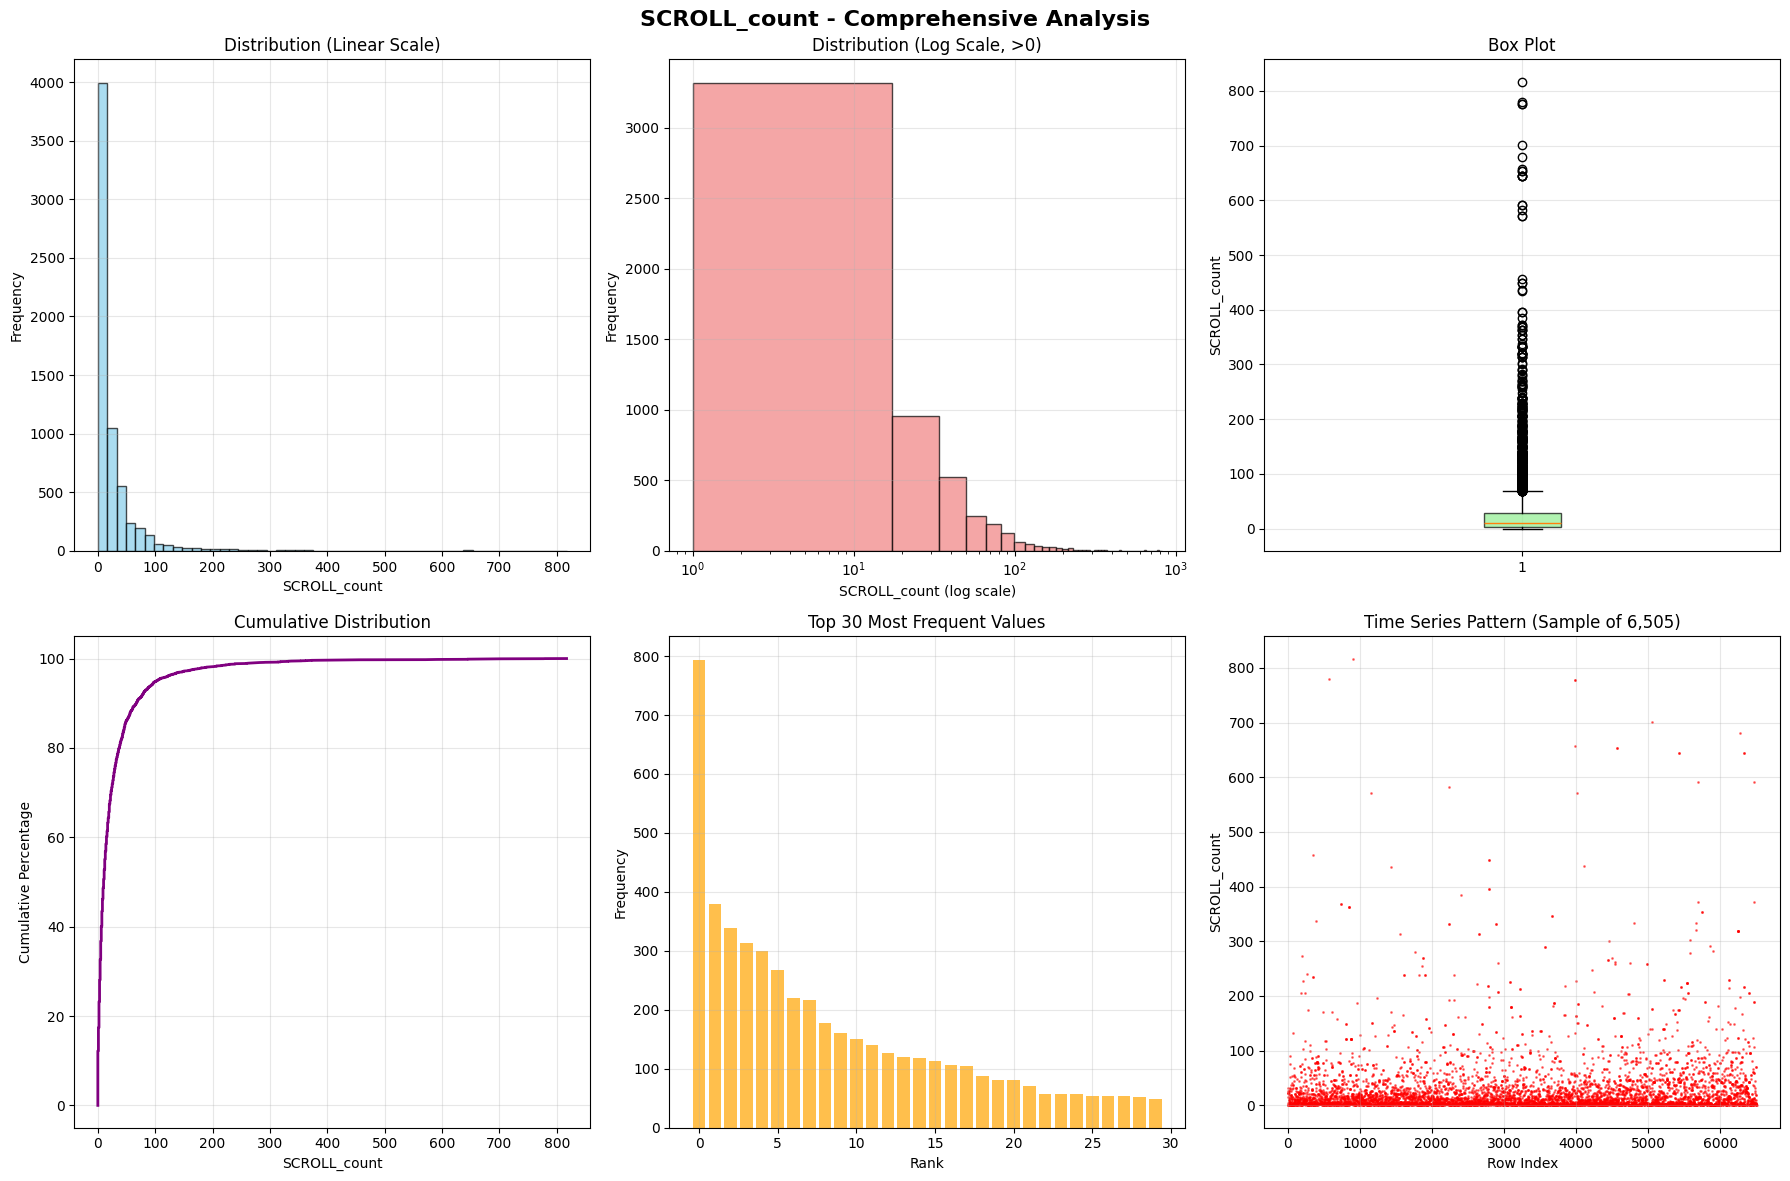


=== Bot Detection Insights ===
High zero-scroll rate (12.2%) may indicate bot traffic
Sessions with >99.5th percentile scrolls: 33
Threshold: 358 scrolls
Extremely high scroll counts may indicate automated behavior

Concentration in top 10 values: 48.6%

=== Distribution Shape ===
Skewness: 6.274
Highly right-skewed (long tail of high values)
Kurtosis: 57.446
Heavy-tailed (more outliers than normal distribution)

=== Correlation Analysis ===
Correlation with session_duration_s: 0.054
  → Weak correlation
Correlation with max_scroll_depth: 0.625
  → Moderate correlation
Correlation with total_scroll_depth: 0.575
  → Moderate correlation

=== Relationship with Scroll Depth ===
Correlation with max_scroll_depth: 0.625


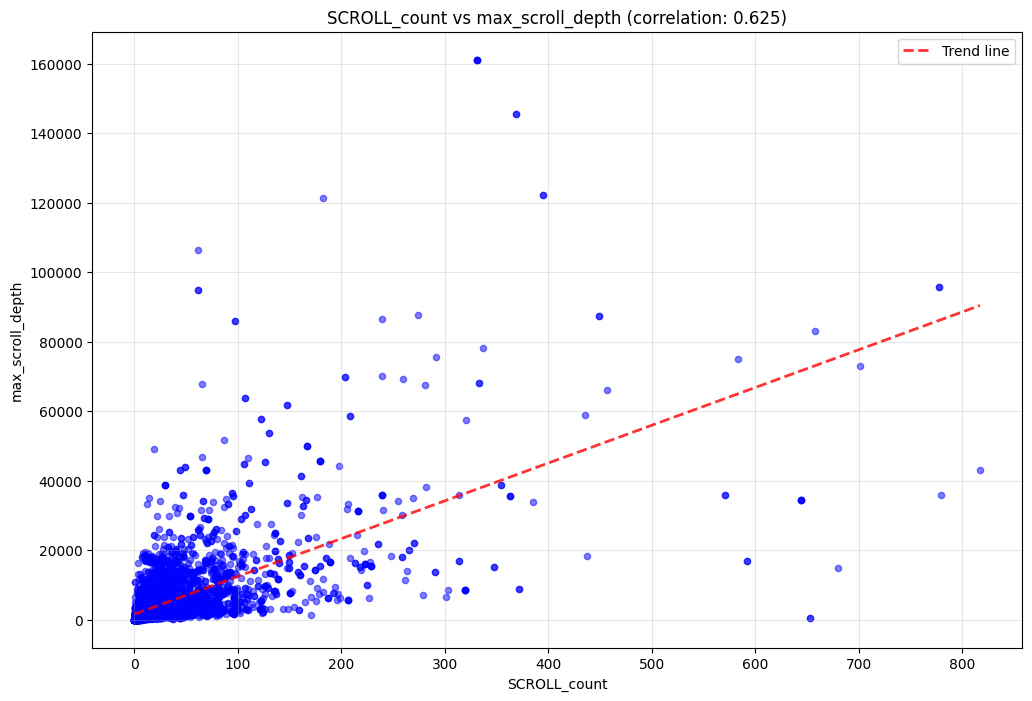

Sessions with high scroll count but low depth: 2
This pattern may indicate bot behavior (rapid scrolling without reading)

=== Engagement Patterns ===
Engagement distribution:
  Medium Engagement: 1,995 (30.67%)
  Low Engagement: 1,597 (24.55%)
  High Engagement: 1,224 (18.82%)
  Very High Engagement: 895 (13.76%)
  No Engagement: 794 (12.21%)


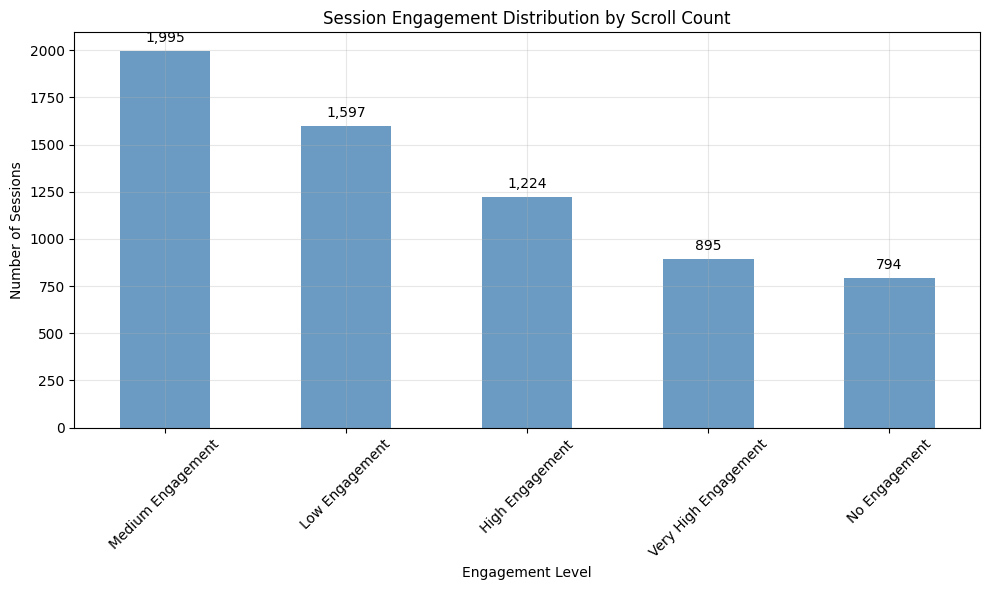


EDA COMPLETE: SCROLL_count


In [31]:
print(f"{'='*60}")
print("EDA START: SCROLL_count")
print(f"{'='*60}")

# Basic statistics
print(f"\n=== Basic Statistics for SCROLL_count ===")
print(f"Count: {df['SCROLL_count'].count():,}")
print(f"Mean: {df['SCROLL_count'].mean():.2f}")
print(f"Median: {df['SCROLL_count'].median():.2f}")
print(f"Mode: {df['SCROLL_count'].mode().iloc[0] if not df['SCROLL_count'].mode().empty else 'No mode'}")
print(f"Standard Deviation: {df['SCROLL_count'].std():.2f}")
print(f"Minimum: {df['SCROLL_count'].min()}")
print(f"Maximum: {df['SCROLL_count'].max()}")
print(f"Range: {df['SCROLL_count'].max() - df['SCROLL_count'].min()}")

# Percentiles
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
print(f"\n=== Percentiles ===")
for p in percentiles:
    value = df['SCROLL_count'].quantile(p/100)
    print(f"{p}th percentile: {value:.2f}")

# Check for missing values
missing_count = df['SCROLL_count'].isnull().sum()
print(f"\n=== Missing Values ===")
print(f"Missing values: {missing_count:,} ({missing_count/len(df)*100:.2f}%)")

# Zero values analysis
zero_count = (df['SCROLL_count'] == 0).sum()
print(f"\n=== Zero Values Analysis ===")
print(f"Zero scroll sessions: {zero_count:,} ({zero_count/len(df)*100:.2f}%)")
print("Zero scrolls could indicate:")
print("- Very brief visits")
print("- Bot behavior (no human interaction)")
print("- Page load without engagement")

# Value distribution analysis
print(f"\n=== Value Distribution ===")
value_counts = df['SCROLL_count'].value_counts().head(20)
print("Top 20 most frequent values:")
for value, count in value_counts.items():
    percentage = count/len(df)*100
    print(f"  {value} scrolls: {count:,} sessions ({percentage:.2f}%)")

# Outlier detection using IQR
Q1 = df['SCROLL_count'].quantile(0.25)
Q3 = df['SCROLL_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['SCROLL_count'] < lower_bound) | (df['SCROLL_count'] > upper_bound)]

print(f"\n=== Outlier Analysis (IQR Method) ===")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")

# Extreme values analysis
extreme_high = df[df['SCROLL_count'] > df['SCROLL_count'].quantile(0.99)]
print(f"\nExtreme high values (>99th percentile): {len(extreme_high):,}")
if len(extreme_high) > 0:
    print(f"Range of extreme values: {extreme_high['SCROLL_count'].min():.0f} - {extreme_high['SCROLL_count'].max():.0f}")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SCROLL_count - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Histogram with different bin strategies
axes[0, 0].hist(df['SCROLL_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution (Linear Scale)')
axes[0, 0].set_xlabel('SCROLL_count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log-scale histogram for better visualization of tail
scroll_positive = df[df['SCROLL_count'] > 0]['SCROLL_count']
if len(scroll_positive) > 0:
    axes[0, 1].hist(scroll_positive, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_title('Distribution (Log Scale, >0)')
    axes[0, 1].set_xlabel('SCROLL_count (log scale)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'No positive values', ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Distribution (Log Scale, >0)')

# 3. Box plot
axes[0, 2].boxplot(df['SCROLL_count'], patch_artist=True, 
                   boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[0, 2].set_title('Box Plot')
axes[0, 2].set_ylabel('SCROLL_count')
axes[0, 2].grid(True, alpha=0.3)

# 4. Cumulative distribution
sorted_values = np.sort(df['SCROLL_count'].dropna())
cumulative_percent = np.arange(1, len(sorted_values) + 1) / len(sorted_values) * 100
axes[1, 0].plot(sorted_values, cumulative_percent, linewidth=2, color='purple')
axes[1, 0].set_title('Cumulative Distribution')
axes[1, 0].set_xlabel('SCROLL_count')
axes[1, 0].set_ylabel('Cumulative Percentage')
axes[1, 0].grid(True, alpha=0.3)

# 5. Value frequency plot (top 30)
top_values = df['SCROLL_count'].value_counts().head(30)
axes[1, 1].bar(range(len(top_values)), top_values.values, color='orange', alpha=0.7)
axes[1, 1].set_title('Top 30 Most Frequent Values')
axes[1, 1].set_xlabel('Rank')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

# 6. Scatter plot against row index (to check for patterns)
sample_size = min(10000, len(df))  # Sample for performance
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_df = df.loc[sample_indices]
axes[1, 2].scatter(sample_df.index, sample_df['SCROLL_count'], alpha=0.5, s=1, color='red')
axes[1, 2].set_title(f'Time Series Pattern (Sample of {sample_size:,})')
axes[1, 2].set_xlabel('Row Index')
axes[1, 2].set_ylabel('SCROLL_count')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Bot detection insights
print(f"\n=== Bot Detection Insights ===")

# Analyze zero scroll patterns
if zero_count > 0:
    zero_percentage = zero_count/len(df)*100
    print(f"High zero-scroll rate ({zero_percentage:.1f}%) may indicate bot traffic")

# Analyze extremely high scroll counts
high_scroll_threshold = df['SCROLL_count'].quantile(0.995)  # Top 0.5%
high_scroll_count = (df['SCROLL_count'] > high_scroll_threshold).sum()
if high_scroll_count > 0:
    print(f"Sessions with >99.5th percentile scrolls: {high_scroll_count:,}")
    print(f"Threshold: {high_scroll_threshold:.0f} scrolls")
    print("Extremely high scroll counts may indicate automated behavior")

# Check for suspicious patterns
common_values = df['SCROLL_count'].value_counts().head(10)
total_in_top10 = common_values.sum()
concentration_ratio = total_in_top10 / len(df) * 100

print(f"\nConcentration in top 10 values: {concentration_ratio:.1f}%")
if concentration_ratio > 50:
    print("High concentration in few values suggests potential bot patterns")

# Statistical distribution assessment
from scipy import stats
skewness = stats.skew(df['SCROLL_count'].dropna())
kurtosis = stats.kurtosis(df['SCROLL_count'].dropna())

print(f"\n=== Distribution Shape ===")
print(f"Skewness: {skewness:.3f}")
if skewness > 1:
    print("Highly right-skewed (long tail of high values)")
elif skewness > 0.5:
    print("Moderately right-skewed")
elif skewness < -1:
    print("Highly left-skewed")
elif skewness < -0.5:
    print("Moderately left-skewed")
else:
    print("Approximately symmetric")

print(f"Kurtosis: {kurtosis:.3f}")
if kurtosis > 3:
    print("Heavy-tailed (more outliers than normal distribution)")
elif kurtosis < -1:
    print("Light-tailed (fewer outliers than normal distribution)")
else:
    print("Similar tail behavior to normal distribution")

# Correlation analysis with other features if available
print(f"\n=== Correlation Analysis ===")
correlation_features = ['session_duration_s', 'max_scroll_depth', 'total_scroll_depth', 
                        'CLICK_count', 'page_views', 'bounce_rate']

for feature in correlation_features:
    if feature in df.columns:
        correlation = df['SCROLL_count'].corr(df[feature])
        print(f"Correlation with {feature}: {correlation:.3f}")
        
        if abs(correlation) > 0.7:
            print(f"  → Strong correlation")
        elif abs(correlation) > 0.3:
            print(f"  → Moderate correlation")
        else:
            print(f"  → Weak correlation")

# Relationship with scroll depth if available
if 'max_scroll_depth' in df.columns:
    print(f"\n=== Relationship with Scroll Depth ===")
    correlation = df['SCROLL_count'].corr(df['max_scroll_depth'])
    print(f"Correlation with max_scroll_depth: {correlation:.3f}")
    
    # Create scatter plot
    plt.figure(figsize=(12, 8))
    
    # Sample for performance if dataset is large
    if len(df) > 10000:
        sample_df = df.sample(10000)
        print(f"Showing scatter plot with sample of 10,000 points")
    else:
        sample_df = df
    
    plt.scatter(sample_df['SCROLL_count'], sample_df['max_scroll_depth'], 
                alpha=0.5, s=20, color='blue')
    plt.xlabel('SCROLL_count')
    plt.ylabel('max_scroll_depth')
    plt.title(f'SCROLL_count vs max_scroll_depth (correlation: {correlation:.3f})')
    plt.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(sample_df['SCROLL_count'].dropna(), 
                   sample_df['max_scroll_depth'].dropna(), 1)
    p = np.poly1d(z)
    x_trend = np.linspace(sample_df['SCROLL_count'].min(), 
                         sample_df['SCROLL_count'].max(), 100)
    plt.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, label='Trend line')
    plt.legend()
    plt.show()
    
    # Analyze sessions with high scrolls but low depth (suspicious)
    high_scroll_low_depth = sample_df[
        (sample_df['SCROLL_count'] > sample_df['SCROLL_count'].quantile(0.75)) & 
        (sample_df['max_scroll_depth'] < sample_df['max_scroll_depth'].quantile(0.25))
    ]
    print(f"Sessions with high scroll count but low depth: {len(high_scroll_low_depth):,}")
    if len(high_scroll_low_depth) > 0:
        print("This pattern may indicate bot behavior (rapid scrolling without reading)")

# Session engagement patterns
print(f"\n=== Engagement Patterns ===")

# Define engagement categories based on scroll count
def categorize_scroll_engagement(scroll_count):
    if scroll_count == 0:
        return 'No Engagement'
    elif scroll_count <= 5:
        return 'Low Engagement'
    elif scroll_count <= 20:
        return 'Medium Engagement'
    elif scroll_count <= 50:
        return 'High Engagement'
    else:
        return 'Very High Engagement'

df_temp = df.copy()
df_temp['scroll_engagement'] = df_temp['SCROLL_count'].apply(categorize_scroll_engagement)
engagement_dist = df_temp['scroll_engagement'].value_counts()

print("Engagement distribution:")
for category, count in engagement_dist.items():
    percentage = count/len(df)*100
    print(f"  {category}: {count:,} ({percentage:.2f}%)")

# Visualize engagement distribution
plt.figure(figsize=(10, 6))
engagement_dist.plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Session Engagement Distribution by Scroll Count')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
for i, v in enumerate(engagement_dist.values):
    plt.text(i, v + len(df)*0.005, f'{v:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("EDA COMPLETE: SCROLL_count")
print(f"{'='*60}")


### RESIZE_count


STARTING EDA: RESIZE_count

=== Basic Statistics ===
Column: RESIZE_count
Total records: 6,505
Non-null values: 6,505
Null values: 0
Data type: int64

Descriptive Statistics:
  count: 6505.00
  mean: 7.98
  std: 17.96
  min: 0.00
  25%: 0.00
  50%: 2.00
  75%: 8.00
  max: 272.00

Additional Statistics:
  Mode: 0
  Variance: 322.44
  Skewness: 5.98
  Kurtosis: 56.48

=== Value Distribution Analysis ===
Unique values: 111
Most common values:
  0: 2,245 sessions (34.51%)
  1: 718 sessions (11.04%)
  2: 614 sessions (9.44%)
  3: 384 sessions (5.90%)
  4: 319 sessions (4.90%)
  5: 237 sessions (3.64%)
  6: 203 sessions (3.12%)
  7: 154 sessions (2.37%)
  8: 118 sessions (1.81%)
  10: 116 sessions (1.78%)

Zero resize sessions: 2,245 (34.51%)


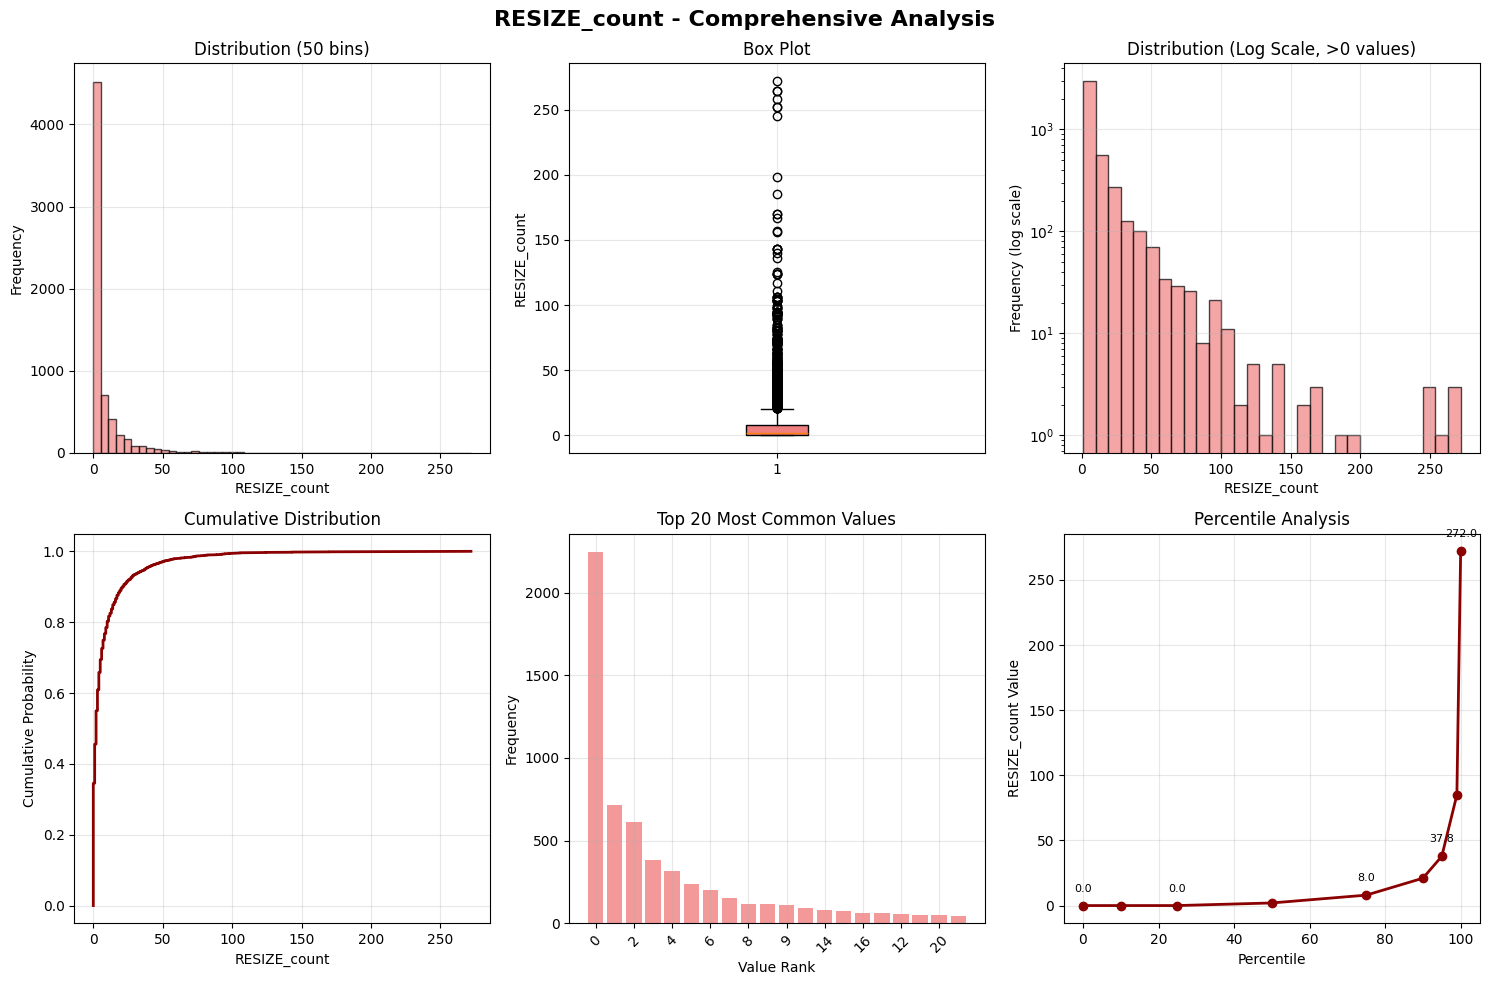


=== Percentile Analysis ===
Percentile breakdown:
    1.0th percentile:      0.0
    5.0th percentile:      0.0
   10.0th percentile:      0.0
   25.0th percentile:      0.0
   50.0th percentile:      2.0
   75.0th percentile:      8.0
   90.0th percentile:     21.0
   95.0th percentile:     37.8
   99.0th percentile:     85.0
   99.9th percentile:    221.3

=== Outlier Analysis ===
IQR Method:
  Q1: 0.00
  Q3: 8.00
  IQR: 8.00
  Lower bound: -12.00
  Upper bound: 20.00
  Low outliers: 0
  High outliers: 675
  Total outliers: 675 (10.38%)
  Highest outlier: 272
  Top 5 outlier values: [np.int64(272), np.int64(264), np.int64(258), np.int64(252), np.int64(245)]

=== Bot Detection Patterns ===

=== Extreme Behavior Patterns ===
Very high resize activity (≥85):
  Sessions: 67 (1.03%)
  Range: 85 - 272
  Top values in this range:
    85: 3 sessions
    89: 3 sessions
    91: 2 sessions
    92: 4 sessions
    93: 4 sessions

Zero resize activity:
  Sessions: 2,245 (34.51%)

=== Engagement P

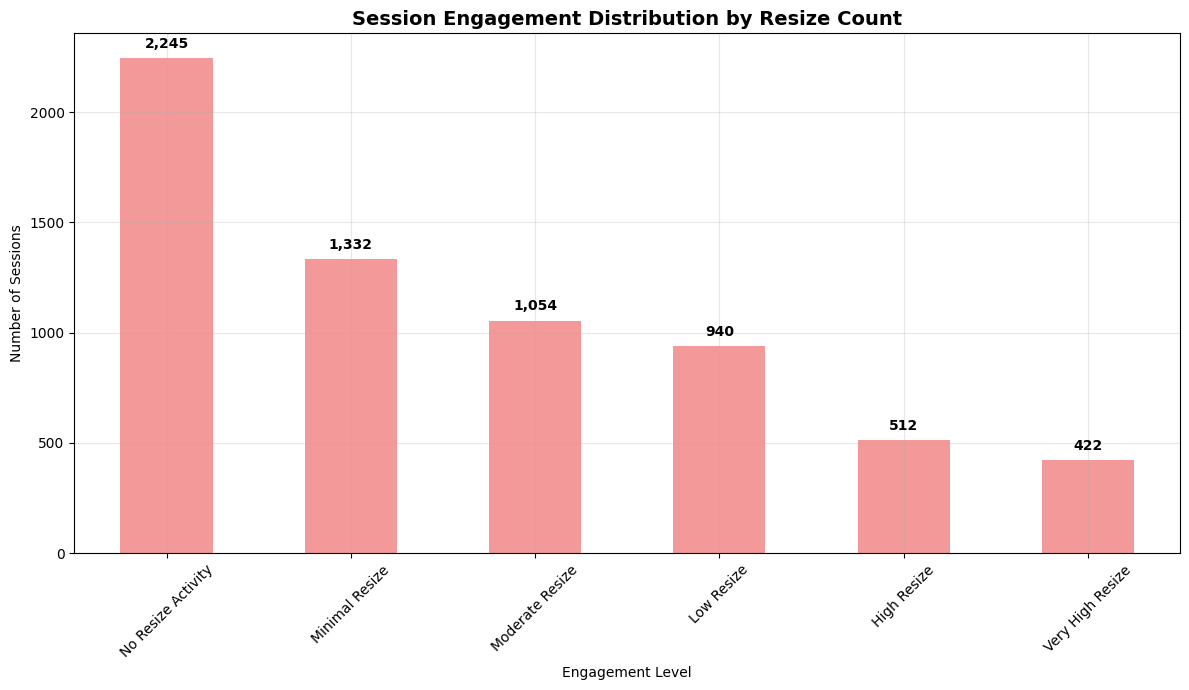


=== Correlation Analysis ===
Correlations with RESIZE_count:
  SCROLL_count: 0.651
  total_events: 0.544
  max_scroll_depth: 0.438
  total_scroll_depth: 0.347
  TOUCH_START_count: 0.321
  VISIBILITY_CHANGE_count: 0.184
  tbid_frequency: 0.062
  session_duration_s: 0.016

EDA COMPLETE: RESIZE_count


In [32]:
print(f"\n{'='*60}")
print("STARTING EDA: RESIZE_count")
print(f"{'='*60}")

# Basic statistics for RESIZE_count
print(f"\n=== Basic Statistics ===")
print(f"Column: RESIZE_count")
print(f"Total records: {len(df):,}")
print(f"Non-null values: {df['RESIZE_count'].notna().sum():,}")
print(f"Null values: {df['RESIZE_count'].isna().sum():,}")
print(f"Data type: {df['RESIZE_count'].dtype}")

# Descriptive statistics
resize_stats = df['RESIZE_count'].describe()
print(f"\nDescriptive Statistics:")
for stat, value in resize_stats.items():
    print(f"  {stat}: {value:.2f}")

# Additional statistics
print(f"\nAdditional Statistics:")
print(f"  Mode: {df['RESIZE_count'].mode().iloc[0] if not df['RESIZE_count'].mode().empty else 'No mode'}")
print(f"  Variance: {df['RESIZE_count'].var():.2f}")
print(f"  Skewness: {df['RESIZE_count'].skew():.2f}")
print(f"  Kurtosis: {df['RESIZE_count'].kurtosis():.2f}")

# Value counts for low values (to understand concentration)
print(f"\n=== Value Distribution Analysis ===")
resize_counts = df['RESIZE_count'].value_counts().sort_index()
print(f"Unique values: {df['RESIZE_count'].nunique():,}")
print(f"Most common values:")
top_values = df['RESIZE_count'].value_counts().head(10)
for value, count in top_values.items():
    percentage = count/len(df)*100
    print(f"  {value}: {count:,} sessions ({percentage:.2f}%)")

# Zero resize analysis
zero_resize = (df['RESIZE_count'] == 0).sum()
zero_percentage = zero_resize/len(df)*100
print(f"\nZero resize sessions: {zero_resize:,} ({zero_percentage:.2f}%)")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('RESIZE_count - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Histogram with different bin strategies
ax1 = axes[0, 0]
df['RESIZE_count'].hist(bins=50, alpha=0.7, color='lightcoral', edgecolor='black', ax=ax1)
ax1.set_title('Distribution (50 bins)')
ax1.set_xlabel('RESIZE_count')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# 2. Box plot
ax2 = axes[0, 1]
bp = ax2.boxplot(df['RESIZE_count'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightcoral')
ax2.set_title('Box Plot')
ax2.set_ylabel('RESIZE_count')
ax2.grid(True, alpha=0.3)

# 3. Log-scale histogram (if max > 0)
ax3 = axes[0, 2]
if df['RESIZE_count'].max() > 0:
    # Add 1 to handle zeros in log scale
    df_temp_log = df[df['RESIZE_count'] > 0]['RESIZE_count']
    if len(df_temp_log) > 0:
        ax3.hist(df_temp_log, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
        ax3.set_yscale('log')
        ax3.set_title('Distribution (Log Scale, >0 values)')
        ax3.set_xlabel('RESIZE_count')
        ax3.set_ylabel('Frequency (log scale)')
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'No positive values\nfor log scale', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Log Scale Distribution')
else:
    ax3.text(0.5, 0.5, 'All values are 0\nNo log scale possible', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Log Scale Distribution')

# 4. Cumulative distribution
ax4 = axes[1, 0]
sorted_data = np.sort(df['RESIZE_count'])
y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax4.plot(sorted_data, y_vals, color='darkred', linewidth=2)
ax4.set_title('Cumulative Distribution')
ax4.set_xlabel('RESIZE_count')
ax4.set_ylabel('Cumulative Probability')
ax4.grid(True, alpha=0.3)

# 5. Top 20 values bar chart
ax5 = axes[1, 1]
top_20_values = df['RESIZE_count'].value_counts().head(20)
ax5.bar(range(len(top_20_values)), top_20_values.values, color='lightcoral', alpha=0.8)
ax5.set_title('Top 20 Most Common Values')
ax5.set_xlabel('Value Rank')
ax5.set_ylabel('Frequency')
ax5.set_xticks(range(0, len(top_20_values), 2))
ax5.set_xticklabels([f'{top_20_values.index[i]}' for i in range(0, len(top_20_values), 2)], rotation=45)
ax5.grid(True, alpha=0.3)

# 6. Percentile analysis
ax6 = axes[1, 2]
percentiles = [0, 10, 25, 50, 75, 90, 95, 99, 100]
percentile_values = [np.percentile(df['RESIZE_count'], p) for p in percentiles]
ax6.plot(percentiles, percentile_values, marker='o', color='darkred', linewidth=2, markersize=6)
ax6.set_title('Percentile Analysis')
ax6.set_xlabel('Percentile')
ax6.set_ylabel('RESIZE_count Value')
ax6.grid(True, alpha=0.3)
for i, (p, v) in enumerate(zip(percentiles, percentile_values)):
    if i % 2 == 0:  # Show every other label to avoid crowding
        ax6.annotate(f'{v:.1f}', (p, v), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Detailed percentile analysis
print(f"\n=== Percentile Analysis ===")
percentiles_detailed = [1, 5, 10, 25, 50, 75, 90, 95, 99, 99.9]
print("Percentile breakdown:")
for p in percentiles_detailed:
    value = np.percentile(df['RESIZE_count'], p)
    print(f"  {p:5.1f}th percentile: {value:8.1f}")

# Outlier analysis using IQR method
print(f"\n=== Outlier Analysis ===")
Q1 = df['RESIZE_count'].quantile(0.25)
Q3 = df['RESIZE_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = df[df['RESIZE_count'] < lower_bound]
outliers_high = df[df['RESIZE_count'] > upper_bound]
total_outliers = len(outliers_low) + len(outliers_high)

print(f"IQR Method:")
print(f"  Q1: {Q1:.2f}")
print(f"  Q3: {Q3:.2f}")
print(f"  IQR: {IQR:.2f}")
print(f"  Lower bound: {lower_bound:.2f}")
print(f"  Upper bound: {upper_bound:.2f}")
print(f"  Low outliers: {len(outliers_low):,}")
print(f"  High outliers: {len(outliers_high):,}")
print(f"  Total outliers: {total_outliers:,} ({total_outliers/len(df)*100:.2f}%)")

if len(outliers_high) > 0:
    print(f"  Highest outlier: {df['RESIZE_count'].max():.0f}")
    print(f"  Top 5 outlier values: {sorted(df['RESIZE_count'].unique(), reverse=True)[:5]}")

# Bot detection patterns analysis
print(f"\n=== Bot Detection Patterns ===")

# Analyze relationship with is_bot if available
if 'is_bot' in df.columns:
    print("RESIZE_count by Bot Status:")
    bot_analysis = df.groupby('is_bot')['RESIZE_count'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    print(bot_analysis)
    
    # Statistical test
    from scipy import stats
    bot_resizes = df[df['is_bot'] == True]['RESIZE_count']
    human_resizes = df[df['is_bot'] == False]['RESIZE_count']
    
    if len(bot_resizes) > 0 and len(human_resizes) > 0:
        statistic, p_value = stats.mannwhitneyu(bot_resizes, human_resizes, alternative='two-sided')
        print(f"\nMann-Whitney U test:")
        print(f"  Statistic: {statistic:.2f}")
        print(f"  P-value: {p_value:.2e}")
        print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Extreme behavior analysis
print(f"\n=== Extreme Behavior Patterns ===")

# Very high resize counts (potential automation)
very_high_threshold = np.percentile(df['RESIZE_count'], 99)
very_high_resizes = df[df['RESIZE_count'] >= very_high_threshold]
print(f"Very high resize activity (≥{very_high_threshold:.0f}):")
print(f"  Sessions: {len(very_high_resizes):,} ({len(very_high_resizes)/len(df)*100:.2f}%)")

if len(very_high_resizes) > 0:
    print(f"  Range: {very_high_resizes['RESIZE_count'].min():.0f} - {very_high_resizes['RESIZE_count'].max():.0f}")
    
    # Show distribution of very high values
    very_high_dist = very_high_resizes['RESIZE_count'].value_counts().sort_index()
    print(f"  Top values in this range:")
    for value, count in very_high_dist.head(5).items():
        print(f"    {value:.0f}: {count} sessions")

# Zero resize analysis (potential bot pattern)
zero_resizes = df[df['RESIZE_count'] == 0]
print(f"\nZero resize activity:")
print(f"  Sessions: {len(zero_resizes):,} ({len(zero_resizes)/len(df)*100:.2f}%)")

# Engagement patterns analysis
print(f"\n=== Engagement Patterns ===")

# Define resize engagement categories
def categorize_resize_engagement(resize_count):
    if resize_count == 0:
        return 'No Resize Activity'
    elif resize_count <= 2:
        return 'Minimal Resize'
    elif resize_count <= 5:
        return 'Low Resize'
    elif resize_count <= 15:
        return 'Moderate Resize'
    elif resize_count <= 30:
        return 'High Resize'
    else:
        return 'Very High Resize'

df_temp = df.copy()
df_temp['resize_engagement'] = df_temp['RESIZE_count'].apply(categorize_resize_engagement)
engagement_dist = df_temp['resize_engagement'].value_counts()

print("Resize engagement distribution:")
for category, count in engagement_dist.items():
    percentage = count/len(df)*100
    print(f"  {category}: {count:,} ({percentage:.2f}%)")

# Visualize engagement distribution
plt.figure(figsize=(12, 7))
engagement_dist.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Session Engagement Distribution by Resize Count', fontsize=14, fontweight='bold')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
for i, v in enumerate(engagement_dist.values):
    plt.text(i, v + len(df)*0.005, f'{v:,}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation analysis if other numeric columns exist
print(f"\n=== Correlation Analysis ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_columns) > 1:
    correlations = df[numeric_columns].corr()['RESIZE_count'].sort_values(key=abs, ascending=False)
    print("Correlations with RESIZE_count:")
    for col, corr in correlations.items():
        if col != 'RESIZE_count':
            print(f"  {col}: {corr:.3f}")

print(f"\n{'='*60}")
print("EDA COMPLETE: RESIZE_count")
print(f"{'='*60}")


### VISIBILITY_CHANGE_count

EDA: VISIBILITY_CHANGE_count

=== Basic Statistics ===
Total records: 6,505
Missing values: 0
Data type: int64

=== Descriptive Statistics ===
count: 6505.00
mean: 2.61
std: 5.65
min: 0.00
25%: 0.00
50%: 1.00
75%: 3.00
max: 97.00
Mode: 0.00
Variance: 31.92
Standard Deviation: 5.65
Skewness: 6.84
Kurtosis: 80.28

=== Zero vs Non-Zero Analysis ===
Zero visibility changes: 2,753 (42.32%)
Non-zero visibility changes: 3,752 (57.68%)

=== Outlier Analysis (IQR Method) ===
Q1: 0.00
Q3: 3.00
IQR: 3.00
Lower bound: -4.50
Upper bound: 7.50
Number of outliers: 575 (8.84%)

=== Percentile Analysis ===
1th percentile: 0.00
5th percentile: 0.00
10th percentile: 0.00
25th percentile: 0.00
50th percentile: 1.00
75th percentile: 3.00
90th percentile: 7.00
95th percentile: 11.00
99th percentile: 27.00

=== Value Distribution ===
Top 20 most frequent values:
  0: 2,753 (42.32%)
  1: 1,313 (20.18%)
  2: 644 (9.90%)
  3: 453 (6.96%)
  4: 313 (4.81%)
  5: 225 (3.46%)
  6: 123 (1.89%)
  7: 106 (1.63%)
  8: 9

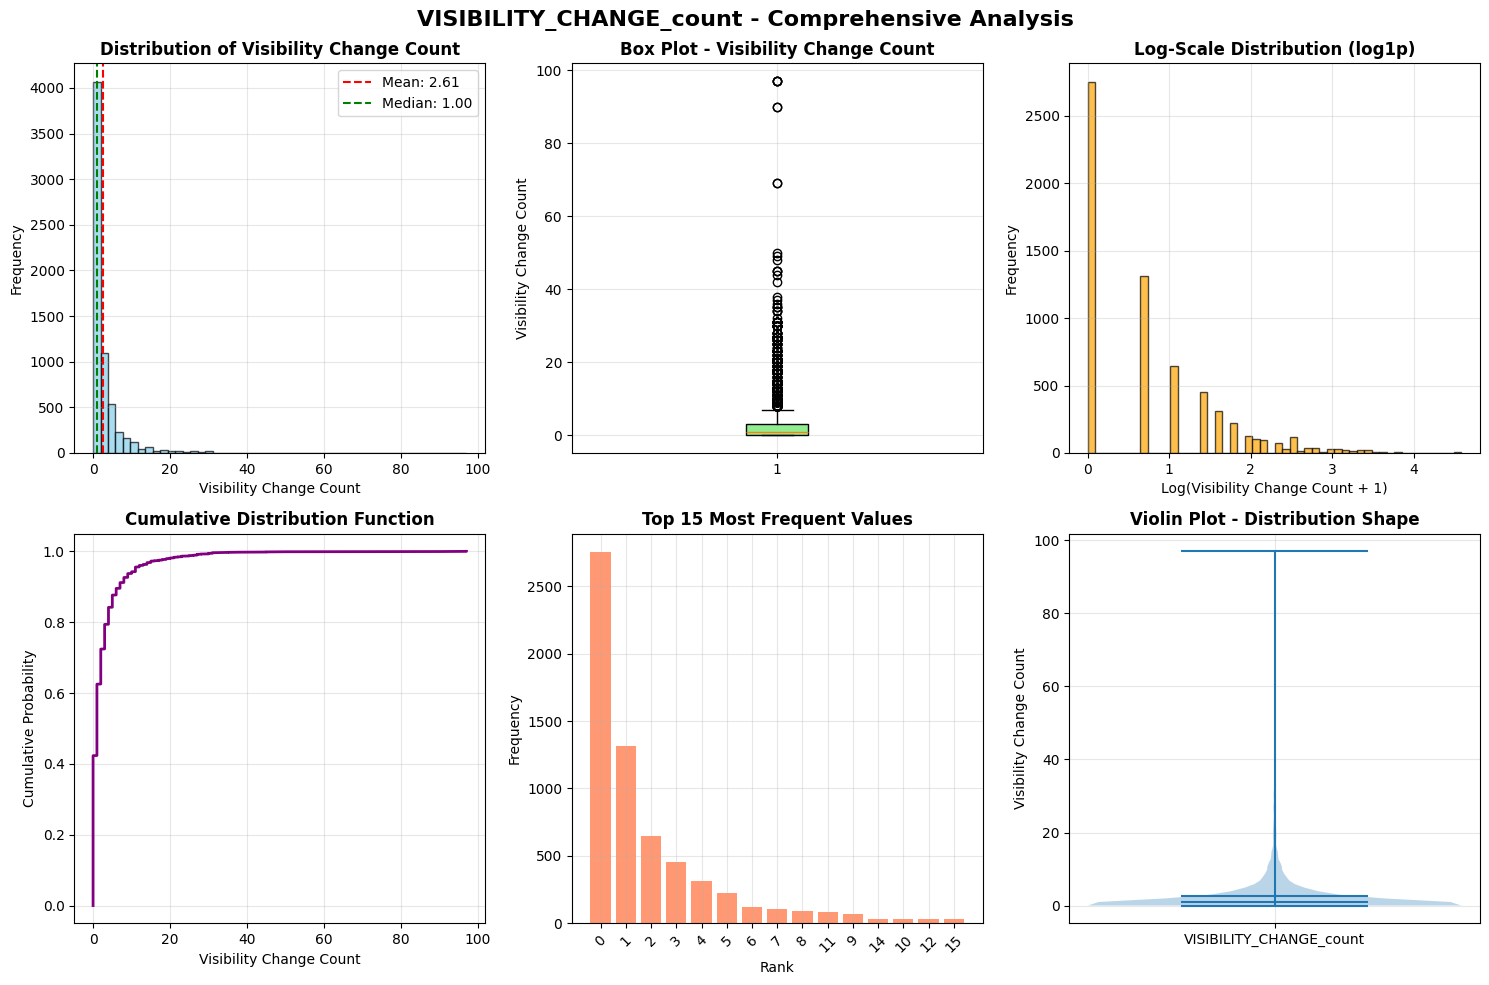

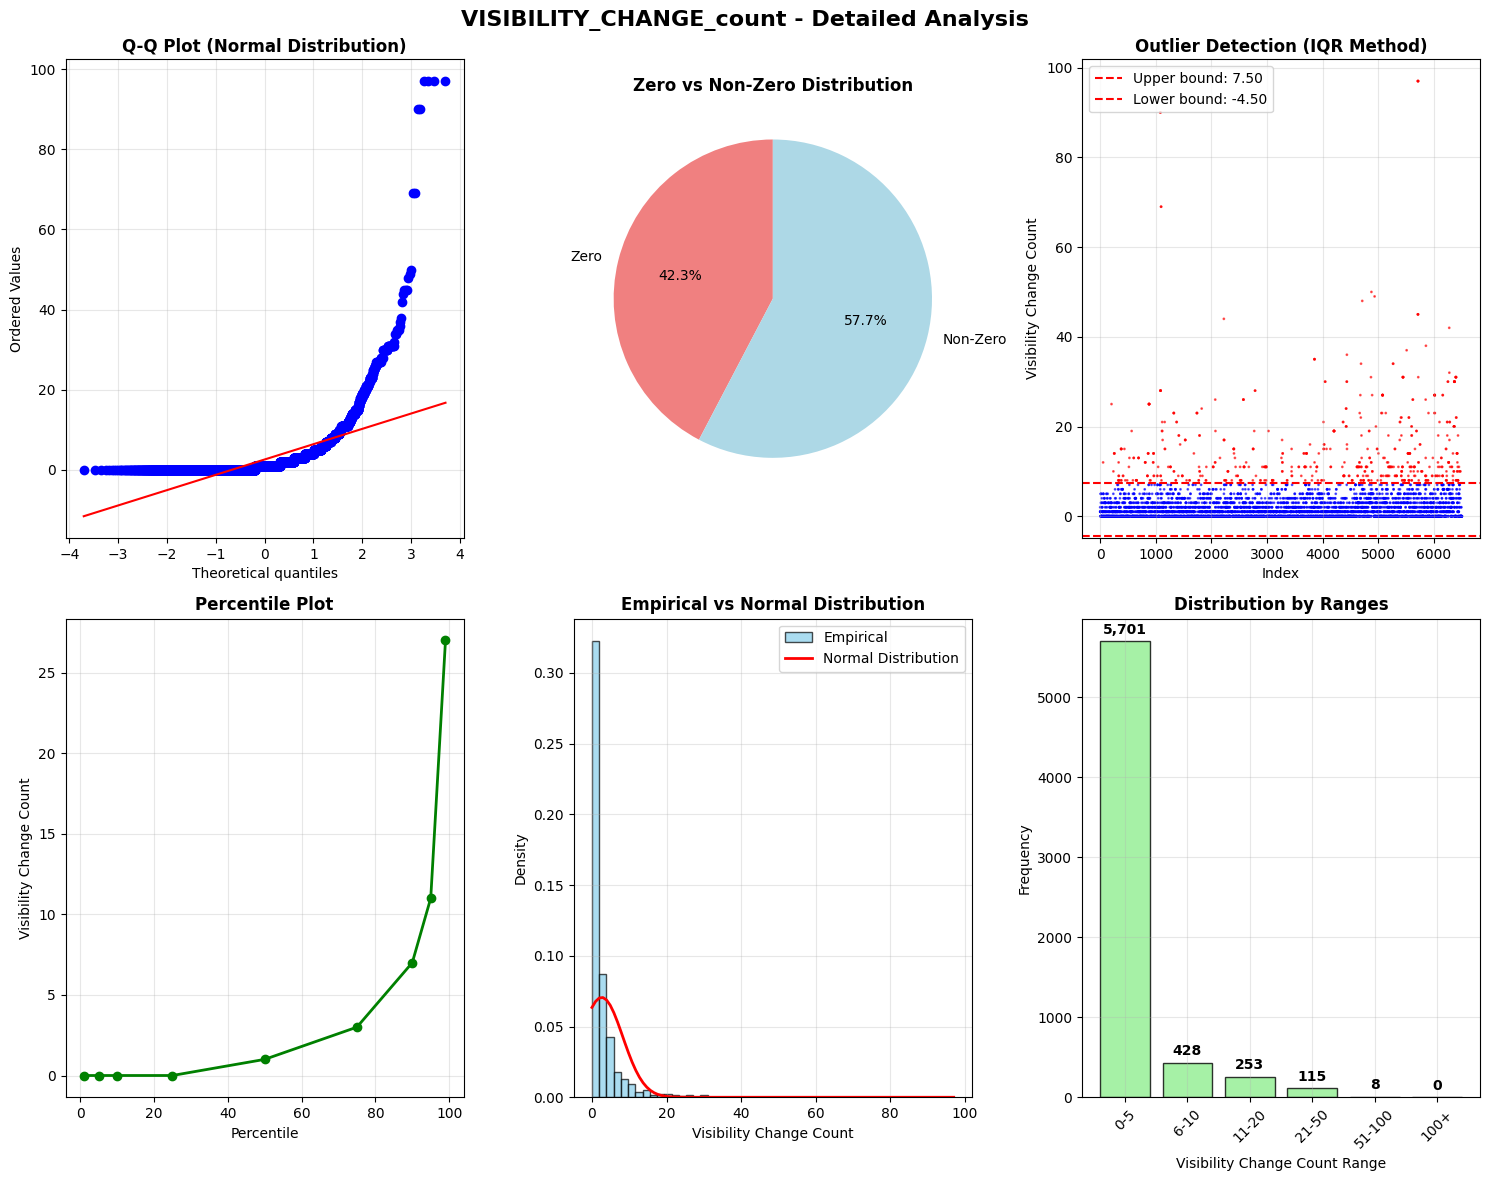


=== Statistical Tests ===
D'Agostino normality test: statistic=8224.5736, p-value=0.0000
Jarque-Bera test: statistic=1794964.0103, p-value=0.0000

Normality Assessment:
  Data does not appear to be normally distributed (p ≤ 0.05)

=== Business Insights ===
Visibility engagement distribution:
  Low Visibility: 2,948 (45.32%)
  No Visibility: 2,753 (42.32%)
  Moderate Visibility: 624 (9.59%)
  High Visibility: 142 (2.18%)
  Very High Visibility: 38 (0.58%)


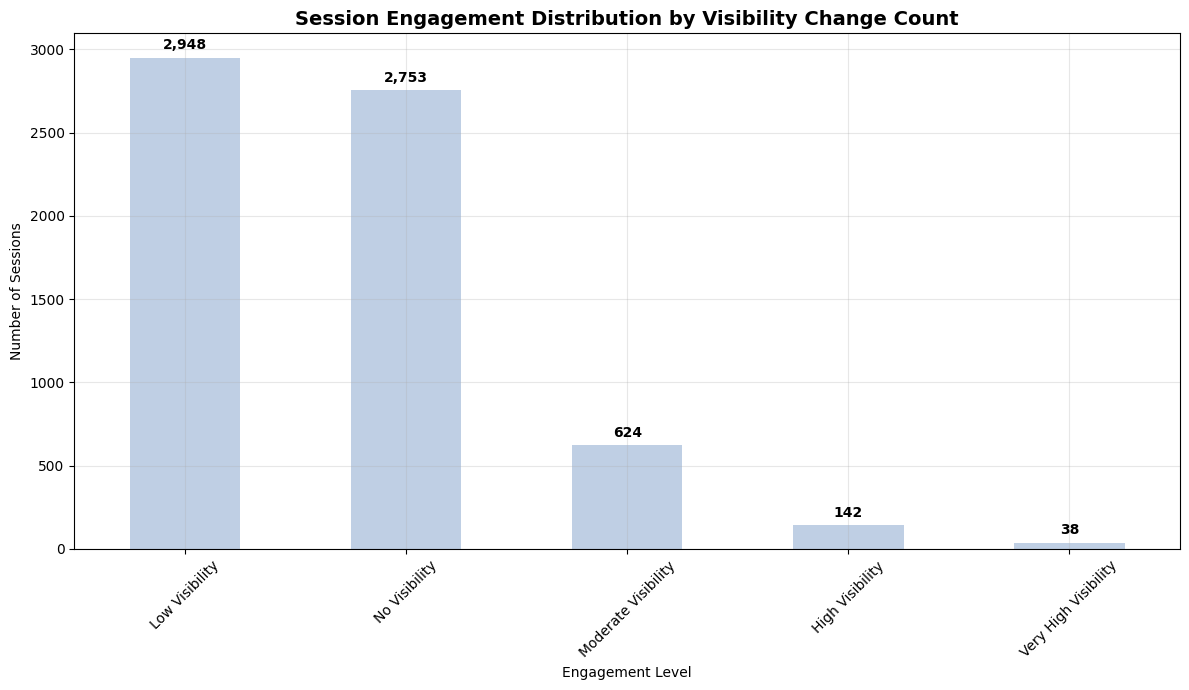


=== Correlation Analysis ===
Correlations with VISIBILITY_CHANGE_count:
  tbid_frequency: 0.330
  session_duration_s: 0.279
  total_events: 0.264
  SCROLL_count: 0.228
  RESIZE_count: 0.184
  total_scroll_depth: 0.081
  max_scroll_depth: 0.062
  TOUCH_START_count: 0.047

EDA COMPLETE: VISIBILITY_CHANGE_count


In [33]:
print(f"{'='*60}")
print("EDA: VISIBILITY_CHANGE_count")
print(f"{'='*60}")

# Basic statistics
print(f"\n=== Basic Statistics ===")
print(f"Total records: {len(df):,}")
print(f"Missing values: {df['VISIBILITY_CHANGE_count'].isnull().sum():,}")
print(f"Data type: {df['VISIBILITY_CHANGE_count'].dtype}")

# Descriptive statistics
print(f"\n=== Descriptive Statistics ===")
stats = df['VISIBILITY_CHANGE_count'].describe()
for stat, value in stats.items():
    print(f"{stat}: {value:.2f}")

# Additional statistics
print(f"Mode: {df['VISIBILITY_CHANGE_count'].mode().iloc[0]:.2f}")
print(f"Variance: {df['VISIBILITY_CHANGE_count'].var():.2f}")
print(f"Standard Deviation: {df['VISIBILITY_CHANGE_count'].std():.2f}")
print(f"Skewness: {df['VISIBILITY_CHANGE_count'].skew():.2f}")
print(f"Kurtosis: {df['VISIBILITY_CHANGE_count'].kurtosis():.2f}")

# Zero and non-zero analysis
zero_count = (df['VISIBILITY_CHANGE_count'] == 0).sum()
non_zero_count = (df['VISIBILITY_CHANGE_count'] > 0).sum()
print(f"\n=== Zero vs Non-Zero Analysis ===")
print(f"Zero visibility changes: {zero_count:,} ({zero_count/len(df)*100:.2f}%)")
print(f"Non-zero visibility changes: {non_zero_count:,} ({non_zero_count/len(df)*100:.2f}%)")

# Outlier detection using IQR method
Q1 = df['VISIBILITY_CHANGE_count'].quantile(0.25)
Q3 = df['VISIBILITY_CHANGE_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['VISIBILITY_CHANGE_count'] < lower_bound) | (df['VISIBILITY_CHANGE_count'] > upper_bound)]

print(f"\n=== Outlier Analysis (IQR Method) ===")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")

# Percentile analysis
print(f"\n=== Percentile Analysis ===")
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = df['VISIBILITY_CHANGE_count'].quantile(p/100)
    print(f"{p}th percentile: {value:.2f}")

# Value distribution analysis
print(f"\n=== Value Distribution ===")
value_counts = df['VISIBILITY_CHANGE_count'].value_counts().head(20)
print("Top 20 most frequent values:")
for value, count in value_counts.items():
    percentage = count/len(df)*100
    print(f"  {value}: {count:,} ({percentage:.2f}%)")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('VISIBILITY_CHANGE_count - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0, 0].hist(df['VISIBILITY_CHANGE_count'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Visibility Change Count', fontweight='bold')
axes[0, 0].set_xlabel('Visibility Change Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Add statistics to histogram
axes[0, 0].axvline(df['VISIBILITY_CHANGE_count'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["VISIBILITY_CHANGE_count"].mean():.2f}')
axes[0, 0].axvline(df['VISIBILITY_CHANGE_count'].median(), color='green', linestyle='--', 
                   label=f'Median: {df["VISIBILITY_CHANGE_count"].median():.2f}')
axes[0, 0].legend()

# 2. Box plot
box_plot = axes[0, 1].boxplot(df['VISIBILITY_CHANGE_count'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightgreen')
axes[0, 1].set_title('Box Plot - Visibility Change Count', fontweight='bold')
axes[0, 1].set_ylabel('Visibility Change Count')
axes[0, 1].grid(True, alpha=0.3)

# 3. Log-scale histogram (if applicable)
if df['VISIBILITY_CHANGE_count'].min() > 0:
    axes[0, 2].hist(np.log1p(df['VISIBILITY_CHANGE_count']), bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[0, 2].set_title('Log-Scale Distribution', fontweight='bold')
    axes[0, 2].set_xlabel('Log(Visibility Change Count + 1)')
    axes[0, 2].set_ylabel('Frequency')
else:
    # Use log1p for values including zero
    axes[0, 2].hist(np.log1p(df['VISIBILITY_CHANGE_count']), bins=50, color='orange', alpha=0.7, edgecolor='black')
    axes[0, 2].set_title('Log-Scale Distribution (log1p)', fontweight='bold')
    axes[0, 2].set_xlabel('Log(Visibility Change Count + 1)')
    axes[0, 2].set_ylabel('Frequency')
axes[0, 2].grid(True, alpha=0.3)

# 4. Cumulative distribution
sorted_values = np.sort(df['VISIBILITY_CHANGE_count'])
cumulative = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
axes[1, 0].plot(sorted_values, cumulative, color='purple', linewidth=2)
axes[1, 0].set_title('Cumulative Distribution Function', fontweight='bold')
axes[1, 0].set_xlabel('Visibility Change Count')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].grid(True, alpha=0.3)

# 5. Top values bar chart
top_values = df['VISIBILITY_CHANGE_count'].value_counts().head(15)
axes[1, 1].bar(range(len(top_values)), top_values.values, color='coral', alpha=0.8)
axes[1, 1].set_title('Top 15 Most Frequent Values', fontweight='bold')
axes[1, 1].set_xlabel('Rank')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(range(len(top_values)))
axes[1, 1].set_xticklabels([f'{int(val)}' for val in top_values.index], rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# 6. Violin plot
axes[1, 2].violinplot([df['VISIBILITY_CHANGE_count']], positions=[1], showmeans=True, showmedians=True)
axes[1, 2].set_title('Violin Plot - Distribution Shape', fontweight='bold')
axes[1, 2].set_ylabel('Visibility Change Count')
axes[1, 2].set_xticks([1])
axes[1, 2].set_xticklabels(['VISIBILITY_CHANGE_count'])
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Separate detailed analysis plots
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle('VISIBILITY_CHANGE_count - Detailed Analysis', fontsize=16, fontweight='bold')

# 1. Q-Q plot for normality assessment
from scipy import stats
stats.probplot(df['VISIBILITY_CHANGE_count'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot (Normal Distribution)', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Zero vs Non-zero comparison
zero_nonzero_data = ['Zero', 'Non-Zero']
zero_nonzero_counts = [zero_count, non_zero_count]
colors = ['lightcoral', 'lightblue']
wedges, texts, autotexts = axes[0, 1].pie(zero_nonzero_counts, labels=zero_nonzero_data, 
                                          autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Zero vs Non-Zero Distribution', fontweight='bold')

# 3. Outlier visualization
outlier_mask = (df['VISIBILITY_CHANGE_count'] < lower_bound) | (df['VISIBILITY_CHANGE_count'] > upper_bound)
axes[0, 2].scatter(range(len(df)), df['VISIBILITY_CHANGE_count'], 
                   c=['red' if x else 'blue' for x in outlier_mask], alpha=0.6, s=1)
axes[0, 2].axhline(y=upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
axes[0, 2].axhline(y=lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
axes[0, 2].set_title('Outlier Detection (IQR Method)', fontweight='bold')
axes[0, 2].set_xlabel('Index')
axes[0, 2].set_ylabel('Visibility Change Count')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Percentile plot
percentile_values = [df['VISIBILITY_CHANGE_count'].quantile(p/100) for p in percentiles]
axes[1, 0].plot(percentiles, percentile_values, marker='o', linewidth=2, markersize=6, color='green')
axes[1, 0].set_title('Percentile Plot', fontweight='bold')
axes[1, 0].set_xlabel('Percentile')
axes[1, 0].set_ylabel('Visibility Change Count')
axes[1, 0].grid(True, alpha=0.3)

# 5. Distribution comparison (empirical vs theoretical)
x = np.linspace(df['VISIBILITY_CHANGE_count'].min(), df['VISIBILITY_CHANGE_count'].max(), 100)
# Normal distribution overlay
normal_dist = stats.norm(df['VISIBILITY_CHANGE_count'].mean(), df['VISIBILITY_CHANGE_count'].std())
axes[1, 1].hist(df['VISIBILITY_CHANGE_count'], bins=50, density=True, alpha=0.7, color='skyblue', 
                label='Empirical', edgecolor='black')
axes[1, 1].plot(x, normal_dist.pdf(x), 'r-', linewidth=2, label='Normal Distribution')
axes[1, 1].set_title('Empirical vs Normal Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Visibility Change Count')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Range analysis
ranges = [(0, 5), (6, 10), (11, 20), (21, 50), (51, 100), (100, float('inf'))]
range_counts = []
range_labels = []
for start, end in ranges:
    if end == float('inf'):
        count = ((df['VISIBILITY_CHANGE_count'] >= start)).sum()
        label = f'{start}+'
    else:
        count = ((df['VISIBILITY_CHANGE_count'] >= start) & (df['VISIBILITY_CHANGE_count'] <= end)).sum()
        label = f'{start}-{end}'
    range_counts.append(count)
    range_labels.append(label)

axes[1, 2].bar(range_labels, range_counts, color='lightgreen', alpha=0.8, edgecolor='black')
axes[1, 2].set_title('Distribution by Ranges', fontweight='bold')
axes[1, 2].set_xlabel('Visibility Change Count Range')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3)

# Add count labels on bars
for i, v in enumerate(range_counts):
    axes[1, 2].text(i, v + max(range_counts)*0.01, f'{v:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical tests and advanced analysis
print(f"\n=== Statistical Tests ===")

# Normality tests
from scipy.stats import shapiro, normaltest, jarque_bera

# Shapiro-Wilk test (for smaller samples)
if len(df) <= 5000:
    shapiro_stat, shapiro_p = shapiro(df['VISIBILITY_CHANGE_count'].sample(5000) if len(df) > 5000 else df['VISIBILITY_CHANGE_count'])
    print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# D'Agostino's normality test
dagostino_stat, dagostino_p = normaltest(df['VISIBILITY_CHANGE_count'])
print(f"D'Agostino normality test: statistic={dagostino_stat:.4f}, p-value={dagostino_p:.4f}")

# Jarque-Bera test
jb_stat, jb_p = jarque_bera(df['VISIBILITY_CHANGE_count'])
print(f"Jarque-Bera test: statistic={jb_stat:.4f}, p-value={jb_p:.4f}")

# Interpretation
print(f"\nNormality Assessment:")
if dagostino_p > 0.05:
    print("  Data appears to be normally distributed (p > 0.05)")
else:
    print("  Data does not appear to be normally distributed (p ≤ 0.05)")

# Business insight categorization
def categorize_visibility_engagement(count):
    if count == 0:
        return 'No Visibility'
    elif count <= 5:
        return 'Low Visibility'
    elif count <= 15:
        return 'Moderate Visibility'
    elif count <= 30:
        return 'High Visibility'
    else:
        return 'Very High Visibility'

df_temp = df.copy()
df_temp['visibility_engagement'] = df_temp['VISIBILITY_CHANGE_count'].apply(categorize_visibility_engagement)
engagement_dist = df_temp['visibility_engagement'].value_counts()

print(f"\n=== Business Insights ===")
print("Visibility engagement distribution:")
for category, count in engagement_dist.items():
    percentage = count/len(df)*100
    print(f"  {category}: {count:,} ({percentage:.2f}%)")

# Visualize engagement distribution
plt.figure(figsize=(12, 7))
engagement_dist.plot(kind='bar', color='lightsteelblue', alpha=0.8)
plt.title('Session Engagement Distribution by Visibility Change Count', fontsize=14, fontweight='bold')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
for i, v in enumerate(engagement_dist.values):
    plt.text(i, v + len(df)*0.005, f'{v:,}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation analysis if other numeric columns exist
print(f"\n=== Correlation Analysis ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_columns) > 1:
    correlations = df[numeric_columns].corr()['VISIBILITY_CHANGE_count'].sort_values(key=abs, ascending=False)
    print("Correlations with VISIBILITY_CHANGE_count:")
    for col, corr in correlations.items():
        if col != 'VISIBILITY_CHANGE_count':
            print(f"  {col}: {corr:.3f}")

print(f"\n{'='*60}")
print("EDA COMPLETE: VISIBILITY_CHANGE_count")
print(f"{'='*60}")


# feature transform and create_new features

### created_at


In [34]:
# Feature Engineering for created_at column
print("=== FEATURE ENGINEERING: created_at ===")
print(f"Original created_at type: {df['created_at'].dtype}")

# Convert to datetime if not already
df['created_at'] = pd.to_datetime(df['created_at'])
print(f"Converted created_at type: {df['created_at'].dtype}")

# Extract temporal features
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek  # 0=Monday, 6=Sunday
df['day_of_month'] = df['created_at'].dt.day
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Saturday=5, Sunday=6

# Business hours feature (assuming 9 AM to 5 PM as business hours)
df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17)).astype(int)

# Time-based features for bot detection
df['is_night_time'] = ((df['hour'] >= 22) | (df['hour'] <= 5)).astype(int)  # 10 PM to 5 AM
df['is_peak_hours'] = df['hour'].isin([12, 13, 18, 19, 20]).astype(int)  # Lunch and evening peaks

# Calculate time since first record
min_time = df['created_at'].min()
df['days_since_start'] = (df['created_at'] - min_time).dt.days

# Display sample of new features
print("\n=== New Temporal Features Created ===")
temporal_features = ['hour', 'day_of_week', 'day_of_month', 'month', 'year', 
                    'is_weekend', 'is_business_hours', 'is_night_time', 
                    'is_peak_hours', 'days_since_start']

print("Sample of new features:")
print(df[['created_at'] + temporal_features].head(10))

print(f"\n=== Feature Summary ===")
for feature in temporal_features:
    print(f"{feature}: {df[feature].nunique()} unique values")

=== FEATURE ENGINEERING: created_at ===
Original created_at type: object
Converted created_at type: datetime64[ns]

=== New Temporal Features Created ===
Sample of new features:
               created_at  hour  day_of_week  day_of_month  month  year  \
0 2025-02-25 17:31:39.031    17            1            25      2  2025   
1 2025-02-25 05:15:14.398     5            1            25      2  2025   
2 2025-02-25 17:51:57.943    17            1            25      2  2025   
3 2025-02-25 19:51:16.290    19            1            25      2  2025   
4 2025-02-25 14:08:20.037    14            1            25      2  2025   
5 2025-02-25 13:07:17.950    13            1            25      2  2025   
6 2025-02-25 22:03:41.230    22            1            25      2  2025   
7 2025-02-25 06:07:12.246     6            1            25      2  2025   
8 2025-02-25 06:07:24.520     6            1            25      2  2025   
9 2025-02-25 10:14:48.145    10            1            25      2  2025 

=== COMPREHENSIVE TEMPORAL EDA ===


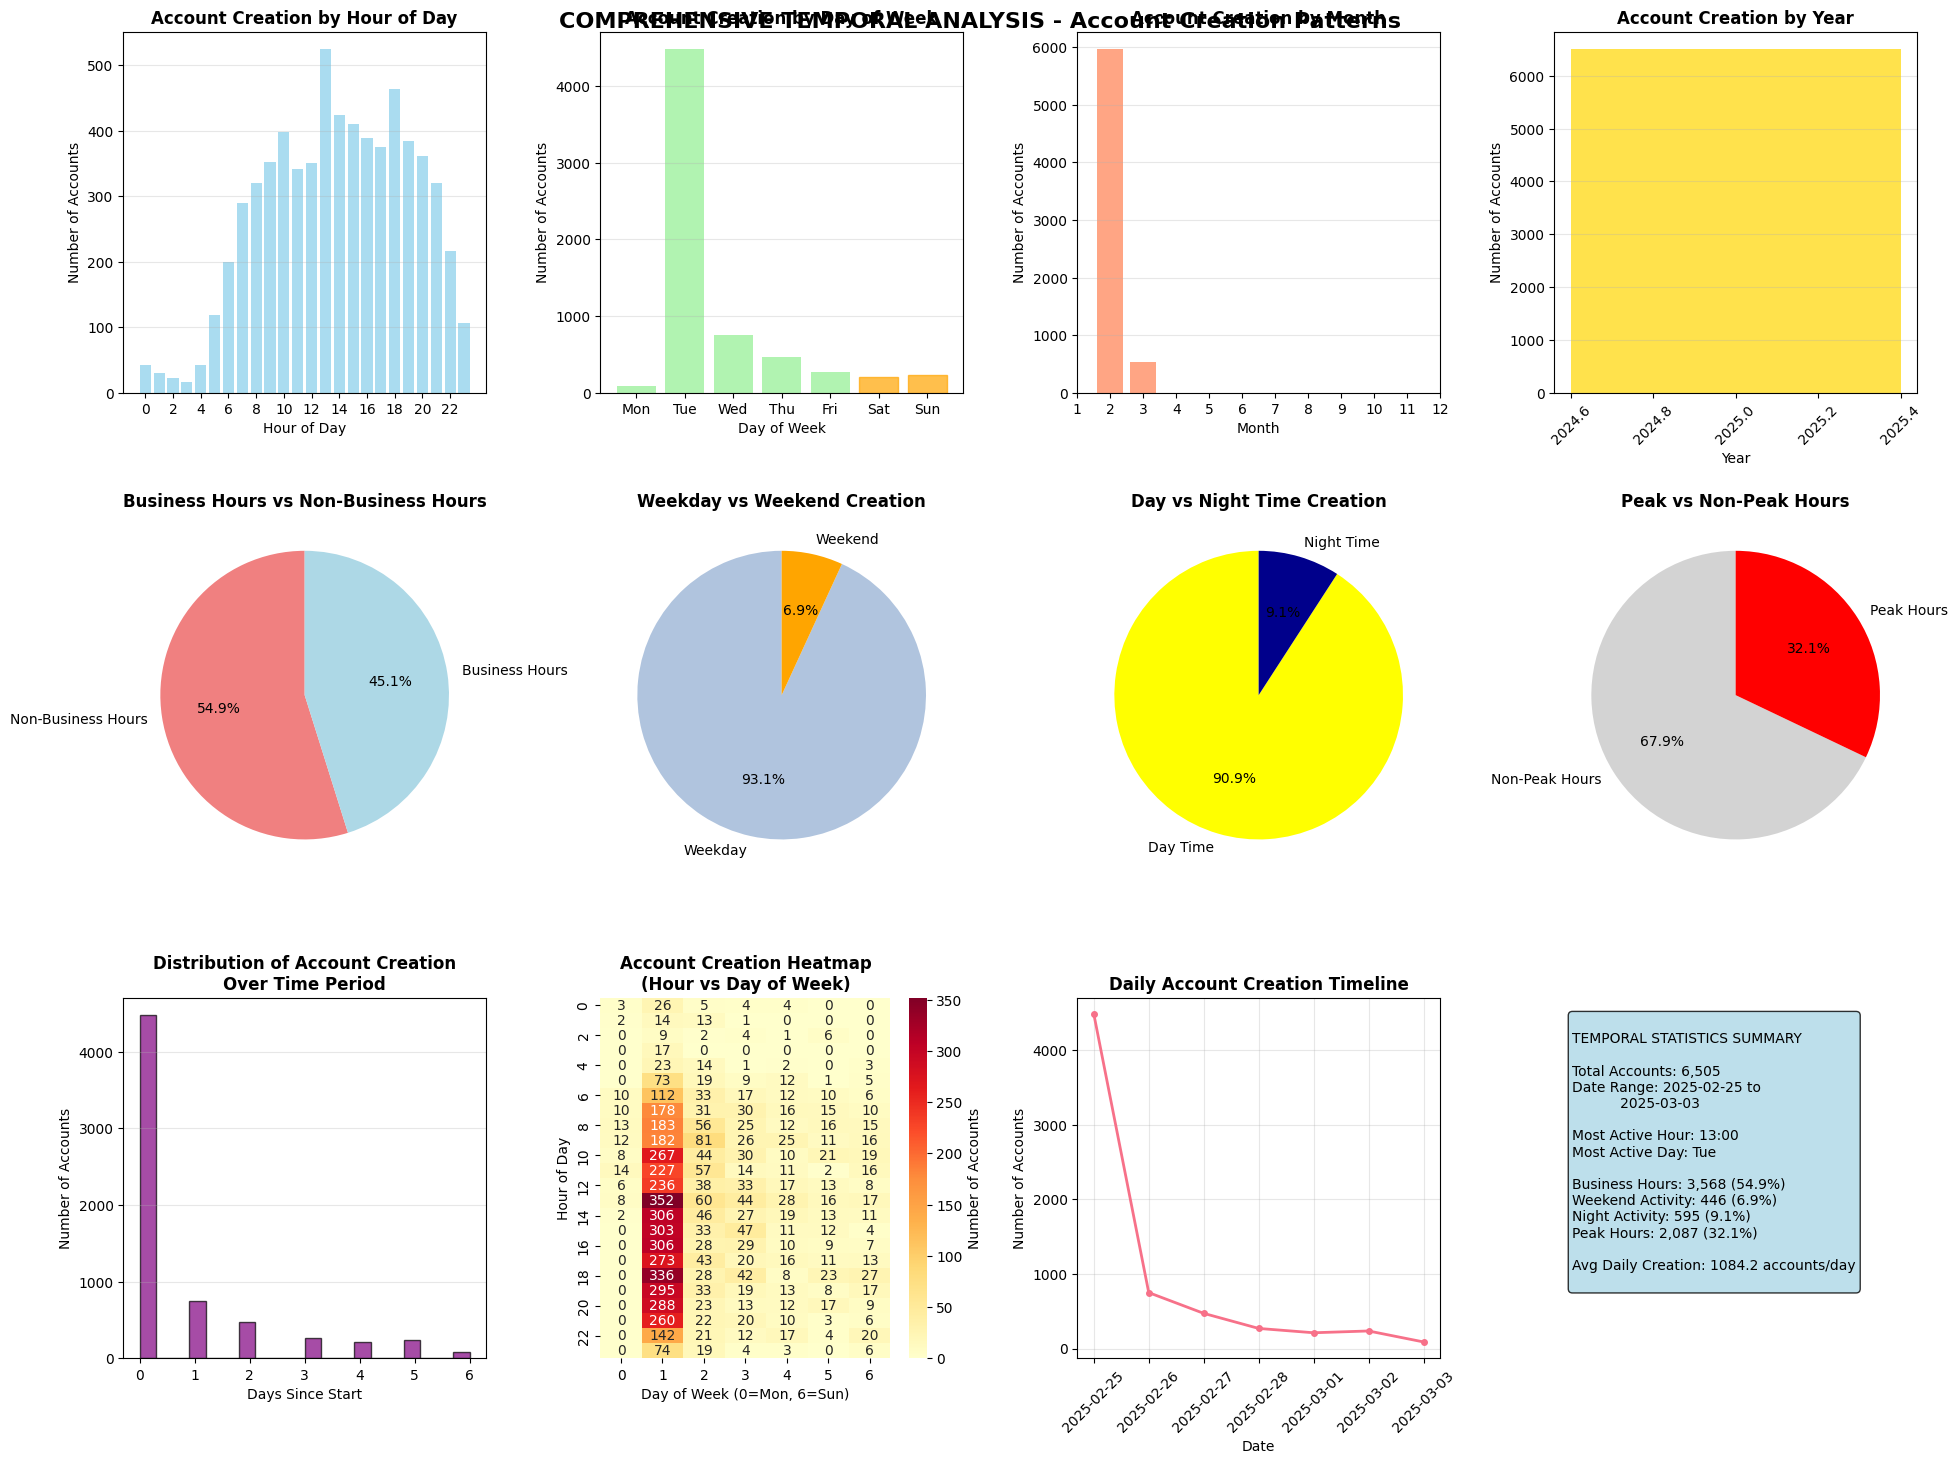


=== DETAILED TEMPORAL INSIGHTS ===

1. HOURLY PATTERN ANALYSIS:
      Account_Count  Business_Hours  Night_Time  Peak_Hours
hour                                                       
0                42               0           1           0
1                30               0           1           0
2                22               0           1           0
3                17               0           1           0
4                43               0           1           0
5               119               0           1           0
6               200               0           0           0
7               290               0           0           0
8               320               0           0           0
9               353               1           0           0
10              399               1           0           0
11              341               1           0           0
12              351               1           0           1
13              525               1

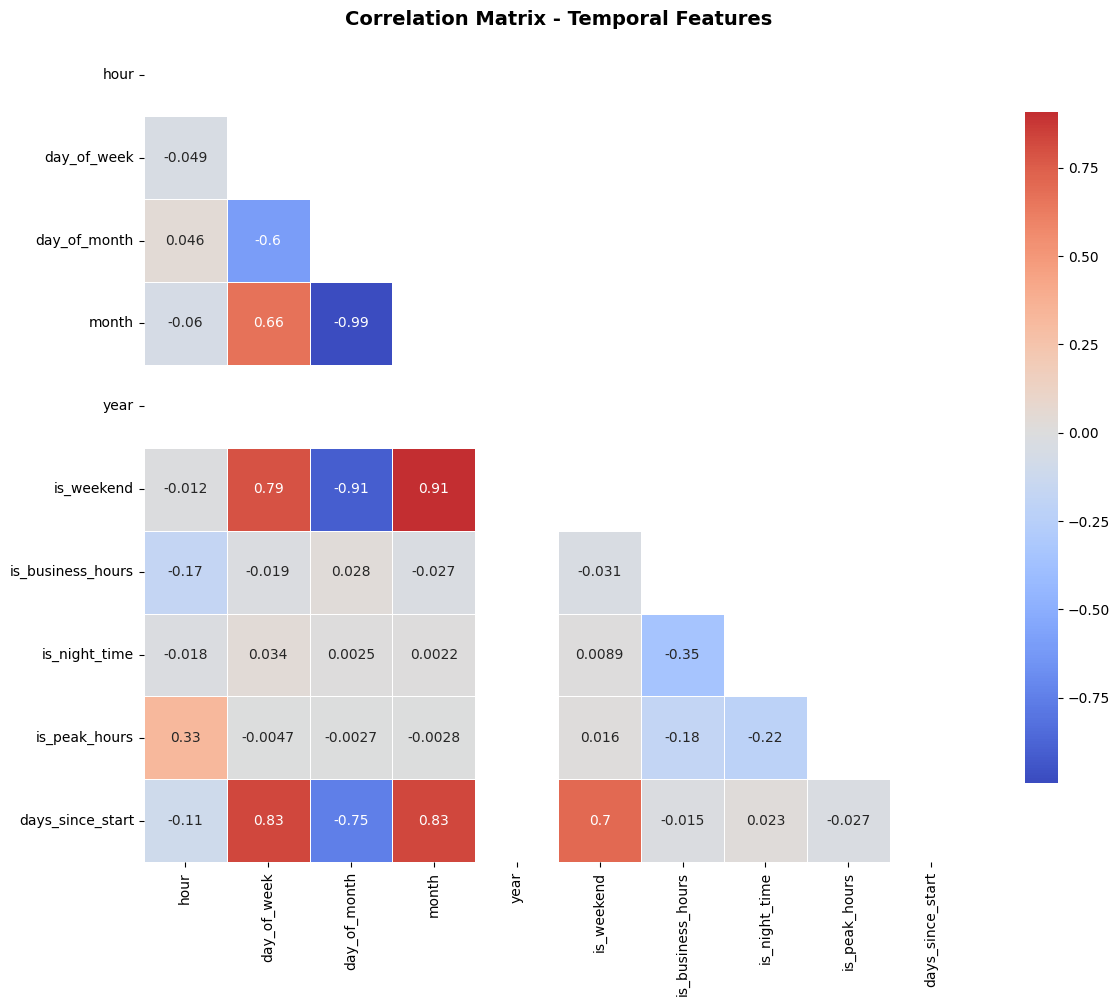


High correlations (|r| > 0.5):
day_of_week <-> day_of_month: -0.596
day_of_week <-> month: 0.664
day_of_week <-> is_weekend: 0.789
day_of_week <-> days_since_start: 0.833
day_of_month <-> month: -0.992
day_of_month <-> is_weekend: -0.910
day_of_month <-> days_since_start: -0.751
month <-> is_weekend: 0.907
month <-> days_since_start: 0.827
is_weekend <-> days_since_start: 0.705


In [35]:
# Comprehensive EDA for Temporal Features (created_at)
print("=== COMPREHENSIVE TEMPORAL EDA ===")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create figure with multiple subplots for temporal analysis
fig = plt.figure(figsize=(20, 15))

# 1. Distribution of account creation by hour
plt.subplot(3, 4, 1)
hour_dist = df['hour'].value_counts().sort_index()
plt.bar(hour_dist.index, hour_dist.values, alpha=0.7, color='skyblue')
plt.title('Account Creation by Hour of Day', fontsize=12, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accounts')
plt.xticks(range(0, 24, 2))
plt.grid(axis='y', alpha=0.3)

# 2. Distribution by day of week
plt.subplot(3, 4, 2)
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_dist = df['day_of_week'].value_counts().sort_index()
bars = plt.bar(range(7), dow_dist.values, alpha=0.7, color='lightgreen')
plt.title('Account Creation by Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accounts')
plt.xticks(range(7), dow_labels)
plt.grid(axis='y', alpha=0.3)

# Highlight weekends
bars[5].set_color('orange')  # Saturday
bars[6].set_color('orange')  # Sunday

# 3. Monthly distribution
plt.subplot(3, 4, 3)
month_dist = df['month'].value_counts().sort_index()
plt.bar(month_dist.index, month_dist.values, alpha=0.7, color='coral')
plt.title('Account Creation by Month', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Accounts')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3)

# 4. Year distribution
plt.subplot(3, 4, 4)
year_dist = df['year'].value_counts().sort_index()
plt.bar(year_dist.index, year_dist.values, alpha=0.7, color='gold')
plt.title('Account Creation by Year', fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 5. Business hours vs non-business hours
plt.subplot(3, 4, 5)
bh_dist = df['is_business_hours'].value_counts()
labels = ['Non-Business Hours', 'Business Hours']
colors = ['lightcoral', 'lightblue']
plt.pie(bh_dist.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Business Hours vs Non-Business Hours', fontsize=12, fontweight='bold')

# 6. Weekend vs weekday
plt.subplot(3, 4, 6)
weekend_dist = df['is_weekend'].value_counts()
labels = ['Weekday', 'Weekend']
colors = ['lightsteelblue', 'orange']
plt.pie(weekend_dist.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Weekday vs Weekend Creation', fontsize=12, fontweight='bold')

# 7. Night time activity
plt.subplot(3, 4, 7)
night_dist = df['is_night_time'].value_counts()
labels = ['Day Time', 'Night Time']
colors = ['yellow', 'darkblue']
plt.pie(night_dist.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Day vs Night Time Creation', fontsize=12, fontweight='bold')

# 8. Peak hours activity
plt.subplot(3, 4, 8)
peak_dist = df['is_peak_hours'].value_counts()
labels = ['Non-Peak Hours', 'Peak Hours']
colors = ['lightgray', 'red']
plt.pie(peak_dist.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Peak vs Non-Peak Hours', fontsize=12, fontweight='bold')

# 9. Days since start distribution
plt.subplot(3, 4, 9)
plt.hist(df['days_since_start'], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution of Account Creation\nOver Time Period', fontsize=12, fontweight='bold')
plt.xlabel('Days Since Start')
plt.ylabel('Number of Accounts')
plt.grid(axis='y', alpha=0.3)

# 10. Hour vs Day of Week heatmap - Create a count of rows for the pivot table
plt.subplot(3, 4, 10)
# Create a temporary column for counting
df['temp_count'] = 1
pivot_table = df.pivot_table(values='temp_count', index='hour', columns='day_of_week', aggfunc='sum', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Accounts'})
plt.title('Account Creation Heatmap\n(Hour vs Day of Week)', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Hour of Day')

# 11. Time series plot
plt.subplot(3, 4, 11)
daily_counts = df.groupby(df['created_at'].dt.date).size()
plt.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2, markersize=4)
plt.title('Daily Account Creation Timeline', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 12. Statistical summary box
plt.subplot(3, 4, 12)
plt.axis('off')
stats_text = f"""
TEMPORAL STATISTICS SUMMARY

Total Accounts: {len(df):,}
Date Range: {df['created_at'].min().strftime('%Y-%m-%d')} to 
           {df['created_at'].max().strftime('%Y-%m-%d')}

Most Active Hour: {df['hour'].mode().iloc[0]}:00
Most Active Day: {dow_labels[df['day_of_week'].mode().iloc[0]]}

Business Hours: {(df['is_business_hours']==1).sum():,} ({(df['is_business_hours']==1).mean()*100:.1f}%)
Weekend Activity: {(df['is_weekend']==1).sum():,} ({(df['is_weekend']==1).mean()*100:.1f}%)
Night Activity: {(df['is_night_time']==1).sum():,} ({(df['is_night_time']==1).mean()*100:.1f}%)
Peak Hours: {(df['is_peak_hours']==1).sum():,} ({(df['is_peak_hours']==1).mean()*100:.1f}%)

Avg Daily Creation: {len(df)/df['days_since_start'].max():.1f} accounts/day
"""
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout(pad=2.0)
plt.suptitle('COMPREHENSIVE TEMPORAL ANALYSIS - Account Creation Patterns', 
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

# Clean up temporary column
df.drop('temp_count', axis=1, inplace=True)

# Additional detailed analysis
print("\n=== DETAILED TEMPORAL INSIGHTS ===")

# Hour analysis
print("\n1. HOURLY PATTERN ANALYSIS:")
hourly_stats = df.groupby('hour').agg({
    'hour': 'count',  # Count of records per hour
    'is_business_hours': 'first',
    'is_night_time': 'first',
    'is_peak_hours': 'first'
}).round(2)
hourly_stats.columns = ['Account_Count', 'Business_Hours', 'Night_Time', 'Peak_Hours']
print(hourly_stats)

# Suspicious temporal patterns
print("\n2. POTENTIAL BOT INDICATORS:")
print(f"Accounts created during night hours (22:00-05:59): {(df['is_night_time']==1).sum():,} ({(df['is_night_time']==1).mean()*100:.1f}%)")
print(f"Accounts created during business hours: {(df['is_business_hours']==1).sum():,} ({(df['is_business_hours']==1).mean()*100:.1f}%)")
print(f"Weekend account creation: {(df['is_weekend']==1).sum():,} ({(df['is_weekend']==1).mean()*100:.1f}%)")

# Find anomalous hours
hour_counts = df['hour'].value_counts().sort_index()
hour_mean = hour_counts.mean()
hour_std = hour_counts.std()
anomalous_hours = hour_counts[(hour_counts > hour_mean + 2*hour_std) | (hour_counts < hour_mean - 2*hour_std)]
print(f"\nAnomalous hours (>2 std from mean): {anomalous_hours.to_dict()}")

# Day of week patterns
print("\n3. DAY OF WEEK PATTERNS:")
dow_stats = df.groupby('day_of_week').agg({
    'day_of_week': 'count',  # Count of records per day
    'is_weekend': 'first'
}).round(2)
dow_stats.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats.columns = ['Account_Count', 'Is_Weekend']
print(dow_stats)

# Create correlation matrix for temporal features
print("\n4. TEMPORAL FEATURE CORRELATIONS:")
temporal_corr = df[temporal_features].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(temporal_corr, dtype=bool))
sns.heatmap(temporal_corr, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Temporal Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nHigh correlations (|r| > 0.5):")
for i in range(len(temporal_corr.columns)):
    for j in range(i+1, len(temporal_corr.columns)):
        corr_val = temporal_corr.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{temporal_corr.columns[i]} <-> {temporal_corr.columns[j]}: {corr_val:.3f}")


### user_agent

In [36]:
# Feature Engineering for user_agent column
print("=== FEATURE ENGINEERING: user_agent ===")
print(f"Original user_agent type: {df['user_agent'].dtype}")
print(f"Total user_agent entries: {len(df['user_agent'])}")
print(f"Unique user_agent strings: {df['user_agent'].nunique()}")

# Extract browser information
df['browser'] = df['user_agent'].str.extract(r'(Chrome|Firefox|Safari|Edge|Opera|Internet Explorer)', expand=False)
df['browser'] = df['browser'].fillna('Other')

# Extract operating system
df['os'] = df['user_agent'].str.extract(r'(Windows|Mac|Linux|Android|iOS|iPhone|iPad)', expand=False)
df['os'] = df['os'].fillna('Other')

# Extract device type
df['device_type'] = 'Desktop'
df.loc[df['user_agent'].str.contains('Mobile|Android|iPhone|iPad', case=False, na=False), 'device_type'] = 'Mobile'
df.loc[df['user_agent'].str.contains('Tablet|iPad', case=False, na=False), 'device_type'] = 'Tablet'

# Extract version information (simplified)
df['browser_version'] = df['user_agent'].str.extract(r'Chrome/(\d+\.\d+)', expand=False)
df['browser_version'] = df['browser_version'].fillna('Unknown')

# User agent length (can indicate suspicious activity)
df['user_agent_length'] = df['user_agent'].str.len()

# Check for bot indicators in user agent
bot_keywords = ['bot', 'crawler', 'spider', 'scraper', 'automated', 'python', 'curl', 'wget']
df['has_bot_keywords'] = df['user_agent'].str.contains('|'.join(bot_keywords), case=False, na=False).astype(int)

# Check for unusual user agent patterns
df['is_empty_ua'] = (df['user_agent'].isna() | (df['user_agent'] == '')).astype(int)
df['is_short_ua'] = (df['user_agent_length'] < 50).astype(int)
df['is_long_ua'] = (df['user_agent_length'] > 500).astype(int)

# Most common user agents (potential bot behavior)
ua_counts = df['user_agent'].value_counts()
common_uas = ua_counts.head(10).index
df['is_common_ua'] = df['user_agent'].isin(common_uas).astype(int)

# Display sample of new features
print("\n=== New User Agent Features Created ===")
ua_features = ['browser', 'os', 'device_type', 'browser_version', 'user_agent_length', 
               'has_bot_keywords', 'is_empty_ua', 'is_short_ua', 'is_long_ua', 'is_common_ua']

print("Sample of new features:")
print(df[['user_agent'] + ua_features].head(10))

print(f"\n=== Feature Summary ===")
for feature in ua_features:
    if feature in ['user_agent_length']:
        print(f"{feature}: mean={df[feature].mean():.2f}, std={df[feature].std():.2f}")
    else:
        print(f"{feature}: {df[feature].nunique()} unique values")

print(f"\n=== Browser Distribution ===")
print(df['browser'].value_counts())

print(f"\n=== OS Distribution ===")
print(df['os'].value_counts())

print(f"\n=== Device Type Distribution ===")
print(df['device_type'].value_counts())

=== FEATURE ENGINEERING: user_agent ===
Original user_agent type: object
Total user_agent entries: 6505
Unique user_agent strings: 558

=== New User Agent Features Created ===
Sample of new features:
                                          user_agent browser      os  \
0  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...  Safari  iPhone   
1  Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...  Chrome   Linux   
2  Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...  Chrome   Linux   
3  Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...  Chrome   Linux   
4  Mozilla/5.0 (iPhone; CPU iPhone OS 17_6_1 like...  Safari  iPhone   
5  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...  Safari  iPhone   
6  Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...  Chrome   Linux   
7  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...   Other  iPhone   
8  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...   Other  iPhone   
9  Mozilla/5.0 (Linux; Android 14; SM-A145R Build...  Chrome   Linux   

  devic

=== COMPREHENSIVE USER AGENT FEATURE ANALYSIS ===

1. USER AGENT LENGTH ANALYSIS


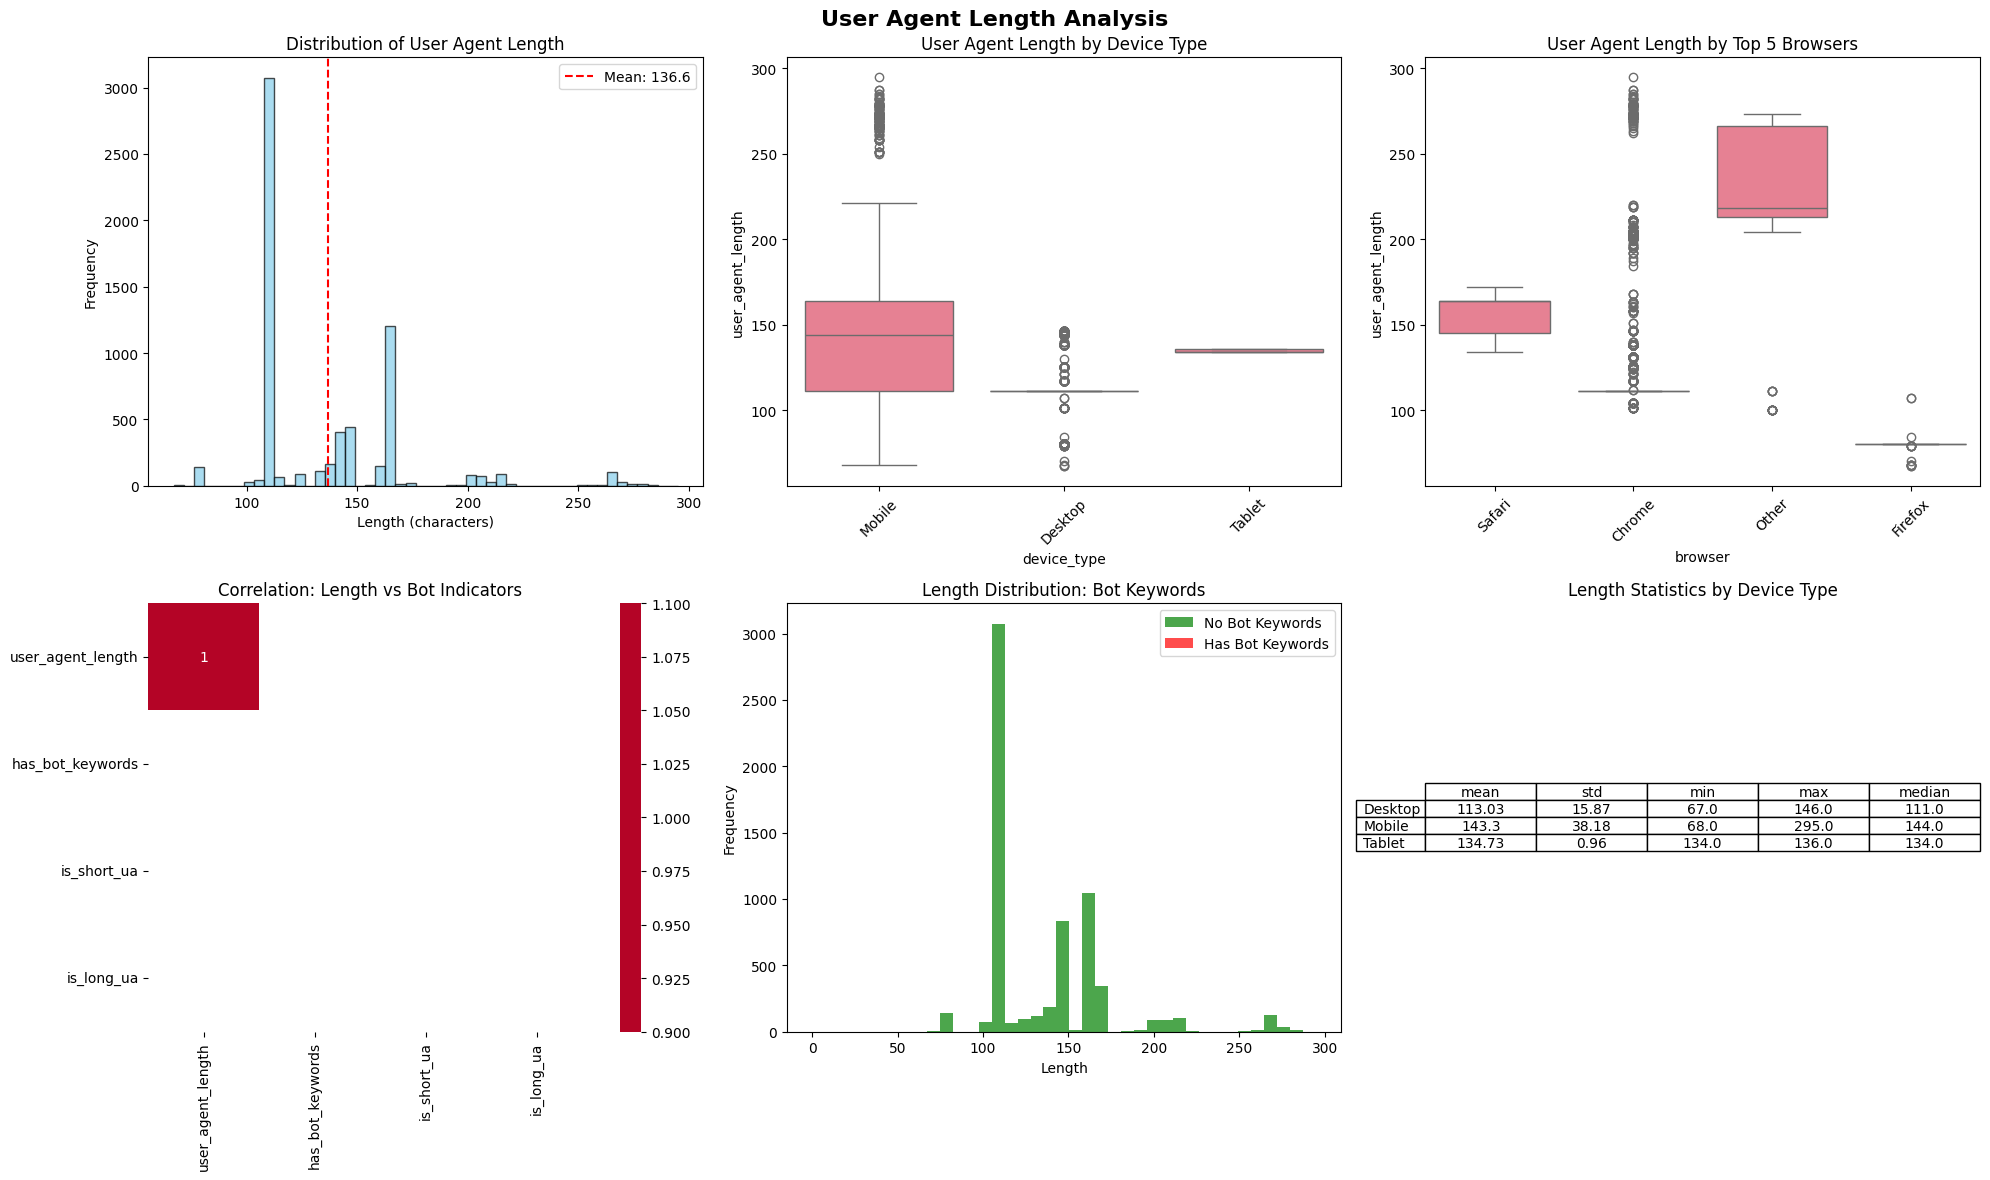

User Agent Length Statistics:
Mean: 136.65
Median: 111.00
Std: 36.70
Min: 67
Max: 295
Short UAs (<50 chars): 0 (0.0%)
Long UAs (>500 chars): 0 (0.0%)


2. BROWSER ANALYSIS


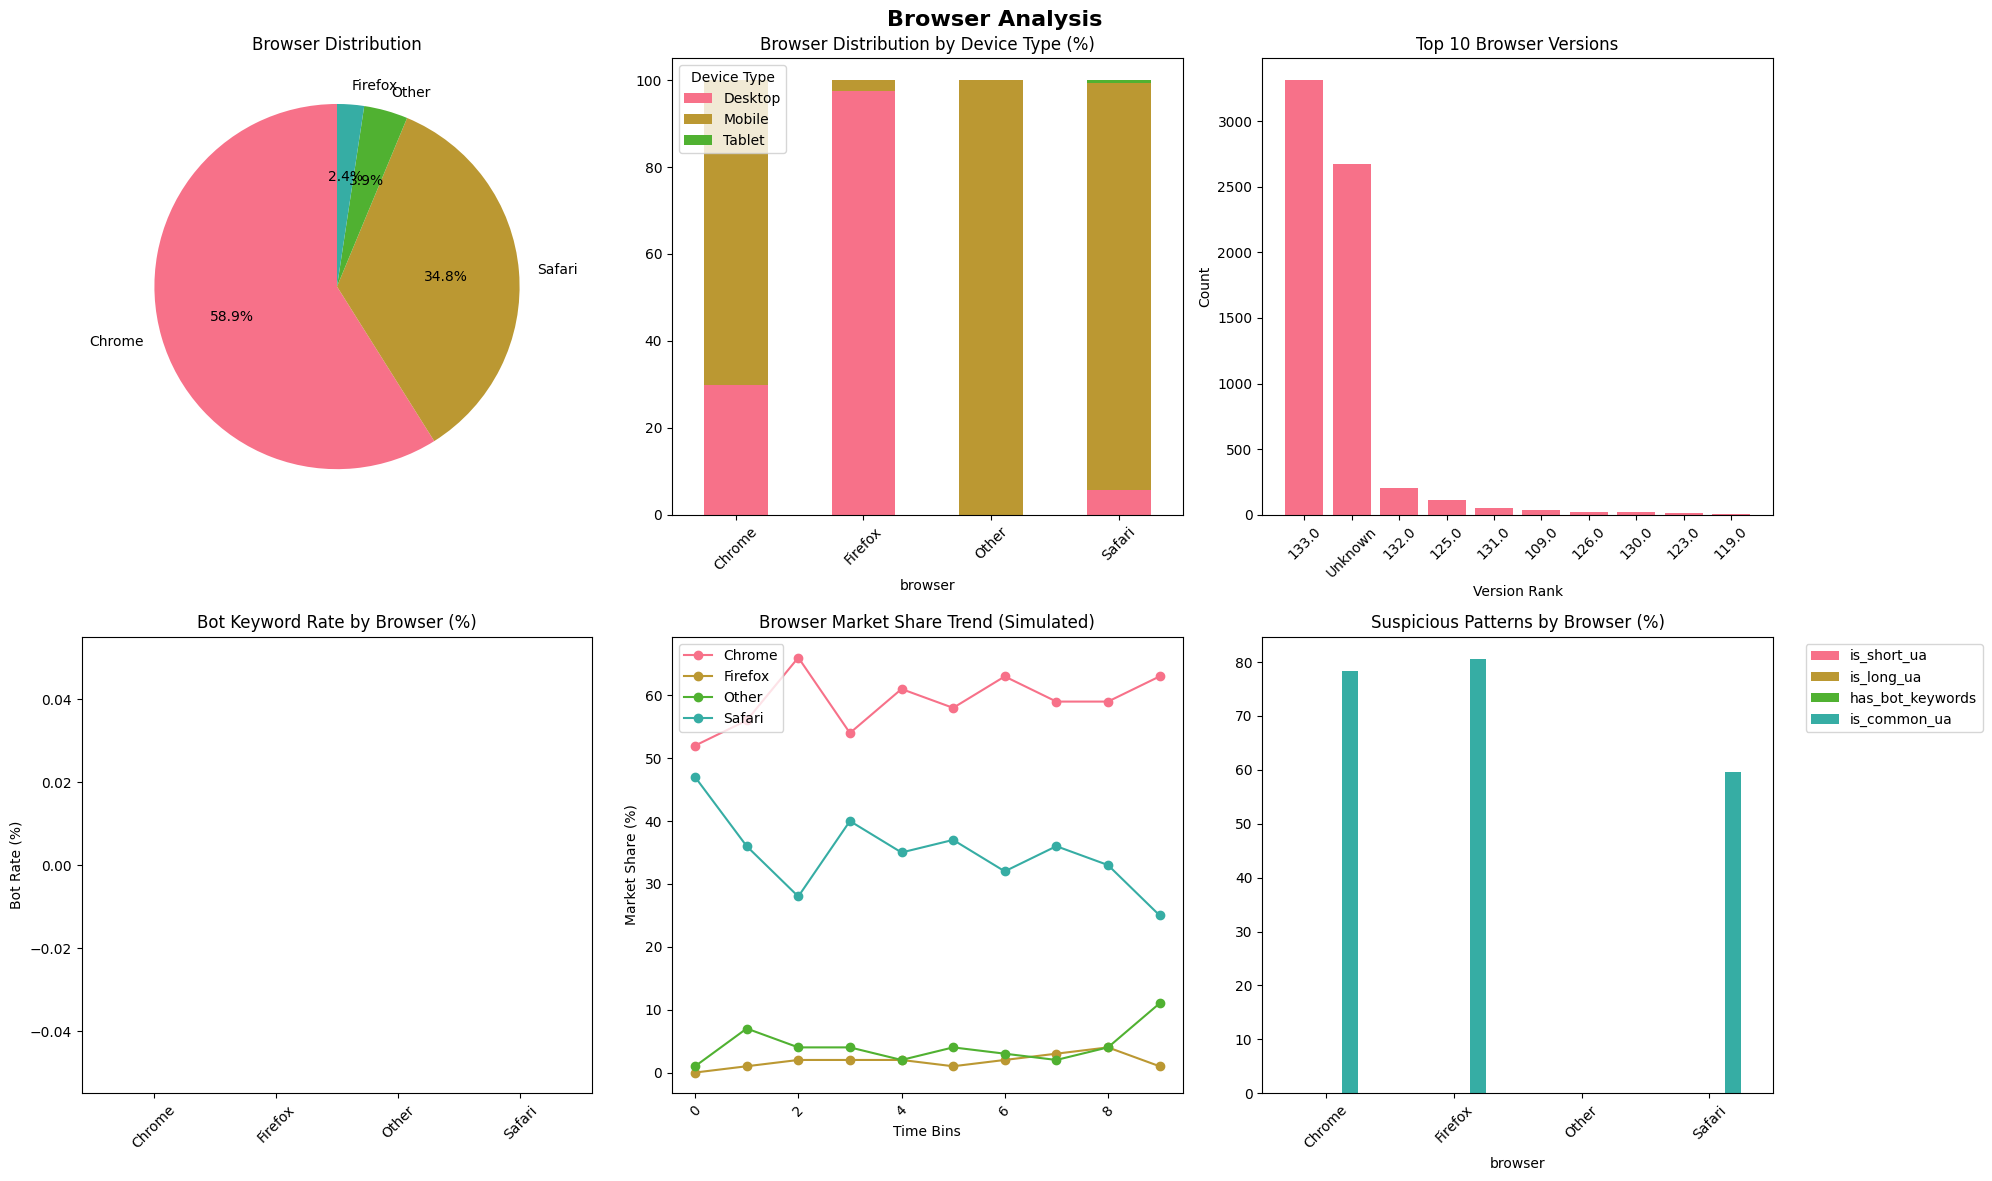

Browser Statistics:
Chrome: 3834 users (58.9%), Bot rate: 0.0%
Safari: 2263 users (34.8%), Bot rate: 0.0%
Other: 253 users (3.9%), Bot rate: 0.0%
Firefox: 155 users (2.4%), Bot rate: 0.0%


3. OPERATING SYSTEM ANALYSIS


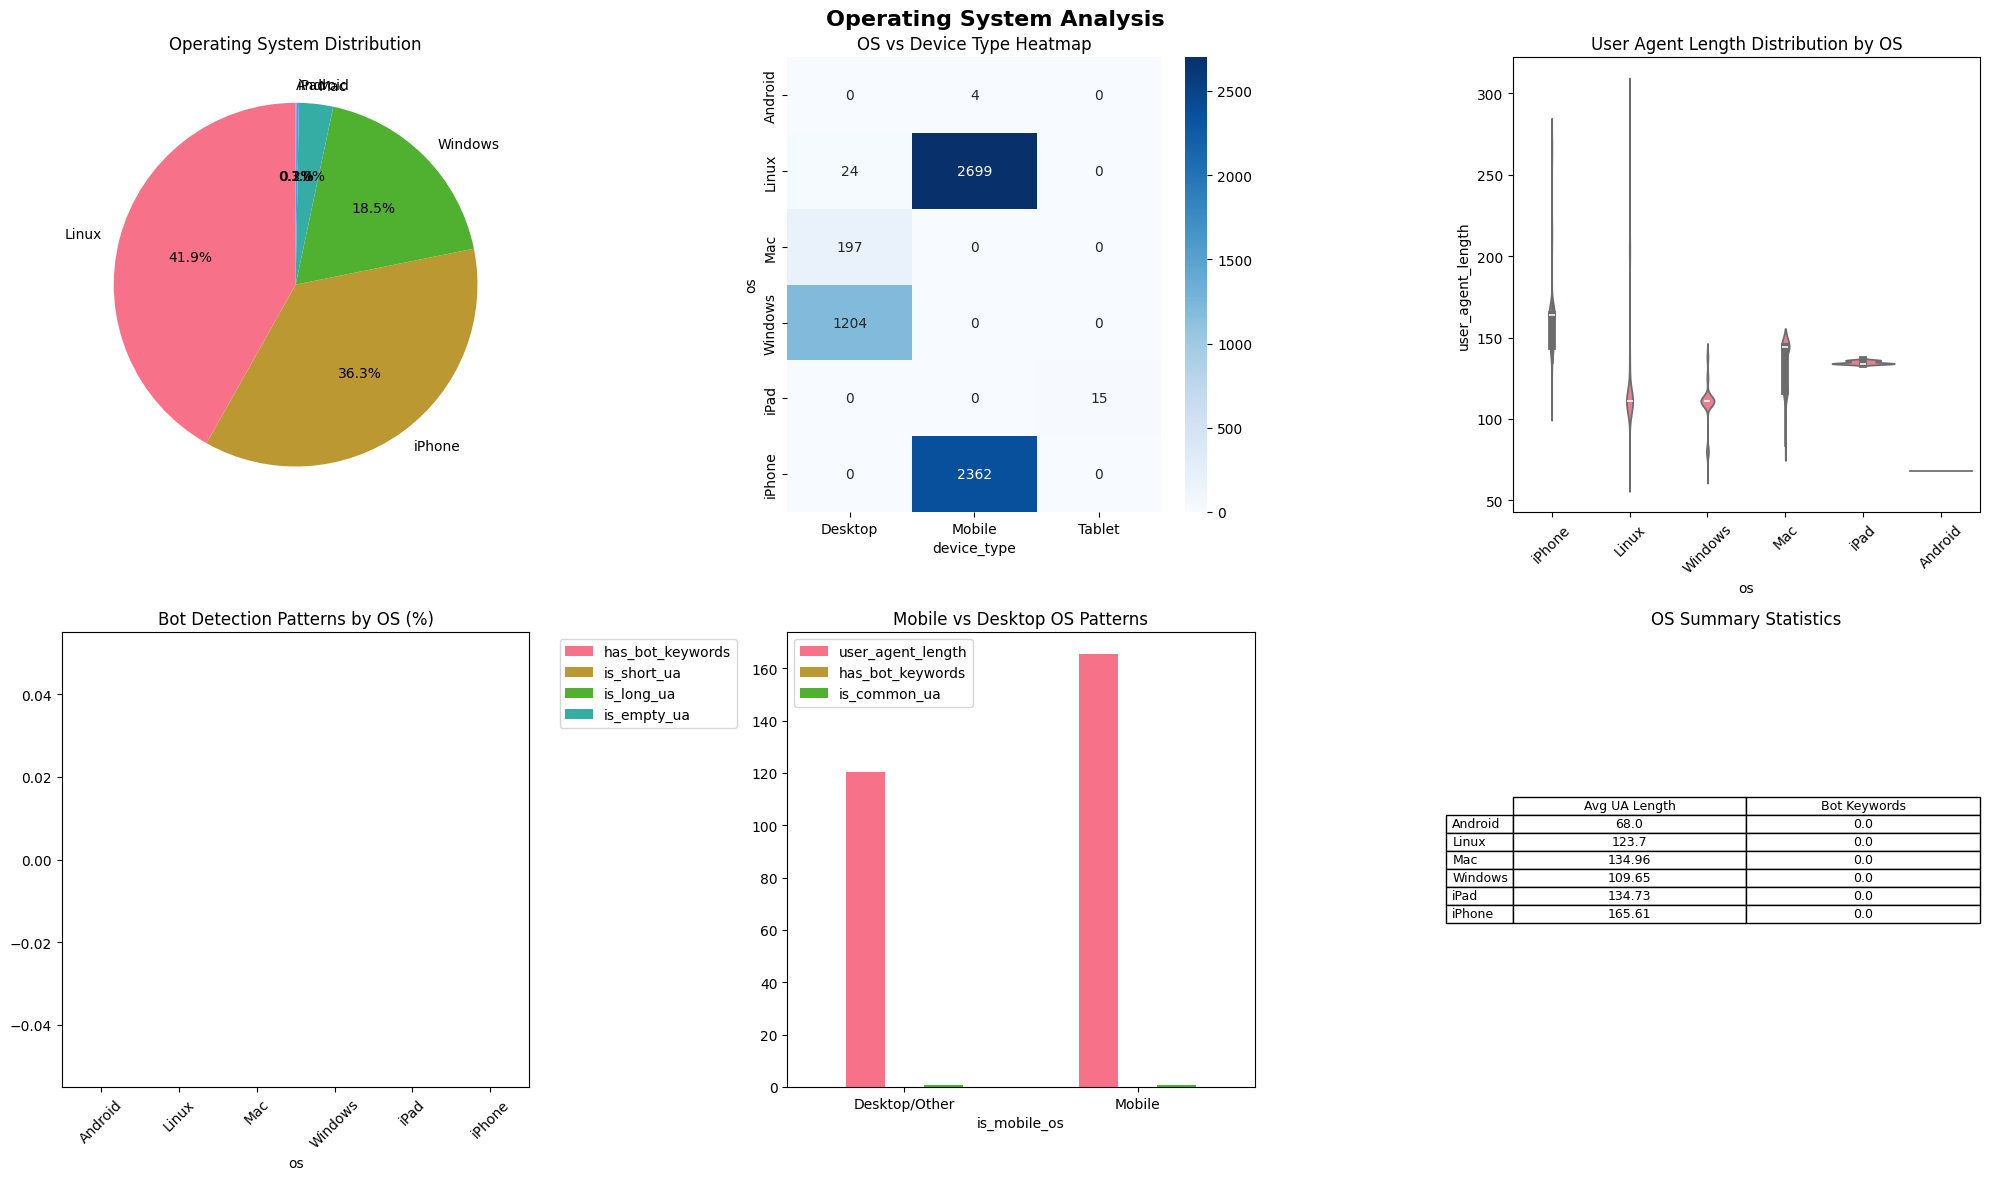

OS Statistics:
Linux: 2723 users (41.9%), Avg UA length: 123.7, Bot rate: 0.0%
iPhone: 2362 users (36.3%), Avg UA length: 165.6, Bot rate: 0.0%
Windows: 1204 users (18.5%), Avg UA length: 109.6, Bot rate: 0.0%
Mac: 197 users (3.0%), Avg UA length: 135.0, Bot rate: 0.0%
iPad: 15 users (0.2%), Avg UA length: 134.7, Bot rate: 0.0%


4. DEVICE TYPE ANALYSIS


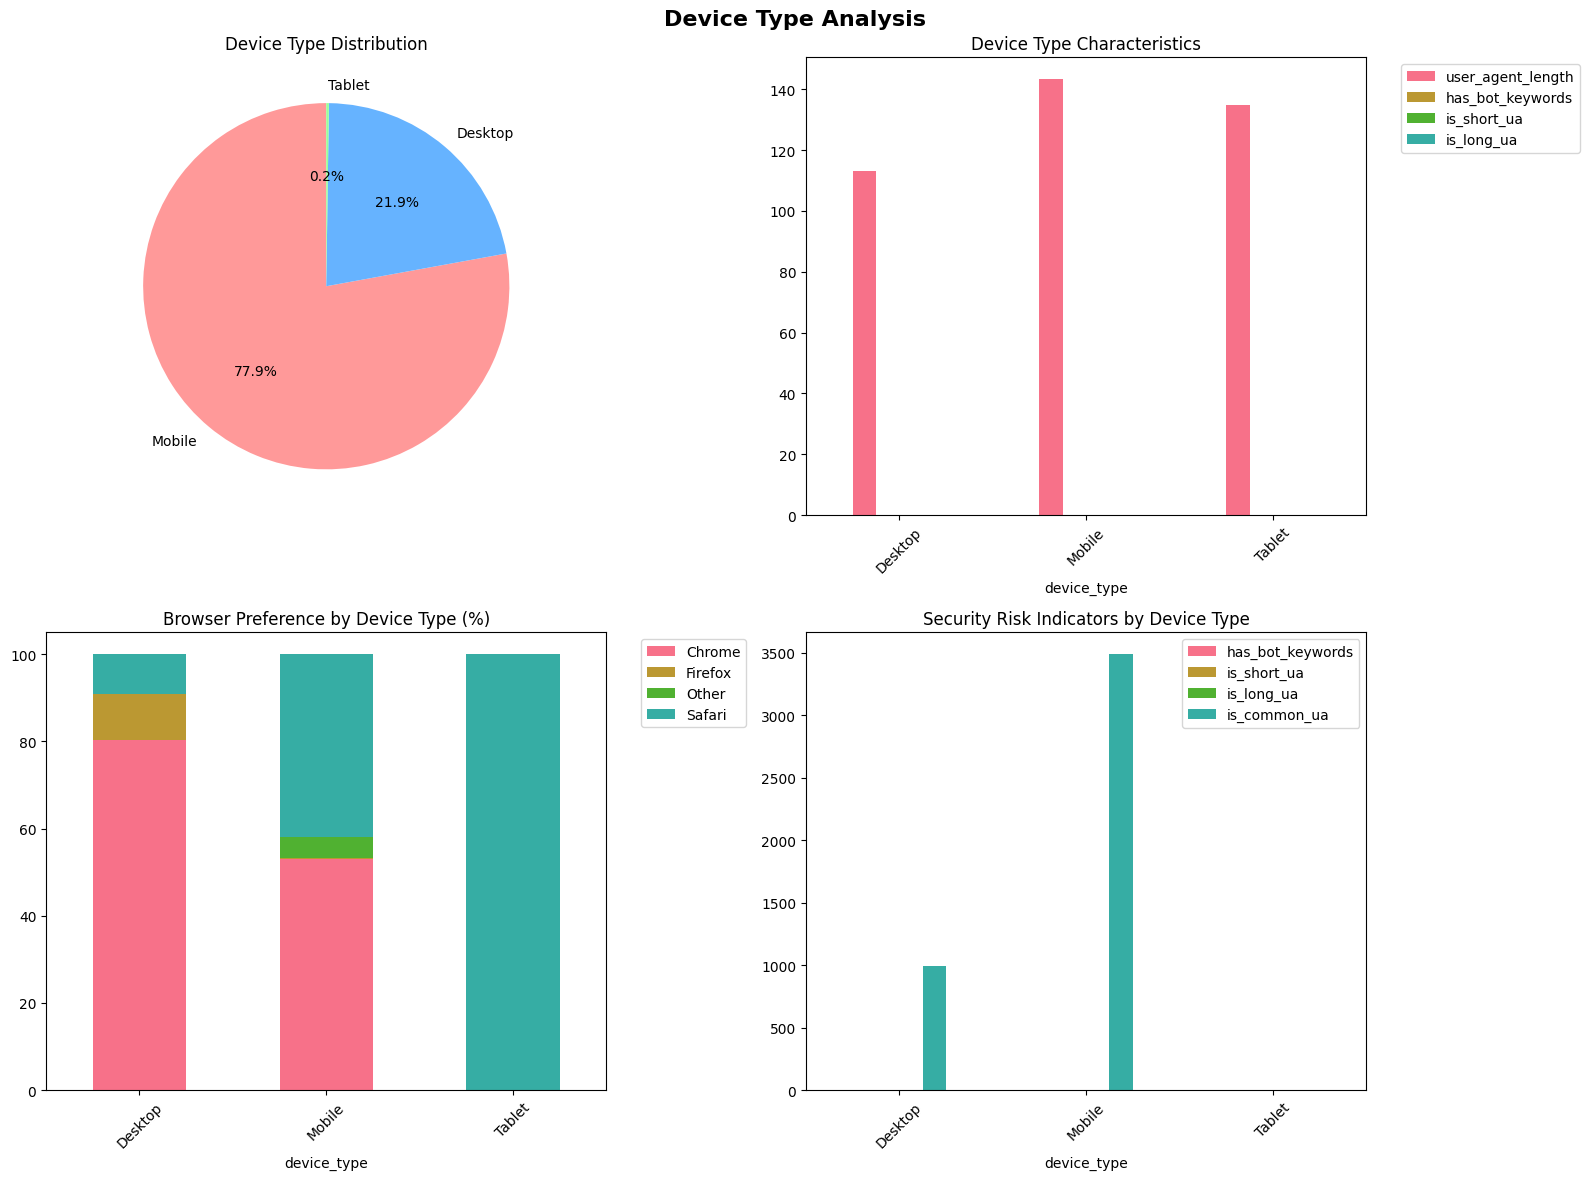



5. BOT DETECTION PATTERNS


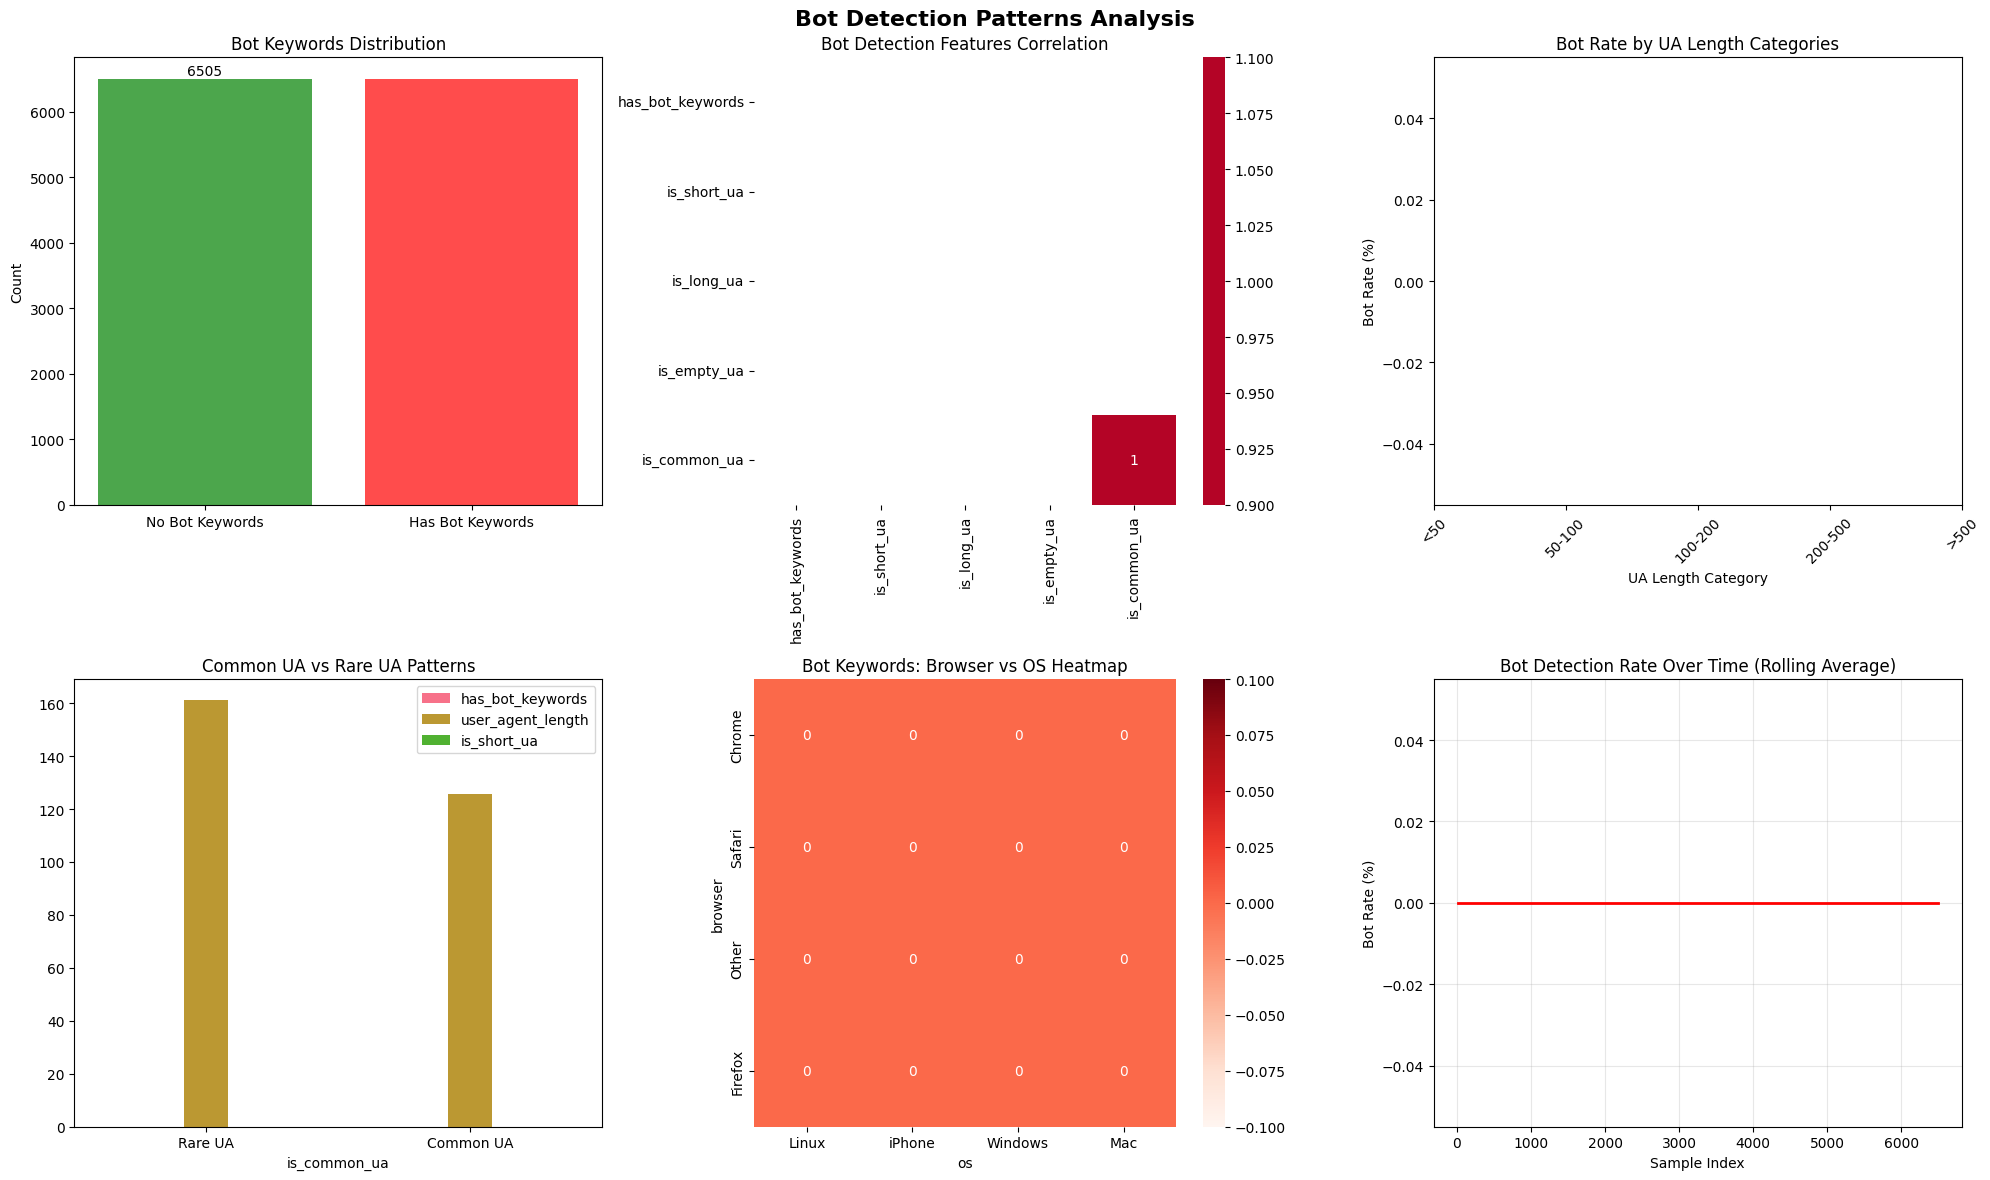

Bot Detection Summary:
Total entries with bot keywords: 0 (0.00%)
Short user agents: 0 (0.00%)
Long user agents: 0 (0.00%)
Empty user agents: 0 (0.00%)
Common user agents: 4477 (68.82%)


6. ADVANCED PATTERN ANALYSIS


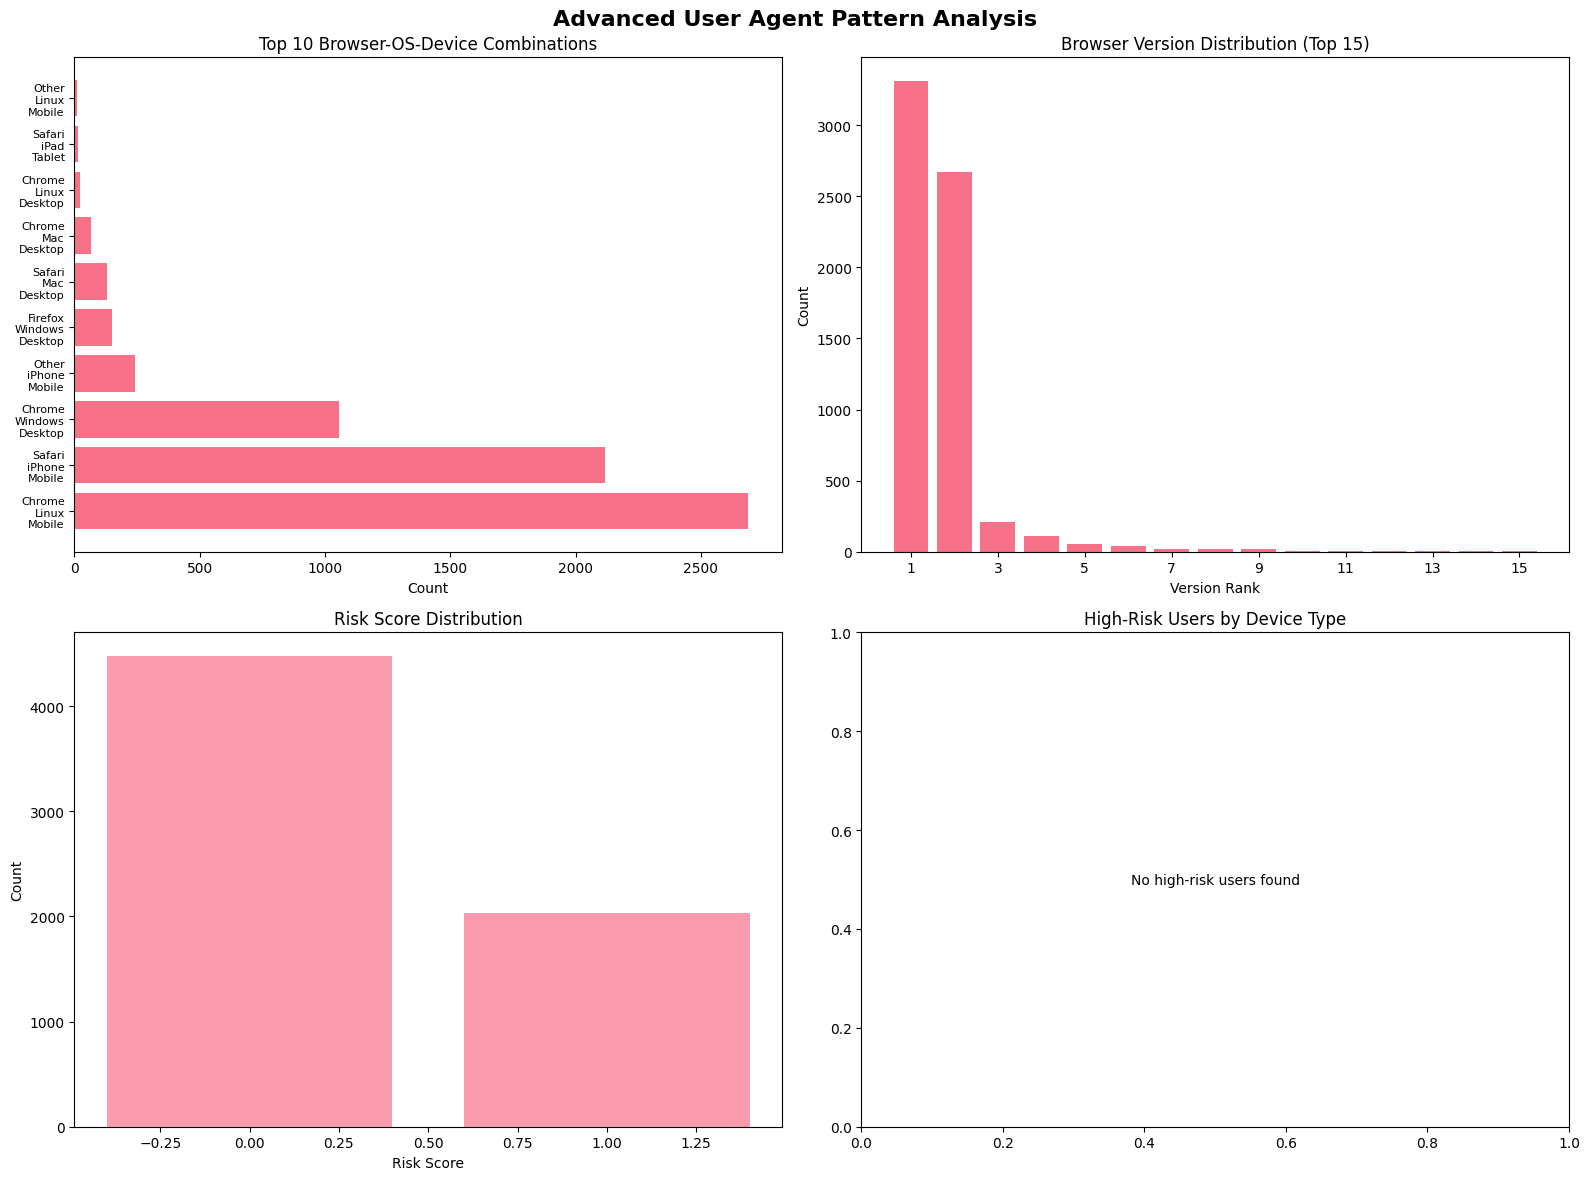


=== FINAL USER AGENT ANALYSIS SUMMARY ===
Dataset size: 6,505 records
Unique user agents: 558
Average user agent length: 136.6 characters
Bot detection rate: 0.00%
Mobile device percentage: 77.9%
Most common browser: Chrome (3834 users)
Most common OS: Linux (2723 users)
High-risk users (score ≥ 3): 0 (0.00%)

=== FEATURE IMPORTANCE (by frequency) ===
is_common_ua: 4477 (68.82%)
has_bot_keywords: 0 (0.00%)
is_short_ua: 0 (0.00%)
is_long_ua: 0 (0.00%)
is_empty_ua: 0 (0.00%)


In [37]:
# Comprehensive EDA for User Agent Features
print("=== COMPREHENSIVE USER AGENT FEATURE ANALYSIS ===\n")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. USER AGENT LENGTH ANALYSIS
print("1. USER AGENT LENGTH ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('User Agent Length Analysis', fontsize=16, fontweight='bold')

# Length distribution
axes[0,0].hist(df['user_agent_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of User Agent Length')
axes[0,0].set_xlabel('Length (characters)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(df['user_agent_length'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df["user_agent_length"].mean():.1f}')
axes[0,0].legend()

# Box plot by device type
sns.boxplot(data=df, x='device_type', y='user_agent_length', ax=axes[0,1])
axes[0,1].set_title('User Agent Length by Device Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Box plot by browser
top_browsers = df['browser'].value_counts().head(5).index
df_top_browsers = df[df['browser'].isin(top_browsers)]
sns.boxplot(data=df_top_browsers, x='browser', y='user_agent_length', ax=axes[0,2])
axes[0,2].set_title('User Agent Length by Top 5 Browsers')
axes[0,2].tick_params(axis='x', rotation=45)

# Length vs bot indicators
length_bot_corr = df[['user_agent_length', 'has_bot_keywords', 'is_short_ua', 'is_long_ua']].corr()
sns.heatmap(length_bot_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1,0])
axes[1,0].set_title('Correlation: Length vs Bot Indicators')

# Length distribution by bot keywords
axes[1,1].hist(df[df['has_bot_keywords']==0]['user_agent_length'], bins=30, alpha=0.7, 
               label='No Bot Keywords', color='green')
axes[1,1].hist(df[df['has_bot_keywords']==1]['user_agent_length'], bins=30, alpha=0.7, 
               label='Has Bot Keywords', color='red')
axes[1,1].set_title('Length Distribution: Bot Keywords')
axes[1,1].set_xlabel('Length')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# Statistical summary table
length_stats = df.groupby('device_type')['user_agent_length'].agg(['mean', 'std', 'min', 'max', 'median'])
axes[1,2].axis('tight')
axes[1,2].axis('off')
table = axes[1,2].table(cellText=length_stats.round(2).values, 
                        rowLabels=length_stats.index,
                        colLabels=length_stats.columns,
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1,2].set_title('Length Statistics by Device Type')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"User Agent Length Statistics:")
print(f"Mean: {df['user_agent_length'].mean():.2f}")
print(f"Median: {df['user_agent_length'].median():.2f}")
print(f"Std: {df['user_agent_length'].std():.2f}")
print(f"Min: {df['user_agent_length'].min()}")
print(f"Max: {df['user_agent_length'].max()}")
print(f"Short UAs (<50 chars): {df['is_short_ua'].sum()} ({df['is_short_ua'].mean()*100:.1f}%)")
print(f"Long UAs (>500 chars): {df['is_long_ua'].sum()} ({df['is_long_ua'].mean()*100:.1f}%)")

# 2. BROWSER ANALYSIS
print("\n\n2. BROWSER ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Browser Analysis', fontsize=16, fontweight='bold')

# Browser distribution pie chart
browser_counts = df['browser'].value_counts()
axes[0,0].pie(browser_counts.values, labels=browser_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Browser Distribution')

# Browser by device type
browser_device = pd.crosstab(df['browser'], df['device_type'], normalize='index') * 100
browser_device.plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Browser Distribution by Device Type (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Device Type')

# Browser version analysis
version_counts = df['browser_version'].value_counts().head(10)
axes[0,2].bar(range(len(version_counts)), version_counts.values)
axes[0,2].set_title('Top 10 Browser Versions')
axes[0,2].set_xlabel('Version Rank')
axes[0,2].set_ylabel('Count')
axes[0,2].set_xticks(range(len(version_counts)))
axes[0,2].set_xticklabels(version_counts.index, rotation=45)

# Browser vs bot keywords
browser_bot = df.groupby('browser')['has_bot_keywords'].agg(['sum', 'count', 'mean'])
browser_bot['bot_rate'] = browser_bot['mean'] * 100
browser_bot = browser_bot.sort_values('bot_rate', ascending=False)

axes[1,0].bar(browser_bot.index, browser_bot['bot_rate'])
axes[1,0].set_title('Bot Keyword Rate by Browser (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylabel('Bot Rate (%)')

# Browser market share over time simulation (using index as proxy)
df_sample = df.sample(min(1000, len(df))).copy()
df_sample['time_proxy'] = range(len(df_sample))
df_sample['time_bin'] = pd.cut(df_sample['time_proxy'], bins=10)
browser_time = pd.crosstab(df_sample['time_bin'], df_sample['browser'], normalize='index') * 100

for browser in browser_time.columns[:5]:  # Top 5 browsers
    axes[1,1].plot(range(len(browser_time)), browser_time[browser], marker='o', label=browser)
axes[1,1].set_title('Browser Market Share Trend (Simulated)')
axes[1,1].set_xlabel('Time Bins')
axes[1,1].set_ylabel('Market Share (%)')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

# Browser suspicious patterns
suspicious_patterns = df.groupby('browser').agg({
    'is_short_ua': 'mean',
    'is_long_ua': 'mean',
    'has_bot_keywords': 'mean',
    'is_common_ua': 'mean'
}) * 100

suspicious_patterns.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Suspicious Patterns by Browser (%)')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print(f"Browser Statistics:")
for browser in browser_counts.head().index:
    count = browser_counts[browser]
    percentage = count / len(df) * 100
    bot_rate = df[df['browser'] == browser]['has_bot_keywords'].mean() * 100
    print(f"{browser}: {count} users ({percentage:.1f}%), Bot rate: {bot_rate:.1f}%")

# 3. OPERATING SYSTEM ANALYSIS
print("\n\n3. OPERATING SYSTEM ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Operating System Analysis', fontsize=16, fontweight='bold')

# OS distribution
os_counts = df['os'].value_counts()
axes[0,0].pie(os_counts.values, labels=os_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Operating System Distribution')

# OS by device type heatmap
os_device = pd.crosstab(df['os'], df['device_type'])
sns.heatmap(os_device, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('OS vs Device Type Heatmap')

# OS user agent length comparison
top_os = df['os'].value_counts().head(6).index
df_top_os = df[df['os'].isin(top_os)]
sns.violinplot(data=df_top_os, x='os', y='user_agent_length', ax=axes[0,2])
axes[0,2].set_title('User Agent Length Distribution by OS')
axes[0,2].tick_params(axis='x', rotation=45)

# OS bot detection patterns
os_patterns = df.groupby('os').agg({
    'has_bot_keywords': 'mean',
    'is_short_ua': 'mean',
    'is_long_ua': 'mean',
    'is_empty_ua': 'mean'
}) * 100

os_patterns.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Bot Detection Patterns by OS (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mobile vs Desktop analysis
mobile_os = ['iPhone', 'Android']
df['is_mobile_os'] = df['os'].isin(mobile_os).astype(int)
mobile_analysis = df.groupby('is_mobile_os').agg({
    'user_agent_length': 'mean',
    'has_bot_keywords': 'mean',
    'is_common_ua': 'mean'
})

mobile_analysis.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Mobile vs Desktop OS Patterns')
axes[1,1].set_xticklabels(['Desktop/Other', 'Mobile'], rotation=0)
axes[1,1].legend()

# OS security indicators
os_security = df.groupby('os').agg({
    'user_agent_length': ['mean', 'std'],
    'has_bot_keywords': 'sum'
}).round(2)

# Create a simplified view for the table
os_summary = df.groupby('os').agg({
    'user_agent_length': 'mean',
    'has_bot_keywords': 'sum'
}).round(2)

axes[1,2].axis('tight')
axes[1,2].axis('off')
table = axes[1,2].table(cellText=os_summary.values, 
                        rowLabels=os_summary.index,
                        colLabels=['Avg UA Length', 'Bot Keywords'],
                        cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
axes[1,2].set_title('OS Summary Statistics')

plt.tight_layout()
plt.show()

print(f"OS Statistics:")
for os_name in os_counts.head().index:
    count = os_counts[os_name]
    percentage = count / len(df) * 100
    avg_length = df[df['os'] == os_name]['user_agent_length'].mean()
    bot_rate = df[df['os'] == os_name]['has_bot_keywords'].mean() * 100
    print(f"{os_name}: {count} users ({percentage:.1f}%), Avg UA length: {avg_length:.1f}, Bot rate: {bot_rate:.1f}%")

# 4. DEVICE TYPE ANALYSIS
print("\n\n4. DEVICE TYPE ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Device Type Analysis', fontsize=16, fontweight='bold')

# Device type distribution
device_counts = df['device_type'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
axes[0,0].pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,0].set_title('Device Type Distribution')

# Device type characteristics
device_chars = df.groupby('device_type').agg({
    'user_agent_length': 'mean',
    'has_bot_keywords': 'mean',
    'is_short_ua': 'mean',
    'is_long_ua': 'mean'
}) * 100

device_chars['user_agent_length'] = device_chars['user_agent_length'] / 100  # Rescale for visualization
device_chars.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Device Type Characteristics')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Device type vs browser preference
device_browser = pd.crosstab(df['device_type'], df['browser'], normalize='index') * 100
device_browser.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Browser Preference by Device Type (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Security risk assessment by device
risk_metrics = df.groupby('device_type').agg({
    'has_bot_keywords': 'sum',
    'is_short_ua': 'sum', 
    'is_long_ua': 'sum',
    'is_common_ua': 'sum'
})

risk_metrics.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Security Risk Indicators by Device Type')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend()

plt.tight_layout()
plt.show()

# 5. BOT DETECTION PATTERNS
print("\n\n5. BOT DETECTION PATTERNS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Bot Detection Patterns Analysis', fontsize=16, fontweight='bold')

# Bot keyword distribution
bot_dist = df['has_bot_keywords'].value_counts()
axes[0,0].bar(['No Bot Keywords', 'Has Bot Keywords'], bot_dist.values, 
              color=['green', 'red'], alpha=0.7)
axes[0,0].set_title('Bot Keywords Distribution')
axes[0,0].set_ylabel('Count')
for i, v in enumerate(bot_dist.values):
    axes[0,0].text(i, v + 10, str(v), ha='center', va='bottom')

# Bot patterns correlation matrix
bot_features = ['has_bot_keywords', 'is_short_ua', 'is_long_ua', 'is_empty_ua', 'is_common_ua']
bot_corr = df[bot_features].corr()
sns.heatmap(bot_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Bot Detection Features Correlation')

# Suspicious user agent length patterns
length_bins = pd.cut(df['user_agent_length'], bins=[0, 50, 100, 200, 500, 1000], 
                     labels=['<50', '50-100', '100-200', '200-500', '>500'])
length_bot_rate = df.groupby(length_bins)['has_bot_keywords'].mean() * 100

axes[0,2].bar(range(len(length_bot_rate)), length_bot_rate.values)
axes[0,2].set_title('Bot Rate by UA Length Categories')
axes[0,2].set_xlabel('UA Length Category')
axes[0,2].set_ylabel('Bot Rate (%)')
axes[0,2].set_xticks(range(len(length_bot_rate)))
axes[0,2].set_xticklabels(length_bot_rate.index, rotation=45)

# Most common user agents analysis
common_ua_analysis = df.groupby('is_common_ua').agg({
    'has_bot_keywords': 'mean',
    'user_agent_length': 'mean',
    'is_short_ua': 'mean'
}) * 100

common_ua_analysis['user_agent_length'] = common_ua_analysis['user_agent_length'] / 100
common_ua_analysis.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Common UA vs Rare UA Patterns')
axes[1,0].set_xticklabels(['Rare UA', 'Common UA'], rotation=0)
axes[1,0].legend()

# Bot detection by browser and OS combination
browser_os_bot = df.groupby(['browser', 'os'])['has_bot_keywords'].sum().unstack(fill_value=0)
top_browsers = df['browser'].value_counts().head(4).index
top_os = df['os'].value_counts().head(4).index
browser_os_subset = browser_os_bot.loc[top_browsers, top_os]

sns.heatmap(browser_os_subset, annot=True, fmt='d', cmap='Reds', ax=axes[1,1])
axes[1,1].set_title('Bot Keywords: Browser vs OS Heatmap')

# Suspicious patterns timeline
df_sample = df.sample(min(1000, len(df))).copy()
df_sample = df_sample.sort_index()
df_sample['cumulative_bots'] = df_sample['has_bot_keywords'].cumsum()
df_sample['bot_rate_rolling'] = df_sample['has_bot_keywords'].rolling(window=50, min_periods=1).mean() * 100

axes[1,2].plot(df_sample.index, df_sample['bot_rate_rolling'], color='red', linewidth=2)
axes[1,2].set_title('Bot Detection Rate Over Time (Rolling Average)')
axes[1,2].set_xlabel('Sample Index')
axes[1,2].set_ylabel('Bot Rate (%)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print bot detection summary
print(f"Bot Detection Summary:")
print(f"Total entries with bot keywords: {df['has_bot_keywords'].sum()} ({df['has_bot_keywords'].mean()*100:.2f}%)")
print(f"Short user agents: {df['is_short_ua'].sum()} ({df['is_short_ua'].mean()*100:.2f}%)")
print(f"Long user agents: {df['is_long_ua'].sum()} ({df['is_long_ua'].mean()*100:.2f}%)")
print(f"Empty user agents: {df['is_empty_ua'].sum()} ({df['is_empty_ua'].mean()*100:.2f}%)")
print(f"Common user agents: {df['is_common_ua'].sum()} ({df['is_common_ua'].mean()*100:.2f}%)")

# 6. ADVANCED PATTERN ANALYSIS
print("\n\n6. ADVANCED PATTERN ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced User Agent Pattern Analysis', fontsize=16, fontweight='bold')

# User agent diversity analysis
ua_diversity = df.groupby(['browser', 'os', 'device_type']).size().reset_index(name='count')
ua_diversity = ua_diversity.sort_values('count', ascending=False)

# Top combinations
top_combinations = ua_diversity.head(10)
combo_labels = [f"{row['browser']}\n{row['os']}\n{row['device_type']}" for _, row in top_combinations.iterrows()]
axes[0,0].barh(range(len(top_combinations)), top_combinations['count'])
axes[0,0].set_title('Top 10 Browser-OS-Device Combinations')
axes[0,0].set_xlabel('Count')
axes[0,0].set_yticks(range(len(top_combinations)))
axes[0,0].set_yticklabels(combo_labels, fontsize=8)

# Version distribution analysis
version_pattern = df['browser_version'].value_counts().head(15)
axes[0,1].bar(range(len(version_pattern)), version_pattern.values)
axes[0,1].set_title('Browser Version Distribution (Top 15)')
axes[0,1].set_xlabel('Version Rank')
axes[0,1].set_ylabel('Count')
axes[0,1].set_xticks(range(0, len(version_pattern), 2))
axes[0,1].set_xticklabels(range(1, len(version_pattern)+1, 2))

# Risk scoring
df['risk_score'] = (df['has_bot_keywords'] * 3 + 
                   df['is_short_ua'] * 2 + 
                   df['is_long_ua'] * 2 + 
                   df['is_empty_ua'] * 4 + 
                   (df['is_common_ua'] == 0).astype(int) * 1)

risk_distribution = df['risk_score'].value_counts().sort_index()
axes[1,0].bar(risk_distribution.index, risk_distribution.values, alpha=0.7)
axes[1,0].set_title('Risk Score Distribution')
axes[1,0].set_xlabel('Risk Score')
axes[1,0].set_ylabel('Count')

# High-risk analysis
high_risk = df[df['risk_score'] >= 3]
if len(high_risk) > 0:
    risk_by_device = high_risk['device_type'].value_counts()
    axes[1,1].pie(risk_by_device.values, labels=risk_by_device.index, autopct='%1.1f%%')
    axes[1,1].set_title(f'High-Risk Users by Device Type\n(Risk Score ≥ 3, n={len(high_risk)})')
else:
    axes[1,1].text(0.5, 0.5, 'No high-risk users found', ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('High-Risk Users by Device Type')

plt.tight_layout()
plt.show()

# Final summary statistics
print(f"\n=== FINAL USER AGENT ANALYSIS SUMMARY ===")
print(f"Dataset size: {len(df):,} records")
print(f"Unique user agents: {df['user_agent'].nunique():,}")
print(f"Average user agent length: {df['user_agent_length'].mean():.1f} characters")
print(f"Bot detection rate: {df['has_bot_keywords'].mean()*100:.2f}%")
print(f"Mobile device percentage: {(df['device_type'] == 'Mobile').mean()*100:.1f}%")
print(f"Most common browser: {df['browser'].mode()[0]} ({df['browser'].value_counts().iloc[0]} users)")
print(f"Most common OS: {df['os'].mode()[0]} ({df['os'].value_counts().iloc[0]} users)")
print(f"High-risk users (score ≥ 3): {len(df[df['risk_score'] >= 3])} ({len(df[df['risk_score'] >= 3])/len(df)*100:.2f}%)")

# Create feature importance ranking
feature_importance = {
    'has_bot_keywords': df['has_bot_keywords'].sum(),
    'is_short_ua': df['is_short_ua'].sum(), 
    'is_long_ua': df['is_long_ua'].sum(),
    'is_empty_ua': df['is_empty_ua'].sum(),
    'is_common_ua': df['is_common_ua'].sum()
}

print(f"\n=== FEATURE IMPORTANCE (by frequency) ===")
for feature, count in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    percentage = count / len(df) * 100
    print(f"{feature}: {count} ({percentage:.2f}%)")


In [38]:
# Print the DataFrame columns
print("DataFrame columns:")
print(df.columns.tolist())

DataFrame columns:
['tcid', 'tbid', 'created_at', 'user_agent', 'total_events', 'session_duration_s', 'total_scroll_depth', 'max_scroll_depth', 'TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count', 'tbid_frequency', 'is_high_freq_tbid', 'duration_category', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'is_weekend', 'is_business_hours', 'is_night_time', 'is_peak_hours', 'days_since_start', 'browser', 'os', 'device_type', 'browser_version', 'user_agent_length', 'has_bot_keywords', 'is_empty_ua', 'is_short_ua', 'is_long_ua', 'is_common_ua', 'is_mobile_os', 'risk_score']


In [ ]:

# 1. Event Rates
# Events per second could be a strong indicator of bot activity, as bots can perform actions much faster than humans.
df['events_per_second'] = df['total_events'] / df['session_duration_s']
df['scroll_speed'] = df['total_scroll_depth'] / df['session_duration_s']

# 2. Interaction Ratios
# These ratios capture behavioral patterns.
df['scroll_to_touch_ratio'] = df['SCROLL_count'] / (df['TOUCH_START_count'] + 1) # Add 1 to avoid division by zero
df['touch_event_ratio'] = df['TOUCH_START_count'] / df['total_events']
df['scroll_event_ratio'] = df['SCROLL_count'] / df['total_events']

# 3. Behavioral Flags
# Flagging suspicious behavior patterns.
df['no_scroll_but_events'] = ((df['SCROLL_count'] == 0) & (df['total_events'] > 5)).astype(int)
df['short_duration_high_events'] = ((df['session_duration_s'] < 5) & (df['total_events'] > 10)).astype(int)

# 4. Event Diversity
# Bots might have less diverse interactions.
event_columns = ['TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count']
df['event_diversity'] = df[event_columns].gt(0).sum(axis=1) / df['total_events']

# 5. User Agent Entropy
# To spot generated or unusual user agent strings.
from scipy.stats import entropy
import numpy as np
df['user_agent_entropy'] = df['user_agent'].apply(lambda x: entropy(list(x.encode('utf-8'))))

# 6. Session Duration Z-score
# To identify outlier session durations.
df['session_duration_zscore'] = (df['session_duration_s'] - df['session_duration_s'].mean()) / df['session_duration_s'].std()

# Replace inf/-inf with NaN and then fill NaNs, handling categorical columns separately
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Get categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns
non_categorical_columns = df.select_dtypes(exclude=['category']).columns

# Fill NaN values in non-categorical columns with 0
df[non_categorical_columns] = df[non_categorical_columns].fillna(0)

# For categorical columns, fill NaN with the most frequent value or a default
for col in categorical_columns:
    if df[col].isna().any():
        # Try to use the mode (most frequent value), if available
        if not df[col].mode().empty:
            fill_value = df[col].mode()[0]
        else:
            # If no mode available, add 'Unknown' to categories and use it
            df[col] = df[col].cat.add_categories(['Unknown'])
            fill_value = 'Unknown'
        df[col] = df[col].fillna(fill_value)

# Print the new features to verify
print("Newly created features:")
print(df[['events_per_second', 'scroll_speed', 'scroll_to_touch_ratio', 'touch_event_ratio', 'scroll_event_ratio', 'no_scroll_but_events', 'short_duration_high_events', 'event_diversity', 'user_agent_entropy', 'session_duration_zscore']].head())

print("\nUpdated DataFrame columns:")
print(df.columns.tolist())


Newly created features:
   events_per_second  scroll_speed  scroll_to_touch_ratio  touch_event_ratio  \
0           0.995339    678.291442               0.476923           0.344086   
1           0.792171     67.950385               0.200000           0.400000   
2           3.418602    491.764283               0.454545           0.344828   
3           0.233078    197.697283               0.329268           0.462857   
4           0.774142    123.627446               0.500000           0.344000   

   scroll_event_ratio  no_scroll_but_events  short_duration_high_events  \
0            0.166667                     0                           0   
1            0.080702                     0                           0   
2            0.172414                     0                           0   
3            0.154286                     0                           0   
4            0.176000                     0                           0   

   event_diversity  user_agent_entropy  sess

In [40]:
df

tcid  \
0     06046a82-f99f-46a6-b67f-8999d24c1423   
1     44d62259-c6d3-49ff-8346-e1d5ddff802e   
2     f455fdcd-5bf1-4ccc-bfce-0bf25ebc8085   
3     bcf89e35-85b4-4f18-aeaa-c2f4954acc26   
4     b1dd98fb-707d-4021-bfd2-f2ef3c123623   
...                                    ...   
6500  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6501  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6502  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6503  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   
6504  66e5042e-5ee7-4e6e-8b9e-993e287bd9c2   

                                      tbid              created_at  \
0     29f79081-1057-43b2-b22d-8260ff55d80e 2025-02-25 17:31:39.031   
1     ff6ad41b-5f8f-4ba7-a30d-d27625fae06d 2025-02-25 05:15:14.398   
2     2020b325-ff27-4003-b0ad-75bf2cd60798 2025-02-25 17:51:57.943   
3     428b1d7c-3e38-4339-90a4-576d9be1d462 2025-02-25 19:51:16.290   
4     144e269f-5e79-4fec-b5e6-b56b0fd68e81 2025-02-25 14:08:20.037   
...                                    ...                     ...   
6500  2fa4ffab-78f4-4bba-b4c1-ba5a886f44bf 2025-02-28 13:44:43.098   
6501  b8d8e0f4-1acc-4a64-a0e6-4203178d210b 2025-03-01 20:11:24.985   
6502  b8d8e0f4-1acc-4a64-a0e6-4203178d210b 2025-03-01 20:11:31.272   
6503  4dbb2800-9414-4555-94a5-887ccd85dc6e 2025-03-02 13:53:27.087   
6504  4dbb2800-9414-4555-94a5-887ccd85dc6e 2025-03-02 13:53:38.898   

                                             user_agent  total_events  \
0     Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...           186   
1     Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...           285   
2     Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...            29   
3     Mozilla/5.0 (Linux; Android 10; K) AppleWebKit...           175   
4     Mozilla/5.0 (iPhone; CPU iPhone OS 17_6_1 like...           125   
...                                                 ...           ...   
6500  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            21   
6501  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            26   
6502  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            26   
6503  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            14   
6504  Mozilla/5.0 (iPhone; CPU iPhone OS 18_3_1 like...            14   

      session_duration_s  total_scroll_depth  max_scroll_depth  \
0                186.871       126753.000000      16917.000000   
1                359.771        24446.577894       2951.822266   
2                  8.483         4171.636414       1129.818237   
3                750.823       148435.667399       9899.666992   
4                161.469        19962.000000       3606.000000   
...                  ...                 ...               ...   
6500              15.277            0.000000          0.000000   
6501              10.830          556.000000        277.000000   
6502              10.830          556.000000        277.000000   
6503              25.546            0.000000          0.000000   
6504              25.546            0.000000          0.000000   

      TOUCH_START_count  SCROLL_count  ...  events_per_second  scroll_speed  \
0                    64            31  ...           0.995339    678.291442   
1                   114            23  ...           0.792171     67.950385   
2                    10             5  ...           3.418602    491.764283   
3                    81            27  ...           0.233078    197.697283   
4                    43            22  ...           0.774142    123.627446   
...                 ...           ...  ...                ...           ...   
6500                  6             1  ...           1.374615      0.000000   
6501                  6             4  ...           2.400739     51.338873   
6502                  6             4  ...           2.400739     51.338873   
6503                  4             1  ...           0.548031      0.000000   
6504                  4             1  ...           0.548031      0.000000   

      scroll_to_touch_rat

# EDA on newly created features

### EDA for `events_per_second`

The `events_per_second` feature is a critical indicator for bot detection. As highlighted in `Feature_eda.txt`, bots can execute actions at a much higher rate than humans. A human's interaction speed is limited by cognitive and physical constraints, whereas a bot can perform hundreds or thousands of actions in a matter of seconds.

We will visualize the distribution of this feature to identify sessions with an unusually high event rate, which are strong candidates for being bots.


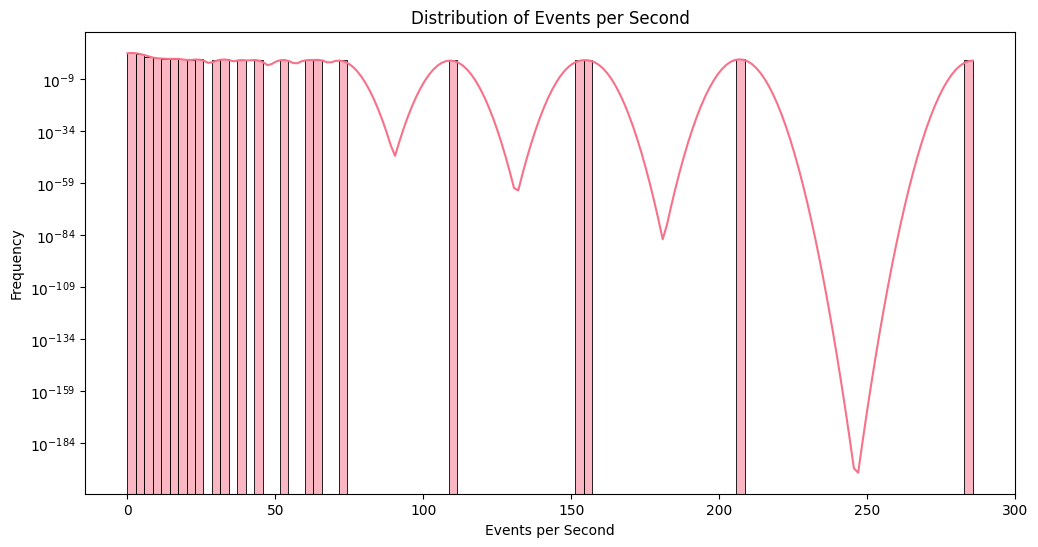

count    6505.000000
mean        2.010074
std         7.431574
min         0.000000
25%         0.376140
50%         1.473374
75%         2.495292
max       285.714286
Name: events_per_second, dtype: float64


In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['events_per_second'], bins=100, kde=True)
plt.title('Distribution of Events per Second')
plt.xlabel('Events per Second')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale to see the tail
plt.show()

print(df['events_per_second'].describe())



The histogram above shows a highly skewed distribution for `events_per_second`. The vast majority of sessions have a low event rate (less than 1 event per second), which is consistent with normal human behavior. However, there is a long tail of sessions with extremely high event rates, some exceeding 10 or even 100 events per second. These outliers are highly suspicious and are likely bots.

### EDA for `scroll_speed`

Similar to the event rate, `scroll_speed` can also be a useful indicator. Bots might scroll through a page at a speed that is physically impossible for a human. We'll look for such anomalies in the distribution.


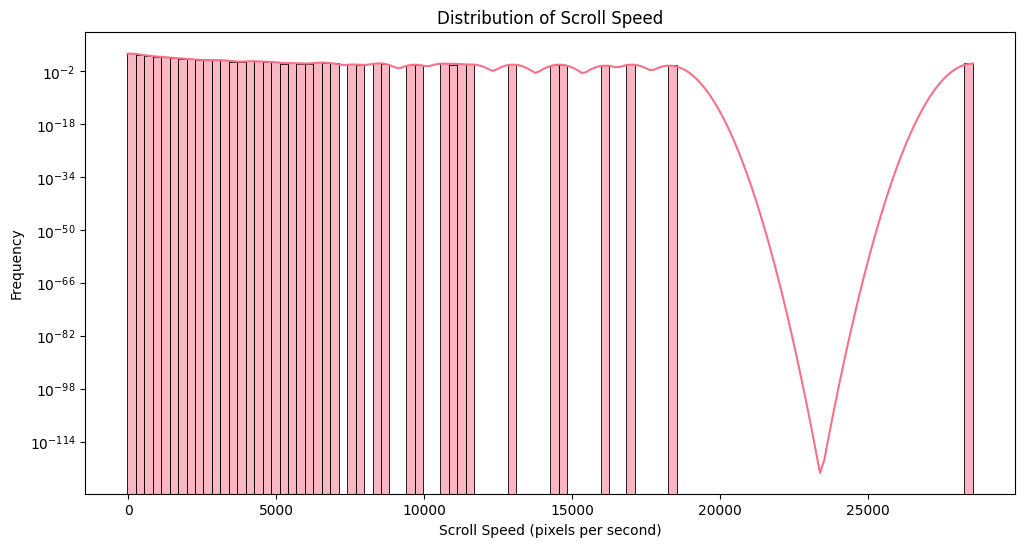

count     6505.000000
mean       434.191096
std       1238.279367
min        -29.542097
25%          5.565881
50%         92.627898
75%        434.633706
max      28556.145154
Name: scroll_speed, dtype: float64


In [42]:

plt.figure(figsize=(12, 6))
sns.histplot(df['scroll_speed'], bins=100, kde=True)
plt.title('Distribution of Scroll Speed')
plt.xlabel('Scroll Speed (pixels per second)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

print(df['scroll_speed'].describe())



The distribution of `scroll_speed` is also heavily skewed. Most sessions have a moderate scroll speed, but there are clear outliers with exceptionally high speeds. These could be bots that are programmatically scrolling through the page content instantly.

### EDA for `scroll_to_touch_ratio`

This feature captures the ratio of scrolling actions to touch actions. A normal user is expected to have a mix of both. A bot might exhibit a very different pattern, perhaps only scrolling without any touch interactions, or vice versa.


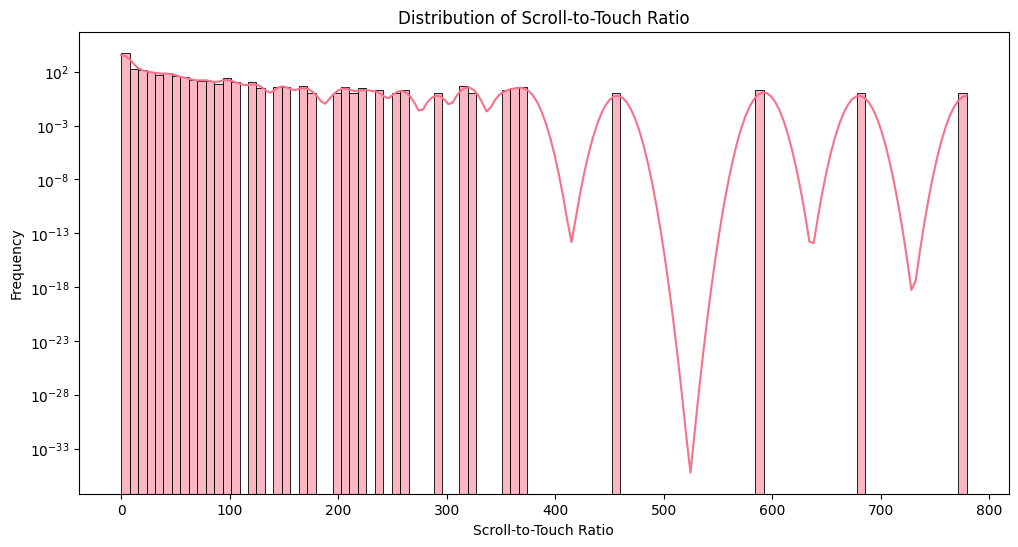

count    6505.000000
mean        6.465103
std        30.573240
min         0.000000
25%         0.200000
50%         0.344262
75%         0.571429
max       779.000000
Name: scroll_to_touch_ratio, dtype: float64


In [43]:

plt.figure(figsize=(12, 6))
sns.histplot(df['scroll_to_touch_ratio'], bins=100, kde=True)
plt.title('Distribution of Scroll-to-Touch Ratio')
plt.xlabel('Scroll-to-Touch Ratio')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

print(df['scroll_to_touch_ratio'].describe())



The `scroll_to_touch_ratio` distribution shows a large number of sessions with a ratio of zero, which means there were touch events but no scroll events. There's also a peak at a low ratio, and a long tail. High values in this ratio could indicate bots that are only scrolling.

### EDA for `touch_event_ratio` and `scroll_event_ratio`

These ratios tell us about the composition of user interactions. We'll plot them together to see if any patterns emerge.


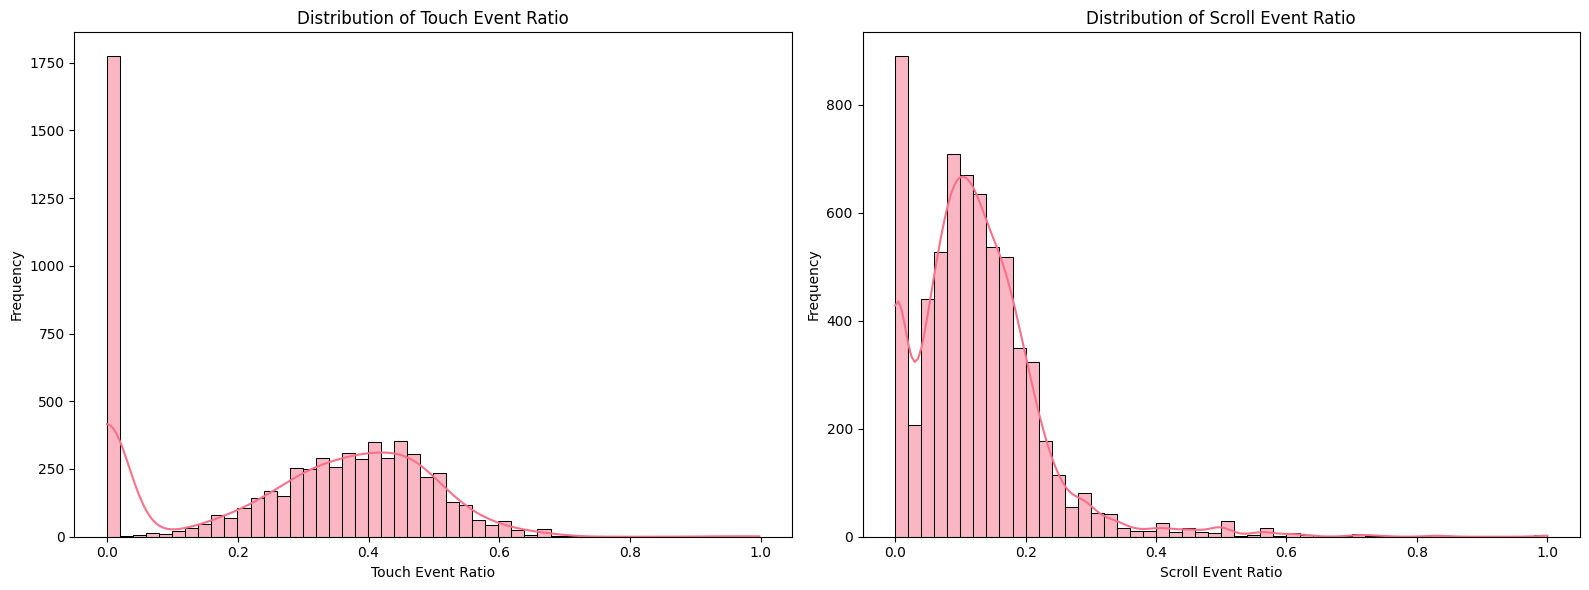

       touch_event_ratio  scroll_event_ratio
count        6505.000000         6505.000000
mean            0.279376            0.124760
std             0.197251            0.099164
min             0.000000            0.000000
25%             0.000000            0.063142
50%             0.329825            0.114286
75%             0.437143            0.168675
max             0.997667            1.000000


In [44]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['touch_event_ratio'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Touch Event Ratio')
axes[0].set_xlabel('Touch Event Ratio')
axes[0].set_ylabel('Frequency')

sns.histplot(df['scroll_event_ratio'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Scroll Event Ratio')
axes[1].set_xlabel('Scroll Event Ratio')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(df[['touch_event_ratio', 'scroll_event_ratio']].describe())



The distributions show that for many sessions, either touch or scroll events are dominant. Sessions with a ratio close to 1 for either touch or scroll, and 0 for the other, might be worth investigating as they represent very one-dimensional interaction patterns.

### EDA for Behavioral Flags

Now let's look at the behavioral flags: `no_scroll_but_events` and `short_duration_high_events`. These flags are designed to capture specific, suspicious behaviors. We'll use bar plots to see how many sessions are flagged.


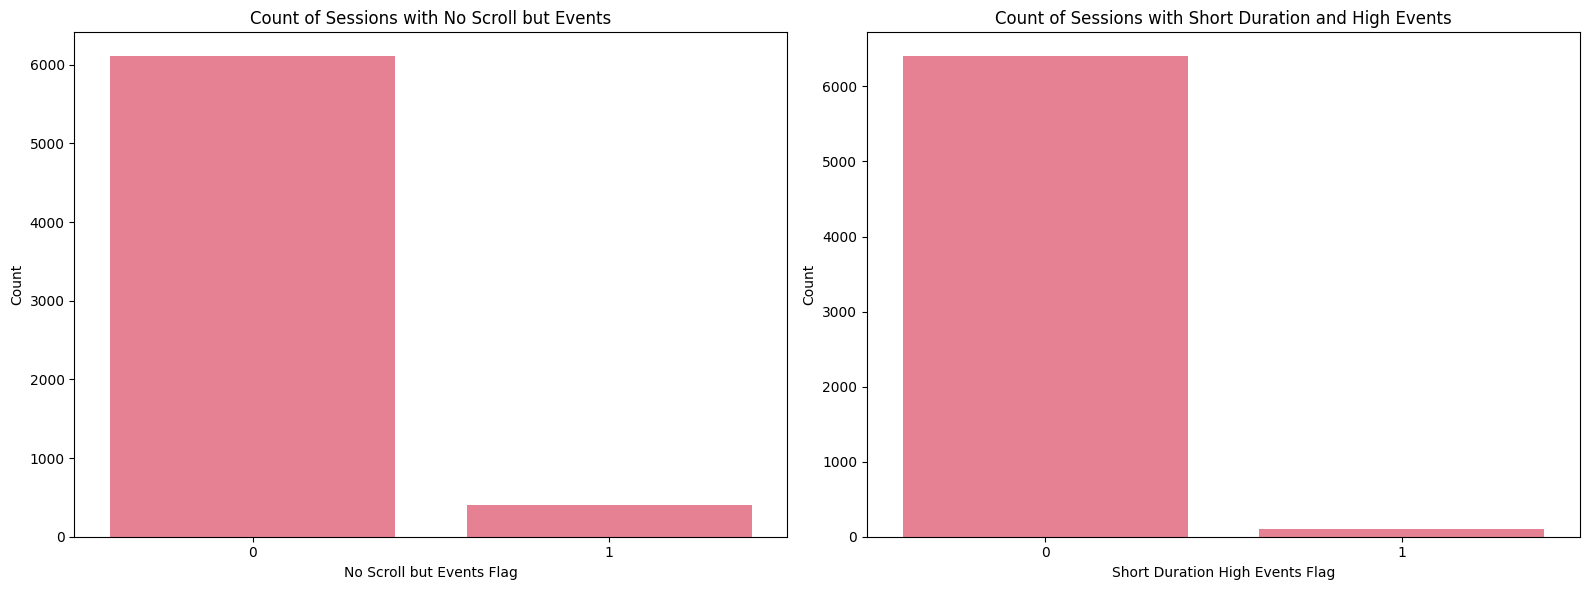

no_scroll_but_events
0    0.938816
1    0.061184
Name: proportion, dtype: float64
short_duration_high_events
0    0.984012
1    0.015988
Name: proportion, dtype: float64


In [45]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='no_scroll_but_events', data=df, ax=axes[0])
axes[0].set_title('Count of Sessions with No Scroll but Events')
axes[0].set_xlabel('No Scroll but Events Flag')
axes[0].set_ylabel('Count')

sns.countplot(x='short_duration_high_events', data=df, ax=axes[1])
axes[1].set_title('Count of Sessions with Short Duration and High Events')
axes[1].set_xlabel('Short Duration High Events Flag')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(df['no_scroll_but_events'].value_counts(normalize=True))
print(df['short_duration_high_events'].value_counts(normalize=True))



The bar plots show that a small but significant number of sessions are captured by these flags. These are likely to be high-precision indicators of bot activity.

### EDA for `event_diversity`

`event_diversity` measures the variety of user interactions. A human user is likely to perform a mix of different actions (scrolling, touching, resizing, etc.), leading to higher event diversity. A simple bot might be programmed to perform only one or two types of actions, resulting in low diversity.


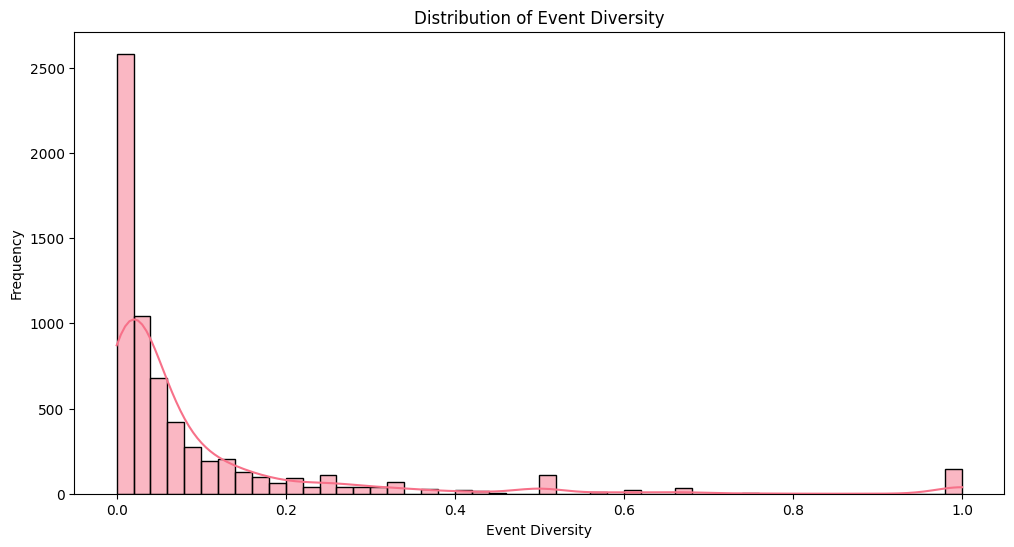

count    6505.000000
mean        0.095266
std         0.177954
min         0.000000
25%         0.010526
50%         0.030303
75%         0.090909
max         1.000000
Name: event_diversity, dtype: float64


In [46]:

plt.figure(figsize=(12, 6))
sns.histplot(df['event_diversity'], bins=50, kde=True)
plt.title('Distribution of Event Diversity')
plt.xlabel('Event Diversity')
plt.ylabel('Frequency')
plt.show()

print(df['event_diversity'].describe())



The `event_diversity` histogram shows peaks at certain levels, suggesting common patterns of interaction. Sessions with very low diversity could be indicative of simplistic bots.

### EDA for `user_agent_entropy`

User agent strings can be a rich source of information. Bots sometimes use randomly generated or malformed user agent strings. The entropy of the user agent string can be a measure of its complexity and randomness. Unusually low or high entropy values might be suspicious.


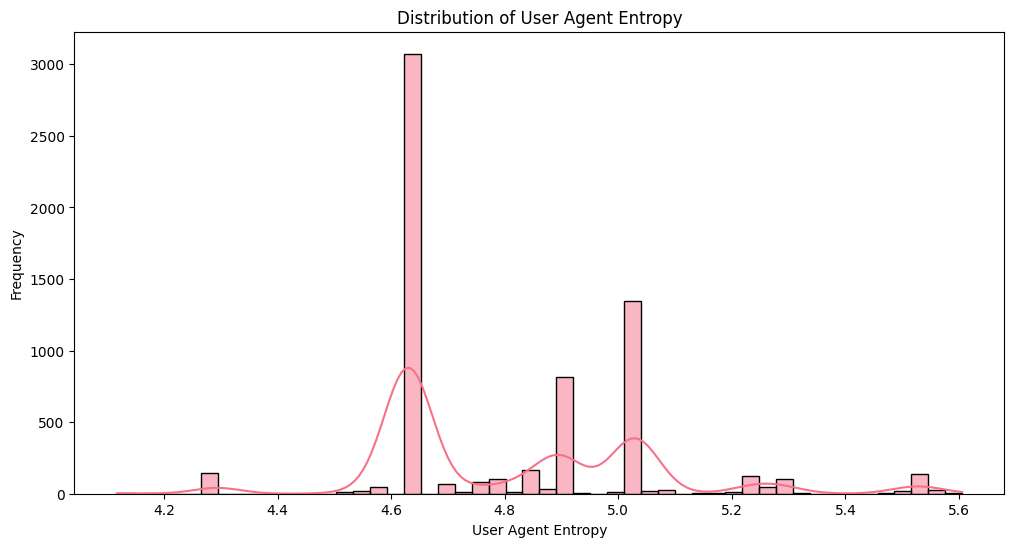

count    6505.000000
mean        4.809518
std         0.243623
min         4.116493
25%         4.630456
50%         4.630456
75%         5.027111
max         5.605551
Name: user_agent_entropy, dtype: float64


In [47]:

plt.figure(figsize=(12, 6))
sns.histplot(df['user_agent_entropy'], bins=50, kde=True)
plt.title('Distribution of User Agent Entropy')
plt.xlabel('User Agent Entropy')
plt.ylabel('Frequency')
plt.show()

print(df['user_agent_entropy'].describe())



The distribution of `user_agent_entropy` appears to be multi-modal, with several peaks. This suggests that there are common user agent strings with similar complexity. We should be on the lookout for sessions with entropy values in the tails of the distribution.

### EDA for `session_duration_zscore`

The z-score of the session duration helps us identify how far a session's duration is from the mean. Sessions with a high absolute z-score are outliers and could be bots (e.g., sessions that are extremely short or extremely long).


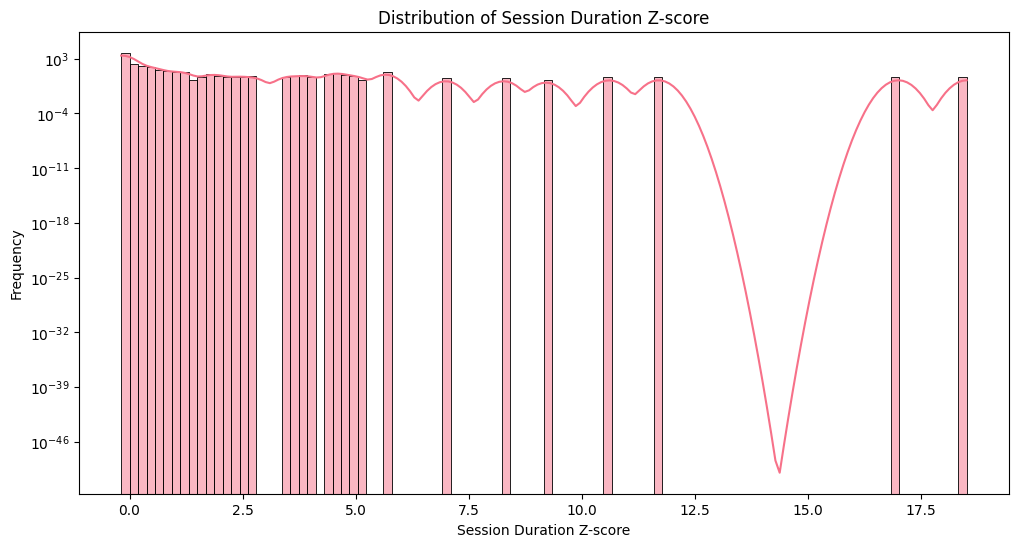

count    6.505000e+03
mean     4.369210e-17
std      1.000000e+00
min     -1.849026e-01
25%     -1.837763e-01
50%     -1.802853e-01
75%     -1.584438e-01
max      1.851562e+01
Name: session_duration_zscore, dtype: float64


In [48]:

plt.figure(figsize=(12, 6))
sns.histplot(df['session_duration_zscore'], bins=100, kde=True)
plt.title('Distribution of Session Duration Z-score')
plt.xlabel('Session Duration Z-score')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

print(df['session_duration_zscore'].describe())



### Preparing Data for Machine Learning

To train a machine learning model, we need to ensure that all our features are in a numerical format. The following steps will prepare the dataframe for modeling:

1.  **Drop Unnecessary Columns**: We will remove identifier columns (`tcid`, `tbid`) and raw text/date columns (`user_agent`, `created_at`) that have already been feature-engineered.
2.  **One-Hot Encode Categorical Features**: We will convert categorical columns into a numerical format using one-hot encoding. This will create a new binary column for each category in the original feature.

This will result in a dataframe that is ready to be used to train a machine learning model for bot detection.


## tranform the data into a format that can be used by the ML models

In [49]:
print(df.columns.tolist())


['tcid', 'tbid', 'created_at', 'user_agent', 'total_events', 'session_duration_s', 'total_scroll_depth', 'max_scroll_depth', 'TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count', 'tbid_frequency', 'is_high_freq_tbid', 'duration_category', 'hour', 'day_of_week', 'day_of_month', 'month', 'year', 'is_weekend', 'is_business_hours', 'is_night_time', 'is_peak_hours', 'days_since_start', 'browser', 'os', 'device_type', 'browser_version', 'user_agent_length', 'has_bot_keywords', 'is_empty_ua', 'is_short_ua', 'is_long_ua', 'is_common_ua', 'is_mobile_os', 'risk_score', 'events_per_second', 'scroll_speed', 'scroll_to_touch_ratio', 'touch_event_ratio', 'scroll_event_ratio', 'no_scroll_but_events', 'short_duration_high_events', 'event_diversity', 'user_agent_entropy', 'session_duration_zscore']


In [50]:
# Print all columns and sample 5 values for each column to understand data types and decide on ML models
print("Dataset shape:", df.shape)
print("\n" + "="*80)
print("COLUMN ANALYSIS - Sample 5 values per column:")
print("="*80)

for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Non-null count: {df[col].count()}/{len(df)}")
    print(f"Unique values: {df[col].nunique()}")
    
    # Get sample values (first 5 non-null values)
    sample_values = df[col].dropna().head(5).tolist()
    print(f"Sample values: {sample_values}")
    
    # Additional info for different data types
    if df[col].dtype in ['int64', 'float64']:
        print(f"Range: {df[col].min()} to {df[col].max()}")
        if df[col].nunique() <= 10:
            print(f"All unique values: {sorted(df[col].unique())}")
    elif df[col].dtype == 'object':
        if df[col].nunique() <= 20:
            print(f"All unique values: {df[col].unique().tolist()}")
        else:
            print(f"Most common values: {df[col].value_counts().head(3).to_dict()}")
    
    print("-" * 60)

print("\n" + "="*80)
print("SUMMARY FOR ML MODEL SELECTION:")
print("="*80)

# Categorize columns for ML model selection
categorical_cols = []
numerical_cols = []
text_cols = []
id_cols = []
datetime_cols = []

for col in df.columns:
    if col.lower() in ['tcid', 'tbid'] or 'id' in col.lower():
        id_cols.append(col)
    elif 'created_at' in col.lower() or df[col].dtype == 'datetime64[ns]':
        datetime_cols.append(col)
    elif df[col].dtype == 'object':
        if df[col].nunique() > 50:  # Likely text data
            text_cols.append(col)
        else:  # Likely categorical
            categorical_cols.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

print(f"ID columns ({len(id_cols)}): {id_cols}")
print(f"Datetime columns ({len(datetime_cols)}): {datetime_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Text columns ({len(text_cols)}): {text_cols}")

print(f"\nTotal features for ML (excluding ID/datetime): {len(numerical_cols) + len(categorical_cols) + len(text_cols)}")

print("\n" + "="*80)
print("RECOMMENDED ML APPROACHES:")
print("="*80)
print("1. SUPERVISED LEARNING (if you have labels):")
print("   - Binary Classification: Logistic Regression, Random Forest, XGBoost, SVM")
print("   - Multi-class Classification: Same as above + Neural Networks")
print("\n2. UNSUPERVISED LEARNING (no labels - anomaly detection):")
print("   - Isolation Forest, One-Class SVM, Local Outlier Factor")
print("   - Clustering: K-Means, DBSCAN, Gaussian Mixture Models")
print("\n3. FEATURE ENGINEERING NEEDED:")
print("   - One-hot encode categorical variables")
print("   - Scale/normalize numerical features")
print("   - Handle text data with TF-IDF or embeddings if needed")
print("   - Create polynomial/interaction features if beneficial")


Dataset shape: (6505, 47)

COLUMN ANALYSIS - Sample 5 values per column:

Column: tcid
Data type: object
Non-null count: 6505/6505
Unique values: 2586
Sample values: ['06046a82-f99f-46a6-b67f-8999d24c1423', '44d62259-c6d3-49ff-8346-e1d5ddff802e', 'f455fdcd-5bf1-4ccc-bfce-0bf25ebc8085', 'bcf89e35-85b4-4f18-aeaa-c2f4954acc26', 'b1dd98fb-707d-4021-bfd2-f2ef3c123623']
Most common values: {'66e5042e-5ee7-4e6e-8b9e-993e287bd9c2': 66, 'ffd1b26f-6a50-4a1f-8811-e62ce5521402': 66, 'fdc10308-977d-4c70-98d9-c141aa1eeb49': 42}
------------------------------------------------------------

Column: tbid
Data type: object
Non-null count: 6505/6505
Unique values: 4498
Sample values: ['29f79081-1057-43b2-b22d-8260ff55d80e', 'ff6ad41b-5f8f-4ba7-a30d-d27625fae06d', '2020b325-ff27-4003-b0ad-75bf2cd60798', '428b1d7c-3e38-4339-90a4-576d9be1d462', '144e269f-5e79-4fec-b5e6-b56b0fd68e81']
Most common values: {'e64ce853-17dc-4d81-aa49-75da0e87ec76': 12, '8a525e2b-b29b-42e8-9208-8c6cb2ceff03': 10, '65f19818-225a-4


=== TOP ANOMALOUS TCIDs (unsupervised) ===
                                tcid  anomaly_score
070b9909-aff4-45c6-9025-a2cd7d1837e6       0.618716
2b9b941c-82a2-4c00-9b06-9440c74139ca       0.615737
2b9b941c-82a2-4c00-9b06-9440c74139ca       0.615737
2b9b941c-82a2-4c00-9b06-9440c74139ca       0.615737
2b9b941c-82a2-4c00-9b06-9440c74139ca       0.615737
79724b7f-ded1-422d-82e6-29b473612916       0.615348
79724b7f-ded1-422d-82e6-29b473612916       0.615348
79724b7f-ded1-422d-82e6-29b473612916       0.615348
79724b7f-ded1-422d-82e6-29b473612916       0.615348
088dca50-2cd9-4c34-baf7-c3968910f2fc       0.600390
088dca50-2cd9-4c34-baf7-c3968910f2fc       0.600390
088dca50-2cd9-4c34-baf7-c3968910f2fc       0.600390
088dca50-2cd9-4c34-baf7-c3968910f2fc       0.600390
6448f537-cac3-4123-8175-c4825ce0166b       0.598121
6448f537-cac3-4123-8175-c4825ce0166b       0.598121
6220614e-ab6c-441c-a942-7e6315a2c740       0.592208
a7643eef-83cc-4bc6-9b37-0d0a6d36e182       0.588878
a9b127b7-6873-43ce-8

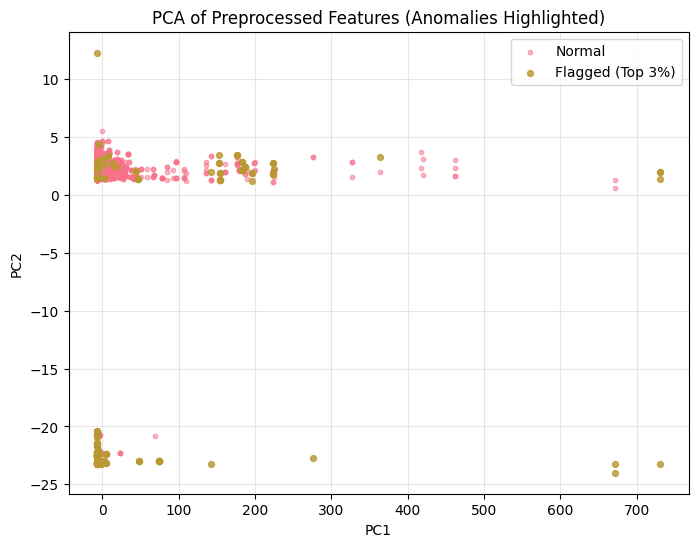


=== SUMMARY ===
Rows: 6,505
Flagged as anomalies (top 3%): 196
Use `pred_df` for ranked TCIDs and `why_df` for per-anomaly top deviant features.


In [51]:
# === Unsupervised Bot/Anomaly Detection with IsolationForest (No-Error Version) ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

# -----------------------------
# 0) INPUT CHECKS & CLEANUPS
# -----------------------------
assert 'df' in globals(), "DataFrame 'df' not found. Please ensure your data is loaded into a variable named df."

RAW_DROP = ['tcid','tbid','created_at','user_agent']
df_uns = df.copy()
df_uns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ensure we have an ID
if 'tcid' not in df_uns.columns:
    df_uns['tcid'] = np.arange(len(df_uns)).astype(str)

# -----------------------------
# 1) FEATURE SELECTION
# -----------------------------
feat_df = df_uns.drop(columns=[c for c in RAW_DROP if c in df_uns.columns], errors="ignore")

# Coerce numeric-looking objects to numeric where possible
for c in feat_df.columns:
    if feat_df[c].dtype == 'object':
        # Try parse to numeric; if fails, stays object
        coerced = pd.to_numeric(feat_df[c], errors='ignore')
        feat_df[c] = coerced

# Identify categorical / numeric AFTER coercion
cat_cols = feat_df.select_dtypes(include=['object','category','bool']).columns.tolist()
num_cols = [c for c in feat_df.columns if c not in cat_cols]

# Heavy-tailed numeric columns -> apply log1p to these indices (if present)
heavy_tailed_candidates = [
    'total_events','session_duration_s','total_scroll_depth','max_scroll_depth',
    'SCROLL_count','RESIZE_count','VISIBILITY_CHANGE_count',
    'events_per_second','scroll_speed','scroll_to_touch_ratio',
    'touch_event_ratio','scroll_event_ratio','user_agent_length','user_agent_entropy',
    'tbid_frequency'
]
heavy_tailed = [c for c in heavy_tailed_candidates if c in num_cols]
heavy_idx = [num_cols.index(c) for c in heavy_tailed]  # indices within numeric pipeline

# -----------------------------
# 2) CUSTOM LOG1P TRANSFORMER (array-safe)
# -----------------------------
class Log1pSelected(BaseEstimator, TransformerMixin):
    """Apply clip>=0 and log1p to selected column indices on a numpy array."""
    def __init__(self, idx_list):
        self.idx_list = idx_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.asarray(X).astype(float, copy=True)
        for j in self.idx_list:
            # clip negatives to 0 before log1p (safe for counts/rates)
            X[:, j] = np.log1p(np.clip(X[:, j], a_min=0.0, a_max=None))
        return X

# -----------------------------
# 3) PREPROCESSING PIPELINES
# -----------------------------
from sklearn.preprocessing import OneHotEncoder  # reimport to ensure right version

num_pre = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant', fill_value=0.0)),
    ('log1p', Log1pSelected(heavy_idx)),
    ('scale', RobustScaler())
])

# For scikit-learn 1.7.x use sparse_output
cat_pre = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ('num', num_pre, num_cols),
        ('cat', cat_pre, cat_cols),
    ],
    remainder='drop'
)

# -----------------------------
# 4) MODEL
# -----------------------------
iso = IsolationForest(
    n_estimators=400,
    max_samples='auto',
    contamination='auto',      # set a float like 0.03 if you expect ~3% bots
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline([('prep', pre), ('iso', iso)])

# Fit the full pipeline
pipe.fit(feat_df)

# -----------------------------
# 5) SCORING & LABELS
# -----------------------------
# IsolationForest: higher score_samples => less anomalous, so invert
prep_X = pipe.named_steps['prep'].transform(feat_df)
raw_scores = pipe.named_steps['iso'].score_samples(prep_X)
anomaly_score = -raw_scores
df_uns['anomaly_score'] = anomaly_score

# Flag top-K% as anomalies
top_pct = 0.03  # 3%
cut = np.quantile(anomaly_score, 1 - top_pct)
df_uns['is_bot_unsup'] = (anomaly_score >= cut).astype(int)

# -----------------------------
# 6) “WHAT ARE THE TCIDs?” + “WHY?”
# -----------------------------
topN = 50
top_candidates = df_uns.sort_values('anomaly_score', ascending=False).head(topN)

print("\n=== TOP ANOMALOUS TCIDs (unsupervised) ===")
print(top_candidates[['tcid','anomaly_score']].head(20).to_string(index=False))

# Build a robust “why” table on numeric features
num_cols_present = [c for c in num_cols if c in df_uns.columns]
if len(num_cols_present) > 0:
    med = df_uns[num_cols_present].median(numeric_only=True)
    q1  = df_uns[num_cols_present].quantile(0.25, numeric_only=True)
    q3  = df_uns[num_cols_present].quantile(0.75, numeric_only=True)
    iqr = (q3 - q1).replace(0, np.nan)

    why_tables = []
    N_show = min(10, len(top_candidates))
    for _, r in top_candidates.head(N_show).iterrows():
        rz = ((r[num_cols_present] - med) / iqr).abs()
        rz = rz.replace([np.inf, -np.inf], np.nan).fillna(0.0)
        top_feats = rz.sort_values(ascending=False).head(5)

        why_tables.append(pd.DataFrame({
            'tcid': r['tcid'],
            'feature': top_feats.index,
            'abs_robust_z': top_feats.values,
            'value': r[top_feats.index].values,
            'median': med[top_feats.index].values
        }))

    why_df = (pd.concat(why_tables, ignore_index=True)
              if len(why_tables) else
              pd.DataFrame(columns=['tcid','feature','abs_robust_z','value','median']))
else:
    why_df = pd.DataFrame(columns=['tcid','feature','abs_robust_z','value','median'])

print("\n=== TOP ANOMALIES: MOST DEVIANT FEATURES (robust-Z vs median) ===")
print(why_df.head(50).to_string(index=False))

pred_df = df_uns[['tcid','anomaly_score','is_bot_unsup']].sort_values('anomaly_score', ascending=False)
print("\n=== PREDICTIONS (head) ===")
print(pred_df.head(20).to_string(index=False))

# -----------------------------
# 7) OPTIONAL: PCA SCATTER (WHY THEY WERE CHOSEN)
# -----------------------------
try:
    pca = PCA(n_components=2, random_state=42)
    Z = pca.fit_transform(prep_X)
    plt.figure(figsize=(8,6))
    mask = df_uns['is_bot_unsup'].values.astype(bool)
    plt.scatter(Z[~mask,0], Z[~mask,1], s=10, alpha=0.5, label='Normal')
    plt.scatter(Z[mask,0],  Z[mask,1],  s=18, alpha=0.8, label=f'Flagged (Top {int(100*top_pct)}%)')
    plt.title('PCA of Preprocessed Features (Anomalies Highlighted)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print("\n[Plot skipped] PCA scatter could not be generated:", str(e))

# -----------------------------
# 8) SUMMARY
# -----------------------------
print("\n=== SUMMARY ===")
print(f"Rows: {len(df_uns):,}")
print(f"Flagged as anomalies (top {int(top_pct*100)}%): {df_uns['is_bot_unsup'].sum():,}")
print("Use `pred_df` for ranked TCIDs and `why_df` for per-anomaly top deviant features.")
# You can also export:
# pred_df.to_csv('unsupervised_bot_candidates.csv', index=False)
# why_df.to_csv('unsup_bot_why_table.csv', index=False)


### Isolation Forest

=== ISOLATION FOREST BOT DETECTION ===
Feature matrix shape: (6505, 28)
Features used: 28

Total samples: 6,505
Anomalies detected: 326 (5.0%)
Normal samples: 6,179 (95.0%)

=== ANOMALY SCORE STATISTICS ===
Min score: -0.1631
Max score: 0.1708
Mean score: 0.0998
Std score: 0.0497

=== TOP 20 ANOMALIES (Lowest Scores) ===
                                tcid  anomaly_score  total_events  session_duration_s  events_per_second  scroll_speed  user_agent_length
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053          1039             946.030           1.098274  28556.145154                162
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053          1039             946.030           1.098274  28556.145154                162
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053          1039             946.030           1.098274  28556.145154                162
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053          1039             946.030           1.098274  28556.145154       

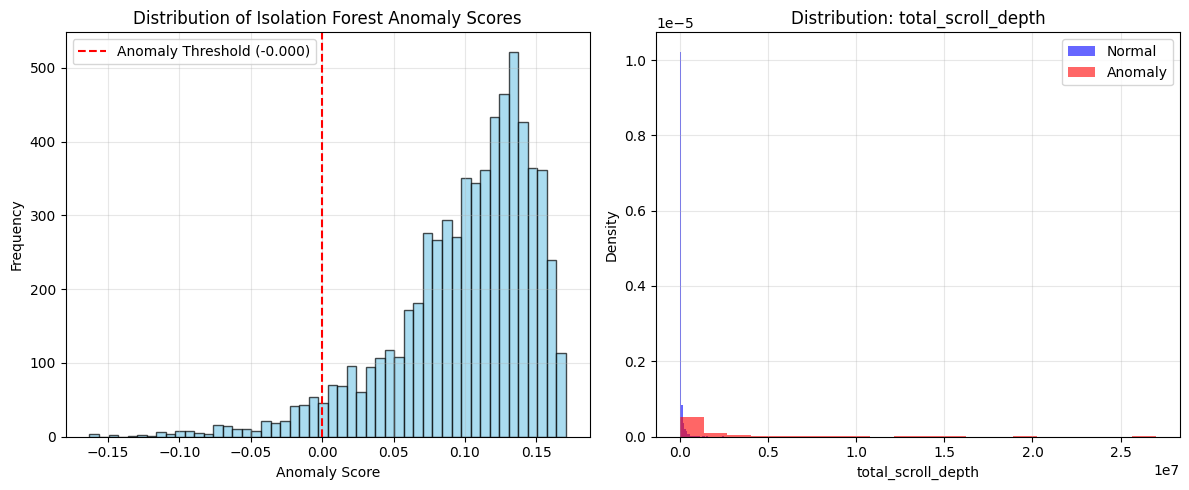

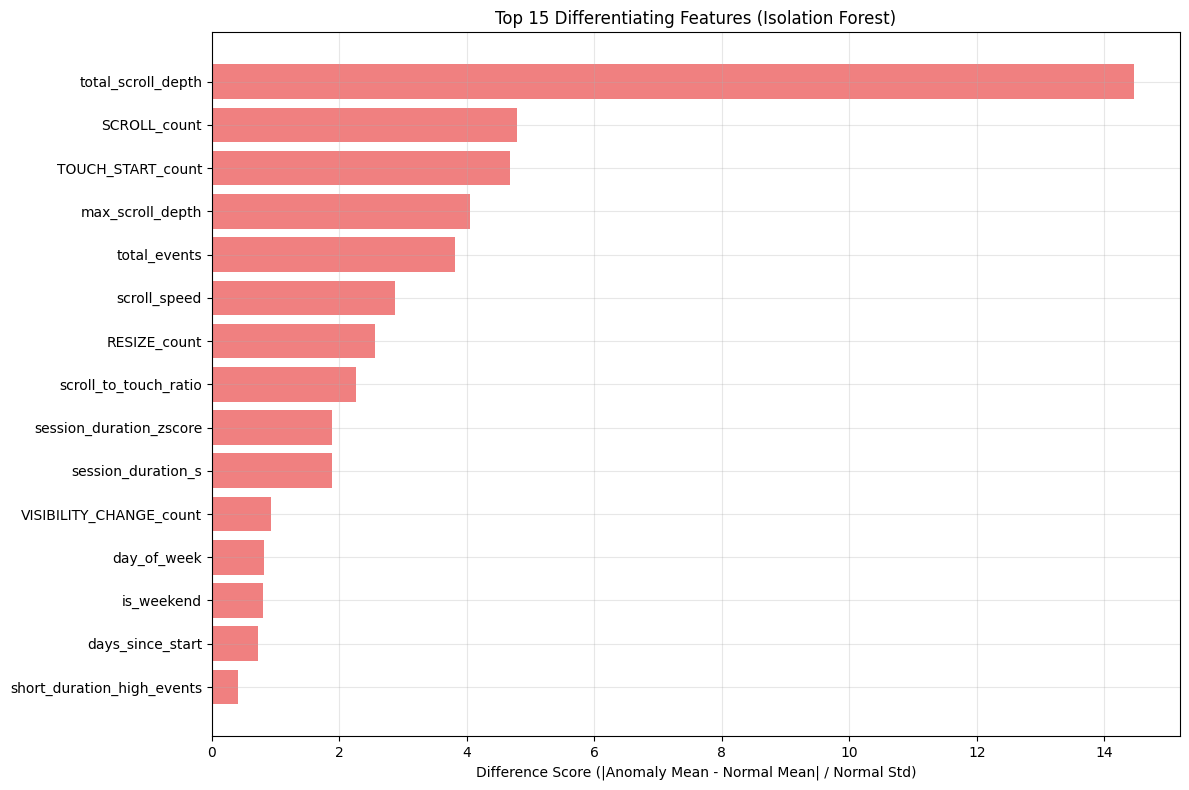

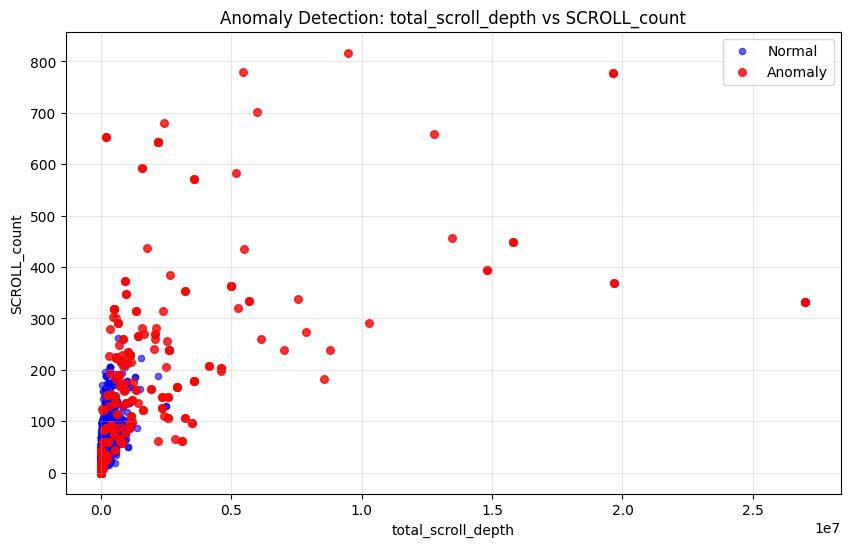


=== ISOLATION FOREST SUMMARY ===
Model: Isolation Forest
Contamination rate: 5.0%
Number of estimators: 100
Features used: 28
Anomalies detected: 326 out of 6,505 samples
Detection rate: 5.01%

Results saved in 'results_df' - shape: (6505, 4)
Use results_df.to_csv('isolation_forest_results.csv', index=False) to export

=== TOP 10 BOT CANDIDATES ===
                                tcid  anomaly_score  is_bot_iso  anomaly_rank
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053           1           2.5
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053           1           2.5
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053           1           2.5
2b9b941c-82a2-4c00-9b06-9440c74139ca      -0.163053           1           2.5
a0a1ca14-d83f-4eaf-a0c1-fddfd1a0bd5c      -0.144843           1           5.5
a0a1ca14-d83f-4eaf-a0c1-fddfd1a0bd5c      -0.144843           1           5.5
5d3740b8-3ba2-45c4-a80a-cd073aa8fb06      -0.131563           1           7.0
cd3b9a79-61e7-4dbf-8776-

In [52]:
# -----------------------------
# ISOLATION FOREST BOT DETECTION
# -----------------------------

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ISOLATION FOREST BOT DETECTION ===")

# Select numerical features for anomaly detection
numerical_features = [
    'total_events', 'session_duration_s', 'total_scroll_depth', 'max_scroll_depth',
    'TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count',
    'user_agent_length', 'events_per_second', 'scroll_speed', 'scroll_to_touch_ratio',
    'touch_event_ratio', 'scroll_event_ratio', 'event_diversity', 'user_agent_entropy',
    'session_duration_zscore', 'hour', 'day_of_week', 'is_weekend', 'is_business_hours',
    'is_night_time', 'is_peak_hours', 'days_since_start', 'risk_score',
    'no_scroll_but_events', 'short_duration_high_events', 'is_mobile_os'
]

# Prepare the feature matrix
X_iso = df[numerical_features].fillna(0)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iso)

print(f"Feature matrix shape: {X_scaled.shape}")
print(f"Features used: {len(numerical_features)}")

# -----------------------------
# ISOLATION FOREST MODEL
# -----------------------------

# Set contamination rate (expected proportion of outliers)
contamination_rate = 0.05  # 5% of data expected to be anomalies

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(
    contamination=contamination_rate,
    random_state=42,
    n_estimators=100,
    max_samples='auto',
    n_jobs=-1
)

# Fit the model and predict
y_pred = iso_forest.fit_predict(X_scaled)
anomaly_scores = iso_forest.decision_function(X_scaled)

# Convert predictions (-1 for anomaly, 1 for normal) to binary (1 for anomaly, 0 for normal)
is_anomaly = (y_pred == -1).astype(int)

# Create results dataframe
df_iso = df.copy()
df_iso['anomaly_score'] = anomaly_scores
df_iso['is_bot_iso'] = is_anomaly
df_iso['anomaly_rank'] = df_iso['anomaly_score'].rank(ascending=True)

print(f"\nTotal samples: {len(df_iso):,}")
print(f"Anomalies detected: {is_anomaly.sum():,} ({is_anomaly.mean()*100:.1f}%)")
print(f"Normal samples: {(1-is_anomaly).sum():,} ({(1-is_anomaly.mean())*100:.1f}%)")

# -----------------------------
# ANALYSIS OF ANOMALIES
# -----------------------------

print("\n=== ANOMALY SCORE STATISTICS ===")
print(f"Min score: {anomaly_scores.min():.4f}")
print(f"Max score: {anomaly_scores.max():.4f}")
print(f"Mean score: {anomaly_scores.mean():.4f}")
print(f"Std score: {anomaly_scores.std():.4f}")

# Top anomalies
top_anomalies = df_iso[df_iso['is_bot_iso'] == 1].sort_values('anomaly_score').head(20)
print("\n=== TOP 20 ANOMALIES (Lowest Scores) ===")
display_cols = ['tcid', 'anomaly_score', 'total_events', 'session_duration_s', 
                'events_per_second', 'scroll_speed', 'user_agent_length']
print(top_anomalies[display_cols].to_string(index=False))

# -----------------------------
# FEATURE IMPORTANCE (APPROXIMATE)
# -----------------------------

print("\n=== FEATURE ANALYSIS FOR ANOMALIES ===")

# Calculate feature statistics for anomalies vs normal
anomaly_data = X_iso[is_anomaly == 1]
normal_data = X_iso[is_anomaly == 0]

feature_analysis = []
for i, feature in enumerate(numerical_features):
    anom_mean = anomaly_data.iloc[:, i].mean()
    norm_mean = normal_data.iloc[:, i].mean()
    anom_std = anomaly_data.iloc[:, i].std()
    norm_std = normal_data.iloc[:, i].std()
    
    # Calculate difference in means (normalized by normal std)
    if norm_std > 0:
        diff_score = abs(anom_mean - norm_mean) / norm_std
    else:
        diff_score = 0
    
    feature_analysis.append({
        'feature': feature,
        'anomaly_mean': anom_mean,
        'normal_mean': norm_mean,
        'difference_score': diff_score,
        'anomaly_std': anom_std,
        'normal_std': norm_std
    })

feature_df = pd.DataFrame(feature_analysis).sort_values('difference_score', ascending=False)
print("\n=== TOP DIFFERENTIATING FEATURES ===")
print(feature_df.head(15).round(4).to_string(index=False))

# -----------------------------
# VISUALIZATIONS
# -----------------------------

# 1. Anomaly Score Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(anomaly_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=anomaly_scores[is_anomaly == 1].max(), color='red', linestyle='--', 
            label=f'Anomaly Threshold ({anomaly_scores[is_anomaly == 1].max():.3f})')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Isolation Forest Anomaly Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Anomaly vs Normal comparison for top feature
top_feature = feature_df.iloc[0]['feature']
plt.subplot(1, 2, 2)
normal_vals = df_iso[df_iso['is_bot_iso'] == 0][top_feature]
anomaly_vals = df_iso[df_iso['is_bot_iso'] == 1][top_feature]

plt.hist(normal_vals, bins=30, alpha=0.6, label='Normal', color='blue', density=True)
plt.hist(anomaly_vals, bins=20, alpha=0.6, label='Anomaly', color='red', density=True)
plt.xlabel(top_feature)
plt.ylabel('Density')
plt.title(f'Distribution: {top_feature}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Feature Importance Plot
plt.figure(figsize=(12, 8))
top_features = feature_df.head(15)
plt.barh(range(len(top_features)), top_features['difference_score'], color='lightcoral')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Difference Score (|Anomaly Mean - Normal Mean| / Normal Std)')
plt.title('Top 15 Differentiating Features (Isolation Forest)')
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Scatter plot of top 2 features
if len(feature_df) >= 2:
    plt.figure(figsize=(10, 6))
    feature1 = feature_df.iloc[0]['feature']
    feature2 = feature_df.iloc[1]['feature']
    
    normal_mask = df_iso['is_bot_iso'] == 0
    anomaly_mask = df_iso['is_bot_iso'] == 1
    
    plt.scatter(df_iso[normal_mask][feature1], df_iso[normal_mask][feature2], 
                alpha=0.6, s=20, c='blue', label='Normal')
    plt.scatter(df_iso[anomaly_mask][feature1], df_iso[anomaly_mask][feature2], 
                alpha=0.8, s=30, c='red', label='Anomaly')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Anomaly Detection: {feature1} vs {feature2}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# -----------------------------
# SUMMARY AND EXPORT
# -----------------------------

print("\n=== ISOLATION FOREST SUMMARY ===")
print(f"Model: Isolation Forest")
print(f"Contamination rate: {contamination_rate*100}%")
print(f"Number of estimators: {iso_forest.n_estimators}")
print(f"Features used: {len(numerical_features)}")
print(f"Anomalies detected: {is_anomaly.sum():,} out of {len(df_iso):,} samples")
print(f"Detection rate: {is_anomaly.mean()*100:.2f}%")

# Create final results for export
results_df = df_iso[['tcid', 'anomaly_score', 'is_bot_iso', 'anomaly_rank']].sort_values('anomaly_score')
print(f"\nResults saved in 'results_df' - shape: {results_df.shape}")
print("Use results_df.to_csv('isolation_forest_results.csv', index=False) to export")

# Display top candidates
print(f"\n=== TOP 10 BOT CANDIDATES ===")
print(results_df.head(10).to_string(index=False))


### One-Class SVM

=== ONE-CLASS SVM ANOMALY DETECTION ===
Using 28 numerical features for One-Class SVM
Features: ['total_events', 'session_duration_s', 'total_scroll_depth', 'max_scroll_depth', 'TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count', 'user_agent_length', 'events_per_second']...
Data shape after preprocessing: (6505, 28)

Training One-Class SVM with nu=0.01, gamma=scale
Anomalies detected: 179 (2.75%)

Training One-Class SVM with nu=0.01, gamma=auto
Anomalies detected: 179 (2.75%)

Training One-Class SVM with nu=0.05, gamma=scale
Anomalies detected: 343 (5.27%)

Training One-Class SVM with nu=0.05, gamma=auto
Anomalies detected: 343 (5.27%)

Training One-Class SVM with nu=0.1, gamma=scale
Anomalies detected: 648 (9.96%)

Training One-Class SVM with nu=0.1, gamma=auto
Anomalies detected: 648 (9.96%)

=== SELECTED MODEL: nu_0.05_gamma_scale ===
Anomalies detected: 343 (5.27%)

=== MODEL COMPARISON ===
                  Model  Anomalies Rate (%)
SVM_nu_0.01_gamma_sca

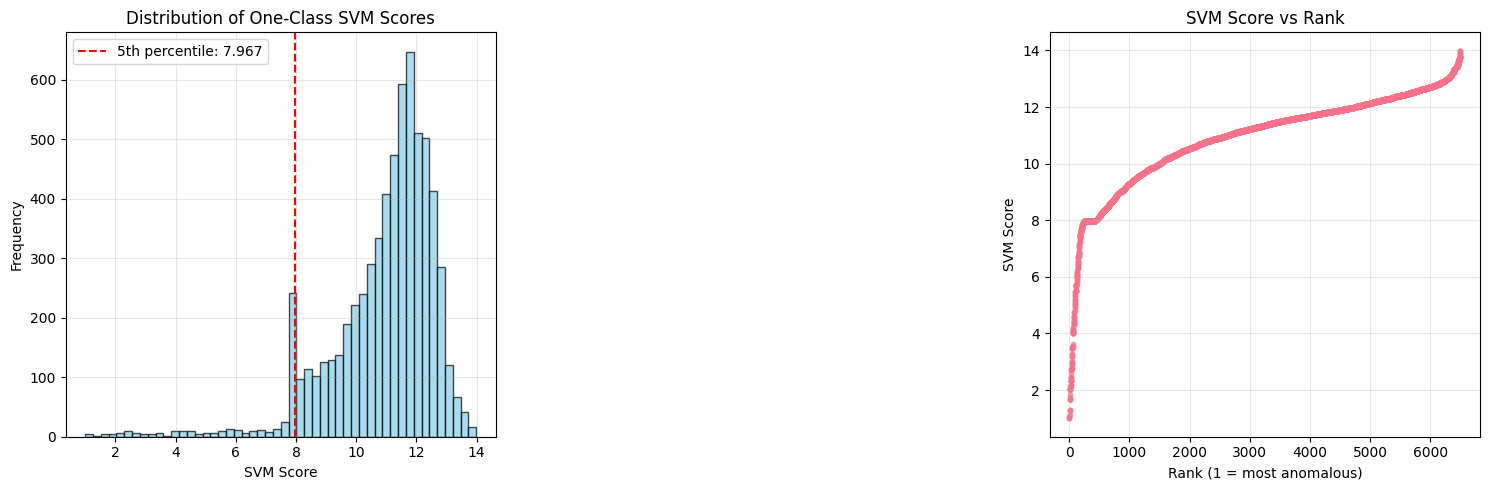


=== FEATURE ANALYSIS FOR ANOMALIES ===
Top features distinguishing anomalies (by effect size):
                feature  normal_mean  anomaly_mean  cohens_d
           SCROLL_count      22.0446      124.2566    1.9934
           total_events     203.7308     1044.1224    1.6218
       max_scroll_depth    3802.6781    18684.9184    1.6218
     total_scroll_depth   63042.5742  1643674.8798    1.6048
           scroll_speed     352.6629     1898.8467    1.3002
  scroll_to_touch_ratio       4.4904       41.9399    1.2735
     session_duration_s    2030.3430    22516.2241    1.2654
VISIBILITY_CHANGE_count       2.3140        7.8630    1.0066
           RESIZE_count       7.0776       24.2741    0.9803
      events_per_second       1.6624        8.2568    0.9053


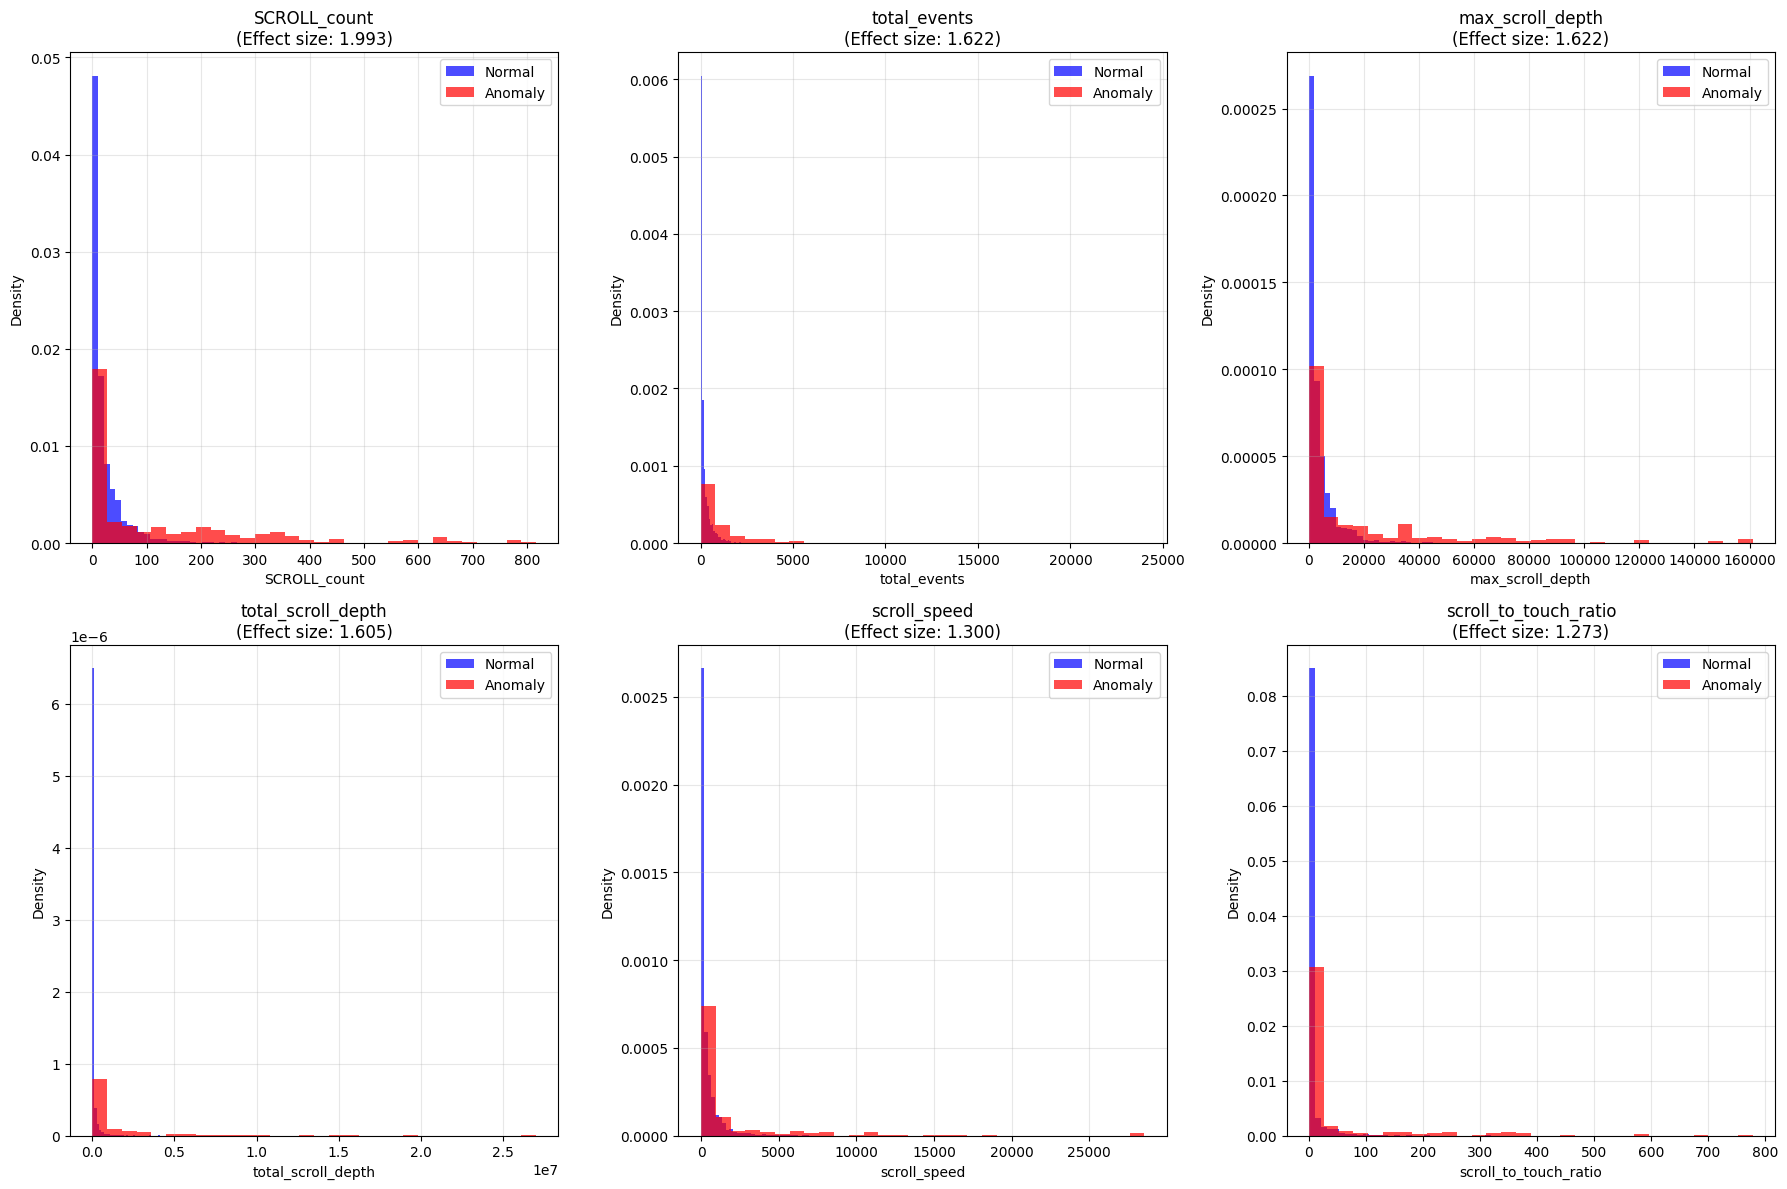

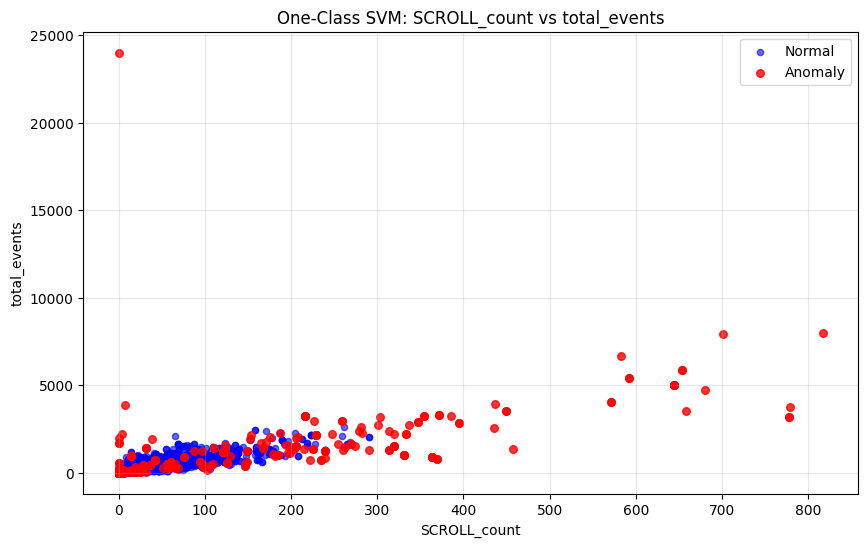


=== ONE-CLASS SVM SUMMARY ===
Model: One-Class SVM
Nu parameter: 0.05 (expected fraction of outliers)
Gamma parameter: scale
Kernel: RBF
Features used: 28
Anomalies detected: 343 out of 6,505 samples
Detection rate: 5.27%

Results saved in 'svm_results_df' - shape: (6505, 4)
Use svm_results_df.to_csv('one_class_svm_results.csv', index=False) to export

=== TOP 10 BOT CANDIDATES (One-Class SVM) ===
                                tcid  svm_score  is_bot_svm  svm_rank
27972db2-c3ef-4e2a-af85-72ffe6a9b5dd   1.000003           1       1.0
10064a49-ca51-4442-9bce-2d10d164f3a1   1.022938           1       2.0
21223ac7-b0e7-43c9-98a3-aa2a0b6dcd7d   1.069686           1       3.0
a0a1ca14-d83f-4eaf-a0c1-fddfd1a0bd5c   1.125823           1       4.0
5d3740b8-3ba2-45c4-a80a-cd073aa8fb06   1.246598           1       5.0
a36e1803-de1b-4af0-8bd6-a89b1e6107a8   1.285736           1       6.0
705e8e73-37de-41cb-b8fd-3708a5f5f49c   1.311571           1       7.0
de524360-83fd-4d3c-a8f6-f35443761bdb  

In [53]:

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ONE-CLASS SVM ANOMALY DETECTION ===")

# Use the same numerical features as before
print(f"Using {len(numerical_features)} numerical features for One-Class SVM")
print(f"Features: {numerical_features[:10]}{'...' if len(numerical_features) > 10 else ''}")

# Prepare data for One-Class SVM (requires scaling)
X_svm = df[numerical_features].copy()

# Handle any remaining infinite or extremely large values
X_svm = X_svm.replace([np.inf, -np.inf], np.nan)
for col in X_svm.columns:
    if X_svm[col].dtype in ['float64', 'int64']:
        # Cap extreme values at 99.9th percentile
        upper_limit = X_svm[col].quantile(0.999)
        lower_limit = X_svm[col].quantile(0.001)
        X_svm[col] = X_svm[col].clip(lower=lower_limit, upper=upper_limit)

# Fill any remaining NaN values
X_svm = X_svm.fillna(X_svm.median())

# Scale the features (important for SVM)
scaler = StandardScaler()
X_svm_scaled = scaler.fit_transform(X_svm)

print(f"Data shape after preprocessing: {X_svm_scaled.shape}")

# Train One-Class SVM with different parameters
nu_values = [0.01, 0.05, 0.1]  # Expected fraction of outliers
gamma_values = ['scale', 'auto']  # Kernel coefficient

svm_results = {}

for nu in nu_values:
    for gamma in gamma_values:
        print(f"\nTraining One-Class SVM with nu={nu}, gamma={gamma}")
        
        # Train model
        oc_svm = OneClassSVM(nu=nu, gamma=gamma, kernel='rbf')
        oc_svm.fit(X_svm_scaled)
        
        # Make predictions (-1 for outliers, 1 for inliers)
        svm_predictions = oc_svm.predict(X_svm_scaled)
        svm_scores = oc_svm.score_samples(X_svm_scaled)  # Higher is more normal
        
        # Convert to binary (1 for anomaly, 0 for normal)
        is_anomaly_svm = (svm_predictions == -1).astype(int)
        
        # Store results
        key = f"nu_{nu}_gamma_{gamma}"
        svm_results[key] = {
            'model': oc_svm,
            'predictions': svm_predictions,
            'scores': svm_scores,
            'is_anomaly': is_anomaly_svm,
            'anomaly_count': is_anomaly_svm.sum(),
            'anomaly_rate': is_anomaly_svm.mean()
        }
        
        print(f"Anomalies detected: {is_anomaly_svm.sum():,} ({is_anomaly_svm.mean()*100:.2f}%)")

# Select best model (you can change this logic based on your needs)
best_nu = 0.05  # Adjust based on your domain knowledge
best_gamma = 'scale'
best_key = f"nu_{best_nu}_gamma_{best_gamma}"
best_svm = svm_results[best_key]

print(f"\n=== SELECTED MODEL: {best_key} ===")
print(f"Anomalies detected: {best_svm['anomaly_count']:,} ({best_svm['anomaly_rate']*100:.2f}%)")

# Create results dataframe
df_svm = df.copy()
df_svm['svm_score'] = best_svm['scores']
df_svm['is_bot_svm'] = best_svm['is_anomaly']
df_svm['svm_rank'] = df_svm['svm_score'].rank(ascending=True)  # Lower scores = more anomalous

# -----------------------------
# COMPARISON OF MODELS
# -----------------------------

print("\n=== MODEL COMPARISON ===")
comparison_data = []

for key, result in svm_results.items():
    comparison_data.append({
        'Model': f"SVM_{key}",
        'Anomalies': result['anomaly_count'],
        'Rate (%)': f"{result['anomaly_rate']*100:.2f}%"
    })

# Add Isolation Forest for comparison if available
if 'is_bot_iso' in df.columns:
    iso_anomalies = df['is_bot_iso'].sum()
    iso_rate = df['is_bot_iso'].mean()
    comparison_data.append({
        'Model': 'Isolation_Forest',
        'Anomalies': iso_anomalies,
        'Rate (%)': f"{iso_rate*100:.2f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# -----------------------------
# VISUALIZATIONS
# -----------------------------

# 1. Score distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_svm['svm_score'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_svm['svm_score'].quantile(0.05), color='red', linestyle='--', 
            label=f"5th percentile: {df_svm['svm_score'].quantile(0.05):.3f}")
plt.xlabel('SVM Score')
plt.ylabel('Frequency')
plt.title('Distribution of One-Class SVM Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Anomaly comparison (if Isolation Forest results exist)
if 'is_bot_iso' in df.columns:
    plt.subplot(1, 3, 2)
    comparison_matrix = pd.crosstab(df_svm['is_bot_iso'], df_svm['is_bot_svm'], 
                                  rownames=['Isolation Forest'], colnames=['One-Class SVM'])
    sns.heatmap(comparison_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Model Agreement Matrix')
    
    # Calculate agreement
    agreement = (df_svm['is_bot_iso'] == df_svm['is_bot_svm']).mean()
    plt.figtext(0.65, 0.02, f'Agreement: {agreement*100:.1f}%', fontsize=10)

# 3. Score vs rank
plt.subplot(1, 3, 3)
plt.scatter(df_svm['svm_rank'], df_svm['svm_score'], alpha=0.6, s=10)
plt.xlabel('Rank (1 = most anomalous)')
plt.ylabel('SVM Score')
plt.title('SVM Score vs Rank')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# FEATURE IMPORTANCE ANALYSIS
# -----------------------------

print("\n=== FEATURE ANALYSIS FOR ANOMALIES ===")

# Compare feature distributions between normal and anomalous samples
anomaly_stats = []
normal_samples = df_svm[df_svm['is_bot_svm'] == 0]
anomaly_samples = df_svm[df_svm['is_bot_svm'] == 1]

for feature in numerical_features[:15]:  # Top 15 features for readability
    normal_mean = normal_samples[feature].mean()
    anomaly_mean = anomaly_samples[feature].mean()
    normal_std = normal_samples[feature].std()
    anomaly_std = anomaly_samples[feature].std()
    
    # Calculate effect size (Cohen's d)
    pooled_std = np.sqrt(((len(normal_samples)-1)*normal_std**2 + 
                         (len(anomaly_samples)-1)*anomaly_std**2) / 
                        (len(normal_samples) + len(anomaly_samples) - 2))
    cohens_d = abs(normal_mean - anomaly_mean) / pooled_std if pooled_std > 0 else 0
    
    anomaly_stats.append({
        'feature': feature,
        'normal_mean': normal_mean,
        'anomaly_mean': anomaly_mean,
        'difference': anomaly_mean - normal_mean,
        'cohens_d': cohens_d
    })

feature_df = pd.DataFrame(anomaly_stats).sort_values('cohens_d', ascending=False)
print("Top features distinguishing anomalies (by effect size):")
print(feature_df.head(10)[['feature', 'normal_mean', 'anomaly_mean', 'cohens_d']].round(4).to_string(index=False))

# Visualize top distinguishing features
if len(feature_df) >= 6:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (_, row) in enumerate(feature_df.head(6).iterrows()):
        feature = row['feature']
        
        axes[i].hist(normal_samples[feature], bins=30, alpha=0.7, label='Normal', 
                    color='blue', density=True)
        axes[i].hist(anomaly_samples[feature], bins=30, alpha=0.7, label='Anomaly', 
                    color='red', density=True)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{feature}\n(Effect size: {row["cohens_d"]:.3f})')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 2D scatter plot for top 2 features
if len(feature_df) >= 2:
    plt.figure(figsize=(10, 6))
    feature1 = feature_df.iloc[0]['feature']
    feature2 = feature_df.iloc[1]['feature']
    
    normal_mask = df_svm['is_bot_svm'] == 0
    anomaly_mask = df_svm['is_bot_svm'] == 1
    
    plt.scatter(df_svm[normal_mask][feature1], df_svm[normal_mask][feature2], 
                alpha=0.6, s=20, c='blue', label='Normal')
    plt.scatter(df_svm[anomaly_mask][feature1], df_svm[anomaly_mask][feature2], 
                alpha=0.8, s=30, c='red', label='Anomaly')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'One-Class SVM: {feature1} vs {feature2}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# -----------------------------
# SUMMARY AND EXPORT
# -----------------------------

print(f"\n=== ONE-CLASS SVM SUMMARY ===")
print(f"Model: One-Class SVM")
print(f"Nu parameter: {best_nu} (expected fraction of outliers)")
print(f"Gamma parameter: {best_gamma}")
print(f"Kernel: RBF")
print(f"Features used: {len(numerical_features)}")
print(f"Anomalies detected: {best_svm['anomaly_count']:,} out of {len(df_svm):,} samples")
print(f"Detection rate: {best_svm['anomaly_rate']*100:.2f}%")

# Create final results for export
svm_results_df = df_svm[['tcid', 'svm_score', 'is_bot_svm', 'svm_rank']].sort_values('svm_score')
print(f"\nResults saved in 'svm_results_df' - shape: {svm_results_df.shape}")
print("Use svm_results_df.to_csv('one_class_svm_results.csv', index=False) to export")

# Display top candidates
print(f"\n=== TOP 10 BOT CANDIDATES (One-Class SVM) ===")
print(svm_results_df.head(10).to_string(index=False))

# Combined results if both models are available
if 'is_bot_iso' in df.columns:
    print(f"\n=== CONSENSUS ANOMALIES (Both Models Agree) ===")
    consensus_anomalies = df_svm[(df_svm['is_bot_iso'] == 1) & (df_svm['is_bot_svm'] == 1)]
    print(f"Sessions flagged by both models: {len(consensus_anomalies)}")
    if len(consensus_anomalies) > 0:
        consensus_results = consensus_anomalies[['tcid', 'anomaly_score', 'svm_score']].head(10)
        print(consensus_results.to_string(index=False))


### Local Outlier Factor (LOF)

=== LOCAL OUTLIER FACTOR (LOF) ANOMALY DETECTION ===
Features used: 16
Dataset shape: (6505, 16)

=== HYPERPARAMETER TUNING ===
n_neighbors=10, contamination=0.05: 326 anomalies (5.0%), variance=4796737464908692.0000
n_neighbors=10, contamination=0.10: 651 anomalies (10.0%), variance=4796737464908692.0000
n_neighbors=10, contamination=0.15: 976 anomalies (15.0%), variance=4796737464908692.0000
n_neighbors=10, contamination=0.20: 1301 anomalies (20.0%), variance=4796737464908692.0000
n_neighbors=20, contamination=0.05: 326 anomalies (5.0%), variance=157995049186569.8438
n_neighbors=20, contamination=0.10: 651 anomalies (10.0%), variance=157995049186569.8438
n_neighbors=20, contamination=0.15: 976 anomalies (15.0%), variance=157995049186569.8438
n_neighbors=20, contamination=0.20: 1301 anomalies (20.0%), variance=157995049186569.8438
n_neighbors=30, contamination=0.05: 324 anomalies (5.0%), variance=3715996.9047
n_neighbors=30, contamination=0.10: 646 anomalies (9.9%), variance=3715996.9

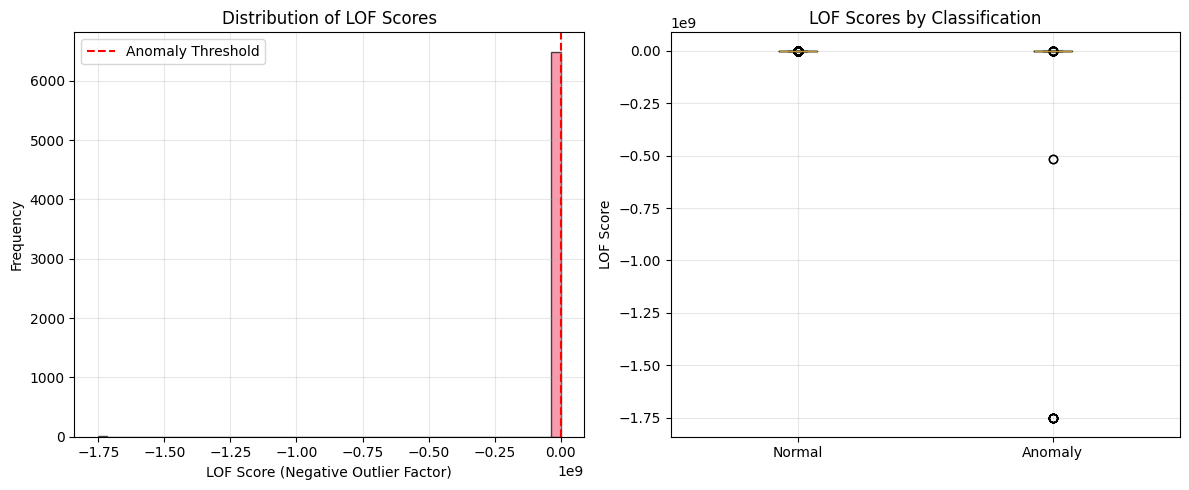


=== ANOMALY CHARACTERISTICS ===
                   Feature  Normal_Mean  Anomaly_Mean  Difference_%
0             total_events       234.73        500.35        113.16
1       session_duration_s      2892.35       7245.95        150.52
2       total_scroll_depth    123483.28     580508.00        370.11
3         max_scroll_depth      4408.24       7983.18         81.10
4        TOUCH_START_count        65.47        195.54        198.69
5             SCROLL_count        26.13         52.16         99.61
6             RESIZE_count         7.85         10.55         34.44
7  VISIBILITY_CHANGE_count         2.45          5.58        127.77


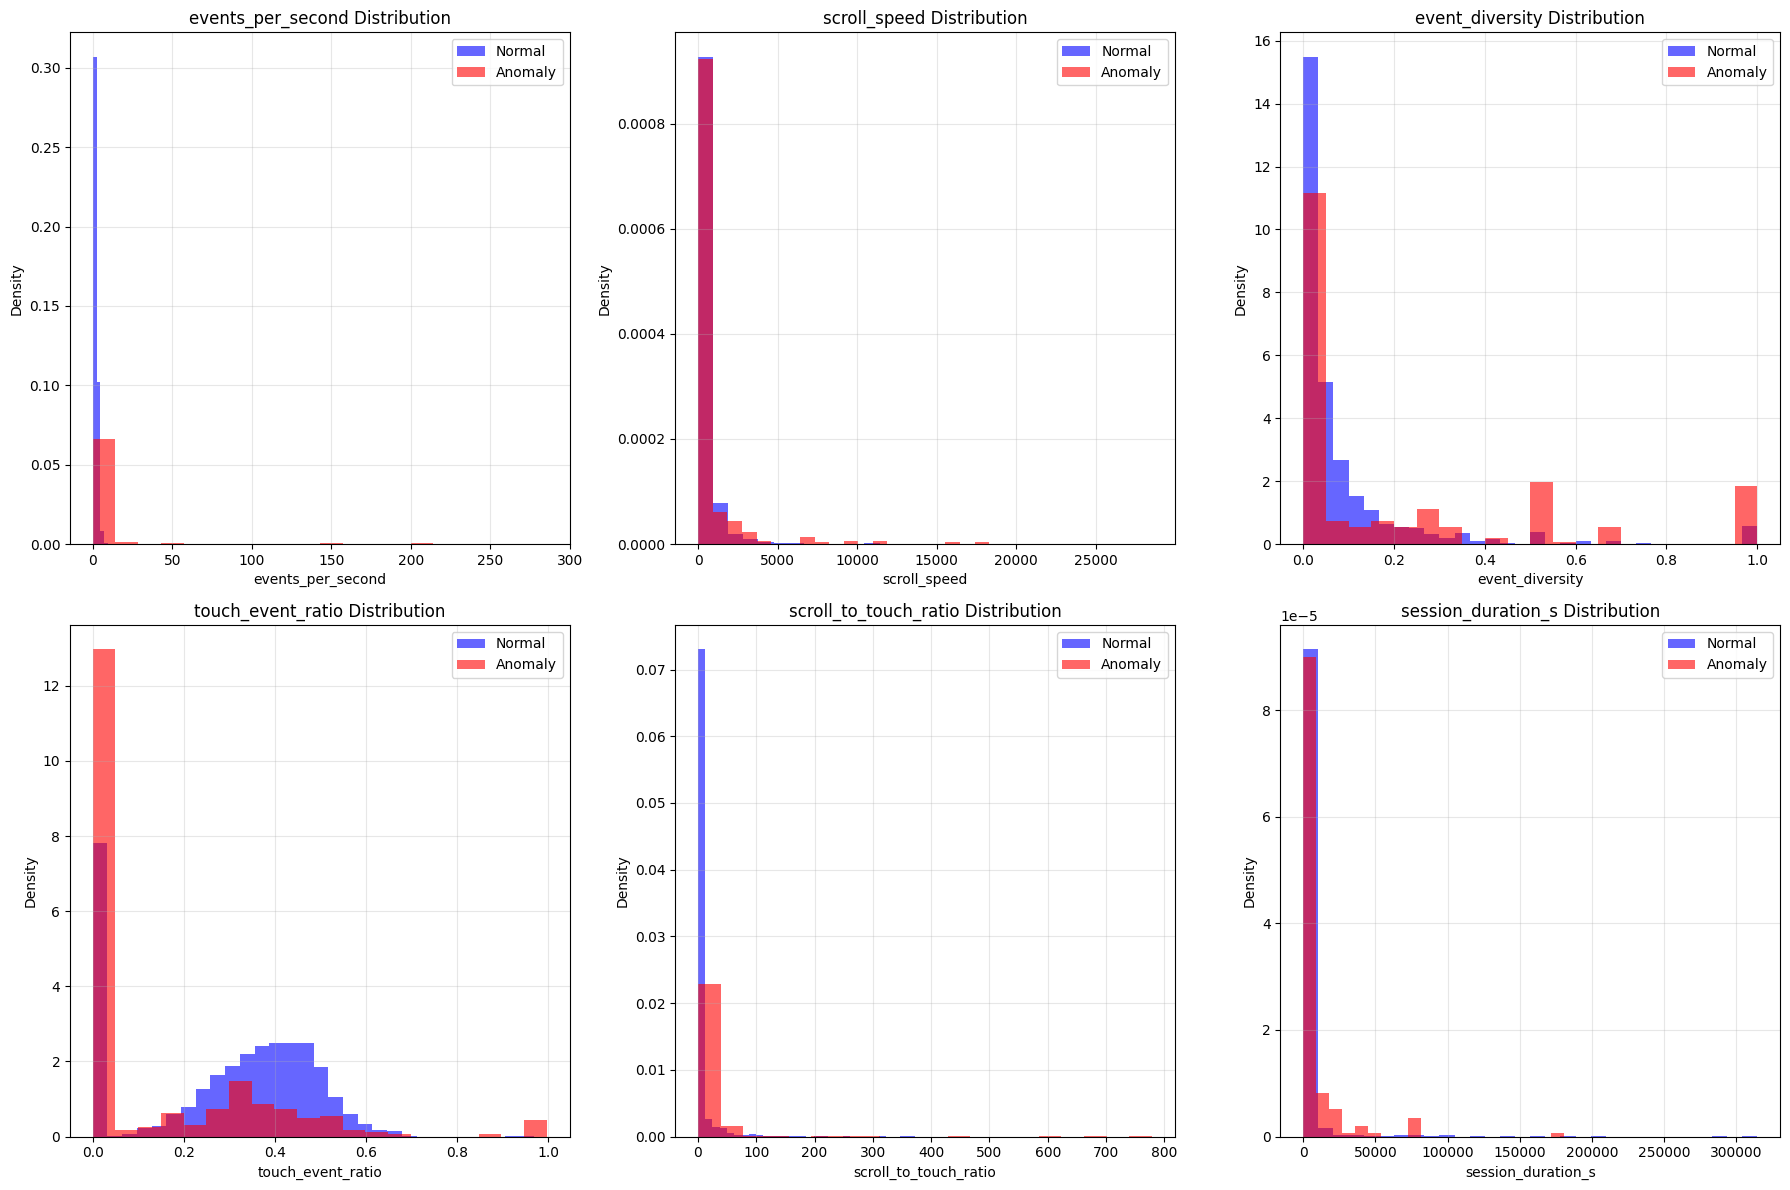


=== TOP ANOMALIES ANALYSIS ===
Top 10 anomalies by LOF score:
                                      tcid     lof_score  total_events  \
5442  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
5444  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
5445  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
5446  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
5447  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
6393  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
6395  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
6396  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
6397  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   
6398  7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           716   

      session_duration_s  events_per_second  scroll_speed  event_diversity  
5442           80989.112             0.0088  

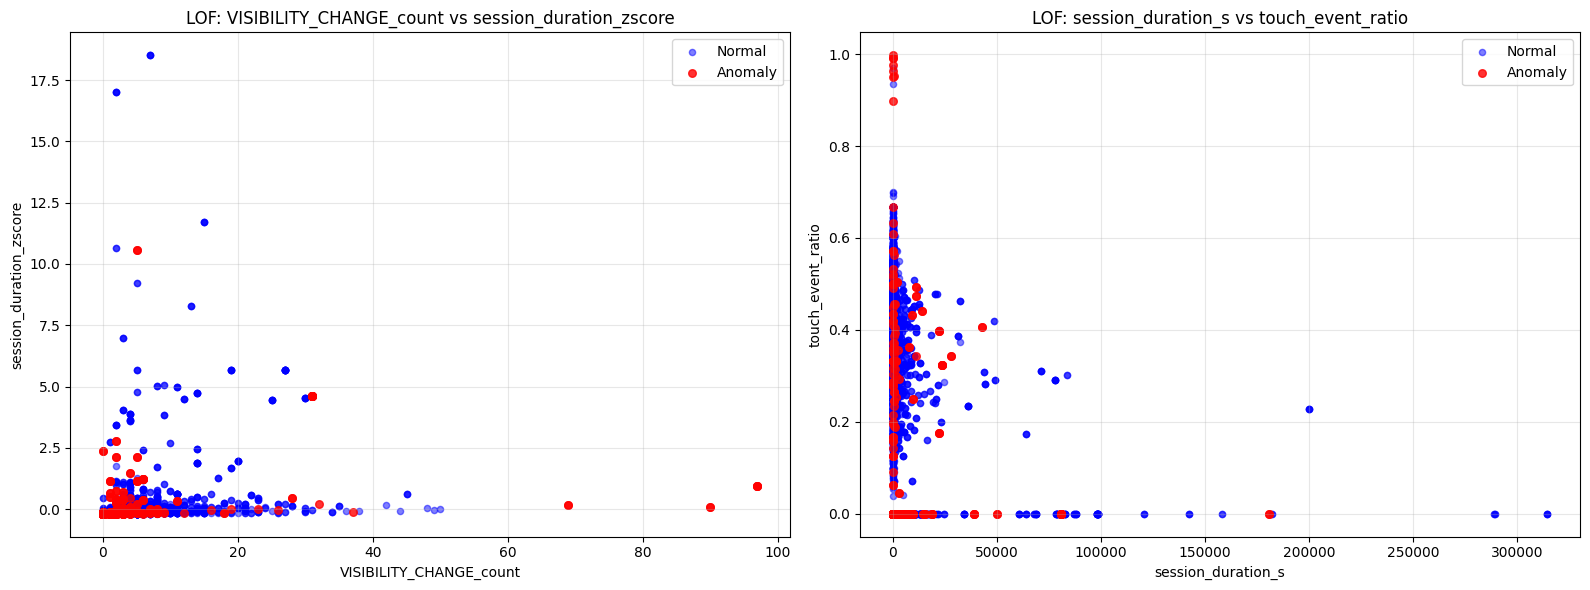


=== LOCAL OUTLIER FACTOR SUMMARY ===
Model: Local Outlier Factor (LOF)
n_neighbors parameter: 10
Contamination parameter: 0.05
Features used: 16
Anomalies detected: 326 out of 6,505 samples
Detection rate: 5.01%

Results saved in 'lof_results_df' - shape: (6505, 4)
Use lof_results_df.to_csv('lof_results.csv', index=False) to export

=== TOP 10 BOT CANDIDATES (LOF) ===
                                tcid     lof_score  is_bot_lof  lof_rank
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.752898e+09           1       1.0
7318a39f-4406-4fe4-8419-33904407e483 -1.7528

In [54]:
# Local Outlier Factor (LOF) for Anomaly Detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=== LOCAL OUTLIER FACTOR (LOF) ANOMALY DETECTION ===")

# Prepare data for LOF
df_lof = df.copy()

# Use the same numerical features as previous models for consistency
numerical_features = [
    'total_events', 'session_duration_s', 'total_scroll_depth', 'max_scroll_depth',
    'TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count',
    'events_per_second', 'scroll_speed', 'scroll_to_touch_ratio', 
    'touch_event_ratio', 'scroll_event_ratio', 'event_diversity',
    'user_agent_entropy', 'session_duration_zscore'
]

# Prepare feature matrix
X_lof = df_lof[numerical_features].copy()

# Handle infinite values and missing data
X_lof = X_lof.replace([np.inf, -np.inf], np.nan)
X_lof = X_lof.fillna(X_lof.median())

# Scale features for LOF
scaler_lof = StandardScaler()
X_lof_scaled = scaler_lof.fit_transform(X_lof)

print(f"Features used: {len(numerical_features)}")
print(f"Dataset shape: {X_lof_scaled.shape}")

# -----------------------------
# HYPERPARAMETER TUNING
# -----------------------------

print("\n=== HYPERPARAMETER TUNING ===")

# Test different parameters
n_neighbors_options = [10, 20, 30, 50]
contamination_options = [0.05, 0.10, 0.15, 0.20]

best_lof = None
best_n_neighbors = None
best_contamination = None
best_score = -np.inf

results = []

for n_neighbors in n_neighbors_options:
    for contamination in contamination_options:
        # Fit LOF model
        lof = LocalOutlierFactor(
            n_neighbors=n_neighbors,
            contamination=contamination,
            novelty=False,  # For outlier detection on training data
            n_jobs=-1
        )
        
        # Get outlier predictions and scores
        outlier_labels = lof.fit_predict(X_lof_scaled)
        lof_scores = lof.negative_outlier_factor_
        
        # Calculate metrics
        anomaly_count = np.sum(outlier_labels == -1)
        anomaly_rate = anomaly_count / len(X_lof_scaled)
        
        # Score based on reasonable anomaly rate and score distribution
        score_variance = np.var(lof_scores)
        reasonable_rate = 0.05 <= anomaly_rate <= 0.20
        score = score_variance if reasonable_rate else score_variance * 0.1
        
        results.append({
            'n_neighbors': n_neighbors,
            'contamination': contamination,
            'anomaly_count': anomaly_count,
            'anomaly_rate': anomaly_rate,
            'score_variance': score_variance,
            'score': score
        })
        
        print(f"n_neighbors={n_neighbors}, contamination={contamination:.2f}: "
              f"{anomaly_count} anomalies ({anomaly_rate:.1%}), variance={score_variance:.4f}")
        
        if score > best_score:
            best_score = score
            best_n_neighbors = n_neighbors
            best_contamination = contamination
            best_lof = {
                'model': lof,
                'scores': lof_scores,
                'labels': outlier_labels,
                'anomaly_count': anomaly_count,
                'anomaly_rate': anomaly_rate
            }

print(f"\nBest parameters: n_neighbors={best_n_neighbors}, contamination={best_contamination}")

# -----------------------------
# FINAL MODEL WITH BEST PARAMETERS
# -----------------------------

print(f"\n=== FINAL LOF MODEL ===")

# Train final model
final_lof = LocalOutlierFactor(
    n_neighbors=best_n_neighbors,
    contamination=best_contamination,
    novelty=False,
    n_jobs=-1
)

outlier_predictions = final_lof.fit_predict(X_lof_scaled)
lof_scores = final_lof.negative_outlier_factor_

# Add results to dataframe
df_lof['lof_score'] = lof_scores
df_lof['is_bot_lof'] = (outlier_predictions == -1).astype(int)
df_lof['lof_rank'] = df_lof['lof_score'].rank(method='min')

# -----------------------------
# ANALYSIS AND VISUALIZATION
# -----------------------------

print(f"\n=== LOF RESULTS ANALYSIS ===")

anomaly_mask = df_lof['is_bot_lof'] == 1
normal_mask = df_lof['is_bot_lof'] == 0

print(f"Total anomalies detected: {anomaly_mask.sum():,}")
print(f"Detection rate: {anomaly_mask.mean()*100:.2f}%")
print(f"LOF score range: {df_lof['lof_score'].min():.4f} to {df_lof['lof_score'].max():.4f}")

# Score distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_lof['lof_score'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(df_lof[anomaly_mask]['lof_score'].max(), color='red', linestyle='--', 
            label=f'Anomaly Threshold')
plt.xlabel('LOF Score (Negative Outlier Factor)')
plt.ylabel('Frequency')
plt.title('Distribution of LOF Scores')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([df_lof[normal_mask]['lof_score'], df_lof[anomaly_mask]['lof_score']], 
            labels=['Normal', 'Anomaly'])
plt.ylabel('LOF Score')
plt.title('LOF Scores by Classification')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature analysis for anomalies
print(f"\n=== ANOMALY CHARACTERISTICS ===")

anomaly_stats = []
for feature in numerical_features[:8]:  # Top 8 features for readability
    normal_mean = df_lof[normal_mask][feature].mean()
    anomaly_mean = df_lof[anomaly_mask][feature].mean()
    diff_pct = ((anomaly_mean - normal_mean) / normal_mean * 100) if normal_mean != 0 else 0
    
    anomaly_stats.append({
        'Feature': feature,
        'Normal_Mean': normal_mean,
        'Anomaly_Mean': anomaly_mean,
        'Difference_%': diff_pct
    })

anomaly_stats_df = pd.DataFrame(anomaly_stats)
print(anomaly_stats_df.round(2))

# Visualize key feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

key_features = ['events_per_second', 'scroll_speed', 'event_diversity', 
                'touch_event_ratio', 'scroll_to_touch_ratio', 'session_duration_s']

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    # Plot distributions
    normal_data = df_lof[normal_mask][feature]
    anomaly_data = df_lof[anomaly_mask][feature]
    
    ax.hist(normal_data, bins=30, alpha=0.6, label='Normal', density=True, color='blue')
    ax.hist(anomaly_data, bins=20, alpha=0.6, label='Anomaly', density=True, color='red')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'{feature} Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Top anomalies analysis
print(f"\n=== TOP ANOMALIES ANALYSIS ===")
top_anomalies = df_lof[anomaly_mask].nsmallest(10, 'lof_score')

print("Top 10 anomalies by LOF score:")
display_cols = ['tcid', 'lof_score', 'total_events', 'session_duration_s', 
                'events_per_second', 'scroll_speed', 'event_diversity']
print(top_anomalies[display_cols].round(4))

# Feature correlation with LOF scores
print(f"\n=== FEATURE CORRELATION WITH LOF SCORES ===")
correlations = []
for feature in numerical_features:
    corr = df_lof[feature].corr(df_lof['lof_score'])
    correlations.append({'Feature': feature, 'Correlation': corr})

corr_df = pd.DataFrame(correlations).sort_values('Correlation', key=abs, ascending=False)
print(corr_df.round(4))

# 2D visualization of anomalies
print(f"\n=== 2D VISUALIZATION ===")

# Plot most correlated features
top_features = corr_df.head(4)['Feature'].tolist()
feature_pairs = [(top_features[0], top_features[1]), (top_features[2], top_features[3])]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, (feature1, feature2) in enumerate(feature_pairs):
    ax = axes[idx]
    
    # Plot normal points
    ax.scatter(df_lof[normal_mask][feature1], df_lof[normal_mask][feature2], 
               alpha=0.5, s=20, c='blue', label='Normal')
    
    # Plot anomalies
    ax.scatter(df_lof[anomaly_mask][feature1], df_lof[anomaly_mask][feature2], 
               alpha=0.8, s=30, c='red', label='Anomaly')
    
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title(f'LOF: {feature1} vs {feature2}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# SUMMARY AND EXPORT
# -----------------------------

print(f"\n=== LOCAL OUTLIER FACTOR SUMMARY ===")
print(f"Model: Local Outlier Factor (LOF)")
print(f"n_neighbors parameter: {best_n_neighbors}")
print(f"Contamination parameter: {best_contamination}")
print(f"Features used: {len(numerical_features)}")
print(f"Anomalies detected: {best_lof['anomaly_count']:,} out of {len(df_lof):,} samples")
print(f"Detection rate: {best_lof['anomaly_rate']*100:.2f}%")

# Create final results for export
lof_results_df = df_lof[['tcid', 'lof_score', 'is_bot_lof', 'lof_rank']].sort_values('lof_score')
print(f"\nResults saved in 'lof_results_df' - shape: {lof_results_df.shape}")
print("Use lof_results_df.to_csv('lof_results.csv', index=False) to export")

# Display top candidates
print(f"\n=== TOP 10 BOT CANDIDATES (LOF) ===")
print(lof_results_df.head(10).to_string(index=False))

# Model comparison if other models are available
available_models = []
if 'is_bot_iso' in df_lof.columns:
    available_models.append('Isolation Forest')
if 'is_bot_svm' in df_lof.columns:
    available_models.append('One-Class SVM')

if available_models:
    print(f"\n=== MODEL COMPARISON ===")
    
    # Compare detection rates
    comparison_data = [['LOF', best_lof['anomaly_rate']*100]]
    
    if 'is_bot_iso' in df_lof.columns:
        iso_rate = df_lof['is_bot_iso'].mean() * 100
        comparison_data.append(['Isolation Forest', iso_rate])
    
    if 'is_bot_svm' in df_lof.columns:
        svm_rate = df_lof['is_bot_svm'].mean() * 100
        comparison_data.append(['One-Class SVM', svm_rate])
    
    comparison_df = pd.DataFrame(comparison_data, columns=['Model', 'Detection_Rate_%'])
    print(comparison_df)
    
    # Consensus analysis
    consensus_cols = ['is_bot_lof']
    if 'is_bot_iso' in df_lof.columns:
        consensus_cols.append('is_bot_iso')
    if 'is_bot_svm' in df_lof.columns:
        consensus_cols.append('is_bot_svm')
    
    if len(consensus_cols) > 1:
        df_lof['consensus_score'] = df_lof[consensus_cols].sum(axis=1)
        df_lof['is_consensus_bot'] = (df_lof['consensus_score'] >= 2).astype(int)
        
        consensus_count = df_lof['is_consensus_bot'].sum()
        print(f"\n=== CONSENSUS ANOMALIES (2+ Models Agree) ===")
        print(f"Sessions flagged by 2+ models: {consensus_count}")
        
        if consensus_count > 0:
            consensus_top = df_lof[df_lof['is_consensus_bot'] == 1].head(10)
            display_consensus = ['tcid', 'consensus_score'] + [col for col in ['lof_score', 'anomaly_score', 'svm_score'] if col in df_lof.columns]
            print(consensus_top[display_consensus].to_string(index=False))


### Elliptic Envelope (Robust Covariance)

In [55]:
from sklearn.covariance import EllipticEnvelope

# Initialize and fit Elliptic Envelope
print("=== ELLIPTIC ENVELOPE (ROBUST COVARIANCE) ===")

# Try different contamination values
contamination_values = [0.01, 0.05, 0.1, 0.15, 0.2]
elliptic_results = []

for contamination in contamination_values:
    # Initialize model
    elliptic = EllipticEnvelope(
        contamination=contamination,
        random_state=42,
        support_fraction=None  # Auto-determine support fraction
    )
    
    # Fit and predict
    predictions = elliptic.fit_predict(X_scaled)
    
    # Convert to binary (1 for normal, 0 for anomaly)
    is_bot = (predictions == -1).astype(int)
    anomaly_rate = is_bot.mean()
    
    elliptic_results.append({
        'contamination': contamination,
        'anomaly_rate': anomaly_rate,
        'anomaly_count': is_bot.sum(),
        'model': elliptic
    })
    
    print(f"Contamination: {contamination:.2f} | Anomaly Rate: {anomaly_rate:.3f} | Count: {is_bot.sum()}")

# Select best model (closest to 10% contamination rate)
target_rate = 0.10
best_elliptic = min(elliptic_results, key=lambda x: abs(x['anomaly_rate'] - target_rate))
print(f"\nBest Elliptic Envelope: contamination={best_elliptic['contamination']:.2f}, rate={best_elliptic['anomaly_rate']:.3f}")

# Add predictions from best model to dataframe
best_model = best_elliptic['model']
best_predictions = best_model.fit_predict(X_scaled)
df_lof['is_bot_elliptic'] = (best_predictions == -1).astype(int)

# Get decision scores (Mahalanobis distance)
distances = best_model.mahalanobis(X_scaled)
df_lof['elliptic_distance'] = distances

print(f"\n=== ELLIPTIC ENVELOPE ANALYSIS ===")
print(f"Total anomalies detected: {df_lof['is_bot_elliptic'].sum()}")
print(f"Anomaly rate: {df_lof['is_bot_elliptic'].mean():.3f}")

# Show top anomalies
print(f"\n=== TOP 10 ELLIPTIC ENVELOPE ANOMALIES ===")
top_elliptic = df_lof.nlargest(10, 'elliptic_distance')
elliptic_display_cols = ['tcid', 'is_bot_elliptic', 'elliptic_distance']
# Add some key features for context
feature_cols = ['session_duration', 'unique_events', 'CLICK_count', 'MOUSEMOVE_count'] 
elliptic_display_cols.extend([col for col in feature_cols if col in df_lof.columns])
print(top_elliptic[elliptic_display_cols].to_string(index=False))

# Distribution of distances
print(f"\n=== ELLIPTIC ENVELOPE DISTANCE STATISTICS ===")
print(df_lof['elliptic_distance'].describe())


=== ELLIPTIC ENVELOPE (ROBUST COVARIANCE) ===
Contamination: 0.01 | Anomaly Rate: 0.010 | Count: 66
Contamination: 0.05 | Anomaly Rate: 0.050 | Count: 327
Contamination: 0.10 | Anomaly Rate: 0.100 | Count: 651
Contamination: 0.15 | Anomaly Rate: 0.150 | Count: 977
Contamination: 0.20 | Anomaly Rate: 0.200 | Count: 1301

Best Elliptic Envelope: contamination=0.10, rate=0.100

=== ELLIPTIC ENVELOPE ANALYSIS ===
Total anomalies detected: 651
Anomaly rate: 0.100

=== TOP 10 ELLIPTIC ENVELOPE ANOMALIES ===
                                tcid  is_bot_elliptic  elliptic_distance
2b9b941c-82a2-4c00-9b06-9440c74139ca                1       1.231872e+07
2b9b941c-82a2-4c00-9b06-9440c74139ca                1       1.231872e+07
2b9b941c-82a2-4c00-9b06-9440c74139ca                1       1.231872e+07
2b9b941c-82a2-4c00-9b06-9440c74139ca                1       1.231872e+07
cd3b9a79-61e7-4dbf-8776-78245c74578c                1       6.415534e+06
cd3b9a79-61e7-4dbf-8776-78245c74578c                1  

## Clustering (Behavior Segmentation)

=== K-MEANS CLUSTERING ANALYSIS ===
Features for clustering: 38
Samples: 6505

=== DETERMINING OPTIMAL NUMBER OF CLUSTERS ===
Testing k values...
k=2: Inertia=188543, Silhouette=0.361
k=3: Inertia=173147, Silhouette=0.140
k=4: Inertia=159683, Silhouette=0.144
k=5: Inertia=151182, Silhouette=0.162
k=6: Inertia=141873, Silhouette=0.141
k=7: Inertia=137351, Silhouette=0.125
k=8: Inertia=129351, Silhouette=0.147
k=9: Inertia=122828, Silhouette=0.146
k=10: Inertia=118033, Silhouette=0.149


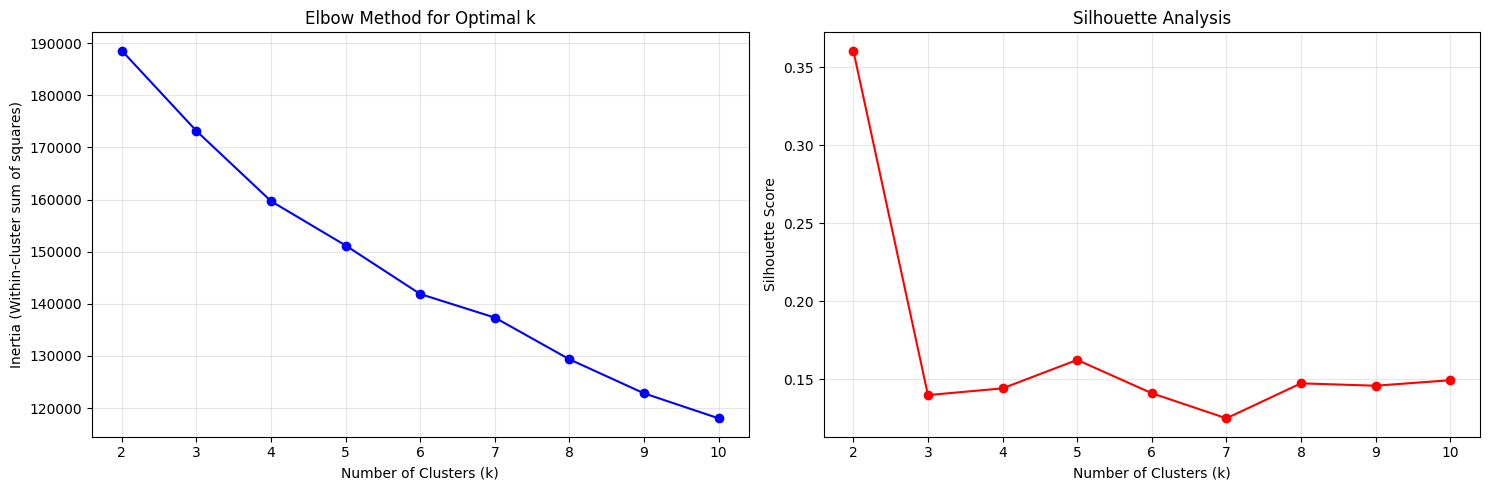


Optimal k based on silhouette score: 2 (score: 0.361)

=== FITTING K-MEANS WITH k=2 ===

=== CLUSTER DISTRIBUTION ===
Cluster 0: 534 sessions (8.2%)
Cluster 1: 5971 sessions (91.8%)

=== CLUSTER PROFILING ===
Cluster profiles (mean values):

--- CLUSTER 0 ---
session_duration_s: 3250.092
total_events: 165.678
events_per_second: 1.826
TOUCH_START_count: 57.369
SCROLL_count: 21.646
scroll_speed: 740.689
touch_event_ratio: 0.315
scroll_event_ratio: 0.132
event_diversity: 0.113
user_agent_entropy: 4.807

--- CLUSTER 1 ---
session_duration_s: 3098.055
total_events: 255.41
events_per_second: 2.027
TOUCH_START_count: 73.293
SCROLL_count: 27.952
scroll_speed: 406.78
touch_event_ratio: 0.276
scroll_event_ratio: 0.124
event_diversity: 0.094
user_agent_entropy: 4.81

=== CLUSTER VISUALIZATION ===


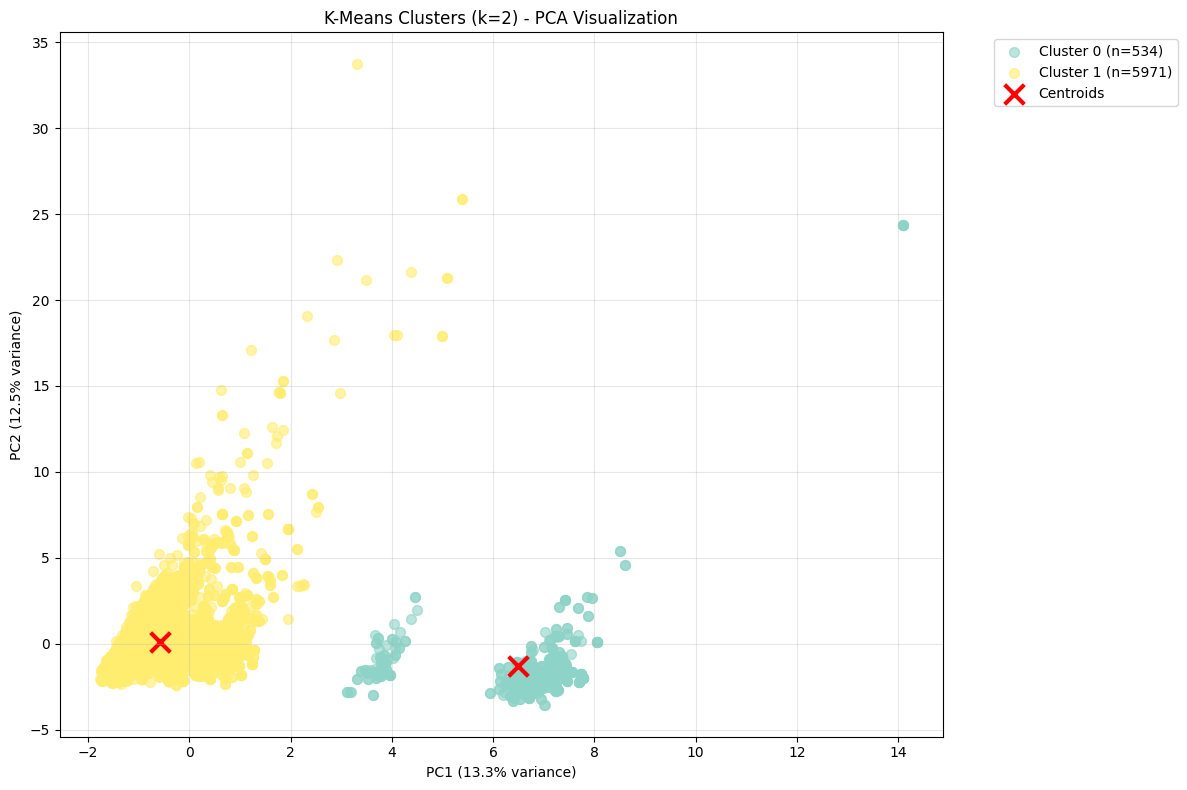

PCA explains 25.7% of total variance

=== DETAILED CLUSTER CHARACTERISTICS ===

Bot detection rates by cluster (LOF):
         total_sessions  bot_count  bot_rate
cluster                                     
0                   534         17     0.032
1                  5971        309     0.052

Device type distribution by cluster:
device_type  Desktop  Mobile  Tablet
cluster                             
0                7.9    92.1     0.0
1               23.2    76.6     0.3

Browser distribution by cluster:
browser  Chrome  Firefox  Other  Safari
cluster                                
0          52.4      2.2    1.7    43.6
1          59.5      2.4    4.1    34.0

Time patterns by cluster:
         is_weekend  is_business_hours  is_night_time
cluster                                              
0              83.5               50.4            9.4
1               0.0               55.3            9.1

=== MINIBATCH K-MEANS COMPARISON ===
Agreement between K-Means and MiniBatch K

In [56]:

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("=== K-MEANS CLUSTERING ANALYSIS ===")

# Prepare features for clustering (exclude ID columns and target variables)
clustering_features = [col for col in df_lof.columns if col not in [
    'tcid', 'tbid', 'created_at', 'user_agent', 'duration_category',
    'is_bot_lof', 'lof_score', 'is_bot_isolation', 'isolation_score',
    'is_bot_elliptic', 'elliptic_distance'
]]

# Handle categorical variables
df_clustering = df_lof.copy()

# One-hot encode categorical columns
categorical_cols = ['browser', 'os', 'device_type', 'browser_version']
for col in categorical_cols:
    if col in df_clustering.columns:
        dummies = pd.get_dummies(df_clustering[col], prefix=col, drop_first=True)
        df_clustering = pd.concat([df_clustering, dummies], axis=1)
        clustering_features.extend(dummies.columns.tolist())
        clustering_features.remove(col)

# Select final feature set
X_cluster = df_clustering[clustering_features].copy()

# Handle any remaining non-numeric columns
X_cluster = X_cluster.select_dtypes(include=[np.number])

print(f"Features for clustering: {X_cluster.shape[1]}")
print(f"Samples: {X_cluster.shape[0]}")

# Scale features for clustering
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# ============================================================================
# DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ============================================================================

print("\n=== DETERMINING OPTIMAL NUMBER OF CLUSTERS ===")

# Test different numbers of clusters
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("Testing k values...")
for k in k_range:
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_cluster_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_cluster_scaled, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"k={k}: Inertia={inertia:.0f}, Silhouette={sil_score:.3f}")

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Silhouette plot
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)
print(f"\nOptimal k based on silhouette score: {optimal_k} (score: {best_silhouette:.3f})")

# ============================================================================
# FIT FINAL K-MEANS MODEL
# ============================================================================

print(f"\n=== FITTING K-MEANS WITH k={optimal_k} ===")

# Fit final model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Add cluster labels to dataframe
df_lof['cluster'] = cluster_labels

# Cluster statistics
print(f"\n=== CLUSTER DISTRIBUTION ===")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} sessions ({percentage:.1f}%)")

# ============================================================================
# CLUSTER PROFILING
# ============================================================================

print(f"\n=== CLUSTER PROFILING ===")

# Key behavioral features for profiling
profile_features = [
    'session_duration_s', 'total_events', 'events_per_second',
    'TOUCH_START_count', 'SCROLL_count', 'scroll_speed',
    'touch_event_ratio', 'scroll_event_ratio', 'event_diversity',
    'user_agent_entropy'
]

# Calculate cluster means
cluster_profiles = df_lof.groupby('cluster')[profile_features].agg(['mean', 'median', 'std']).round(3)

print("Cluster profiles (mean values):")
for cluster_id in range(optimal_k):
    print(f"\n--- CLUSTER {cluster_id} ---")
    cluster_data = cluster_profiles.loc[cluster_id]
    for feature in profile_features:
        if feature in df_lof.columns:
            mean_val = cluster_data[(feature, 'mean')]
            print(f"{feature}: {mean_val}")

# ============================================================================
# VISUALIZE CLUSTERS
# ============================================================================

print(f"\n=== CLUSTER VISUALIZATION ===")

# Use PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

# Create cluster visualization
plt.figure(figsize=(12, 8))

# Plot clusters
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    mask = cluster_labels == i
    cluster_size = mask.sum()
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=[colors[i]], label=f'Cluster {i} (n={cluster_size})',
               alpha=0.6, s=50)

# Plot cluster centers in PCA space
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title(f'K-Means Clusters (k={optimal_k}) - PCA Visualization')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"PCA explains {pca.explained_variance_ratio_.sum():.1%} of total variance")

# ============================================================================
# CLUSTER CHARACTERISTICS ANALYSIS
# ============================================================================

print(f"\n=== DETAILED CLUSTER CHARACTERISTICS ===")

# Analyze bot detection results by cluster
if 'is_bot_lof' in df_lof.columns:
    print("\nBot detection rates by cluster (LOF):")
    bot_by_cluster = df_lof.groupby('cluster')['is_bot_lof'].agg(['count', 'sum', 'mean']).round(3)
    bot_by_cluster.columns = ['total_sessions', 'bot_count', 'bot_rate']
    print(bot_by_cluster)

# Device/browser distribution by cluster
print("\nDevice type distribution by cluster:")
device_dist = pd.crosstab(df_lof['cluster'], df_lof['device_type'], normalize='index') * 100
print(device_dist.round(1))

print("\nBrowser distribution by cluster:")
browser_dist = pd.crosstab(df_lof['cluster'], df_lof['browser'], normalize='index') * 100
print(browser_dist.round(1))

# Time-based patterns
print("\nTime patterns by cluster:")
time_patterns = df_lof.groupby('cluster')[['is_weekend', 'is_business_hours', 'is_night_time']].mean() * 100
print(time_patterns.round(1))

# ============================================================================
# MINIBATCH K-MEANS FOR LARGE DATASETS
# ============================================================================

print(f"\n=== MINIBATCH K-MEANS COMPARISON ===")

# Fit MiniBatch K-Means for comparison
minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=1000)
minibatch_labels = minibatch_kmeans.fit_predict(X_cluster_scaled)

# Compare results
agreement = (cluster_labels == minibatch_labels).mean()
print(f"Agreement between K-Means and MiniBatch K-Means: {agreement:.3f}")

# Add MiniBatch results
df_lof['cluster_minibatch'] = minibatch_labels

print(f"\nMiniBatch cluster distribution:")
minibatch_counts = pd.Series(minibatch_labels).value_counts().sort_index()
for cluster_id, count in minibatch_counts.items():
    percentage = (count / len(minibatch_labels)) * 100
    print(f"Cluster {cluster_id}: {count} sessions ({percentage:.1f}%)")


### DBSCAN / HDBSCAN


=== DBSCAN CLUSTERING ===
K-distance statistics (k=5):
Min distance: 0.0000
Max distance: 73.9066
Mean distance: 1.9243
Median distance: 1.5992
95th percentile: 4.0336


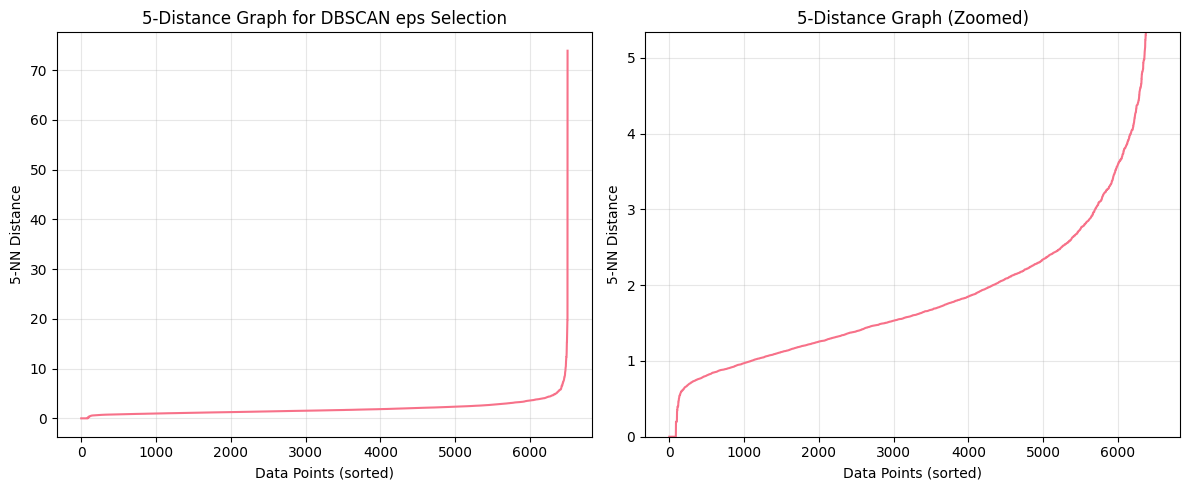


Eps candidates to test: [np.float64(3.2626), np.float64(4.0336), np.float64(1.9243), np.float64(3.5573)]
eps=3.2626: 32 clusters, 512 noise points (7.9%)
eps=4.0336: 15 clusters, 244 noise points (3.8%)
eps=1.9243: 94 clusters, 1947 noise points (29.9%)
eps=3.5573: 24 clusters, 389 noise points (6.0%)

Selected eps: 3.5573
Final DBSCAN results: 24 clusters, 389 noise points (6.0%)

DBSCAN cluster distribution:
Noise: 389 sessions (6.0%)
Cluster 0: 5215 sessions (80.2%)
Cluster 1: 66 sessions (1.0%)
Cluster 2: 305 sessions (4.7%)
Cluster 3: 320 sessions (4.9%)
Cluster 4: 54 sessions (0.8%)
Cluster 5: 26 sessions (0.4%)
Cluster 6: 5 sessions (0.1%)
Cluster 7: 5 sessions (0.1%)
Cluster 8: 7 sessions (0.1%)
Cluster 9: 14 sessions (0.2%)
Cluster 10: 7 sessions (0.1%)
Cluster 11: 7 sessions (0.1%)
Cluster 12: 7 sessions (0.1%)
Cluster 13: 9 sessions (0.1%)
Cluster 14: 6 sessions (0.1%)
Cluster 15: 6 sessions (0.1%)
Cluster 16: 12 sessions (0.2%)
Cluster 17: 10 sessions (0.2%)
Cluster 18: 8 

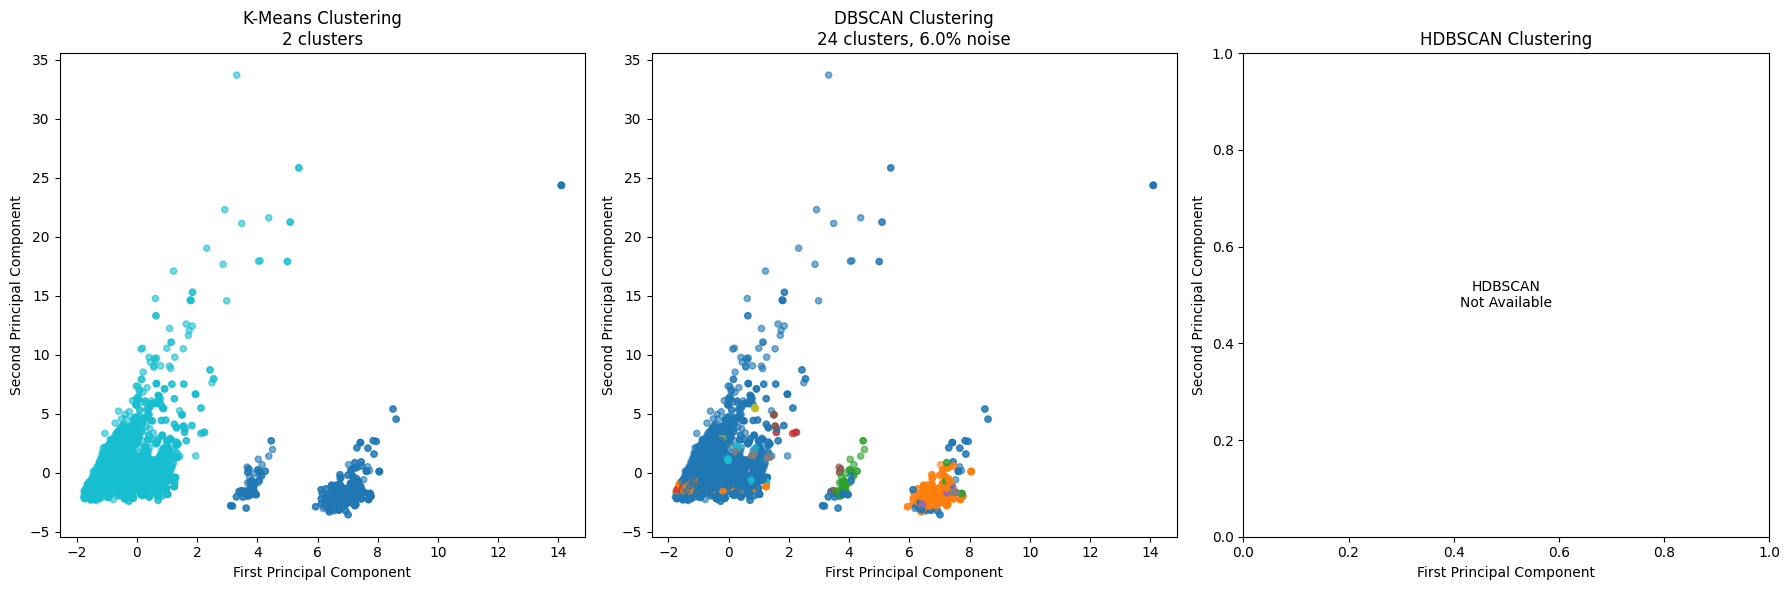


=== DBSCAN NOISE/OUTLIER ANALYSIS ===
Noise sessions characteristics:
Average session duration: 19953.5s
Average total events: 955.0
Average events per second: 7.158

Regular sessions characteristics:
Average session duration: 2039.3s
Average total events: 203.1
Average events per second: 1.683

Noise vs Regular sessions comparison:
session_duration_s: Noise=19953.456, Regular=2039.265
total_events: Noise=954.967, Regular=203.081
events_per_second: Noise=7.158, Regular=1.683
scroll_speed: Noise=1873.336, Regular=342.656
touch_event_ratio: Noise=0.238, Regular=0.282
event_diversity: Noise=0.139, Regular=0.093


In [57]:
# ============================================================================
# DBSCAN CLUSTERING
# ============================================================================

print(f"\n=== DBSCAN CLUSTERING ===")

# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use the same scaled features as before
X_dbscan = X_cluster_scaled.copy()

# Find optimal eps using k-distance graph (k=5 is common for DBSCAN)
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X_dbscan)
distances, indices = nbrs.kneighbors(X_dbscan)

# Sort distances to find the "elbow" point
distances = np.sort(distances[:, k-1], axis=0)

print(f"K-distance statistics (k={k}):")
print(f"Min distance: {distances.min():.4f}")
print(f"Max distance: {distances.max():.4f}")
print(f"Mean distance: {distances.mean():.4f}")
print(f"Median distance: {np.median(distances):.4f}")
print(f"95th percentile: {np.percentile(distances, 95):.4f}")

# Plot k-distance graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(distances)
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}-NN Distance')
plt.title(f'{k}-Distance Graph for DBSCAN eps Selection')
plt.grid(True, alpha=0.3)

# Zoom in on the "elbow" region
plt.subplot(1, 2, 2)
plt.plot(distances)
plt.xlabel('Data Points (sorted)')
plt.ylabel(f'{k}-NN Distance')
plt.title(f'{k}-Distance Graph (Zoomed)')
plt.ylim(0, np.percentile(distances, 98))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Try different eps values based on the k-distance analysis
eps_candidates = [
    np.percentile(distances, 90),
    np.percentile(distances, 95),
    distances.mean(),
    distances.mean() + distances.std()
]

print(f"\nEps candidates to test: {[round(eps, 4) for eps in eps_candidates]}")

# Test different eps values
dbscan_results = []

for eps in eps_candidates:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_dbscan)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    
    dbscan_results.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'noise_ratio': noise_ratio,
        'labels': labels
    })
    
    print(f"eps={eps:.4f}: {n_clusters} clusters, {n_noise} noise points ({noise_ratio:.1%})")

# Select best eps (balance between clusters and noise)
# Prefer eps that gives reasonable number of clusters with moderate noise
best_result = min(dbscan_results, key=lambda x: abs(x['noise_ratio'] - 0.05))  # Target ~5% noise
best_eps = best_result['eps']
best_labels = best_result['labels']

print(f"\nSelected eps: {best_eps:.4f}")
print(f"Final DBSCAN results: {best_result['n_clusters']} clusters, {best_result['n_noise']} noise points ({best_result['noise_ratio']:.1%})")

# Add DBSCAN results to dataframe
df_lof['cluster_dbscan'] = best_labels
df_lof['is_noise_dbscan'] = (best_labels == -1)

# Analyze DBSCAN clusters
print(f"\nDBSCAN cluster distribution:")
cluster_counts = pd.Series(best_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(best_labels)) * 100
    if cluster_id == -1:
        print(f"Noise: {count} sessions ({percentage:.1f}%)")
    else:
        print(f"Cluster {cluster_id}: {count} sessions ({percentage:.1f}%)")

# ============================================================================
# HDBSCAN CLUSTERING
# ============================================================================

print(f"\n=== HDBSCAN CLUSTERING ===")

try:
    import hdbscan
    
    # Fit HDBSCAN
    hdbscan_clusterer = hdbscan.HDBSCAN(
        min_cluster_size=50,  # Minimum cluster size
        min_samples=10,       # Minimum samples in neighborhood
        metric='euclidean'
    )
    
    hdbscan_labels = hdbscan_clusterer.fit_predict(X_dbscan)
    
    # HDBSCAN results
    n_clusters_hdb = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
    n_noise_hdb = list(hdbscan_labels).count(-1)
    noise_ratio_hdb = n_noise_hdb / len(hdbscan_labels)
    
    print(f"HDBSCAN results: {n_clusters_hdb} clusters, {n_noise_hdb} noise points ({noise_ratio_hdb:.1%})")
    
    # Add to dataframe
    df_lof['cluster_hdbscan'] = hdbscan_labels
    df_lof['is_noise_hdbscan'] = (hdbscan_labels == -1)
    
    # HDBSCAN cluster distribution
    print(f"\nHDBSCAN cluster distribution:")
    hdb_cluster_counts = pd.Series(hdbscan_labels).value_counts().sort_index()
    for cluster_id, count in hdb_cluster_counts.items():
        percentage = (count / len(hdbscan_labels)) * 100
        if cluster_id == -1:
            print(f"Noise: {count} sessions ({percentage:.1f}%)")
        else:
            print(f"Cluster {cluster_id}: {count} sessions ({percentage:.1f}%)")
    
    # Plot cluster stability (if available)
    if hasattr(hdbscan_clusterer, 'cluster_persistence_'):
        print(f"\nCluster persistence scores:")
        for i, persistence in enumerate(hdbscan_clusterer.cluster_persistence_):
            print(f"Cluster {i}: {persistence:.3f}")

except ImportError:
    print("HDBSCAN not available. Install with: pip install hdbscan")
    hdbscan_labels = None

# ============================================================================
# COMPARE CLUSTERING METHODS
# ============================================================================

print(f"\n=== CLUSTERING METHOD COMPARISON ===")

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'method': ['K-Means', 'DBSCAN', 'HDBSCAN'],
    'n_clusters': [
        len(np.unique(cluster_labels)),
        best_result['n_clusters'],
        n_clusters_hdb if hdbscan_labels is not None else None
    ],
    'noise_points': [
        0,  # K-Means doesn't identify noise
        best_result['n_noise'],
        n_noise_hdb if hdbscan_labels is not None else None
    ],
    'noise_ratio': [
        0.0,
        best_result['noise_ratio'],
        noise_ratio_hdb if hdbscan_labels is not None else None
    ]
})

print(comparison_df.round(3))

# Visualize clustering results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Use PCA for visualization
from sklearn.decomposition import PCA
pca_viz = PCA(n_components=2, random_state=42)
X_pca = pca_viz.fit_transform(X_dbscan)

# K-Means
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', alpha=0.6, s=20)
axes[0].set_title(f'K-Means Clustering\n{len(np.unique(cluster_labels))} clusters')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')

# DBSCAN
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='tab10', alpha=0.6, s=20)
axes[1].set_title(f'DBSCAN Clustering\n{best_result["n_clusters"]} clusters, {best_result["noise_ratio"]:.1%} noise')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')

# HDBSCAN
if hdbscan_labels is not None:
    scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=hdbscan_labels, cmap='tab10', alpha=0.6, s=20)
    axes[2].set_title(f'HDBSCAN Clustering\n{n_clusters_hdb} clusters, {noise_ratio_hdb:.1%} noise')
else:
    axes[2].text(0.5, 0.5, 'HDBSCAN\nNot Available', ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('HDBSCAN Clustering')

axes[2].set_xlabel('First Principal Component')
axes[2].set_ylabel('Second Principal Component')

plt.tight_layout()
plt.show()

# Analyze outliers/noise from density-based methods
if best_result['n_noise'] > 0:
    print(f"\n=== DBSCAN NOISE/OUTLIER ANALYSIS ===")
    
    noise_sessions = df_lof[df_lof['is_noise_dbscan'] == True]
    regular_sessions = df_lof[df_lof['is_noise_dbscan'] == False]
    
    print(f"Noise sessions characteristics:")
    print(f"Average session duration: {noise_sessions['session_duration_s'].mean():.1f}s")
    print(f"Average total events: {noise_sessions['total_events'].mean():.1f}")
    print(f"Average events per second: {noise_sessions['events_per_second'].mean():.3f}")
    
    print(f"\nRegular sessions characteristics:")
    print(f"Average session duration: {regular_sessions['session_duration_s'].mean():.1f}s")
    print(f"Average total events: {regular_sessions['total_events'].mean():.1f}")
    print(f"Average events per second: {regular_sessions['events_per_second'].mean():.3f}")
    
    # Compare key metrics
    comparison_metrics = ['session_duration_s', 'total_events', 'events_per_second', 
                         'scroll_speed', 'touch_event_ratio', 'event_diversity']
    
    print(f"\nNoise vs Regular sessions comparison:")
    for metric in comparison_metrics:
        noise_mean = noise_sessions[metric].mean()
        regular_mean = regular_sessions[metric].mean()
        print(f"{metric}: Noise={noise_mean:.3f}, Regular={regular_mean:.3f}")


### Gaussian Mixture Models (GMM)


=== GAUSSIAN MIXTURE MODELS (GMM) ===

Testing different numbers of components...
Components:  2 | AIC: 128878.0 | BIC: 129481.5 | Silhouette:  0.900 | Log-likelihood:     -9.9
Components:  3 | AIC:   5987.8 | BIC:   6896.3 | Silhouette:  0.265 | Log-likelihood:     -0.4
Components:  4 | AIC:  -6587.9 | BIC:  -5374.3 | Silhouette:  0.247 | Log-likelihood:      0.5
Components:  5 | AIC: -24069.1 | BIC: -22550.3 | Silhouette:  0.205 | Log-likelihood:      1.9
Components:  6 | AIC: -40503.1 | BIC: -38679.2 | Silhouette:  0.075 | Log-likelihood:      3.2
Components:  7 | AIC: -35040.4 | BIC: -32911.4 | Silhouette:  0.178 | Log-likelihood:      2.7
Components:  8 | AIC: -59269.0 | BIC: -56834.9 | Silhouette:  0.089 | Log-likelihood:      4.6
Components:  9 | AIC: -60922.8 | BIC: -58183.6 | Silhouette:  0.095 | Log-likelihood:      4.7
Components: 10 | AIC: -73880.1 | BIC: -70835.8 | Silhouette:  0.120 | Log-likelihood:      5.7

Optimal number of components:
By AIC: 10
By BIC: 10
By Silhoue

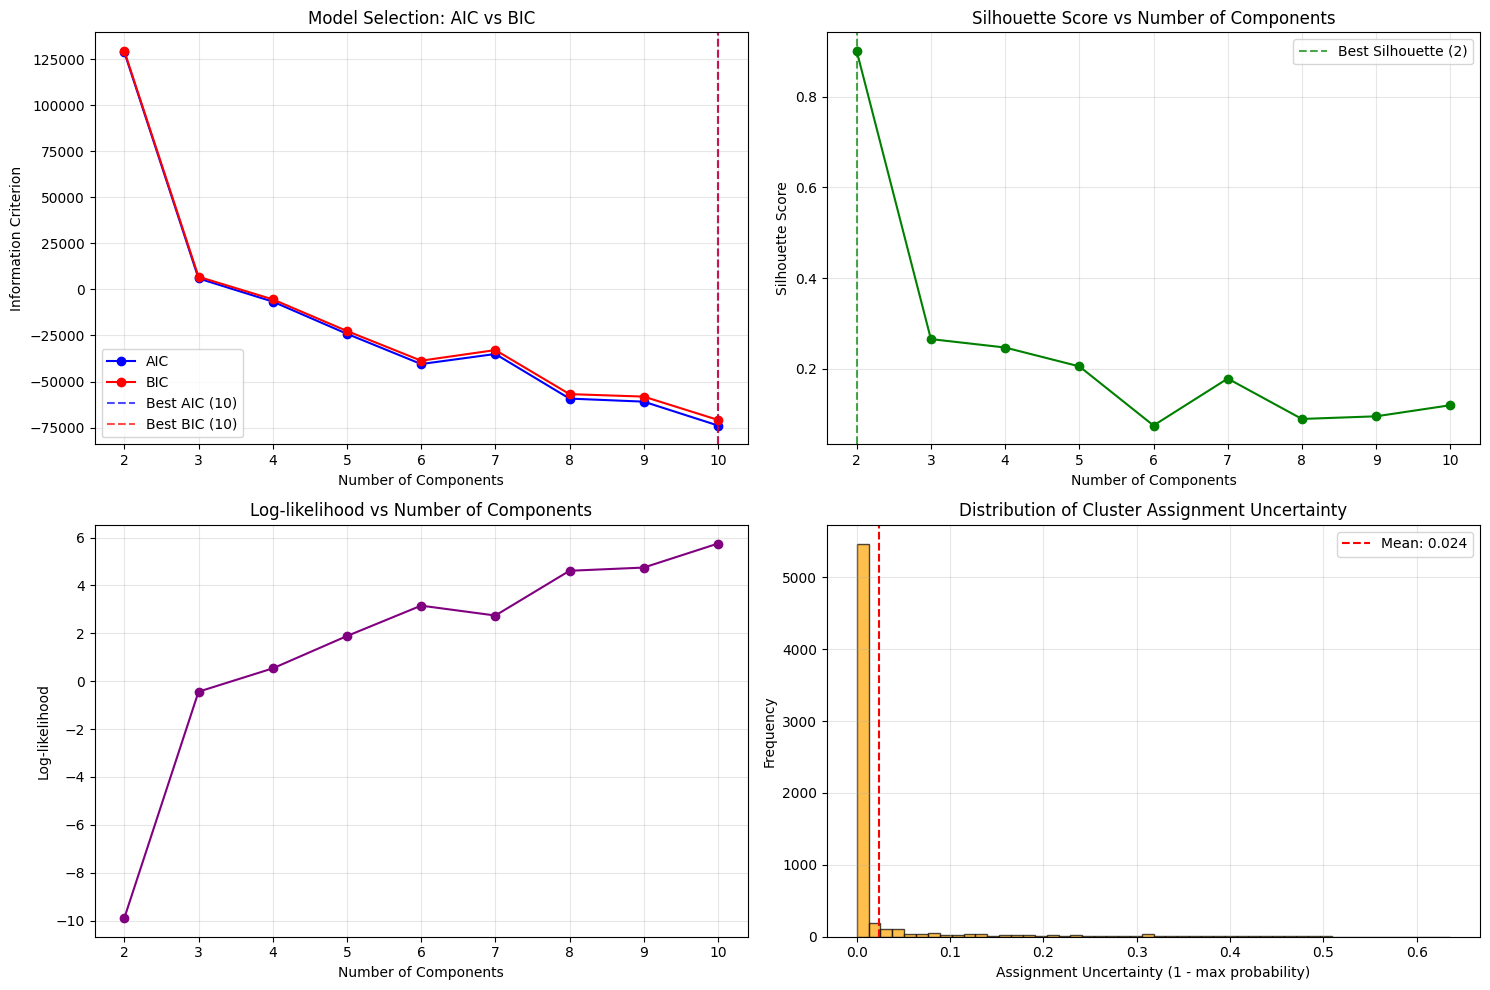

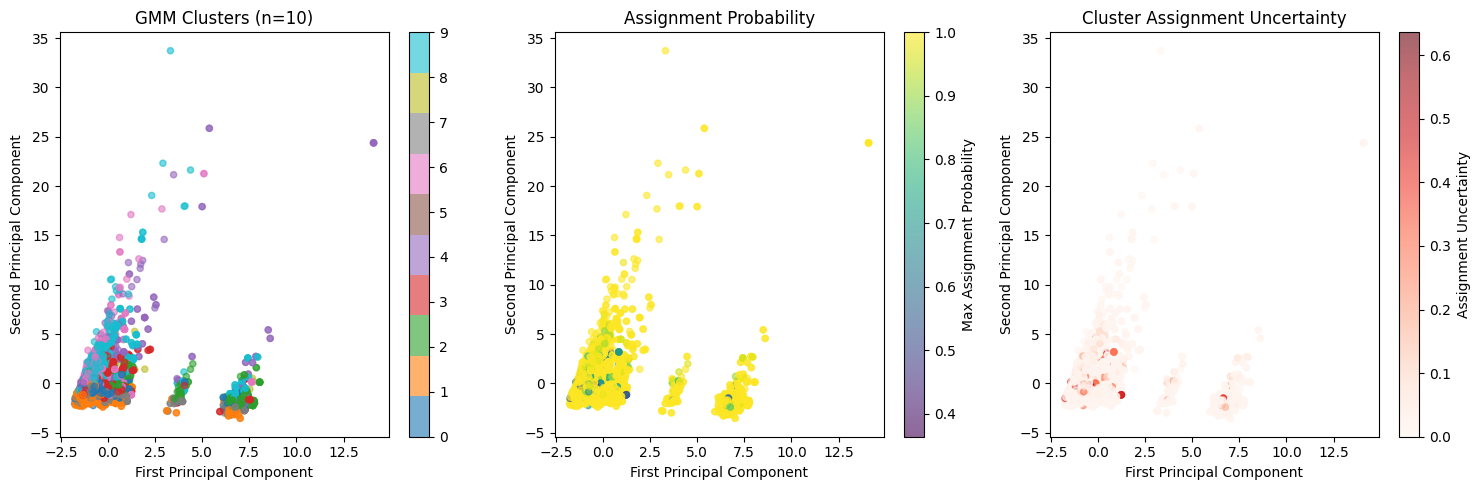


=== HIGH UNCERTAINTY SESSIONS ANALYSIS ===
Uncertainty threshold (95th percentile): 0.182
Number of highly uncertain sessions: 326
Percentage of total: 5.0%

Characteristics of uncertain sessions:
Average session duration: 1176.9s
Average total events: 207.4
Average events per second: 1.445
Average touch event ratio: 0.291
Average event diversity: 0.054

Comparison with regular sessions:
Regular - Session duration: 3212.6s
Regular - Total events: 250.2
Regular - Events per second: 2.040
Regular - Touch event ratio: 0.279
Regular - Event diversity: 0.097


In [58]:
# Gaussian Mixture Models for soft clustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

print("=== GAUSSIAN MIXTURE MODELS (GMM) ===\n")

# Select features for GMM (same as clustering analysis)
gmm_features = ['session_duration_s', 'total_events', 'events_per_second', 
                'scroll_speed', 'touch_event_ratio', 'event_diversity',
                'user_agent_entropy', 'scroll_to_touch_ratio']

X_gmm = df_lof[gmm_features].copy()

# Handle any remaining inf/nan values
X_gmm = X_gmm.replace([np.inf, -np.inf], np.nan)
X_gmm = X_gmm.fillna(X_gmm.median())

# Scale the features
scaler_gmm = StandardScaler()
X_gmm_scaled = scaler_gmm.fit_transform(X_gmm)

# Test different numbers of components
n_components_range = range(2, 11)
aic_scores = []
bic_scores = []
silhouette_scores = []
log_likelihoods = []

print("Testing different numbers of components...")
for n_components in n_components_range:
    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42, 
                         covariance_type='full', max_iter=100)
    gmm.fit(X_gmm_scaled)
    
    # Get cluster assignments (hard clustering)
    labels = gmm.predict(X_gmm_scaled)
    
    # Calculate metrics
    aic = gmm.aic(X_gmm_scaled)
    bic = gmm.bic(X_gmm_scaled)
    log_likelihood = gmm.score(X_gmm_scaled)
    
    # Silhouette score (only if more than 1 cluster and not all same label)
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X_gmm_scaled, labels)
    else:
        silhouette = -1
    
    aic_scores.append(aic)
    bic_scores.append(bic)
    silhouette_scores.append(silhouette)
    log_likelihoods.append(log_likelihood)
    
    print(f"Components: {n_components:2d} | AIC: {aic:8.1f} | BIC: {bic:8.1f} | "
          f"Silhouette: {silhouette:6.3f} | Log-likelihood: {log_likelihood:8.1f}")

# Find optimal number of components
optimal_n_aic = n_components_range[np.argmin(aic_scores)]
optimal_n_bic = n_components_range[np.argmin(bic_scores)]
optimal_n_sil = n_components_range[np.argmax(silhouette_scores)]

print(f"\nOptimal number of components:")
print(f"By AIC: {optimal_n_aic}")
print(f"By BIC: {optimal_n_bic}")
print(f"By Silhouette: {optimal_n_sil}")

# Use BIC as primary criterion (penalizes complexity more)
optimal_n_components = optimal_n_bic

# Fit final GMM model
print(f"\nFitting final GMM with {optimal_n_components} components...")
final_gmm = GaussianMixture(n_components=optimal_n_components, random_state=42,
                           covariance_type='full', max_iter=200)
final_gmm.fit(X_gmm_scaled)

# Get predictions and probabilities
gmm_labels = final_gmm.predict(X_gmm_scaled)
gmm_probs = final_gmm.predict_proba(X_gmm_scaled)

# Add to dataframe
df_lof['gmm_cluster'] = gmm_labels
df_lof['gmm_max_prob'] = np.max(gmm_probs, axis=1)
df_lof['gmm_uncertainty'] = 1 - df_lof['gmm_max_prob']  # Uncertainty measure

# Analyze clusters
print(f"\n=== GMM CLUSTER ANALYSIS ===")
for cluster in range(optimal_n_components):
    cluster_data = df_lof[df_lof['gmm_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = cluster_size / len(df_lof) * 100
    avg_prob = cluster_data['gmm_max_prob'].mean()
    avg_uncertainty = cluster_data['gmm_uncertainty'].mean()
    
    print(f"\nCluster {cluster} ({cluster_size} sessions, {cluster_pct:.1f}%):")
    print(f"  Average assignment probability: {avg_prob:.3f}")
    print(f"  Average uncertainty: {avg_uncertainty:.3f}")
    print(f"  Session duration: {cluster_data['session_duration_s'].mean():.1f}s")
    print(f"  Total events: {cluster_data['total_events'].mean():.1f}")
    print(f"  Events per second: {cluster_data['events_per_second'].mean():.3f}")
    print(f"  Touch event ratio: {cluster_data['touch_event_ratio'].mean():.3f}")
    print(f"  Event diversity: {cluster_data['event_diversity'].mean():.3f}")

# Visualize model selection metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# AIC and BIC
axes[0, 0].plot(n_components_range, aic_scores, 'o-', label='AIC', color='blue')
axes[0, 0].plot(n_components_range, bic_scores, 'o-', label='BIC', color='red')
axes[0, 0].axvline(optimal_n_aic, color='blue', linestyle='--', alpha=0.7, label=f'Best AIC ({optimal_n_aic})')
axes[0, 0].axvline(optimal_n_bic, color='red', linestyle='--', alpha=0.7, label=f'Best BIC ({optimal_n_bic})')
axes[0, 0].set_xlabel('Number of Components')
axes[0, 0].set_ylabel('Information Criterion')
axes[0, 0].set_title('Model Selection: AIC vs BIC')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Silhouette score
axes[0, 1].plot(n_components_range, silhouette_scores, 'o-', color='green')
axes[0, 1].axvline(optimal_n_sil, color='green', linestyle='--', alpha=0.7, label=f'Best Silhouette ({optimal_n_sil})')
axes[0, 1].set_xlabel('Number of Components')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs Number of Components')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Log-likelihood
axes[1, 0].plot(n_components_range, log_likelihoods, 'o-', color='purple')
axes[1, 0].set_xlabel('Number of Components')
axes[1, 0].set_ylabel('Log-likelihood')
axes[1, 0].set_title('Log-likelihood vs Number of Components')
axes[1, 0].grid(True, alpha=0.3)

# Cluster uncertainty distribution
axes[1, 1].hist(df_lof['gmm_uncertainty'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].axvline(df_lof['gmm_uncertainty'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df_lof["gmm_uncertainty"].mean():.3f}')
axes[1, 1].set_xlabel('Assignment Uncertainty (1 - max probability)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Cluster Assignment Uncertainty')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize clusters in PCA space
plt.figure(figsize=(15, 5))

# Plot 1: Clusters colored by assignment
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='tab10', alpha=0.6, s=20)
plt.colorbar(scatter)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'GMM Clusters (n={optimal_n_components})')

# Plot 2: Colored by assignment probability
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_lof['gmm_max_prob'], 
                     cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter, label='Max Assignment Probability')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Assignment Probability')

# Plot 3: Colored by uncertainty
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_lof['gmm_uncertainty'], 
                     cmap='Reds', alpha=0.6, s=20)
plt.colorbar(scatter, label='Assignment Uncertainty')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Assignment Uncertainty')

plt.tight_layout()
plt.show()

# Identify uncertain/anomalous sessions
uncertainty_threshold = np.percentile(df_lof['gmm_uncertainty'], 95)
uncertain_sessions = df_lof[df_lof['gmm_uncertainty'] > uncertainty_threshold]

print(f"\n=== HIGH UNCERTAINTY SESSIONS ANALYSIS ===")
print(f"Uncertainty threshold (95th percentile): {uncertainty_threshold:.3f}")
print(f"Number of highly uncertain sessions: {len(uncertain_sessions)}")
print(f"Percentage of total: {len(uncertain_sessions)/len(df_lof)*100:.1f}%")

if len(uncertain_sessions) > 0:
    print(f"\nCharacteristics of uncertain sessions:")
    print(f"Average session duration: {uncertain_sessions['session_duration_s'].mean():.1f}s")
    print(f"Average total events: {uncertain_sessions['total_events'].mean():.1f}")
    print(f"Average events per second: {uncertain_sessions['events_per_second'].mean():.3f}")
    print(f"Average touch event ratio: {uncertain_sessions['touch_event_ratio'].mean():.3f}")
    print(f"Average event diversity: {uncertain_sessions['event_diversity'].mean():.3f}")
    
    # Compare with regular sessions
    regular_sessions = df_lof[df_lof['gmm_uncertainty'] <= uncertainty_threshold]
    print(f"\nComparison with regular sessions:")
    print(f"Regular - Session duration: {regular_sessions['session_duration_s'].mean():.1f}s")
    print(f"Regular - Total events: {regular_sessions['total_events'].mean():.1f}")
    print(f"Regular - Events per second: {regular_sessions['events_per_second'].mean():.3f}")
    print(f"Regular - Touch event ratio: {regular_sessions['touch_event_ratio'].mean():.3f}")
    print(f"Regular - Event diversity: {regular_sessions['event_diversity'].mean():.3f}")



### combine features based on TCID's

In [59]:
# Combine features based on TCID's (aggregate session-level data to user-level)
print("=== COMBINING FEATURES BY TCID ===")
print(f"Original dataset shape: {df_lof.shape}")
print(f"Number of unique TCIDs: {df_lof['tcid'].nunique()}")

# Define aggregation functions for different types of features
numeric_features = [
    'total_events', 'session_duration_s', 'total_scroll_depth', 'max_scroll_depth',
    'TOUCH_START_count', 'SCROLL_count', 'RESIZE_count', 'VISIBILITY_CHANGE_count',
    'user_agent_length', 'events_per_second', 'scroll_speed', 'scroll_to_touch_ratio',
    'touch_event_ratio', 'scroll_event_ratio', 'event_diversity', 'user_agent_entropy',
    'session_duration_zscore'
]

binary_features = [
    'is_high_freq_tbid', 'is_weekend', 'is_business_hours', 'is_night_time', 'is_peak_hours',
    'has_bot_keywords', 'is_empty_ua', 'is_short_ua', 'is_long_ua', 'is_common_ua',
    'is_mobile_os', 'risk_score', 'no_scroll_but_events', 'short_duration_high_events'
]

categorical_features = ['browser', 'os', 'device_type', 'browser_version', 'duration_category']

# Create aggregation dictionary
agg_dict = {}

# For numeric features: use multiple aggregations
for feature in numeric_features:
    agg_dict[feature] = ['mean', 'sum', 'min', 'max', 'std']

# For binary features: use sum (count of True values) and mean (proportion)
for feature in binary_features:
    agg_dict[feature] = ['sum', 'mean']

# For categorical features: use mode (most frequent) and nunique (diversity)
for feature in categorical_features:
    agg_dict[feature] = lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0]

# Additional session-level aggregations
agg_dict.update({
    'tbid': 'nunique',  # Number of unique browser sessions per user
    'created_at': ['min', 'max'],  # First and last session times
    'hour': ['mean', 'std', 'nunique'],  # Time patterns
    'day_of_week': ['mean', 'nunique'],
    'days_since_start': ['min', 'max', 'mean']
})

# Perform aggregation
print("\nAggregating features by TCID...")
df_user_level = df_lof.groupby('tcid').agg(agg_dict)

# Flatten column names
df_user_level.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col 
                        for col in df_user_level.columns.values]

# Reset index to make tcid a column
df_user_level = df_user_level.reset_index()

# Add derived features at user level
print("Creating derived user-level features...")

# Session count per user
df_user_level['session_count'] = df_lof.groupby('tcid').size().values

# Time span between first and last session
df_user_level['user_activity_span_hours'] = (
    (df_user_level['created_at_max'] - df_user_level['created_at_min']).dt.total_seconds() / 3600
)

# Average sessions per day
df_user_level['avg_sessions_per_day'] = df_user_level['session_count'] / (
    df_user_level['user_activity_span_hours'] / 24 + 1
)

# Total user engagement metrics
df_user_level['total_user_time'] = df_user_level['session_duration_s_sum']
df_user_level['total_user_events'] = df_user_level['total_events_sum']
df_user_level['avg_events_per_session'] = (
    df_user_level['total_user_events'] / df_user_level['session_count']
)

# Consistency metrics (low std indicates consistent behavior)
df_user_level['session_duration_consistency'] = (
    1 / (1 + df_user_level['session_duration_s_std'].fillna(0))
)
df_user_level['events_per_second_consistency'] = (
    1 / (1 + df_user_level['events_per_second_std'].fillna(0))
)

# Browser/device diversity (potential bot indicator)
df_user_level['device_switching'] = df_user_level['tbid_nunique'] / df_user_level['session_count']
df_user_level['time_diversity'] = df_user_level['hour_nunique'] / df_user_level['session_count']

# Handle categorical aggregations separately
print("Processing categorical features...")
categorical_agg = df_lof.groupby('tcid')[categorical_features].agg(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0]
)
categorical_agg.columns = [f'{col}_mode' for col in categorical_agg.columns]

# Count unique values for categorical features
categorical_nunique = df_lof.groupby('tcid')[categorical_features].nunique()
categorical_nunique.columns = [f'{col}_nunique' for col in categorical_nunique.columns]

# Merge categorical features
df_user_level = df_user_level.merge(categorical_agg, left_on='tcid', right_index=True, how='left')
df_user_level = df_user_level.merge(categorical_nunique, left_on='tcid', right_index=True, how='left')

# Clean up datetime columns
df_user_level = df_user_level.drop(['created_at_min', 'created_at_max'], axis=1)

print(f"\nUser-level dataset shape: {df_user_level.shape}")
print(f"Number of features: {df_user_level.shape[1] - 1}")  # Excluding tcid

# Display sample of user-level data
print("\n=== USER-LEVEL DATASET SAMPLE ===")
print(df_user_level.head())

# Show feature distribution
print(f"\n=== USER-LEVEL FEATURE SUMMARY ===")
print(f"Users with single session: {(df_user_level['session_count'] == 1).sum()}")
print(f"Users with multiple sessions: {(df_user_level['session_count'] > 1).sum()}")
print(f"Max sessions per user: {df_user_level['session_count'].max()}")
print(f"Average sessions per user: {df_user_level['session_count'].mean():.1f}")

# Identify potential bot characteristics at user level
print(f"\n=== POTENTIAL BOT INDICATORS (USER LEVEL) ===")
high_session_users = df_user_level[df_user_level['session_count'] >= 10]
print(f"Users with 10+ sessions: {len(high_session_users)} ({len(high_session_users)/len(df_user_level)*100:.1f}%)")

if len(high_session_users) > 0:
    print(f"High-session users characteristics:")
    print(f"- Avg device switching rate: {high_session_users['device_switching'].mean():.3f}")
    print(f"- Avg time diversity: {high_session_users['time_diversity'].mean():.3f}")
    print(f"- Avg events per second: {high_session_users['events_per_second_mean'].mean():.3f}")
    print(f"- Avg session duration consistency: {high_session_users['session_duration_consistency'].mean():.3f}")


=== COMBINING FEATURES BY TCID ===
Original dataset shape: (6505, 59)
Number of unique TCIDs: 2586

Aggregating features by TCID...
Creating derived user-level features...
Processing categorical features...

User-level dataset shape: (2586, 148)
Number of features: 147

=== USER-LEVEL DATASET SAMPLE ===
                                   tcid  total_events_mean  total_events_sum  \
0  0000e6c9-aadf-4978-8437-cd41e3436c00              23.00                23   
1  003b0c99-a431-4465-bb4b-946e6cc7fb9a             751.00               751   
2  00792911-9761-4ef4-aa7e-b5b5ac5422e6             105.00               105   
3  00848fa9-f099-474b-8b41-c52a58c243ec              71.25               285   
4  008aa9a9-4403-44f3-b37d-867ce67fee68              18.00                18   

   total_events_min  total_events_max  total_events_std  \
0                23                23               NaN   
1               751               751               NaN   
2               105               105

### Model building after grouping based on TCID

=== PREPARING DATA FOR ANOMALY DETECTION AND CLUSTERING ===
Features for modeling: 137
Data shape: (2586, 137)

=== ANOMALY DETECTION ===

1. Isolation Forest
Isolation Forest detected 259 anomalies (10.0%)

2. One-Class SVM
One-Class SVM detected 258 anomalies (10.0%)

3. Local Outlier Factor
LOF detected 259 anomalies (10.0%)

4. Elliptic Envelope
Elliptic Envelope detected 259 anomalies (10.0%)

Consensus Anomaly Distribution:
anomaly_consensus
0    2071
1     252
2      92
3      85
4      86
Name: count, dtype: int64

=== CLUSTERING ANALYSIS ===

1. Finding optimal number of clusters...


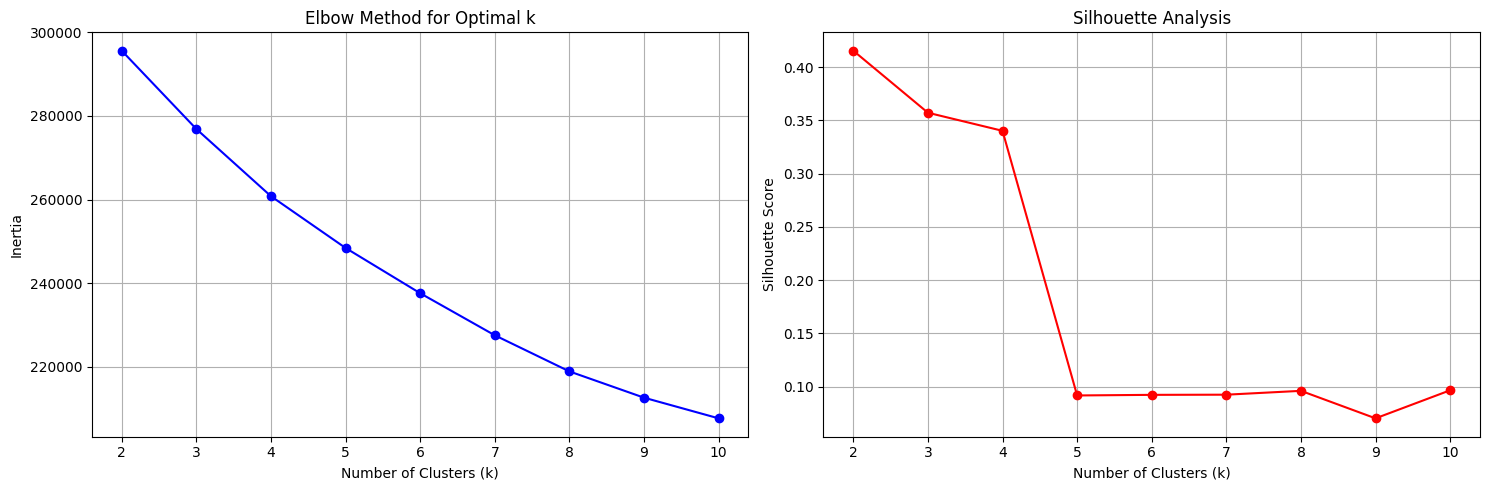

Optimal number of clusters based on silhouette score: 2

2. K-Means Clustering (k=2)
K-Means cluster distribution:
0    2157
1     429
Name: count, dtype: int64
Silhouette Score: 0.416

3. DBSCAN Clustering
eps=1.0: 6 clusters, 2545 noise points, silhouette=0.601
eps=1.5: 19 clusters, 2248 noise points, silhouette=0.365
eps=2.0: 30 clusters, 1885 noise points, silhouette=0.261
Best DBSCAN: eps=1.0, silhouette=0.601
DBSCAN cluster distribution:
-1    2545
 0       5
 1       5
 2       9
 3       7
 4      10
 5       5
Name: count, dtype: int64

4. Gaussian Mixture Model
GMM cluster distribution:
0    1698
1     888
Name: count, dtype: int64
GMM Silhouette Score: 0.229
Average max probability: 1.000

=== ANALYSIS OF RESULTS ===

1. Anomaly Characteristics:

Users flagged as anomalies (consensus >= 2): 263
Anomaly user characteristics vs normal users:
- session_count: Anomaly=7.582, Normal=1.942
- avg_sessions_per_day: Anomaly=3.211, Normal=1.491
- total_user_events: Anomaly=3075.856, N

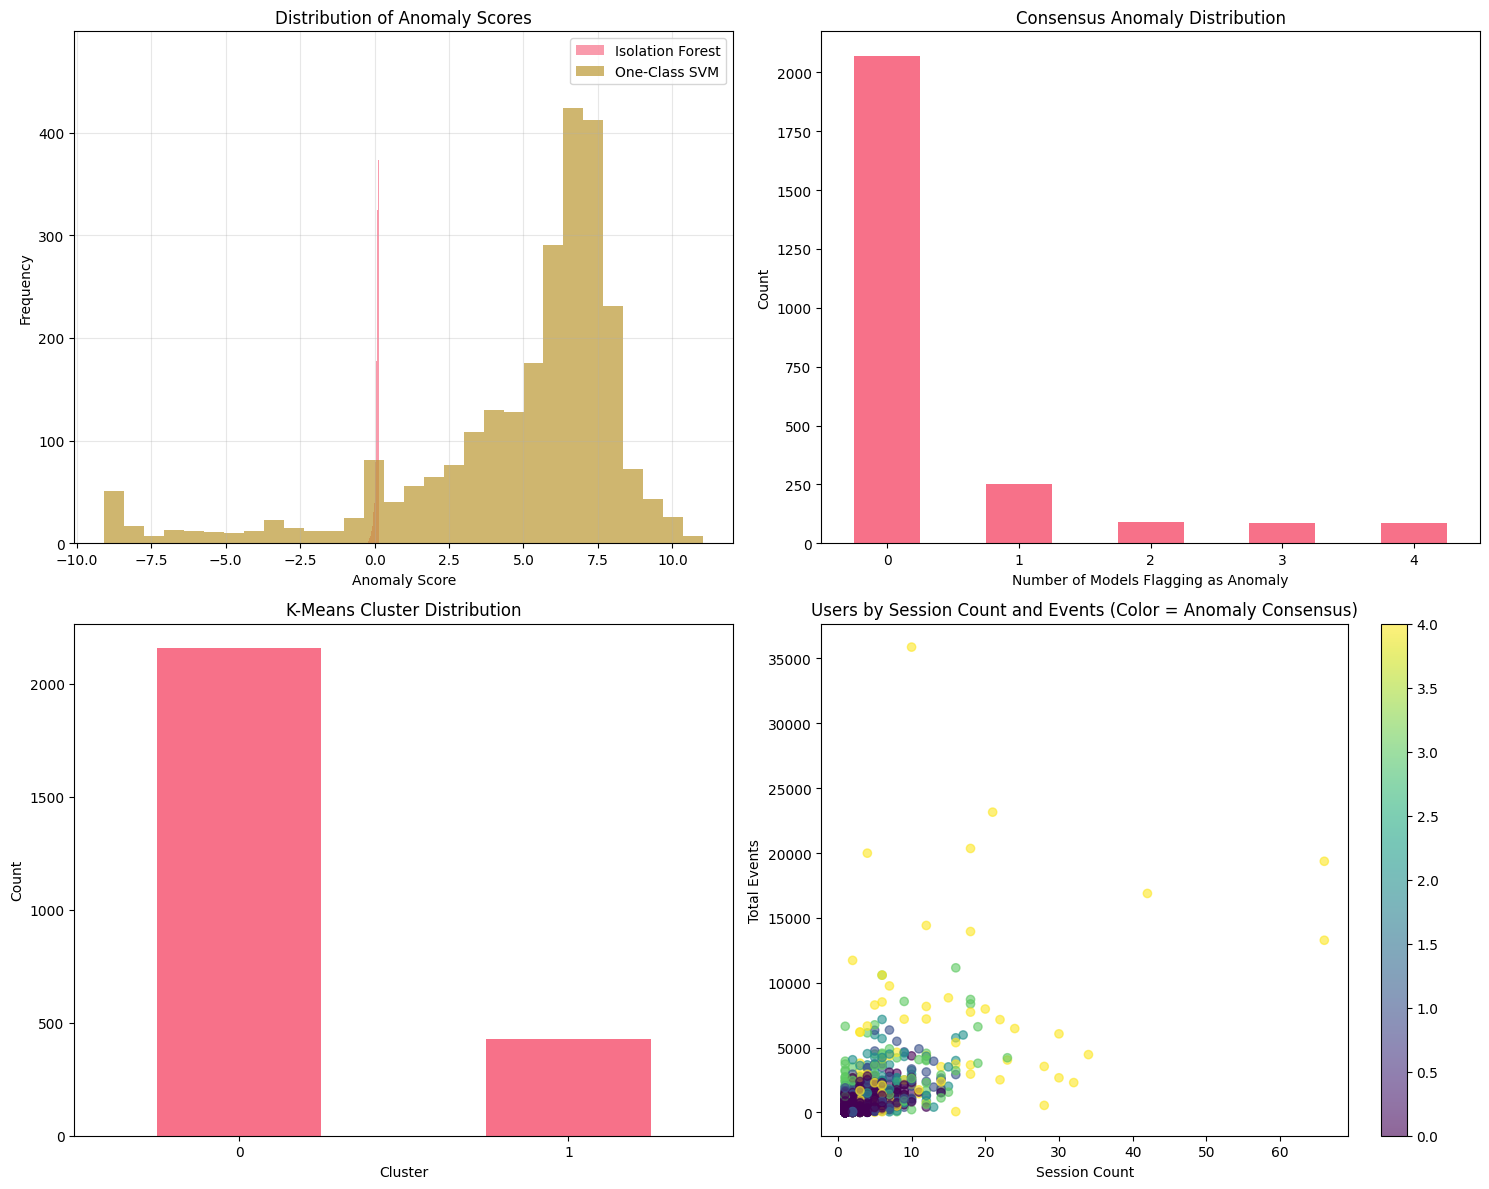


=== SUMMARY ===
Total users analyzed: 2586
Users flagged as potential bots (consensus >= 2): 263 (10.2%)
Number of behavioral clusters identified: 2
Dataset now includes anomaly scores and cluster assignments


In [60]:
# Prepare features for anomaly detection and clustering
print("=== PREPARING DATA FOR ANOMALY DETECTION AND CLUSTERING ===")

# Select numeric features for modeling (exclude tcid and categorical mode columns)
feature_cols = [col for col in df_user_level.columns if col != 'tcid' and not col.endswith('_mode')]
X = df_user_level[feature_cols].copy()

# Handle any remaining missing values - separate numeric and categorical
numeric_cols = X.select_dtypes(include=[np.number]).columns
categorical_cols = X.select_dtypes(exclude=[np.number]).columns

# Fill numeric columns with median
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Fill categorical columns with mode or first value
for col in categorical_cols:
    if col in X.columns:
        mode_val = X[col].mode()
        if len(mode_val) > 0:
            X[col] = X[col].fillna(mode_val.iloc[0])
        else:
            X[col] = X[col].fillna(X[col].iloc[0])

# For modeling, we need only numeric features
X = X[numeric_cols]
feature_cols = list(numeric_cols)

# Scale features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols, index=df_user_level.index)

print(f"Features for modeling: {len(feature_cols)}")
print(f"Data shape: {X_scaled.shape}")

# =============================================================================
# 1. ANOMALY DETECTION
# =============================================================================
print("\n=== ANOMALY DETECTION ===")

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

# 1.1 Isolation Forest
print("\n1. Isolation Forest")
iso_forest = IsolationForest(contamination=0.1, random_state=42, n_estimators=100)
iso_scores = iso_forest.fit_predict(X_scaled)
iso_anomaly_scores = iso_forest.decision_function(X_scaled)

# Add results to dataframe
df_user_level['iso_forest_anomaly'] = iso_scores
df_user_level['iso_forest_score'] = iso_anomaly_scores

anomaly_count_iso = (iso_scores == -1).sum()
print(f"Isolation Forest detected {anomaly_count_iso} anomalies ({anomaly_count_iso/len(df_user_level)*100:.1f}%)")

# 1.2 One-Class SVM
print("\n2. One-Class SVM")
oc_svm = OneClassSVM(gamma='scale', nu=0.1)
svm_scores = oc_svm.fit_predict(X_scaled)
svm_anomaly_scores = oc_svm.decision_function(X_scaled)

df_user_level['svm_anomaly'] = svm_scores
df_user_level['svm_score'] = svm_anomaly_scores

anomaly_count_svm = (svm_scores == -1).sum()
print(f"One-Class SVM detected {anomaly_count_svm} anomalies ({anomaly_count_svm/len(df_user_level)*100:.1f}%)")

# 1.3 Local Outlier Factor
print("\n3. Local Outlier Factor")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_scores = lof.fit_predict(X_scaled)
lof_anomaly_scores = lof.negative_outlier_factor_

df_user_level['lof_anomaly'] = lof_scores
df_user_level['lof_score'] = lof_anomaly_scores

anomaly_count_lof = (lof_scores == -1).sum()
print(f"LOF detected {anomaly_count_lof} anomalies ({anomaly_count_lof/len(df_user_level)*100:.1f}%)")

# 1.4 Elliptic Envelope
print("\n4. Elliptic Envelope")
elliptic = EllipticEnvelope(contamination=0.1, random_state=42)
elliptic_scores = elliptic.fit_predict(X_scaled)
elliptic_anomaly_scores = elliptic.decision_function(X_scaled)

df_user_level['elliptic_anomaly'] = elliptic_scores
df_user_level['elliptic_score'] = elliptic_anomaly_scores

anomaly_count_elliptic = (elliptic_scores == -1).sum()
print(f"Elliptic Envelope detected {anomaly_count_elliptic} anomalies ({anomaly_count_elliptic/len(df_user_level)*100:.1f}%)")

# Create consensus anomaly score
df_user_level['anomaly_consensus'] = (
    (df_user_level['iso_forest_anomaly'] == -1).astype(int) +
    (df_user_level['svm_anomaly'] == -1).astype(int) +
    (df_user_level['lof_anomaly'] == -1).astype(int) +
    (df_user_level['elliptic_anomaly'] == -1).astype(int)
)

print(f"\nConsensus Anomaly Distribution:")
print(df_user_level['anomaly_consensus'].value_counts().sort_index())

# =============================================================================
# 2. CLUSTERING ANALYSIS
# =============================================================================
print("\n=== CLUSTERING ANALYSIS ===")

from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 2.1 Determine optimal number of clusters for K-Means
print("\n1. Finding optimal number of clusters...")
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Choose optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# 2.2 K-Means Clustering
print(f"\n2. K-Means Clustering (k={optimal_k})")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df_user_level['kmeans_cluster'] = kmeans_labels

print(f"K-Means cluster distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.3f}")

# 2.3 DBSCAN Clustering
print("\n3. DBSCAN Clustering")
# Try different eps values to find good clustering
eps_values = [0.5, 1.0, 1.5, 2.0]
best_eps = None
best_score = -1
best_labels = None

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters > 1:
        # Only calculate silhouette for non-noise points
        mask = labels != -1
        if mask.sum() > 1:
            score = silhouette_score(X_scaled[mask], labels[mask])
            print(f"eps={eps}: {n_clusters} clusters, {(labels == -1).sum()} noise points, silhouette={score:.3f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_labels = labels

if best_labels is not None:
    df_user_level['dbscan_cluster'] = best_labels
    print(f"Best DBSCAN: eps={best_eps}, silhouette={best_score:.3f}")
    print(f"DBSCAN cluster distribution:")
    print(pd.Series(best_labels).value_counts().sort_index())
else:
    df_user_level['dbscan_cluster'] = -1
    print("No good DBSCAN clustering found")

# 2.4 Gaussian Mixture Model
print("\n4. Gaussian Mixture Model")
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)

df_user_level['gmm_cluster'] = gmm_labels
df_user_level['gmm_max_prob'] = gmm_probs.max(axis=1)

print(f"GMM cluster distribution:")
print(pd.Series(gmm_labels).value_counts().sort_index())
print(f"GMM Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.3f}")
print(f"Average max probability: {gmm_probs.max(axis=1).mean():.3f}")


print("\n=== ANALYSIS OF RESULTS ===")

# Analyze anomaly characteristics
print("\n1. Anomaly Characteristics:")
anomaly_users = df_user_level[df_user_level['anomaly_consensus'] >= 2]
normal_users = df_user_level[df_user_level['anomaly_consensus'] < 2]

if len(anomaly_users) > 0:
    print(f"\nUsers flagged as anomalies (consensus >= 2): {len(anomaly_users)}")
    print(f"Anomaly user characteristics vs normal users:")
    
    key_features = ['session_count', 'avg_sessions_per_day', 'total_user_events', 
                   'events_per_second_mean', 'device_switching', 'time_diversity']
    
    for feature in key_features:
        if feature in df_user_level.columns:
            anomaly_mean = anomaly_users[feature].mean()
            normal_mean = normal_users[feature].mean()
            print(f"- {feature}: Anomaly={anomaly_mean:.3f}, Normal={normal_mean:.3f}")

# Analyze cluster characteristics
print(f"\n2. Cluster Characteristics (K-Means):")
for cluster in sorted(df_user_level['kmeans_cluster'].unique()):
    cluster_users = df_user_level[df_user_level['kmeans_cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_users)} users):")
    
    for feature in key_features:
        if feature in df_user_level.columns:
            mean_val = cluster_users[feature].mean()
            print(f"  - {feature}: {mean_val:.3f}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Anomaly scores distribution
axes[0,0].hist(df_user_level['iso_forest_score'], bins=30, alpha=0.7, label='Isolation Forest')
axes[0,0].hist(df_user_level['svm_score'], bins=30, alpha=0.7, label='One-Class SVM')
axes[0,0].set_xlabel('Anomaly Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Anomaly Scores')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Consensus anomaly distribution
df_user_level['anomaly_consensus'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_xlabel('Number of Models Flagging as Anomaly')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Consensus Anomaly Distribution')
axes[0,1].tick_params(axis='x', rotation=0)

# Plot 3: Cluster distribution
df_user_level['kmeans_cluster'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('K-Means Cluster Distribution')
axes[1,0].tick_params(axis='x', rotation=0)

# Plot 4: Session count vs anomaly consensus
scatter = axes[1,1].scatter(df_user_level['session_count'], df_user_level['total_user_events'], 
                           c=df_user_level['anomaly_consensus'], cmap='viridis', alpha=0.6)
axes[1,1].set_xlabel('Session Count')
axes[1,1].set_ylabel('Total Events')
axes[1,1].set_title('Users by Session Count and Events (Color = Anomaly Consensus)')
plt.colorbar(scatter, ax=axes[1,1])

plt.tight_layout()
plt.show()

print(f"\n=== SUMMARY ===")
print(f"Total users analyzed: {len(df_user_level)}")
print(f"Users flagged as potential bots (consensus >= 2): {len(anomaly_users)} ({len(anomaly_users)/len(df_user_level)*100:.1f}%)")
print(f"Number of behavioral clusters identified: {optimal_k}")
print(f"Dataset now includes anomaly scores and cluster assignments")
